<a href="https://colab.research.google.com/github/vavana619/quant_machine/blob/main/%5B2%EC%9E%A5%5D_%ED%80%B8%ED%8A%B8%EB%A8%B8%EC%8B%A0_%EC%84%A4%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 핀터스텔라 라이브러리 설치

In [ ]:
pip install finterstellar

     |████████████████████████████████| 109 kB 9.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import finterstellar as fs

# 2. 시세 가져오기

### 1) 애플("APPL")의 2020년1월1일~2020년12월31일 사이의 주가 데이터를 불러오기

In [ ]:
df = fs.get_price("AAPL", start_date='2020-01-01', end_date='2020-12-31')
print(df)

Symbols      AAPL
Date             
2020-01-02  75.09
2020-01-03  74.36
2020-01-06  74.95
2020-01-07  74.60
2020-01-08  75.80
...           ...
2020-12-24 131.97
2020-12-28 136.69
2020-12-29 134.87
2020-12-30 133.72
2020-12-31 132.69

[253 rows x 1 columns]


### 2) 애플("APPL")의 2020년1월1일~2020년12월31일 사이의 주가 그래프 그리기

## `draw_chart(df, left, right, log)`


* df : 데이터프레임
* left : 왼쪽 y축에 표시할 값
* right : 오른쪽 y축에 표시할 값
* log : y를 로그로 표시할지 여부 (기본 : False)


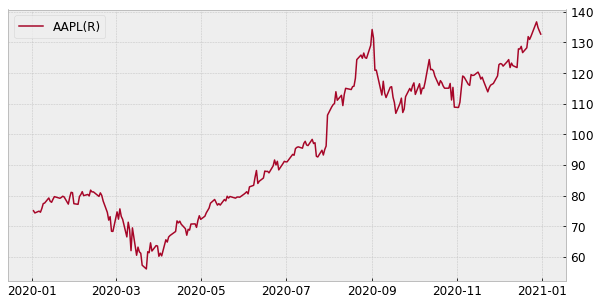

In [ ]:
fs.draw_chart(df, right="AAPL") # 주가를 오른쪽에 표시

# 3. 주가분석 - RSI(Relative Strength Index, 상대 강도 지수)
# : 해당 지수의 매도 세력 or 매수 세력이 어느쪽이 더 강한지 알 수 있는 보조지표

* *과매수* 지점 : 매도 시기
* *과매도* 지점 : 매수 시기

## `rsi(df, w)`


* df : 주가 데이터
* w : RSI 계산에 이용할 데이터 기간 (기본 : 20)


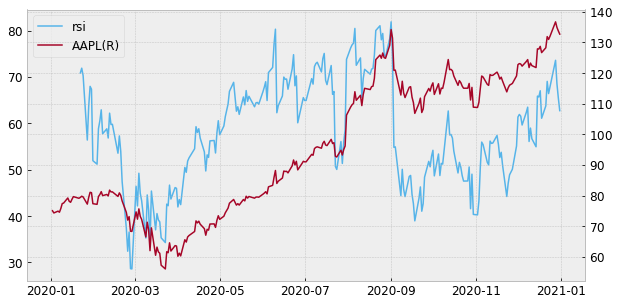

In [ ]:
fs.rsi(df, w=14) # 14일 기준으로 RSI 측정
fs.draw_chart(df, left='rsi', right='AAPL') # 왼쪽 축 : RSI 보조 지표 / 오른쪽 축 : AAPL 주가

* 주가가 하락하는 **2~3월** -> rsi 지수가 낮음
* 주가가 상승하는 **4~9월** -> rsi 지수가 높음

# 4. 백테스팅(Back testing)
## : 과거 데이터를 기반으로 전략을 수립 -> 어느 정도의 성과를 얻었는지 확인하는 작업

* 금융 투자 전략의 기본 : BLASH(Buy Low and Sell High, 싸게 사서 비싸게 판다)를 기반으로 함
* RSI를 기준으로 간단한 전략을 수립
  * **RSI <= 40 : 매수(Buy)**
  * **RSI >= 60 : 매도(Sell)**

## `indicator_to_signal(df, factor, buy, sell)`


* factor : 투자판단을 위한 자료 (RSI 등)
* buy : 매수 기준 값, sell : 매도 기준 값


In [ ]:
fs.indicator_to_signal(df, # AAPL 데이터를 저장한 DataFrame을 기준
                       factor = 'rsi', # 어떤 지수를 기준으로 할 것인지 (column name 중 rsi가 있음)
                       buy = 40, # 40 이하일 때 매수
                       sell = 60 # 60 이상일 때 매도
                       )

Date
2020-01-02    zero
2020-01-03    zero
2020-01-06    zero
2020-01-07    zero
2020-01-08    zero
              ... 
2020-12-24    zero
2020-12-28    zero
2020-12-29    zero
2020-12-30    zero
2020-12-31    zero
Name: trade, Length: 253, dtype: object

## **[trading signal]**
* buy : 매수 상태
* sell : 공매도 상태
* zero : 無 포지션 상태 (주식을 전부 sell 했으므로 해당 주식과 아무런 상관이 없음)


In [ ]:
df[30:40] # column rsi, trade 주목

Symbols,AAPL,diff,au,ad,rsi,trade
Date,,,,,,
2020-02-14,81.24,0.02,0.59,0.39,59.80,zero
2020-02-18,79.75,-1.49,0.55,0.47,53.56,zero
2020-02-19,80.90,1.15,0.59,0.44,57.29,zero
2020-02-20,80.07,-0.83,0.55,0.47,53.94,zero
2020-02-21,78.26,-1.81,0.51,0.56,47.42,zero
2020-02-24,74.54,-3.72,0.47,0.79,37.42,buy
2020-02-25,72.02,-2.53,0.44,0.91,32.42,buy
2020-02-26,73.16,1.14,0.49,0.85,36.55,buy
2020-02-27,68.38,-4.78,0.45,1.13,28.66,buy


## `position(df)`


* df : 트레이딩 시그널 데이터 (데이터프레임, 필수) -> 이에 따른 포지션을 산출

In [ ]:
fs.position(df) # zero -> buy 순간의 position은 zl이 된다

Date
2020-01-02      
2020-01-03    zz
2020-01-06    zz
2020-01-07    zz
2020-01-08    zz
              ..
2020-12-24    zz
2020-12-28    zz
2020-12-29    zz
2020-12-30    zz
2020-12-31    zz
Name: position, Length: 253, dtype: object

In [ ]:
df[30:40] # 뒤에 column이 추가로 생성 (position, position_chart)

Symbols,AAPL,diff,au,ad,rsi,trade,position,position_chart
Date,,,,,,,,
2020-02-14,81.24,0.02,0.59,0.39,59.80,zero,zz,0
2020-02-18,79.75,-1.49,0.55,0.47,53.56,zero,zz,0
2020-02-19,80.90,1.15,0.59,0.44,57.29,zero,zz,0
2020-02-20,80.07,-0.83,0.55,0.47,53.94,zero,zz,0
2020-02-21,78.26,-1.81,0.51,0.56,47.42,zero,zz,0
2020-02-24,74.54,-3.72,0.47,0.79,37.42,buy,zl,1
2020-02-25,72.02,-2.53,0.44,0.91,32.42,buy,ll,1
2020-02-26,73.16,1.14,0.49,0.85,36.55,buy,ll,1
2020-02-27,68.38,-4.78,0.45,1.13,28.66,buy,ll,1


### rsi와 그에 따른 position 확인
* 0 : zero (모든 주식을 sell한 상태)
* 1 : buy (주식을 buy한 상태)

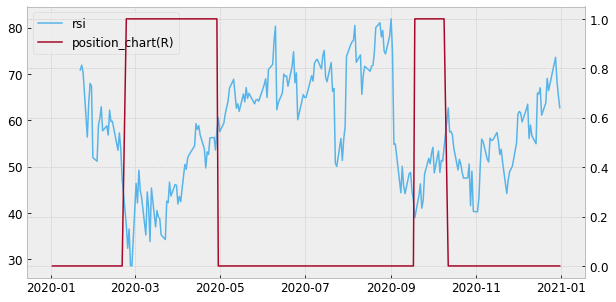

In [ ]:
fs.draw_chart(df, left='rsi', right='position_chart')

## `evaluate(df, cost)`


* cost : 매매 비용 (소수, 기본값 0.001, 비용이 1%)
  * 포지션 데이터를 입력 -> 수익률을 산출
  * 연간 수익률을 의미하는 **acc_rtn_dp**를 사용해 **누적 수익률**을 확인

In [ ]:
fs.evaluate(df, cost=0.001) # 수익률 계산 (acc_rtn_dp 변수 주목)

Symbols,AAPL,diff,au,ad,rsi,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,
2020-01-02,75.09,NaN,NaN,NaN,NaN,zero,,0,1.00,1.00,1.00,0.00,1.00,1.00
2020-01-03,74.36,-0.73,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,0.99
2020-01-06,74.95,0.59,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,1.00
2020-01-07,74.60,-0.35,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,0.99
2020-01-08,75.80,1.20,NaN,NaN,NaN,zero,zz,0,1.00,1.00,1.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,131.97,1.01,1.14,0.54,67.87,zero,zz,0,1.00,1.00,1.14,14.50,1.00,0.98
2020-12-28,136.69,4.72,1.39,0.50,73.60,zero,zz,0,1.00,1.00,1.14,14.50,1.00,1.00
2020-12-29,134.87,-1.82,1.29,0.59,68.52,zero,zz,0,1.00,1.00,1.14,14.50,1.00,0.99


## [연간 수익률 그래프와 AAPL의 주가 그래프 비교]

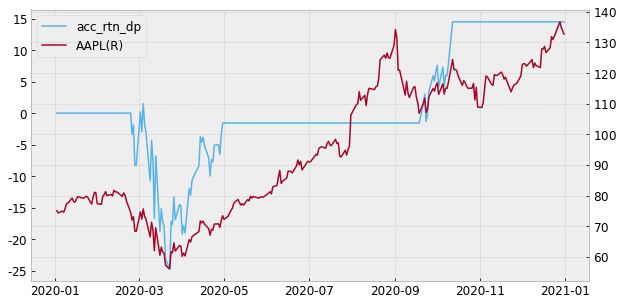

In [ ]:
fs.draw_chart(df, left='acc_rtn_dp', right='AAPL')

- 첫 번째 buy 타이밍에서 수익률이 -25%까지 떨어짐
- 이후 zero 상태에 들어가며 낮아진 수익률 유지
- 다음 buy 타이밍에서 수익률 15% 가까이 오르고 그 상태를 유지

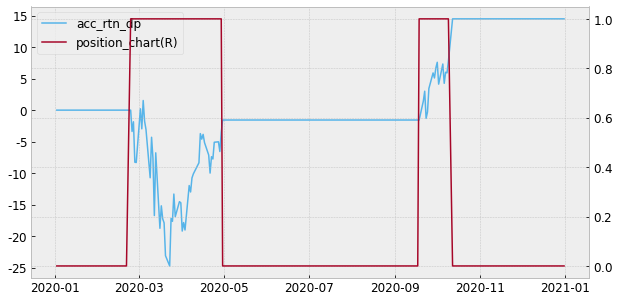

In [ ]:
fs.draw_chart(df, left='acc_rtn_dp', right='position_chart')

# 5. 투자 성과분석
## : **performance()**을 이용해 *성과 측정*

## `performance(df, rf_rate)`


* rf_rate : 무위험 수익률 (기본값 0.01) -> 수익률 데이터를 입력하면 성과평과 결과 반환


![performance](data:application/octet-stream;base64,/9j/4AAQSkZJRgABAQAASABIAAD/4QBMRXhpZgAATU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAA6ABAAMAAAABAAEAAKACAAQAAAABAAAFoKADAAQAAAABAAACGwAAAAD/wAARCAIbBaADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9sAQwACAgICAgIDAgIDBQMDAwUGBQUFBQYIBgYGBgYICggICAgICAoKCgoKCgoKDAwMDAwMDg4ODg4PDw8PDw8PDw8P/9sAQwECAgIEBAQHBAQHEAsJCxAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQ/90ABABa/9oADAMBAAIRAxEAPwD9/KQ0ZrLutUhgJjQb3HX0FeZm2c4XA0vbYqajHz/QuFOUnaKNTNIetfL/AMc/2jrH4UaWdO0WxHiLxpexrJp2gW8gF7eJu2yPEp6iMZY/Svi1/wBmz9sTxc58WxfHnUfDser/AOljTWictZib5/IJz1jztP0r51+IOVKnGrKrZPa6ev4fibfVKl9j9cs8UcYr4x/ZJ/aYuPj14O1ia50xrS58K3x0maV5N5uZIBhpeOm4jOK4j/goP8VfG3w7/Z/fxF4F1KXRNTGq6fF9ogba/lyTBWXPow4rb/XnLfrX1J1P3jdrWe4nhZ25rH6CjH0pc571wvh7xBc3GgaZc3C75ZbaF2YnksyAk/ia534ifGDwr8MPD0niPxfe2+nQM3kwefJ5YnuGBMcKk/xORgCuGn4l5RKfs41W3/hf+RTwdTex65QcV+Sl54E/a1/aTnf4q6N4/wBU+DlpqBMUfh+VGdoVh/diXIIGJcbx9a9X/Zl+NXjLQvifrn7Kfj++m8V694RsF1KXX5nwblbhwFj8s8jaD612/wCvWWN1FGrdwTbsnolo/wASfqs+x+ifGaM1+H3iaf8AaU+On7ZXxN+GHgP4r33grSfDUEVzDDHuePD7VKqBjHJzXe6r8Ff2rfgzp1z8WPEnx3vvEmleEY21O50xkZBeRWo8x4SxJA3hdufenV45yuFSFOdXWSTSs9nsH1Wpa9j9hOKXmvAfgP8AG4fG34SeG/ilDpp01fEFuZxbs+8x4YrjcOD0rr9e+LPhDwvrWkeHPEWqWun6pr8jRafbzSbZLl1GWWMdyBXLU8RsqjVlRdR8yumuV9N+nQpYOpa9j0/mjmue/tuQ/wDLIfnS/wBtS/8APMfnXN/xFLJf+f34Mf1Kp2Og5pDkVgf21L/zzH50n9tS/wDPMfnR/wARSyX/AJ/fgw+pVOx0GaXg1+T/APwUd/aZ+Mfwr8ESaD8OvD+o2MF2ttJJ4mtW2w2beegMTHHVx8v41+ivgXxJe3/gnQL+9/fXFzYWskjk8s7xKWJ9yTmvRxPHmWUqFPEzqe5O9nZ9Py+ZKws27JHpQAo+Wvzk/wCCj3xT8e/D/wDZ+g1j4eaxN4f1a41qxthdWzFXEc28MPoePyrxrT/2U/2yNQ061vv+GkL9BcxRy7fKc43qGx196n/iIGVKjHEOtaMm0tH036eYfVKl7WP2A4HtRmvgr9nb4K/tAfCvxlda/wDFD4t3Pj3TJrVoY7KZGVUlLAiTJJ5ABH419qjWpP8AnkPzrin4oZKnb234P/Ir6lU7HQ80fWuf/tqX/nmPzrjfiF8Rz4D8C6940ks/tS6JZTXZiDbS/kqW257ZxTpeJ2TTkoRq6vTZieDqLWx6lgHpRwOK/G/w74S/aZ/au0a2+P3gL4xXvgHQfFqm4tdEQNKLNUJjKhgQDkqT+NdJ4Y8efGH9kP4leE/Afxc8Y3XxS/4WbeLaWksxMQ08xcM2Gzu3bh09K9JccZY60qCq++r3VnfTfp0JeFna9j9bCBSZ/Ouf/tqQdIx+dfmX/wAFHv2zNe/Z+8GQeCvC9nNBrXi+ynFrqcEojaydDgOARyayyvjzLMbXWHw1S83srMc8LOKu0fqpx2pMjFfPX7PHjTWfEfwL8C69r0zXuoX2kWs1xPIcvJIyAszH1JrynxL+2p4Q0X4hWWh6dbxap4Pt/Nj1zxHFOPsej3SZCQXBxw7tgD608Px3llWrKjTqNuO+j0t5/wBXG8LNbo+3RjFLXzB+0T+0rovwM+BV98b9Psv+EisbX7K0cUUgQSpdSKisrHIxhs1794V1weJvDOleIliMI1O1huRGTnaJUDYz7Zr6jCYulXpqrRknF9Uc8otOzOhooorpJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAor4K8UeE9J/aI/an8V/C/4qvcXXg7wBoelXtjoaXEttbX9zqrT+beXKwurTCHyRHEpO1SWJBJrzz/AIQjxX8Lf2j5Pgd8EviVN4I8G6l4dPiCSwu0i1aPTrpLlbYR25vXLxRXCkuE3Ebo2IAFAH6S6RrWj+INPj1bQb+DUrGYuEntpUmiYoxRgroSp2sCpweCCDyK06+If+CeluG/Y/8AB9rcN526bW0dh8vmZ1W7DN8vTdyeOmeK+XdW+C/wSsdY/aXtZfBkWz4R2Npe6Qf7T1cbzc6P9vb7R/p3zjzgRxt+Xj3oA/W7V9Z0fQLF9T12+g02zjZFae5lSGJWkYIgLuQoLMQAM8kgDmtKvwZ+OWt23gn9nvSfh14X1TQNG0vxXH4T1y/0L7Pq1zqb3t5LZTSvFeXNxNAiZVSqHoikfeOT+6Osf2TPYT6drMka2t7G8MiyPsDo6lWXOQeQexzQBq0V8Xf8MUfsZgf8ihZcf9RS9/8AkqvPP2dvBPw6+Fn7W/xa8JfDqKLSdAg0Hw6yWy3Uk0f2i4a5Zipmkc7mAGQD6cUAfopSMyqpZjgDkk9AKWvlz9sHx1F4V+BXiPw5pqG+8UeObWbw9oWmxH/Sb2+1JDbhYlHJEauZZG6IilmIFAH1ErKwDKQQeQRWdputaPrIuTo9/BfCyme2n8iVJfKnjxvifaTtdcjcpwR3FfCnwS+Jvxh1v4GeEvBPwu0nQm8f+AbaHQPFekeI764s57CfT4VgR1W3hmZluAnmxuQEZGBUnnF79g5/EEnhv4sy+LILW11p/iJr7XsVk7y2qTnyd4heRVdkB6FlBI6igD7vrO1XWNI0KzOoa3fQafah44zNcSrFHvlcRxrucgZd2CqM5JIA5Nfip+1R8I/gP4U+LfhfRvhl4An1my8IXA8QfEP7BeX0/wBl0SZhCEkAuCRI297jylw/lxbwNtfRv7SPhb4TfD/9iqe6+Blilz4Xvte8M6rapp9w94Lxn1qxP7mSeV8tIECqN4XPBxzQB+lxIAyeAK5A/EPwApKt4m0wEcEG9g4P/fdY3gDxzqXxA8Iz+IdQ8Jat4QnEk0Q0/W4oY7pgigh9kEsybHzgfPng8V+JXhsWutaPFqnjHwR4Y8N6zcPKbjTz8GNX1E27CRgAbqGRY5cqA25RjmgD94tK8T+Gtelkg0PVrTUZIgGdbaeOZlB4BIRiQK3K/LX9jHwr4b0z43+IPFGmSJbXWoaFHZfYtO8A6n4P05Ut7jzDM0l2WikmYyBcAhio9FNfqVQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/0P3wvZTFbSOvXHFcbzXaXMPnW7x9yOK41lKMVYYI61/OPjZSr/WKE3/Ds0vW+vztY9fLrWfc/Mn44c/8FHfgf/2BdS/9Blr9NjX5k/HHj/go38Dyen9i6lz/AMBlr9NWPfNfnvEv+7YL/r3/AO3SOyktZepxPgr4ceCPhxbX1r4I0eDR4tRna5uFgBAkmbq5yTya/Ob40ale+OP257H4MeLZm1LwTL4Zl1FtKl5tzdwo7pLjruVgCOeor9BfBnxV8C/FDSdXv/AGrx6rFpMstrcPECPLnQHKnIHIxX4o/szfGT9oIjxB4u0X4Rn4palb6rf2kfiC5uFFzFBvZfsoZjnYo7e9etwrl+IlPEYmp8cUl7zSd5bO8rbW9exFaS0Xc+/f+CdHjzxd8QfghquqeMtUm1a6s9evrSKSY5KQQiMIgwOi54rkv+Cn/wDyRTwl/wBjbpP/AKE1eI/sueOviTcftrT+DPEPhFvhlpUnh+a7bw7by5tXmLn/AEoqvG9+hPXivb/+CoAP/ClfCY/6m3Sf/QmrvqYH2PEVKWiU7SSWqV1tdadOhClek/I+0/GfxY+HXwg8J6Z4g+JOvW3h/T7gRQRz3T7EaQpkKCe+Aa80+EvxF/Zd+J3xJ1jxP8JNX0rWvGM9mov7izffcNaowCh/9kNivX9e+H3gf4jeGtO0fx3olrr1lCkUqQ3cYlRXCYDAHjODX5x/s++EfC/gj/gop8UPDvg/TLfSNMg8OWhS3tkEcSlpEJIA45r5zLcFhq2HxNpSVSMXLS3K1zJWa36ms2012ON8GfGP4ZfB3/goJ8adU+JviG18PWl9ZQQwyXT7FeQMjbQfXAJr6T+Mn7V37O/xM+FPiz4feBPHem6z4i8RabdWOn2VvMGmuLm4jZI4kXuzMQAK8C+G3w38BfEj/goV8bLDx7oNnr1va2EEkUd3EJVRy6AsoPQ4OK+o/jr+z98EvA/wb8aeMPCHgnStI1vRtJu7qzvLa2SOa3nhiZo5I3HIZWAIPY19JmcsB9aw3tVP2nJTtZrlvZW8/Uyip8r7ancfsaeEPEvgL9mbwH4R8X6fLpesabZGO4tpl2yRv5jHDDscGrvxe/Z9g+KnxS+G3xKl1Z7F/h7dzXSwKgYXHnJt2k9sVk/sT+Itd8W/sueAPEPiW+l1LU72xLz3M7F5JG8xxlmPU4qz8Zv2gbr4V/Fn4YfDWDSFv4/iDeT2r3BcqbcQpuyABzmvl5rFvNa3sH+8vO9trWlzWv5XNvd5FfY+nR0paQZpea+TaNgoo5pOaVgsfn9/wU2/5NG8Sj/p50//ANKoq+z/AIc/8k/8NZ/6Btp/6JWvjD/gpr/yaP4l/wCvrT//AErir7P+HX/JP/DI/wCoZZ/+iVr6zE/8iWh/18n/AOkwMl/Efov1Pgn/AIKozSwfs0Wk0MfmyJr+nMqd2I3kD8a5fSP2tv2xoNIsoYP2b9QljjgiVH3yYZQgAYfXrX3h8bdY+D2h+EIrv43Czbw+buFE+2x+bF9qbPlYXB+brg16zZvA9pA9nj7O0amPb02EfLj2xXRhc8pUsBSoVcMp2lJpu9tbaKzXzIdJuTaZ81fAT9oSb4m7/CvxD0lfBnxBgR7ibw/K5NzHaAgJMVPO1ietfTtfmd4Y/wCUnvif/sT4f/Rgr9MBXl8RYKnSqwlSVlOKlbtfovI0pO6FrN1jSNN1/SrvRNYt1u7G+iaGeJ+VkjcYZT7EVo5z0NZWua1pnhvRr3X9bnW2sNPieeeVs4SOMZZjjngV4VPm5ly7ls+X/i54n8cfs5+DPDvh79nj4WP4ssEd4TY2W5EtIhlgRjPBY18c3fiDxH8fvjJ8ONa/aI0Z/g3qfhbUBLolndks2syuQXjTf/dwBx61+qHgjxv4X+Inhex8Z+DL9NT0fU0L29xHkK6glSRnB6g1+c/7cXP7SP7OP/YZl/8AQkr7zhvFKVWWHlT5atp3nrzbO6d3byehz1Vpe+h+kfirxT4f8FeH77xX4qvo9N0nTYzNc3Mx2xxRjqzHsK/En4n+EvEvxO+DX7QXxV+K9hLrelWYuLvwRqN0uY0sJSWR7Rhj5CCCK+wP2/8A40aH4S0bQ/gj4rKadoPxRS6sL3V2JP8AZ0SbCZQgB3/e6V4L8a/2j/2aLD9inWvgf4N8fW+vanZ+H10y1AjkR7h4kCAgFcDOPWvT4Sy3EUIUa9ODcqk46pbQT1d1s27prsTXmndPofov+y+P+Mc/h176JZ/+ixXwH4m/ZL8a6FP4r/Z+0W3utU8K/F6/fWtR8QrF8ukywP5iQbejbygGT619f/sV/E3wP8QfgF4V07whqsepXHhzTrSyv0QMDBcLECUbIHP0zXOftsePtSg+HF58Jvhrq8tr8TfEccU2kWlq5juZooZlaZkfgABFbOT0ry8vr4qhmlXD01Zyk73W1m2pP/Dv2KnFOCZ4f+z1okv7UWoNpvjK6J8DfDSZvDN34eceZaaq9mu2O6l7qwYBgAeoFfrzYWNnpllb6dYRCG2tkWOJF+6qKMAD2Ar8pPhJ+0V4H+F0OjW1nolpZeC7O3jXxj4jTKC01sJtaOdQMvI8uAWGeTX6s6bqNnq+n22qadIJ7W7jWWJx0ZHGVP4iv6B4CpV406rnDlpuXuL5av5vXU8rFWurbl+iiiv0A5AooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAopCcVn6pqunaJp9zq+r3MdlZWcbSzTTMEjjRBlmZjwAB1JpN21ZUIuTUYq7Z8l/tR+F/htHrXgLxpr1zrvh/xTqmtWnhbTdZ8NXS2l7H/AGqWIjuC+Y5bXdHuZHRyDgqM5rR0v9iX9ntJLrU/G2hP8QNev333OseJZm1HUJcDCoZG2qkaDhURVUDtXHfHPxv+zJ8cvDmjaHe/GOx8OXOgaxaa3ZX2m31r9ohvLIOImHnLIhALk4KnkCvNP7S8Cf8AR5Wr/wDgTof/AMg1zfX6H/Pxfej3/wDVHNv+gSp/4BL/ACPeP2Ovhp4k+H/7Lvh/4beMLKfw/qVs2rxPDG4Sa3iuNQuXiKOhO1vKdWUg5HHevjn4n/s/eBtH+IeufCb4dS/Ef4i+NfFWmQXfiSFfFpsbM6cVe0tzqd5OpD70WRI4gkjFFYYAxn7O+Hvx3+Bfgvw1FoWu/G6y8X3cckjnUNTvbNblw5yFIt0ijwvQYTOOua8t+JHiD9m/xf47g+Kvgn462/gHxlHZrp099pt7ZzQ3tlG5kSG7tbpZYpRGzMUbCuu5sN0wvr9D/n4vvQf6o5t/0CVP/AJf5Hzx4n8E6l8MvhDqHgD43+EvFHh34f6xeaJHN4i/4SmPxYNH+xXcTWiNBPFC9valgscjxIyjI46V+jXx2+H3ws8b+B7zW/ih4XtvFdn4WtbrUoLeckDdFCzttYEYLKuMkGvjfVz8GfiG1rp3xw/aZh8a+G7aeG5k0SN9O0uxu5LeQSRC7NsnnSxhlBMfmBCQCRwK+pPEf7Qv7M/ifw7qfhnUPiRoq2mrWs1pKY7+EOI50MbbTkgHDHHFH1+h/wA/F96D/VHNv+gSp/4BL/I+GfhJ+zX8Efib8aLbxmnwohsfAXiP4c6Rq1pbSJK9nDqd3dTNIglBCtOIdgbGDtwcDNenfsc/sg/B+3+DfhPxT4/+G9vbeNra5u55J76GWO9V4L6U2zNuYH5UVCmR0xWH4e8O/s8eFNC0/wAM+Hf2rfEVhpelQR21rbx+ILAJDDEoVEXNqThQMCvY/hl8QfgL8ONVu9Tvf2irrxit1D5It9c1m0uIYjuDeZGsUURD8YySeCeKf1+h/wA/F96D/VHNv+gSp/4BL/I+5B0r5c+MsHwg+CF1rX7WHi/SbnV/EOmWcGn2mJHuZUM7rBHb2EMjeVA9xI6q7IFLZyxxnPVf8NRfs6f9FH0L/wADov8A4quH+JPxc/ZF+LXgjVfh5468daFf6JrMXlTxDUI0YbSGR0dWDK6MAysOQQDS+v0P+fi+9B/qjm3/AECVP/AJf5Hm50P9p3WvG9n8b4fg/wCB9M8RW9pJbRLda5djWBay4Jt5pre0Ns7cYXcWVCTtZcnPbfsgXnhPWvC/xCl0mw1LRNau/F2rS+ItK1CWOSbTtXnEZnhhnt9qvDt2tFIvJBz1rxODVvBGnWi6JpP7Y2oQ6TGvlxpPNol1dpEOAv2yW0MrMBxvbLd85r2P4Q/EH9kP4KeF5fC/g/4jaXMLy6mv729vtVS6vr69uDmW4uZmILyPgZOAMAAAUfX6H/Pxfeg/1Rzb/oEqf+AS/wAjn7XVdK+BXiy4/Z1/Zl+H58U+K7u3Gv67ealqBgt4lvJGiS41G+mWae4mmKMFRVY7V4wBivFfHHhvV/hp8Prjwj8YPhdpnhD4d+IvEmlalqOreCtWe7j0/UBqFvLBJNZ3lvCUgknjjSXyBtQEsFyc16v8Sdf/AGZ/Gnji2+KfhD44W/gPxrb2Y0+TUtKv7R1u7NX8xYLu2uUlhmVGJKEqGXJw1cddt8EPGt9p3/C6f2l18c6Lpd1BfJo5n03TdPnuLWQSQtdLaRrJOqOoYI0mzcASOKPr9D/n4vvQf6o5t/0CVP8AwCX+R9w/FH4baD8UfD8Wma7f6nYW9nJ9qR9K1K40yVmVGADy2zIxTBzgkjODjivxBsfEQ0vxn4ivNX8b2N7olybdNO08/GS5hksjCrLOXlwTIZWw2CBsxjmv2Muv2m/2crm2ltW+JGhqsyMhIvosgMMcc18HeEPA/wAFPAXhyy8JeFP2prez0nTgy28T2Phy4ZEZy+DLNZvI3LHlmJo+v0P+fi+9B/qjm3/QJU/8Al/kee/sgaJp3xU+IWvfDPx14s1fWtQ0uB9dt9R0L4gX+qWiWk10Y4LKQROq74lADEnLDkgZr9swMAAdq/P/AOFPjb4Q/DjxDNrOs/tGaf4ptZrdofsc8GiWMYcspEm+xtoZCVwQAWK8nIzjH214U8ZeFvHWkpr/AIN1e11vTZGZFuLSVZYyyHDDcpIyD1FaUsVSm7Qmm/JnHjchx2Gh7TE0JwjteUWlf1aOnooorc8oKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/R/fkZqpcWUNzy6/N6jir1eTfGvwz8SPF3gG60T4VeJE8K6/LJEyXrx+YBGrZdOhK7hxuAyK4cxwdGvRlTrU1OPZpO/wB52YCkqleFOVRQTduZ3svN2TdvRM4n43fs6+H/AIv6G6214/h7xPCipZa7aRr9vtFDhmSKTgqrjKtgjgmvjY/FP9vnwmT4W0r4IW2v2Wlf6JDqM+rxLLdxw/Is7qW4ZwNxHqa6T/hnj9uzt8bIP++H/wDiKX/hnj9u3t8bYP8Avh//AI3Xx0shy+UFTlgG4rbb/wCSP0b/AFJwiemcUP8Ayr/8rPb/ANmL9mG1+AngbXNPXUJr298VXT6ncxyKq/Z551y0KlSQQpOM968+/YC+CHjz4Q/C3xFoHxI019J1C98QX95DH5iSbreZ8o2UJHI9ea5D/hnf9u3/AKLbB/3w/wD8bo/4Z3/bt/6LbB/3w/8A8brorZZg6nP7TAt89m9tbbfa6C/1Hwn/AEOKH/lT/wCVnWr8D/Hv/Df/APwt86a3/CH/APCKiw+2+Yn/AB9eY52bM7+hHOMV9d+OfhV4R+Iugy+HvFVjFqFucvF58ayiGYAhJUDDh0Jyp7Gvhf8A4Z2/bt/6LbB/3w//AMbo/wCGd/27v+i2wf8AfD//ABusqmS4GUoSeBd4pJbaJbW94f8AqRhP+hxQ/wDKn/yswJdE/bA+EEzfA3wZ4cuPH/ha4Yxf8JdfaikV9DHeHMjLEXJ/0fcQg77RWd+yp+yT8Vvgr+1f438U+MNSvvE/h7UdFhgttbv5UaeecyK7RldzOAgBAJ4rsP8Ahnf9u3/otsH/AHw//wAbo/4Z3/bt/wCi2wf98P8A/G63jl2EUakFgXafxaR1/ET4Hwmn/CxQ/wDKn/ys3fg58CPiD4b/AG2fi18Udc0xrbwt4hsYYtPu/MjbzpFdCw2Alh0PUCvqH49+BNT8XfBbxv4Y8ORNd6pqmkXltbQ7lXzJpYmVFy2AMk9zXyF/wzv+3Zx/xe2D/vh//jdJ/wAM7/t2/wDRbYP++H/+N1hUyXAznGpPANuNknppbb7XQf8AqRhf+hxQ/wDKn/ys+gv2O/hd4l+G37NfgXwR44tG07XNKsjFdW+5X8t/MY43ISDwR0Ne56x8NPBniHVNM1zXdKt7/UdGcyWVxNEry2zsMFomIypI9K+Cv+Gdv27e3xtg/wC+H/8AjdH/AAzt+3d/0W2D/vh//jdRUyHL5VHVeAfM73el9d/tDXBOFSt/bFD/AMqf/Kz9Gv7GhP8AG1L/AGLD/favzk/4Z2/bu/6LbB/3w/8A8bo/4Z2/bu/6LbB/3w//AMbrn/1Xyv8A6F35f/JD/wBSsL/0OKH/AJU/+Vn6N/2LD/fak/sWH++1fnL/AMM7ft3f9Ftg/wC+H/8AjdH/AAzt+3d/0W2D/vh//jdL/VbK/wDoXfl/8kH+pWF/6HFD/wAqf/Kz1H9vP4N+Mvi1+zdr3gr4dWDarrl3PZPFBvSPcsVwjudzkDhQT1r6i8E+GJNL8G6Fpl+GiubWxtopUyDteONVYZHHBFfBn/DO37dv/RbYP++H/wDjdH/DO/7dv/RbYP8Avh//AI3XTLIcvdJUXgHypt203e7+LyQv9ScLe/8AbFD/AMqf/Kz6Q/ae/Zs0z9on4a/8ILeapPpn2a8h1COSJFcvJbbiqENgAMTjPavkeP4y/wDBQDS400yz/Z+sri3swIY5DrEQLpH8qsRu4JAzjtXUf8M7/t2/9Ftg/wC+H/8AjdH/AAzv+3d0/wCF2wf98P8A/G6JZDl8qcaMsA+VXaWml9/tB/qThd/7Yof+VP8A5Wdd+z38DfHXiP4qXv7Uvxh01vCHi/U7A6O+hRSJcQRwRMGSYTKSSW54r68+IPh3VbzwLr9p4beT+1ZbGdbXY4R/OZCE2txg5xzmvhX/AIZ3/bt/6LbB/wB8P/8AG6P+Gd/27f8AotsH/fD/APxuitkWX1JRlPAN2SS0WiW3US4Iwn/Q4of+VP8A5We8/sd+CPin4b+A2jaR8b5bp/FsU92bk3M4uZdjTMY8yAtn5MY54r3Tx/8ADmx8eeCdc8FXV1Jaxa5ZzWjSoAzIJlKlgDwSM18Jf8M7/t2/9Ftg/wC+H/8AjdH/AAzt+3d/0W2D/vh//jdKXD+XOp7X+z/eve9lv/4EP/UnC2t/bFD/AMq//KzgtAh/bA/Zj0m3+B3wi+E0Hjvwl4XHkWGs3OoxWst2jnzCzQ7vlIZiMe1dH4a+EPxv/ag+I3hfx9+0L4THwzk+G92t3p0Npcx3q6g0hy6uQ3yBdorb/wCGeP27f+i2wf8AfD//ABuk/wCGd/27ev8Awu2D/vh//jdbRyjBKrKusC+d3u9L67/a6i/1Iwtrf2xQ/wDKn/ys+3vGnwW+GfxG+zf8J74csfEH2Ld5H263Sfy9+N23eDjOBmvk39pz9jD4X658BvGek/Cj4daQviy5sJE0429rBBL55+7tkIUKffIrk/8Ahnb9u7/otsH/AHw//wAbpf8Ahnf9u3/otsH/AHw//wAbqsNleEo29lg5K21n/wDbClwPhHvnFD/yp/8AKz6V/Zi+COj/AAl+DXhrQhoNvoOttYW39qpbpGrSXaxhXaRk4dvfJrwrwn8DviB8X/2g7L48fFzSW8G3Hw9ku9N0e0glS5j1OznVwLiRgcxn5vu4rnj+zv8At2/9Ftg/74f/AON0v/DO/wC3b/0W2D/vh/8A43RTyrBxqyrrAvmd7vTW+9/e6g+B8I1b+2KH/lT/AOVnnfin9ibxgZPE37OmkrNcfDr4nahJr2q+IyYluNOukk81LeOAt+8VmULu96/VjwvocXhnw7pnh2GUzR6ZbxWyuwwWEShQSPfFfnV/wzx+3WOvxsg/74f/AON17j8AvhX+0x4H8XXOqfF74kQ+K9FltWiSzSI7hOWUrJvZVK7QGBA6556V9Fh8fNtQ9hKK+Vl+J5mZ8G4TD0J1oZnRqNK/LH2l35K8Er+rR9h0UUV6x8CFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAIaxfEXh7RvFmh33hnxFZpf6XqcLwXMEmdksTjDKcYOCPStuik4pqzLp1JQkpRdmtmfJf/AAwz+yr/ANCFF/4GX3/yRR/wwz+yr/0IUX/gZff/ACRX1pRXB/ZOE/59R/8AAUfXf8RE4g/6GFb/AMGz/wDkj5L/AOGGf2Vf+hCi/wDAy+/+SKP+GGf2Vf8AoQov/Ay+/wDkivrSij+ycJ/z6j/4Cg/4iJxB/wBDCt/4Nn/8kfJf/DDP7Kv/AEIUX/gZff8AyRR/wwz+yr/0IUX/AIGX3/yRX1pRR/ZOE/59R/8AAUH/ABETiD/oYVv/AAbP/wCSPkv/AIYZ/ZV/6EKL/wADL7/5Io/4YZ/ZV/6EKL/wMvv/AJIr60oo/snCf8+o/wDgKD/iInEH/Qwrf+DZ/wDyR8l/8MM/sq/9CFF/4GX3/wAkUf8ADDP7Kv8A0IUX/gZff/JFfWlFH9k4T/n1H/wFB/xETiD/AKGFb/wbP/5I+S/+GGf2Vf8AoQov/Ay+/wDkij/hhn9lX/oQov8AwMvv/kivrSij+ycJ/wA+o/8AgKD/AIiJxB/0MK3/AINn/wDJHyX/AMMM/sq/9CFF/wCBl9/8kUf8MM/sq/8AQhRf+Bl9/wDJFfWlFH9k4T/n1H/wFB/xETiD/oYVv/Bs/wD5I+S/+GGf2Vf+hCi/8DL7/wCSKP8Ahhn9lX/oQov/AAMvv/kivrSij+ycJ/z6j/4Cg/4iJxB/0MK3/g2f/wAkfJf/AAw1+yt/0IUX/gZff/H693+Hnw08D/Cjw+PCvw90iPRtKErTGGNnfMj43OzSMzMSABkk8ADoBXe0VtQwNCm+anTSfkkjzs04szXHU/Y43F1Kkb3tKcpK/ezbVwooorqPnwooooAKKKKACikPPFJnsKAHUmRSZzTfWlcB+R60tfKX7SPxe8ZfCDVvA+p6KsEmh6lfNbaikibndTswFb+H5SxBHcelfVaMrqHQ5VgCD6g162MyavQw1DFztyVebls/5XZp9nt8mjzMJm1KtiK2Ghfmp2v/ANvK6sOoooryj0wooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9L9/KQjNLRQA3b70o4FRzuY4XkXqqkj8BXyD+yD+0B4s+PumePL3xXa2ts/hjxHd6Rb/ZlZQ0NuRtZ9zNlj36UAfYdFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXyr+2b8b/E37PPwF1n4oeEba3utS0+a0jSO6VmiInnSJshWU9GOOetfRHhHVrjX/Cmja5dKqzahZ29w4XhQ0sYYge2TQB0VFFFABRRXjvxf+Ofw/wDgfb6Dc+PrqW2TxJfpptn5cZk3XEgyoOOg96APYqKZHIssayp91wCPoafQAUUUUAFFFFABRXxt+yv+0J4u+N3ir4saJ4mtbW2h8C+IZNKszbqys8KKCDJuZstz2xX2TQAmOc0m2nUUAFFFFABRRRQAUUV474c+Ovw+8U/FnxF8FdIupZPE/he3jub2JoisaRybdpDng/eFAHsVFAooAKKKKACiiigAooooAKKKQnHJPAoAWioYZ4bhd8EiyKCRlSGGR9KmoAKKKKACisDxR4j03wj4d1HxRrLMtjpcElxMUUuwjjXc2FHJOB0r4Q/ZS/bRuP2m/jd8Q/CmhwRDwd4dggm0ydoJILuQSFQ3mh29ScfKKAP0OooooAKK/MXxh/wUD06f9rDwZ+zv8NBDex3WqvpevNcwOskEqOUIhfcAenXBr9OaAFooooAKK/Nj9qD9pT9o/wAGftB+GfgV8ANE0jV77XdMlvyNSDKQYmwcOJEAGK5f/hPf+Cqn/QheEf8Av83/AMeoA/U+ivAPgR4g+OVz8PbzV/2jdL0/RvEFtPM3k6axeH7KiBg3LP8ANnd3r5A1b9pP9q74xX0viz9j/wAPaJ4h8BKTbC61bdBcfa4jiZdpkX5Rxg4oA/T6ivzR8K/tJ/tMfCjXrK9/bI0LR/DvhbWpo9OsJ9I3TzPqM7ARIwEj4QjOTiv0R1zxHpXh3Q7nxFqswis7WFp3J6lFXccDucdqAN2ivMvhR8WvBvxn8HWfjnwRcPNpt9v8sTIYpR5bFDujb5hyO9Y3hT48/Dzxn8U/FHwc0K6lk8SeD1jbUImiZUQSgFdrnhuvagD2aiiigAooooATNLXyt8WfivrHgf8AaM+EHg2TWodK8MeJ7bxC+pJceSiTPZW8T2/72Qbk2uxwFYbs85r3Q/En4d/9DTpX/gdB/wDF0AdrRWa0w1XSmm0e8QC6hJguYtsqDevySL1VwMgjsa/LT4i+Lv2iPh1+0P8ADX4C6j+0SzS+Pbe+kkun8M6QrWssKj7IhXGP9KcSImSMsuFyeKAP1czS1+Vfxt/aUv8Awl8N9O+GVt408Qar8QLPxRpljda3/YNzo0VxGdTRZY/MihW1CGI+X8r4kAzyTX6qUAFGaguLmC0iM9zKkMa9Wdgqj6k8V+e3xf8A2qfFV74+0Q/s76feeOPCPgK8a78d3mjwpdQNZspi+xWshyLi5iL/AGiSOBtyiMAnllAB+iFB4Ga4HwB8Uvh78VNBt/Evw88QWeu6fcg7ZLaUMysPvI6ffR16MjAMp4IFeEfGfx58S9Z+MPhT9nn4UaxF4UvdZ0y713VNckto7ya20+0lSBIrSCbMTTSyvhmkVgiAkAkjAB9aZoBzXxj4V8WfFv4SfHzwz8FfiV4qXx/oXxA0/UrrRtSms4LPUrO60hY5LiC5FsqQywvFKDHIEVwwKnIxW3+yj4s8T+Kz8XP+El1S41T+yfH+t2Fn9okMn2e0g8ry4I8/djTJ2qOBmgD6zzilr83f2h/HXiK7+Ot94A8Gaj4+/tDSdHsL66t/DmqaBp1gkV3JOkb41ba7SsY23bWIwBwO/jk0/wC0udU0D/hDr74hxXI1jTTdHXvEPhKbT/sAuo/tgljtJROxMG8KE5zjg0AfsHuqC6u4LK2lvLt1ihgRnkdjhVVRkkn0AqY186/tX+JH8MfAbxRdQvslvYUsl9T9pcRtj/gBY16WTZdLGYujhYvWclH73Y8/NcesLhauJl9hN/cj074efEzwh8U9Ek8ReCrw3thFO9szlGjIkjwTwwBwQQQe4Ned+EPjoPGPxr8T/CvTdJ3WHhqBWl1AS5zPlQ0Zj28DcSoO45Kmue+FWm+JPhx+zHov/CFaKuq+II9OW7SzZhH51xct5j5bjJAY4GeQAARXw5pmu/H39mzxHP498TaPZ2ieN9RX7TaTMkks53F2WMo7MgXeecnnGQa/Rck4OweMq4+nh5xbjeNFTklJtSTvZWvaCdtLXfkfA5txXisNTwU60Wk7SquMbpJrbXvJ+unmfr5c31pZor3cyQK7BFMjBQWbooJ7nsKsbjjIFfCn7dTF/hn4Yv8ADRumsW8gXOCpMbnB9xXzX8Z9LuPhd8YfCWtz+P7+5u9Yu4tTuTMXEen2jyqVBCM29cbxjaPlXpzXNwz4dLMaFKp9Y5ZT9paPK5XdNJtXW111fornTn/HrwNapD2PNGHJd8yWk/JrXXovV2P1/wB/FOzVOzure+tIL20lWaC4RZI3U5V0cAqwI7Ec1aOO1fmUotOzP0SMk1dHlHxb+MnhT4M6NY634rWd4tQultYkgQO5YgszYJHCqCffp3ru9H8UeH/ENq17oWo22oQoAXeCZJAvf5ipOPxr4f8A277KO40vwFcakjPpCauYrvbnO2RRwCOhKqwHvS+HPhT8G/hp8UtQ8PeBvGZstY8TaPc2Nvou5pgsskRIeWYFsEY3Kj4PXGelfpWH4TwFTJ6OKdSSrS53pHmjaDSadtY2Tve1rbtH57iuJ8dSzSrh1CLpR5FrLlleSbur6S10stex3fiD9tv4NaWmqW2lz3Go39iJVhQRGOG4ki4AWXkBWPRiMfpV7Xv2hPFd98B9J+Lnw88Ktqd3qMointCzS/ZAGdGciMBnAZQOMfeBPANfnXoHwV8f688fw6u/CM+lSaBNe3up6hMjKJyI/wBxEsjDZg7AsYU4YuW96+qvgz8WdG/Zr+COnaT8T7O9t9Y1a7vLmy01Yj9paAlVDMHKhFLA4ycnsDX6DnvAOT4WlSeWR9vWU43hzJ88Gpfy2smo83dJq7Wx8Rk/GuaYirUjmEvY0uR+/wAtuWV1/Nu03bs3sWfCH7eFnFo2tD4i6H9n1nTZEjtbaxLMbpmLK6ncCIzGV5JJBzwM19+aBqo17Q9P1v7PLZi/t4rjyZhtlj81A2xx2Zc4I9a/ELWPibYaB4uufEnw0+H1v4avIyb0S6iJL6eJHYESJHMfKiBLcEKTyArDiv2f+G3iW68ZeAPD3iy+hFvcaxYW91IinKq00YY49uePavnPFbg/D4ClRxeEwzpRqPVOak0+VaJJyst3fmb8krH0HhvxRXxlSrhcTX9pKC0ai1dXet2ld9LcqXqfJ37fSqvwn0Wdf9bFrUGz15hmJx+Qr7U0JmfRNPd/vNbxE/UoK+HP27rhrjRfAnhteTqesZx67FVP/alfeNtCttbRW69IkVB9FGK+Tzum4ZBl3N9qVZr0vBfmmfSZPLmzzHW6RpL52k/1J6KKK+CPtgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//9P9/KKKDQB8tftmfF/xP8Cv2evEfxK8HRwS6rpzWyRLcqXiInmSNshSp+6xxzXxH+z34q1L4LftHeB/gv4TVJNC+LmkyeL9Xa4BaZNRuYXldYGXaFjyowCCfen/APBRf46ad4b+JPhH4E/Ei2ubz4aeLdPku9Wh02Ay6i0ttKTD5JBBxvVd2O1fKfxw/bD+BmiS+H/jB8EdD8R2PxE8FabBo2kzaxYOlgtmP3biXccFvLZsH1xQB/RSSMZr4o+O37RHi1PFa/Az9nqK3v8A4l3UCXsEl/GzaULdSTIrzxsMSYHC19R+GNXu9f8Ah9puuX2PtN/p0c8m0YG+SIMcD6mvzz/4JYAXXwZ8WXtz+9uF8Vaqgkf5nC+Z0DHnHtQBa0n45/tc/A3UrfxT+1zpuinwZeSJYxf8I3HLc3gvZ2CxFkLHEf8AePav0b1fxDpeh6LNr2pzLBawxNMSxCkhVLbQCRliBwK057a3ulCXUayqDkBwG5+hr80v+Cps89t8D/CLW8jRFvF+kKSpIyC7ZBx2oArXnxo/bS+N1zJ48/ZW03QB8P7gmG1/4SFJre/82A+XNvQOBt8wHae4xX0B+zx8dfGHiPxDffBT4y2aQfEzQLb7bqDWELjSzBK4EYimcnc+D8wr6n0KCC30ayjt41iQQRnCgAcqOwrQS1tlna5WJFlcYLhQGI9CetAHxN8J/wBobxx42/a/+KHwM1aK1Xw/4PsoZ7N40YTl3dAd7FiCMN2Ar6P+NvjHVfh78IfGHjjRFjfUNC0u7vIBKC0ZkhiZ13AYJGRzX58fs7f8pJvj1/2DLb/0ZHX23+1R/wAm3/Eof9QDUf8A0Q9AHh/hr9o7x5q37B4/aQuYbQeKDoc2o+WqMLbzkdlA27t23A/vfjXzH8Lf2yv2ldU+H+h3Hj+00VPFHxbhK+A1tI5Ps7TxMfNF+TITGuFOMVu+B/8AlEcv/Yp3P/ox6+bvCH/IP/YM/wCut9/OWgD9YP2bvj2vxbtNZ8H6+oTxv4GkjsfECwxlbQXjDcfs7EksmO5rifjT8f8Axr4A/ag+EXwf0SK1bRPHAuvtzSoxmXyR8vlsGAH4g14p+wt/ycF+0t/2Mkf/AKLFQftRf8n7fs4fTUP5UAfqKxwpPoK+Kv2Nv2gPG3x4HxKPjOK1i/4RLxFNpVp9mRkzAi5BfczZb3GK+1HPyN9DX5df8Ey/u/HL/sdbn/0CgDtf+Cpf/Jnfij/r607/ANK4q+3Phr/yTvwv/wBguz/9ErXxH/wVL/5M78Uf9fWnf+lcVfbnw1/5J14X/wCwXZ/+iVoA4/46fGnw58CfBB8Z+JYLq4gmuI7OFbSAzv584PlllXnbkcntXw6fEv8AwU6tM+Ir7T/Bg8Pw/wClSkPN5/2NfnbA3/f8vt619n/tFfG7wX8A/h9/wm3jmGWezmuorKFYoRMftM4byiVJHy5HJr4M8UL/AMFQ77wvq98brwgNFuLO4kxnEv2V4y3TZ97YfzoA/QH4C/HLwj+0H4Cj8feC/P8AsXnyWj+fH5TedBgPhcn5cng1+Tf/AAVHl/aN/wCEu8DpDBo58FL4gtDoTEv9rbUvLPFwM4EfXoM19O/8En/P/wCGVk+1Y87+2dQ346bty5x7ZrF/4Khf8gT4M/8AY6Wn/oDUAfQ37Nk/7ZUut3w/aQtfD0Ghi0T7EdHaRpjPkff3sRt2/rX1F4x8VaX4H8K6t4w1vf8AYNGtpbufy13P5cSlm2jucCtuy/484P8Armv8q8b/AGlP+Tf/AIhf9gO+/wDRLUAfESfF39ur40oPiZ+zTZeGJfhvrf73SG1jzYr4wr8jecivgHeG6dsV2HgH9oj47fCjxvovgX9sS30q3v8Axxcpa+H/APhH0eVDIvEn2hnc7RyMYr42/ZAtf+Cir/s5+DW+Dtx4XTwebZ/7PF8f9JEfmvnf8h53Z716ve/s5/t4fFj40/DTx58cbjw0+leBdRF1iwlKybGIL4GwbjwMUAfqV8TviX4Y+EvgvVPHHiqR/sWkwNcPFABJcSKnURR5Bduegr8/1+PP7XmlT/8AC9PEGm6L/wAKOB/tIiGKZtc/sl/mT9xvx52wjK465qv+2lJIf2uf2YLQsfIn1i8EiZ+VxiLhh0P41+oRtrZofszRIYcbdhUbcemOlAH5O/8ABL3xZpvjvWPjx4y0ZJY7HWfFj3UKzp5cojliDKHXscdRX61V+XP/AATtjji+IP7RkcShEXxpMAAMADyxX6jUAFQXUjQ200q9URmGfUDNT1Uv/wDjxuM/883/AJGgD8bfhD+3f8ePj1o+u/DT4babp5+K9jq10YGu7aWPSP7KtnKHdKHP77JXjPPPFfpZ8AZPjzJ4Ikb9oeHS4fE/2qTauklmt/s21dhJck7s7s8+lfE//BKm2t/+FPeM7ryk87/hLNVG/aN2PM6Z64r9SPWgD4b+O37RHjuf4gS/s8fs4xWk/wAU7aCPU5V1hGXT/wCz+Q+JFYHzMlcDHrXjZ8Tf8FOfDYPiHxpp/gseH9M/0nUDbvMZhaQ/PMYwX5bYDj3r56+Msfx6l/4KX6ov7Osmmx+KP+EWj3HVTiD7Pkb8cH5s4xxXtPiHwv8A8FVfEug6j4d1G78G/ZNUt5baXa2G2TKUbB2cHBoA+8/hn8ZNN+PHweHxL+E4Zvt8VylkL1PK/wBJgJT51BOF3j16V+JHwwuP261/bR+KD+FLTww3xEOnW/8Aa6TvILFbfMfl+SQ2d33c5PrX69/sV/Brxh8BP2fNB+GfjtrdtZ0+W6kmNrJ5kX7+VpBhiB2PpXy/8Cf+UmHxz/7Atl/OGgD7++Dj/FWT4e6W3xqjsYvF5D/bV04sbUHcduwsSfu4zz1r52/ae/aB8b/CD4sfBnwV4YitZLDx7qs1lfmdGZ1iTy8GMhgAfmPUGvtmvy0/by/5OI/Zi/7GC5/9o0AfqVXxh+zZ8ffGnxZ+Lfxj8EeJYrVLDwJqyWVgYEZZGiZAx8wliCc+gFfaFfl/+w5/ycZ+0v8A9jFF/wCihQB1f7YH7ZGsfsw/GD4baJdWq3PhPxEly+piK3ee8xHwvkhWHOTzwa1/hR4w/bY8cfEPS/Fmp2Ph2H4Sa1Kbu3I81NVGnTDfBvQtgS7SNwxwa8z/AGrYYrj9uv8AZvhnRZI2N/lWGQeD1Br9R0jSNFjjUIq8AAYAH0oA+V/20fjN4r+AP7PXiP4oeCo7eXVtLaARLdIzxfvZAhyFKk8H1r5N0PxL/wAFUNe0Ww8QWmneB/sd9BHcJl5w/lyLuGR5nXBr1j/gqF/yZj41/wB+z/8AR619f/DH/klPhn/sE2v/AKJWgDh/2ePj54Y/aA8H3Wv+HRKJ9Fu30zUBJH5ai+t1XzhGMnKbj8p9K9u1SCa70y8tbc4lmhkRD0wzKQP1r8y/+CWH/JMfiN/2Omq/zSv07u7mOytZrybOyBGkbHXCjJx+VAHyf+xl8IviN8Fvhdf+FfiddJd6rcaxf3iOk7XA+zzyl4xubngHp2r65rxn4HfHLwZ8f/CVx4z8DrcrYW17cWDC5j8p/NtnKPgZPGRwa9moAKKKKAIpoIbmJ4LiNZY5AVZWAZWB6gg8Gvys/ZbsrPTv+Cgv7RVlp8Edtbxw2IWOJQiL8sXRRwK/Vivyx/Zo/wCUh37Rv/XGx/8AQIqAP1Orwb9pj4max8JPgj4u8d+GDBJruk2EtxYwTjcJZUxhdgIZ+vRea94NflH8U/EGk/tI/tX+DLTwZqMOnwfA3WJD4jTVJltVmWfAUW6sSJceWc5xigD4ysfhdouhftUfs0/GtfPj8SfFa6h1vWIpCBDHd3GJHWJCNyqGY4DEketf0VV+RP7W/iDw3L+2r+zXcWOpWj2trft5jxzRmOMb/wCIg4UV+uEFxBcwpPbSLLFINyuhDKwPcEcEUATUUme1LQB+M/7Wnxj8K/Aj/goB8O/iH4yhu7jTLXw5dxOllCbibdI4Awg5I9a9ng/4Krfs43E0cC6V4mDSMFGdJkAyxxyc19a+Ivgf8MPEPxw0P4w60/meLNHsZbO1gaZdjQSEFiYT97HrjivVdZ0PRRpF8RYQAiCX/lkv90+1AFG81vTfEXgS/wBY0mZZ7e6sJZFKkEjfCWAbGcMAeR2r4E/4JSgf8MwzD/qO6j/6Etc//wAE3Z57j9m34jtcSNIV8Ra4oLEnAES4Az2rof8AglN/ybFN/wBh3Uf/AEJaAKX/AAVC/wCRB+GH/Y66V/6Ea9N/be+FXj/4m/Dbwhc+BZ1ij8LapBq2pKZWiMljbxkyIoX75PZT1rzL/gqF/wAiD8MP+x20r/0Kv0tt2iTTIWnKiMRKWLYC4285zxigD8VvC3xXn+H/AMWNe/aT0GKW08J/F+3j8P8Ag6xmjaPy9XTaB9ptsgRRlo2yw5Ir71/Zv/Z61XwT4h1j44/EwovxP8bwouuRWcgbTkeEkJ9nBG4DYBnLHmvkjx74s0H4uftNeKvCHxWAHw/+D0MHiXQpNPCxtPexKhZFcfLMcM3yA5zX6TfCH4v+EvjR4K07xv4VaWG31GMyC2u1EV3EAxX97DksmSOM9qAPVKKKKACkOc0tFAHxL8Urb4i/EHVGsPF37OWkeNtO0medbC41LVrCTMbNjzEjmhYx+YqqSvXselfNngvT/DHj7VfFGjeHP2P/AAvLc+D9SbStREl1pcYS6WNZSEJtzvXa45FfrbXzT8A/hr4s8BeMvjBrPiSCOG18YeKZNV04pIHL2rW0MYZwPunch4NAHQfC+7+JNx4Pv/D974Dsvhq2k2yW2iwJdxahaACNlQGK2EWyOIhRsBGRwCMV8Ya5bfsr/D+Hxh8Pf2nfGN34q+I/id7S61/VTpmoiaGaNBPYrp0lpbyJaxWgcNbiJ8qxJY7iRX6iGjHvQB+RPxF+NXwh8dfBfQfg5/wuJ/EuvR+ItHlg1PWtG1GxeeC21COSKGaRLMRtNsUJ5h2+Y/zNtya/XY9K+a/2q/ht4s+KvwvtfC3g2GOfUI9d0W+ZZZBEvkWV7FPMdx7hFJA7nivpWgD5t/aO8M6z400LTPDVv8MLL4m6XJO09za3+prp8UMkQAiJVlYShgzAqfl45BzXh138b/jD8GpfBfw7s/gNpuhweKL59K0e0sNctY7ZZ47eS6ZSsduqxr5cTndjk+5r9A6+c/jV8OvFHjT4ifBrxFoMKS2Xg3xJPqWos8gQpbPpt3bBlB+8fMlUYHODmgDyLwt4V8cr8WLD4i3n7Omg+H9bnl8u61y11m2N0kM3ySyOsUCGYhSeGOT2INdz+1H4U8IR6donxbvtd1fwf4n8JTNDputaHYtqV1Gt7hZYJrNYphcW8m0FkdMAgMCD1+sKTFAH5b/Db4s/Bnwz47f4r/Erxb4w+IXjVbRtPtLy78J6hZ21haOQ0kdnZ29oI4mlKjzJCWdgAM4yD7T+x3caXrfhD4seIfAWuRah/wAJD401y+t3ltLm3aznuEiKw3MFwsUm+M4LgcHoDmvt/mvmr9m74a+LPhu3xOPiuCOH/hJ/Gmr61ZeXIJN9ld+X5TNj7rHacqeRQB+bv7Utn470b4i+Hbb4paV4L+IGvahNbW19fN8PtT1D+ztLdZmE5nSaVZBG67fJVt/z5xivGYT4U0/4naH4fh8NeANP0a+iiaLX7j4ZaraQwatJdxQWlniWRSGk371kyFBGM5Ir9Dvj38Evj14v+N2o+L/DdpNr3hK40qwtrSzh8Z6l4Z+y3cDzG4kMdlFIsnmq8Yy2MbfevMYv2Z/jBf6jpbeIvhw2pWdjfWl55d78UNbvYFktZkmjkNvNalJDG6hwrcEgUAfpD8O9P+IWm+GktPifq2n6zrayuTcabaPZW/lcbFEUkspyOcndz6Cvm39u23u5/gS72wJSHU7R5cdkIkUZ/wCBMtfZig7QWGCRz35rmfGXhDRvHXhjUfCXiGHz7DU4mikXoRnoynsynBU9iBX0HCmcRy/M8PjZq6hJN+iep4nEmVyxuArYWDs5xaXqQeCb6x1HwXoeoaQyy2s1jbtEVPylTGuMYr8kvj9pnxwvbq9+Ifxhv00T+zLry9CsA6M0rmQHNtHGThERQzyNySFHevvv9n74Q/E34QXWqeG9d8Sxa34QjUf2XEQ3nxMWJbORhFweVDEZ5GK+XvG/7I37QXxQ8b3Ov+NfE+nyxNMwhlMsrCGDdlVihCAJgY4BGT1Pev1Xw+xeXZdnGIqzxdP2Ks1Nxbk07vlgmtG07T0b6K+5+a8bYfHY/K6NOGGqe01TimlFNW1k09VfWP3sl/aR8aDxZ+zj4LuNX1G2u9etrywOqxQyIzwTvbuxEqocoxHJBA714x8XPg58XfGXxI1W+sNIufEltqMFrc2epqDHZRWTRKyoJWxF8i/Kfm4wSAc5r9CfBP7J/wAKPC3gyfwlrFh/wkTahLHcXtzdk75pos7SoU/Io3HAB5ydxNdP8cvBnjHXPg/qHg34WPHp980UUEUav5INqmA8KOPuEoNo6ccZ5rpyPxGwuXYilhsstbmmueorRSm4O9k7pJxel1eNr+XLm/AeKxtCeIzD4uWL5YO7bipKzvo201rrZ3sfH37On7W95BrWn/C74heTcWxNrpmmXVjGSquMRKsrFvmVvlAYDrzyDX6ZY/Ovze/Zy/ZK8WaF4o03xr8Vkgt49CG7T9PiZXfzgxYSzFBt+UnIGSScHgACv0iAOOa+O8VpZO8yvlFmre84u8XL+78tXbS70PrfDeOaLAWzO6d/dT+K3n89utj4L8Zfs+ftHfETW73TvE3xFt4/C8t280UUUbeYsRctGBGFUbkGAMvwRnNcF+xj8OtHs/in8RNSvM6jd+Fbr+z7WecAvl5Zkkm5zh2EQ5zkAkZr9MsY6V4Z4E+BWkfD74k+KPiDomp3HleKPnm084ECTF97SAjljuLbcj5dzDnPG2D8RKs8pxmX12oc0YqChCMU2pR5r8qWsorVvToYYrgWnDMsLjaKc+WUnJyk27OL5bXdrRe1tTwX42fCbx98SviteXPjPV7rSPhbpGmm58y1nVAXiTdIrRnOXLAncykBQAKofsTaHD4o+Hl1qfiqyj1aDSdVlXR5ryNZpII9ibxGzglRu5wOAelfdup6XY6zp1zpOqQJc2d3G0U0TjKvG4wykehFZPhzwf4e8IeH4vC/heyj0zTLdWWOGDKhd/JOeuSTnOc15tTjqdTKXlso2a5FHlSSSjfmfdzlfV31R6EeDYwzP6/GV0+ZyTbbbdrLsoxtp2Pyw+PfhvStN+OvjC98WeLrHS9F8SWgiZYR9tu1HlxhIzboMoRLEGJZl46E5Ir2bUP2govBngbwb8HfgNcjxn4qubO2ghuhFmKFMAAvGejgDlG4ReX9D6bH+xj8NLDw54htbPzNQ8QazFcLDqepkXMlvJKDtZVAVcgnlsbj1zXYfs/fs4+HPgjpDTyFNU8SXg/0m+KY2qf+WUIPKoO/djyewH2+P4wySpl9KFWUqsqHKowcVGM2o2UpWu7LZpyvLRWSPj8Dwrm9PG1JUoxpRq3cpqTlKKcr8q6XfRpWV273Pnv4+jXtb+LnwK8J+KfKl1bdHcX4t8+UJ98QlKA87cq2Pav0WHIzXydovwZ8aar+0nqnxf8AHctu+laVF5GhxRPvbYylQzqQNpUMxPXLNkcAV9ZV+e8X4+jOjg8LRmpKnT1tspTlKbS9E0n5q3Q+44VwFWFXFYmtFpznpfdxjFRTfrZsKKKK+JPsQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//1P38ooooA/MX46+G9W1P/gov8ENXXS5rrSrXRtRWefyWkgjYiXAdsFQT2zXRf8FOfCU2rfsjeJrHwzoxu797iwKR2tvvlIFzGTgIC3Triv0VMUZcSFQXHQ45H40PHHIuyRQ6+hGRQBwvw3tmX4beHLO6Qow0y2R0bKsD5SggjqDXwVq3h7xL+wtrFx4n8DWU2ofBieR7i90izia91Z9UvGOZULAt5e7GQGwBX6YgADAGBTJIo5V2SqHX0IyP1oA/My2/bA+In7R95beA/wBnLw7q3gvxHFLHd3F54k04xWbWUbfvo1Zgw8xh93ivsX45fA3wr8evA0PhPxpC076fPHqFoUkaJVvrcEwuxUglQxyR0Ir2uO1tom3xRIjeqqAf0qfFAH5ew/tn+MP2d0Hwv/aB8La14v8AF2m5aXUPD2nGWweCX54FVlC5ZYyobjqDXv37PPxE+MPxj8Waj8UL1f7L+F+pWoi0vSr22+z6pDeROBI8w252MM4+Y19eyWtrK26WFHY9yoJqRI4412RqEUdgMCgD8pPGS6x+x/8AtNeOf2lfFuj3vifw/wDEWOPT7K10SB7q7hkj2yFpkwAqYQjOetcd8bf2k/i3+1T8JvFmhfs9aDqXhSDSdMupNcj1/TzG97ZyRkeVaZViZOD0x1FfsVJBDMAs0ayAdmAP86altbRgiOJF3cHCgZoA/LLwV4d1+L/glOPDsum3Car/AMIvcx/ZDE4n3mRyF8sjdn2xXzt4U8I+K4tP/YdEmjXinSZb43gMDj7Nky483j5M9t2K/dnyohH5QQbOm3Ax+VIIIBtxGvyfd4HH09KAPzZ/Ym0LW9J+PX7Rl5qmnz2kF94hjkt5JY2RZk8sfMhYAMPcVt/teeAfEOkfFz4d/tRQ27ajoHwwjuXv7G1Rpb+fzyFUQRgfMRnnkV+hixRoSyIFLckgYyfenOiSKUkUMp6gjIoA/MCb9uzXvjVE3w1+Bng7xB4Y8a6yPL0/UNc00pp8DjkmZiGAGBxxVD/glv4c8d+HPDXxYh+ItrJb6zceKZJJpGiaKOd/LAeSIMFyhboQMV+pCWlpGwdIUVh0IUAj9KlSKOPPloF3HJwMZNAHwF/wU00XV9f/AGSPEum6HZTahdvc6eVht42lkIW6iJwqgk4HJr7O+HUUsHw/8NQzIY5I9Ns1ZWGCCIVBBB7iuveNJF2SKGU9iMinAADA4FAHxx+3H8C/FX7QPwYi8G+D54Le9stUtNSY3BIVorXczqNoJ3HPAr5g8RftT/Ez49+DL/4S/s7eH9U8J+KNLspGu73X9PKWc1naxGOeOJirZkkyNnGa/WeoEtbaI5jiRCeMhQP5UAfkL/wSq+JF7pXgm6+AniXwzq+m67Y3F7qUt5c2jw2Tq7qNqOwGWJ5xjpX0z+3V8EfFfxi8I+D9T8LyQgeBtaTXLqOQt5ksFvG25IgoOXPYV9xR21vE26KJUPqqgH9KlKgjBGQaAPkT9nX9rbw78f8AXb/wppHhHX/D82kWqzPNq1mbeKQBgm1GPU55x6V7x8XPCWoePPhf4q8F6U6RXmt6dc2kLSEhFeaMqpYjJxk130dvbwktFEqE9SqgfyqagD8fvhL+1BYfsZ/D7R/2a/HXgfxHr+ueCYzbXN7pFg9xYzM7GUGGQgbhhwOnWvbvAv7SXxV/aY8baLJ8FNKvfB3h3w/cI3iGPxFY+RLdwSfdW1LK3IAOcEV+hb2lpIxeSFGY9SVBNOjt4Ic+TGqZ67QBn8qAPmb9oz4AJ8Vo9J8deFylv8RPBImn8N3dw7C2gu5dvzSxjIdfl6EGvl0/ti/EnWYf+Gf9G8O6ra/F0j+yxrs2nEaGNSj+R5y+0jySwJB29O1fqDioBa2wfzREm/Od20Zz9aAPyv8A+CZfhv4j+Hb/AONifFG3ZNeufFDPcTiFooLiXylDyQ5CgoT0wMV+q9MWONCSihSxycDGT70+gAqrfAmyuAOSY3/katUUAfmn/wAEv9B1vw/8H/GFtrunz6dNL4q1OREuI2iZkZ+GAYAkHsa/Ss01Io4gRGoUHngYp9AH5cfGrQtd/Z2/asvP2yNc0658QeFb3SI9BSw0mJrjUBcSciQxgY8sbeTmrR/4KS6B4lB8PeF/hz4vsdY1P/RrOe60thBFcS/LG8h5+RWILe1fpzJFFKu2VA6+jDI/WoRZWYIIgjBH+yP8KAPMPgnafFey+Henw/Gq/tNS8V7pWuJrJAkJRnJjAAVeQuAeOtfAXjw6t+yP+0/42/aa8V6Pe+JvD3xBt4NMs7XRIHuryGSFUcvMmAFT92RnPUiv1VwKjkhhmAWZFkA6BgD/ADoA83+EHxOsPjD4A0z4gabpl7o9vqYcra6hEYbmPYxX50PTOMivk79tb4U+JvEfiL4a/GvSFW50z4UXlxquoWqBnuriI+XhLdFB3P8AIeDX32kaRqEjUKo6ADApWRXUq4DA8EHkGgD8w3/4KCS/FFD8PfhR4F8TaD4v1/8A0XS7/VdMZbG3uX+5JcMQQEHfg1zv/BOTwz8U/DvxK+Oj/F2Hdr91rEDXF1HC0VtcyCPl4cqoK/Sv1XWzs0YMkCKR0IUAj9KlWKJGLIgUt1IGM/WgD80/2nNB1u//AG3/ANnjVrHT57ixsWvvPnjjZoosjjewGFz2ya/TCmNFGzK7KCy9CRyPpT6APgv/AIKWaPq+vfsf+MdM0Symv7uV7TZDBG0kjYmUnCqCTivrL4bQzQfC/wAOW8yNHKmlWysrAhgwhAII65rv3jjkXZIodT2IyKcAAMDigD80f+CY+ha34f8Ahv8AEK313T59Pkm8YapLGtxG0ReNimGAYDKnsa/Se6tory2mtJxmOdGRh0+Vhg1IkUUYIjQICcnAxzUlAHk/we+C/gb4GeGZ/CPw/tpLXTri7nvXWSRpSZrhi7nLEnBJ6V6xRRQAUUUUAFfmP+zloGu2P7fn7Qms3un3EFhexWXkXEkTLFLhY87HIw2Pav04pgijVi6oAzdSByfqaAHYzXwf49/4Jx/sz/EfxtrHxA8RadqH9sa5O1xdPBqFxCryN1O1HAFfeNFAH8//AMf/ANgL4UeEv2kvg54J8HaLq8/hnxJdGPWJftNzP5aBsZ84sTFx3BFfu14O8J6T4F8K6X4O0BXTTtHt0trcSOZHEcYwu5mySfcmujaKN2DugZl6EjkfSn0AfGHxX+Kfxa8N/tX/AAp+HHhmF28F+I7W/k1dxbeYqyQoTFmbafL5HTIzX2fTDHGziQqCy9DjkZ9DT6APzi/aY0HxH8Lv2g/DP7W1xbXOseFPDGly6Zc6bpyvNfSTXTfK6Qj5WVccntXN3H/BTPwNqVvJp0Xwx8aI92phVm0tgoMg2gk+nPNfp88ccqlJFDqexGR+tQfYbIci3j/74H+FAHxL+xn8A/F3wa+CXiPwr4nnt5LzxRqN9qkHlFsRxX8S+WsmQCGX+IV8n/Bv4wN/wT+8Kz/Ab4j+Etc8UasLufUvteg2b3Vn5V2cqu/A+YbeR2r9kwABgVDJa20rb5YkdumWUE0Afj38SfiTP/wUEm8L/Dj4ceFtY8K3fhXWLTX7i41+0e1t3t7VwGjRsHMhzwK+9f2lviPD8OPhpHpEuk3+q3PionRYP7PhMvkTXERVZZccrGD1avpCO2t4W3RRIhPdVA/lTniikAEiB8cjIzg/jQB+Pevfsd/E/wAH/s2/CvSby7tbvUvhdrT6/q5gZ3ku7SIySGGL5d0jkEAK3Fe1fsj/AA88T638aPHn7U5ifSvCfxKt4Dp2mXSvDeWvkfIwmgI2oSVJGOor9HWVWG1hkHqDTUjSNQkahVHQDgUAPooooAKKKKACkxS0UAFFFFACYpaKKACkxzS0UAFFFFABR0oooAKKKKACiiigAooooAKQjNLRQBGBjNSDpSYFLQAUUUUAFFFFABSUtFACYpaKKACikPHNJk0AOopuTQTzQA6iiigAooppOKAHUUzJ7UZNAD6KYScdaMnqeBQA+imZNGTQA+imBvWlBNADqKbnmnUAFFITikLUAOoopGJA4oAWim89qUUALRRTcmgB1FMyaUN60AOooFIeBQAtFNyR1pRzQAtFFMJPagB9FMJNLu9aAHUU3JxRk0AOopuT3oyaAHUUzJp9ABRSE4FM3GgCSim5PNJknHagB9FFFABRRRQAUUh6UgagB1FIKWgAopvNLQAtFFJnn6UALRSA80tABRRRQAUUUUAFFFNJNADqKbk9RzSZPrRcB9FID2zmloAKKKKACiiigAooooA//9X9/KKKKACiobhikMjr1VSR9QK+Fv2F/i/8QPi9o/xJuvH+pf2lLoXiq+06zOxU8u2hI2J8oGcep5oA+76KKM0AFFFGaACiiigAooooAKKKKACiijOKACiiigAoozmigAooooAKKKKACiiigAooozigAory741fE6y+DHws8SfFHUbN7+28OWj3ckEZCvIqdgTwK0vhZ48tfih8OvDvxDsrZrO38Q2MF8kLnc0azoHCkjqRmgDv6KKKACiiigAooooAKKKKACiiua8Q+MvCnhN7CPxNq9rpb6pMLa1FzKsRnmbpGm4jcx9BzQB0tFFFABRRRQAUV+dXj34J/t4ax4z1nVPBXxrsdH0G6upZLKzfTlkaCBmJRC2OSowM18v/ABttf29/g1oE91J8eNO1vxCYvNstDt7CIX98A2CIY8Fmx3wDQB+2tFcB8K7/AMQ6p8N/DOo+LA661c6fbyXgkXY4nZAX3LgYOeorv6ACiivgX9oH4z/EHxL8XLX9lP4Mal/wiXjS9sBrSa3Miz2620LFJITERncxIOc9qAPvqivy2uPgx/wUK8PwSa9qnx1sLuz01TczwrpqKZYoRvdAccFlBGa+pv2eP2ltK+PPwYu/i3Y6VNYQ6dJdQSQSOrO72Y+dgQAAGPSgD6jor8nPDGuftbftc6Uvxs+BHxIg8AeENTd4LfSbuzS5lie2OyRjJjnceRWtH49/aR/ZK8S+HL79ozxtH8R9J8calb6HZW9nbJaNa3M7gCZ2wdygHpQB+ptFeZfE74q+F/hb4ak13XrmIXUkbmys2lVJryZVyIYQ3LO3AAANc38D/jloPxn8M2+oJAdC8QLH5l9ody6/b7DLFVE8fDLkYIyBwRQB7jRXzX8LP2j9H+KPxg+InwhstJms7v4eTQQz3DuClwZ03gqoGRj3NfSlABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFfIfxc+JX7QHhf4saB4A8DjwYIPGQuRosesSaqt3O+n24nuxKbWB4UCqcplvmHvxXB+E/2o/HGg61rU3xvufDcWg6FqFxodyfDdprt/eR6vAkcxjKPabDEI3JMmcZwBnmgD74or5l/Y/wDif4o+Mv7PHhf4keM7iO71bV31AySxwiBWSG+nhi/dgAKRGig988nmp/Gv/DX/APwk99/wrn/hBP8AhHdy/ZP7V/tT7bt2jd5vkfu87s429sd6APpOivhTVvir+1d8N/H/AMOdF+KNn4JutE8ca8miu2jf2l9rhL280/mL9oIjwBFjnPXpX3VkGgBaKK+Jf2hf2v8ARPgz8S/CfgrT1TU7WK4Fz4yniikuP7B0aUeVDc3DRHEJe4dD84J8sMduCDQB9tUVS0/UdP1awt9U0q5ivLK6RZIZ4XEkUkbDKsjrkMpHQg4NfOnxj+L/AI50Xx74b+C3wd0qx1Lxt4ktbnU5LjVXlTTtM020ZUe4nWH97K0kjiOONCuWyWYAcgH0xkUV8neCPi98VvDnxe0z4I/HvT9JN/4nsbq+0DWdDMyWl6dPCG7tpre4LyRTRo6yBg7IynjBGDs/s2fEvxb8SD8Th4suY7j/AIRnxrq+i2PlxLFssrTy/KRtv3mG45Y8mgD6Yor8/wD9of48eMvB/wAV5fA/gzx5/ZM1rptreT6bB4J1LxLNGtw8irM9xZSKqLJsIVWXI2nk548Ok/aX/aNt9U0GHw/r934qkvdX021uLFvhtrWkg2lxcxx3Mpu7h2ji8qJmfLDHFAH640Ug60tABRSHFc/4n8U+HfBuh3fiXxVqEWl6XYrvmuJ22xoCcDJ9SSAAOSeBSbsrsunTlOShBXb6I6DIpaytI1bS9d0y21rRbqO+sL2NZYJ4WDxyI4yGVhwQRWgTnFCd9hTg4txkrNEmRWYmuaLJq0mgR6hbtqcUYle1EqGdY26OY87gp7EjFfmz8Uv2lf2yPAN34g8RyfC+xs/B2gXMgNzcFnaW2EuxJN6zDO8EHKpxnpXz149+NSeEf2nvAX7RvhPw9damnjjw5b3UmnQOfNnllSS3kiU7WyUKKeF5wDgZrwcTxBTp7J6NXumtG7XWmup+uZD4P47GXTnB80JuHJOE05xipckmpWi3G7u3p95+32RRkV8F/Ej9su78H/s72nxbk8I3eheINdu5dP0/TNTVgVmQtmaThCYwilhwpbp71337Gvxf8ffGz4SN4y+IMMK3n26eCGaCPyknijxztBIG1iU4649a7aWa0Z1lQi7trm+R8rjeAMzw2XVM0rwUacKnsnqm3JXva100rau/pfW31tkUuRXyP+07+0pq/wACZfDmg+GPCc/ijXfFUkkVmgYxwK6FQEJVWLuxbhBjjkkCvmyL9vP4leFrbxdoXxW+HyaF4s0XThqNlbeayxyoXVdsoJcjhtwIbkAjg4zOIznD0punUlZrydtr723sdWS+GWc5hhoYvCUlKMtlzwUmlLlbUXLmsm7N2st9tT9S8ikyPWvyF0z9tb9oy28UeGvGXjHwhbaX8PvFt3HY2UbrhmMqKVmSf7zAbw2SoUgEAZGa9D+E3/BQjwnbaDrVr8f7hNL8R6bqU1tHFp9tLIJYF6Hau4DY2VJLDPHFc1HiPCydnK3rp+ffoezmHgtn9Cn7SFJVNtKb53e7TVo31i1aVtFdan6cUcV4v8Gvj18Nfjxpd/qvw4v5byPS5EhuVmgeB43kXcoIcDOQDyCa9jdwqM79FGfXpXs0qsZxU4O6Z+aY7L6+FrSw+Jg4Tjo01Zr1Rw3j/wCJvgP4W6Kuv/ELXLfQ7B3EaSXDHLuf4UVQWY+uAcDk11um6lYaxp9tqulzpdWd5GksMsZ3I8bjcrKR1BB4r+djXPHPgz46fGHW9R+P/wARNT07wrpl9cf2bD9je5maB5jmGNYhstwFUbmIY9AB3H7mRfEX4Y+AvgdbfEPRrlF8E6TpUU1m8e75rZVCwoobDbmO1QCM7jzXi5bnSxEqj0UY+eum7a6I/UOOPDCeT0MHBc869Xe0GoLmScYxk170tdbbbbnsV1Mbe2ludpfykZ9qjLNtBOAPU14P+z5+0F4c/aE8Najrui2NxpF1pF69ld2V0VM0TKMqTt4ww/Igg9K+Efg3+2n8dPEnxe8IaT450W0j8K+P7iddOiji2XEduHZElVg2WVGGCWXDAMRWJ+y58Zvhl8B/ip8aNF+JGuxaFFfa2TbCRJH3tHPcb8CNWxgOM5rGOfU51ISi7Qbad9Ol0ehiPCLGYTC4ujiKfPiIxpzh7OXN7rm4TVktWnv2a7H7FZFLWD4e8R6D4t0W08ReGr6LUtNvkEsFxAweORD3BH6g8joa1pZY4o3llYIiAsxJwAB1JPpX0akmro/Fp05Rk4SVmtLdbkxZVGWOAKwNM8V+Ftc06fWdF1izv7C2LrLcW9xHLDG0f3wzoxVSvcE8d6+FPA37fXw38dfGPVfhfq0CWHh+5lFlpWpOzMt5MW8tlkXbiNZCT5bZx0z94Y+M/hzrvh/4c+BP2ofh7PqMOmWEUrwaZbSTBGkkea4iCRKx3O3logOMnAya8Ktn1JWlSalH3k9dmlf8bH63lnhFj5c9HHQlTq/upRVrpwqTUG9HvG6dumqdmj9Qvjr+054K+BnhzRvEN3Z3XiNfEDvHYrpmyVJdgBY+bny8YIxySecA4NfL3wg/4KAX3xh+OOifD3TvCH9n6Hq6yRb3m8y7jnRWcSHbhPLAXBXGe+7tVL4P+M9L8Of8E/Ym1DWrLSdSlsdVt9Na8mSImUyyKoi3clsMcbRxmvzr/ZH+J/w/+Efxj0/x54+eaKzsbWaFTBG07edONhlYcYUIWzjJ9BXiY7PK0a2HtUUYzSbWmm3U/TuFfCvLquV5up4WVWvh5ThCXNL3mnJJqKstLL+bW+x/Sp1Ar4V/aP8A2nPiX4A+KGifBr4MeE4fE3ibUrQ3zrcbypjG87I1V4wSFjZixfA6YzX3Hb3EVzbxXVud0cyq6nGMqwyODXzj+058WvCfwJ8BXnxGvbS3l8TSxPp+kMYka4a4mUlVDkFhEhG9+ccY6kV9VmcmqLkp8iWrfl5XPwLginCeZQozwvt5SvGMG2k5PSLdmnZPV6r1Iv2XP2gn/aD8E32salpX9ia3od41jf2wYuglVQwZCQCAQSMHJBBGT1r1KL4t/D+b4mTfCCLVVbxZb2gvXs9j5EJxzvxszgg7c5wc4r8kfgF4c/bX+COh2njLw34bS80LxVqkVxf6bOkX2yUS8GZwxEkSFckHdxwSOa7S4+NHw48E/wDBQDxn468eaoNM0nTNLTTopBG8xe5ENuGXEaseD5gz04FeDh89qRoUnWVm2k3JW01d19x+s514T4WtmmPjlc1UpRpznTjSlztSi4R5JLV7ydt7rroz9N/G3xe+Hvw713w94a8Yasmn6l4pn+zadEUdjNJlV5KghRuZRubAya4b9or9onwj+zr4QTxBr6G/1K+ZotP0+N9klzIuCxLEEKiAgsxBx0AJIFfn7rvxi+H/AO0P+298KLrwfdvqmh6QHAM0DxAXEaSz8LIATyiHOOo9q5//AIKEfBf42eJPifaeONOs7jxJ4du447LT7ewhlnksiiKZBKiqQvmyFmD5weAcYFVjM8q/V61XDrms7JrXpqzHhrwrwCzbLsDnNR0nUpupUjP3btSkowWis2ld36XtrY/ST9mj47RftC/DdPHY0ltFnjupbSe3MnnIJIgrbkfauVKsOoGDkds19DV84/sp/DT/AIVP8DvDfg+52f2mkbXGoBGDYurhjJIhIJGUyE/4DX0YT6V9BgHUdCDq/FZX9T8f4up4OGaYmGXq1FTkobv3bu2+u3c84+KHxY8B/B7QYfE3xB1IaZYT3CWsb7HlLSyZwAqAnoCScYA6139vcQ3VvHcwNvilRXRh0KsMgj6ivzR/4KCND4g8afBP4dXjhbTWtd3zhjtXZ5kEBLdsBZW61698evjV44+Hfx4+Dvw/8MXEMOheKbl4dQiMSu0qb441CsRlAobI24561wSzZQqVVP4YuK87y/4dH1dDw8niMFgZ4Z/va8a09X7vLSv5Xu+WXlttufbIIrhPiV8R/Cnwn8G3/jrxrctaaTp2zzXSNpXzI4RQqKCSSxAr4N8afHXXvBX7bWq2Oq65d/8ACEeHfDkl3e2MIMkQKWvnFhGoOX3leevbOK+b/wBqL9rPWf2iPhjqHhz4c+C9StvCdlJHdapqt2g27YXXy1BTKJmQjq5Y9Ao5Nc+M4gpwp1HH4otpLe7Xp0PZ4d8HMdicbgo1v4FWNOc5ppKMZva8vt2WiV73R+z3hnxFpHi3w9p3ijw/P9p07VoI7q3kwRvilUMpIOCDg8g8it4dOa+df2Sbhrr9m34fTSHJ/sxF/wC+GZR/KrX7T7fFL/hSniGL4MxTS+KZVhjgFsQLgRPIqzGIsQA4jLYOcjqOa9dYlqh7Zq+l7L0vofnlXI4vNpZbGaivaOHNJ2SXNy3k+y3bPe/tNt5nlCVPM/u7hn8qrzajYQXUNjPcxx3Nzu8qNnUPJtGW2qeTgcnHSvxB+N37N+o/s7fCjRPjo/j3V0+Ibz2LNHPKvFzKvmSxqwy7GIhiSzsGCnI5r2f4neILyP8AbC+AXjHx+JLaz1PRbPaeUSO+uA4YHGAMSum4entXk/25KL5atOz93r0k7XfofoP/ABCuhViq2CxiqQarWfK4tzpR5uWKbfMpX0frofaPxQ/ab8EfCr4p+EfhVrltcz6h4sK7ZogvlWyyOYo2kyQTucY+UHA5r6Q5HFfz5/th/Fmx8QftaJ4g8Pg6jD4Ols7JFjORNNZyGWRUIB6yMUyAeRxnivuXwB+3zrN/4t0TQ/ix8P5vB+leI3C2mpS3O2GNW4Dy+ckYCerbhgc7SK58JxLTeIqUqsrJOy0+W/r3PY4j8EcbTyjA5hgKTlKdNzqpyimn8XuxbTdo7pJ7H6V9q5jxf408J+AtDm8R+M9Wt9H02DAae5kCLk9AM8sx7AAk+lbsFzbXlvFdWkqzQTKHjkjYMjqwyCrDggjkEV+eX7YXwf1Hxp4rtfiL8S9aig+EngvS5bqaxSRkuZr7LAIABg+axjQMDnGVABOa9zH4idOk5043f4er8l1PyvhHJcNjsfHDYyq6cNb2V5NraMV1lJ6JOy7n1Lrv7SHwN8N+GdJ8Y6x4ysYtG1xzHZTqxkEzL97CoGYbT94kDaeDg17Lp1/ZanYwalp06XNpdIssMsbBkkjcZVlI4IIOQRX81+jXvwO/4ZyntvEj3Gq/EZdRu49GsIJJljtoLwQjzZBjY2GjZgoOSSPU1+mX7JHiT9rTSB4P+HHjL4ex6b4G060MLajc5iu0iRC0R2mU5Odq7fLBx6Yrwss4idaooyjo0n7t3Zvo+x+r8deDFLLMHOvQrtShOcWqrjT54xV+and3n0Wm7ei0P0srB1/XLfQNLuNQlRriWGKSSK2jx59w0aF/LiUkbnYDgCtpST2r8qf23fG2jeHf2lvgw3im+ksNE0I/2ncyR7mKBrkDftXk/wCqwcc4Jr28xxyw9P2ku6X3ux+WcF8LVM4xv1Sle/LOWiu3yxbsl3bVvmfXf7On7TXh/wDaEj120ttGu/DmseHZUS6sbwgyKkm4I2QB3VgykAqR7itH9oH9pj4e/s96OkviWY3Gt30E0un6egbfcNFx8zqrCNCxA3sMemcGvk/9jHUtP179o345+IdInS6066ngeKaM5jdZJZCrKemCBxXzL+2r8OfFPiv9pe61TxPq9lpXhS4htI4dQubyHy7W1jQCUCEOZiwcsdipySD0Oa8GvnGIjgvawV53a8t2r/1ofrmV+HGT4jip4HEt0sOqcajjduV3CMnBO127vtzWWmp+vnwd+KMfxQ+Eeh/FK+sf7FTVrV7mSBpPMEIjdlY79q7l+TcDgcGuf+Bn7QXhT48+HNV8U+HbW406w0zUJNPD3mxPOKKrCRME/KwYcHBHQivhDRvE/wAf/irdaj4P/ZF8VaSnw08MwWul25nhWKdFWBQxkE8LSOXYMdwGDWZ8Pf8AgnjfNYT6T48+JZuIbOY3MmjaNIfKFzgEM7O3yscAZ8oNjGDW8MzxMnBUYcy2b0Sb7p9r36HnYrgLJKFPFTzHFKjOTUqdOKnOdODbbjUjZWlZxS5pd7vv+u6yxyLvRgw9VOf5V8WfEb9vf4DfDvX77wu9zea1qWmSvBcJZW5KJKhwyeY5VSVIwcZGe9eC/sJfGLwT8PfgZr9x8TPFEGlwW2v3KRG9nJkYNFGx2Jlnbnk7QeTzX1dYxfswfDTwlrX7QmmQadDoviJ/t9zqiRtcfaHkcqPKVgzBmkJ+RAPmJ4z06YZjPEUYVaMlHq762X3o+fxHBuHyjNK+BzOhVrKLUKfs/dU5u2l2pdOiu7nY/Ar4/wDgf9oPw3d+I/BPnxLp8/2a5t7lNksUhUMvQlSCDwQSOo6ivda/Kv8AYR8T6XB8afi14S09zJZ6tKuuadIFZVls55C0bgEDbmKWNgDzzjscfqpXZlWLlWoKc99U7eTsfPeIfD1HLM1qYbDJqnaMo829pRUtdFs218ilqN/Z6XY3Gp6jMltaWiNLLLIQqJGgyzMT0AAya+aPBf7ZH7O/j7xbD4K8N+Klk1O7k8q3EsE0Ec8h6LHJIiqSewzz0HNdP+1D44074efAXxj4j1O0W/iNk9osDglJJLz9wgfH8O5xu9s1+Eln8OvCNv4P+G2i+Erldb+Kfi/VIrl47OYuNOtCwFvC4U7BKx/eNnDIAQcAZPl5zm9XD1YwpJPS7v62SXmz7nwz8OMBm2Ar4rHznF83JBxtZNRc5SnfXlilq9N0lds/bz9nP9oq3/aAh8WNHoraLJ4X1E2JRpxP5qHdskJCJtJ2nK849TX00MV+Xn7AqyaR8T/jX4YDbkg1ONyfVo5ZlJ/HNWvjT+3p4g8NfGJPhd8GPDkHjE2Ttb3Y2zPNPdpkyQ23ln/lmB8zbWBOccDNaYTOIwwkK2Klq216u7WyOTiTw0rYniHEZdkNK9OEYz1dlGLhGTblJ6avS7P07yKMivxPvvi1+2Honxt+HV78QNZ/sy68YanAsXhe32YjsHmRG8+JQdgYEhS7l/lLHGDXbeN/26/2jfDfxdv/AIbWHw+sXu0unhtdPKzT3ssQYiNi0MmMuo3fdAAOenNC4koK/tIyjZ21T6q/S4T8EM2k4RwlSlV5oOd41Ekkpcr1la6T6q68z9ecj1pcivzH+H/7ZHxU1jwt8YpvG3h210rxN4Cs0u7SyCsBGXyjpPliWKNtbjGQSK+M/Fnx6/aw1fSfBfinxt4+Phvwr47lkS3utPWFPJjhlEUzyQxBZQEyD15HfPFLEcS0YQU4xbv5WtrbW+2ppk3gdmmKxNTD1atOm4tLWV+a8Pae4op83ua6fI/fi8v7Kwt57q8mSGK2jaWRmYAIiDczH0AAyTXJ+AviF4M+J2gJ4q8B6pFrGkySSRC4i3BfMjOGUhgpBHuK/Cz4j694B+EmjalfeCfjFqfxL8da9ay6ZNKfMFnb2lyu24Z/NaQyMyZRBvO0ndjIGP1H/YP0O30X9l/wk8K7X1L7TeSe7yTOuf8AvlRV5fnUq9f2PKlZXet/TVaHPxb4ZUcqyhZk60pc81GF4OHMrNyfLL3rLTlel9dNNfsMUE8VgeJ/Eek+D/D2o+KNelMGnaVbyXNw6qXKxRKWYhVBJOB0FfFWq/8ABRb9nmzi36Y+qao+M7YrJozn0zKUFfWYXLq9e7owckuyPy3CZbiK6bo03K3ZH1f4O+LPw48f6jqOkeDvEdnqt9pMrQ3MEMmZI3Q4b5TgsoPG5crnvXogr+eHxxFefEL4mN8RP2ZvBnibQJLh3upWVCscU7Hc0kUsR2xK2SWVn29cccV+p37D/wAX/G/xe+GGoXvj69TUdT0e/azE4jCO8YRWUybQEZsk8gc969rNuHXQorEQlppdPdN+h7ub8NfV6CxEJaaXT3TfpdH2gTXyd4s/bb/Zw8H6nc6RfeJze3dpI0Uq2VtNcBXQ4Zd6rtOCMZBx719XkV+P/wAf4/CV14+1j9n/APZw+Htgvia9dp9c1aW3Q/Zw6+ZJ5ck4YQKFbLygqBnCc81xZHgaVeq41k7eTSSXVts4cgwFLEVXCsnbyaSS6ttn6QfB346/Dj46adfap8Pb6S7TTJFiuUmheCSNpASmVcDIYA4Iz0NewmWMOIi4DsMhc8kD0Ffkr/wTVj8Y2mueN9OgmjufB9sEUzogCS34YBWjcgOR5QJweACDgE8+B6s3xL8XS/FX49WPi/UE134W64iWJaUsgsri5ljaJF6AKQny/dK5BFenX4cg8XUoU6loq1uvxaJPbqepW4ZpvGVKFOpaKta+ustEn8z96Milr8tvH/7f+nweEfDOheFI1n8R+ItMgbUr6JsJpNxdR7cohUiSVHO/YSAAApOTxh/FD4e/tT/s5eGW+NMHxYufFLaZNEdQsZ0f7OYZHCk7ZHZWXcQDhUIzkGuOnw7V0jWkoSlpFO+r+W3zOKlwzV91V5KEpaRTvq16ba9z9ZMj1pa/LH4C/FHX5/2t57GPVby78O/EnRYtZitrmZpUtpmt1mKR7vuiNleMYAyvXtX6lrwfrXm5hgJYeahJ7pP/AIHyZ5mZZdLDTUJO90n/AMD5PQfVHUHuks7h7GNZblUYxIzbVaQD5QT2BOATV6sPxFqU+i6FqWsW1nJqE1jbTTpbQ8yTtEhcRp/tORge5rhSu7HnxV3Y/Hv4kftNfts+EdesvCutW2n6LrGuyvHZafbW8FxdEF/LQqm6QhXJwjNycE1+sPw0h8b2/gDQoviRcRXPihbVP7QeFVVDOeSAF+XIGASOCQSOtfif8QPAfj+XwDq37W3xV1nUvC/i3V9WWHSLGONoJ9hBCclkkhVEVtoHO1c8lq/V74XzXnwY+BMGu/GDxdcastnAb+4vtQTZNDFMoZbcqGdnZCdo+ZmZjgdhX2vENCl7Cl7GMVK9nyrd9bPql+Z93xLh6P1ekqMYqV7PlW76pPql+L9D6N6c1x/g34g+C/iFaXd94K1i31mCxne1ne3fcI5o/vI3Q/Q9D2zX5q/DX9szx38Rf2o9G0yxt5rXwH4j3WdpYTxrv2oGxdhwudxdfmAJULleozXh/wADPjn4y+Efin4pz/DTwLL4p0q81OS5leNnjt7KGB5cFyqMBlTkZYcDoa5IcJ4jlkpfElFpXXV2s29mjhhwhiOSal8aUWlddXazbtZo/c3Ipcivyk8dft/eI9T+Hvhe4+Huj22j+JfEZu/Pe+kEltZx2rBd6M4RX39RuHGCME4q3+yx4q+P37R3xN0z4reMdWlsPC3g+3e0Mdrut7bUruRSrbogdrnkM5xhcKFAya5pcNYiFGVes1FK++91p+LOWfC+Ip0ZV67UUr7vW60/Fn6n5HrS5FfGH7ZF98e7Tw54atvgc93E1/qAt9Qk0+IS3MaSLiM8g7Y853MMY4yQK+NNd+MHxh/Y++M8Xh3xt4xu/iRYXmlfaZ7WTKgTzmRYVXeXZSGRSSp5Vj8pOKywOQzxFNSpzXM72j10/BfMjAcPTxNJSpzXM72j1038l8z9mcjOM8mlr8YPg94u/aA8dftkeGZ/iLfXNhdNbyahNpaSGOG106WBmjiaAHC53RsQ438gtz0/Z+ubNcreElGEpJtq+hyZvlLwk4wlJNtX0P/W/fyiiigD42/b3+IPjD4YfsweKfGfgPUn0jWbN7NYriMAsgluERwMgjlSRXxx8Itd1b4cfta/CX4ceCbg6V4b8f8Ahg+INcs48FL3VJreR3uHJydzMoPBAp3/AAUE+J/jjR/2iPh38LrLw7dfEHwpr2l3FxfeFbchRqEsMjFG3AbwYyobgjpXzP8AtOftB/FjS/B1v8QdL/Z/1b4V+I/Ddvb6dp3ieaTf9gtN4TyQrAqQ6koMgnnrQB/Q5eyPHZzyRnDLGxB9CBXwV/wTv+Kvj/4u/CfxJrvxF1iXWr+z8RahaRSyhQUgifCINoHAFfZHgW6vNc+Hmh3uoSmW6vtOgeWQ9WeSIFmOPc1+bn7Nurr+yZ8Z7/8AY+uI/wDhIJtcj1DxWNUU+SsayhpPI8o5JI243ZoA9YX4rfEE/wDBRP8A4VEdZl/4RH/hEhf/ANn4Xy/tPmOPMzjOcAd69e/a1/aC/wCGdfhxaeKE019Rn1rUbfR4dkgjMEt4GVJslWzsIzjv618xfsqR/wDDTHxy1D9tOA/2JDY21z4UOkN+9Zmtm3+f5vAw3mfdx2qv/wAFZ7e6vP2fPDVrZT/ZribxVpaRygZ8t2LhXx32nmgBqfstft030a3sP7TVxElwBIqf2XGdofkLnf2zivUv2Z/jH420/wCLGvfsofEvUJPFnibwjp66nP4hfbELpLhwFj8hQduzPXcc15RYfskftrS2NtLF+01dIjRIVX+zovlBUYHTtXpn7Mv7HXxB+DPxm8R/Gn4k/EQ+OtY8Q6clhI72wgcBHV1YleOAMYxQBzn/AAUT+OXxP+Btn8LtX+Gc9w0uo+Io4Luxttoe/h8tm+z5ZWxvIxkVL4I8Gfta/GPxbo/xul+IN58PfDN9dRTzeDLi0SZ4oYGCyRNPlT+9Ck528ZrnP+Cjn/I0fs+f9jtaf+gtX6i4oA4r4i+J9T8F+CNa8VaNpEuv3umW7zRWELbZLl16RqcHBP0r86l+EP7a/wAal/4WlofxjvPhlY+Iv9Ih8OTWCXEmmqPk8ppNy7j8u7OB1r78+MvxFT4R/C7xL8SpLM6gvh2ykuzbhthl8sZ27jnGa/Ojwp8Pf2rP2nfD1j8evAnxvufAmg+Mo/tlpogs45xYxgmPy/MK5blC2fegD6a/ZO+OGt/EK48XfCnxV5l9rvwxuY9LvtWdgP7RmK7jMIwo2Zz0ya9T+Onxz0n4O6CxtbYa74pu4y2m6JFJ5dzfFSAwi+Vvug5PFfAv/BNPQfEXhj4m/H7QPFusN4g1ix12GO61BkEbXMgj5kKjgZrvf2tdI1LR/wBrD4I/F3VLZ7XwX4TW8bVtWcYtbIScJ5r/AMO48CgDIbQP2x/A6H9o2/8AG1/4n0Zx/aX/AAgaWqRzLHc/Mtn5/JzDuwW2846V1H/BOP43/Ez44eGPiTrvxMu7iW50/wARPb21rcbd9lCYw3kZVVztPGSK+69X+JHgTQ/BB+I+r65a2nhhrdLkajI+LcwyDKPu9CCMV+cH/BLrVNP1vSfjXq+k3C3VleeMLiWGaM5SRHjyrKfQigDP0bxb+0J+23qGs+Kfgl8RZ/hJpfhW8l0meyECXwupo2P77cfL25A6YP1qHxTN+03+xdYRfGf4wfFef4peHop4rF9G+zJZb5LthGknmgv9wnOMc18o/sZ/A79oP4m2/wARdW+Evxem+H+nQeI7qOW0jtEnEsm9jvLMDjivqXxx/wAE/wD9p34oaRF4b+I/7Qc2vaMlxDcPazaeiqzwuGU5TB4I9aAP1o0u+Gp6Zaaiq7BdQxyhc5xvUNjP41frP0mxOmaVZ6aX3m1hji3YxnYoXP44rQoAK/N3/gpH8bPiZ8D/AAX8P9f+GV7Pb3d94iit7mC3277uHy2YwZYNjcR6V+kVfln/AMFQv+QJ8Gf+x0tP/QGoA3fBfhL9rj45+IdF+Nsfj+9+Gfh25uIHn8IXFqk7rFbMFlUzZU4nAJ+7xmvvn4h+Lk+H3gHXvG89ubxdBsZ7xoQ2wyCFCxXODjOOuDXWWX/HnAf+ma/yrxz9pT/k3/4h/wDYDvv/AES1AHwF4U8L/tZftW6BafH74afGq4+HnhrxcpuLPQvsaXf2JEJjKecSm7LKWztHWt/Q/Hvxu/ZK+JnhD4ffG/xtN8Vz8T7xbOymaJbIaaYzhm2jfv3bhxkdK+bv2Pv2bf2qfGn7OXgzxN4C+PVx4U0K+tna10xLGOVbdBK4Kh2GTkgn8a+hNO/YJ+O2sfFLwT8Rfi18a38Yx+Cr1bu3t5rFYz1BZQyYxnA60Adv/wAFMvA/xN8R/ADXfEHg7xm3h/QdD066k1fTVgEg1OJtu2MuSCm3B5APWvNv2L/gX+0/aeE/hh48v/jTLdeCRY2VyfD32JAv2RolK2/m7s8AgZxX1l+3fz+yF8Uv+wNP/Sur/ZD5/Zi+GP8A2L+nf+iEoA+i24U496/O39gX4ufEX4qX3xgj8f61LrC+H/E81lYCUKPIt1BIRdoHH1r9En+430NflN/wTE/5CPx5/wCxxn/9BNAHvn/BQ34l+OPhJ+y74k8b/DvVZNG1uzls1iuYgpdRJcRowG4EcqSK+o/A2qX+qfDbQ9ZvpjLeXOmQTSSHq0jRBix+pr4j/wCCqYz+xl4u/wCu9h/6VR19m/Db/kkfhz/sD23/AKIFAH47fs4/G79rT9pjQvEnwm0jW9R0G/ttbvZovGjRpNDFBbuVFh5W1Rk5BzuzxX6xfADwH8Uvh54Hk0H4ueNn8e60108o1B4BbkQsqhY9gJHBBOfevi//AIJUf8kY8Z/9jbqv/oyv1BPSgD8evjT4g/aY+Jf7c2ofAH4UfFG48CaVb6BHqY226XCblOGG04OWyOc9q6XUNd/aJ/Yu1XQvGHxr+JM/xY0fxVqFvoUOnmBLH7PPdONtxvG/dtAI24Gc9al0L/lLRrH/AGJn/sy10H/BT7/kSfhX/wBjtpf/AKEaAP03hk86FJcY3qGx6ZGa+WP2mf2cbr4/ah8PL221ldJHgfXodYYND5vniIEeWPmXaTnrz9K+orL/AI84P+uafyFfNX7Rn7R0PwBv/ANlNozasfHGtw6OrLII/IMoJ8w5B3AY6UAfTwpaKKACiiigBrnapb0Ga/Kvwfpp/a9/axj+NNg//COxfAfVbrQJbRx57agwZj5quNnljnphvrX3Z+0P8XI/gV8H/EXxTl086quhwiQ2wfyzJuYLjdzjrXhP7EXwnk8GeFfEfxUbUBcp8X75PFCWwTabIXsYk8gt/GV3YzQB9wUUUnNAC15jf/CzwAnj4/GM6FHP4ws7GSzivQW8025+cxDnbgkelenVxMnxG8CxeN4/htJrdsviia3a7TTi/wDpDW6nBkC/3QeM0AfnF4l/be+Nl+NW8Lz/ALPWt21lcefZvfNcgxxxPmMzkeV90Kd+M9K9W/ZB+F2h/Dn9lrWfCPg3xRB41iu5NRmF1aJsUTTpkw7dzfMh4PNfafjr/kSPEP8A2Drv/wBEtX5nf8E0bu50/wDYv16+s5DHPb6jrMkbjqrLyD+BoAk/YS+K/wAOf2f/ANnfSfhp8aPEFp4P8U2N3eSz6dqD+VcRpNIWRmXnhhyKzv2w/G/hP9onUfhFpPwP1SDxneeH/F1hqF/Fpzea1vaJIu6VxxhR61X/AGOPgV8J/wBq74G6b8Zv2g/DsHjLxnqVzdQ3GpXRdZZI4JNkakRMi/KvA4qv+018NfA/7ImsfCvXv2c9Ji8E3/ivxVY6TqctoWY3NjJIu6FvNLjac9sH3oA+mf2xfgFrHxb07wZ420W7K3Xw2vTrC2Kxb3vmiCsIFbI2FiuM4P0r4fk1nx78OPiJP8Zntbjwt4m/ablTSLSzlA8/w9cQgBZnJGJsiPONqda/anUdY03QtGn1zW7lLSxs4TNPPIcJGijLMx7ADk1+Pc/xRtPEnx78a/Ej4iRjxn4MsTFdfDKN3CQX+ooqh00+RcGRyd4O7PegD9FfgN8BNK+EOmTaxq0ses+O9bVTruuBDHJqU0ZIR3TJVdqYXA9K+ha8J+B3xz0T4w6ConjTRvF1iinWNBeTfd6ZI5OyOYYGCygMPY17tQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5+/HW0/aO1H4+eAviH4R+F9pqfh/4X3GrypdTeIrWzOow6np5tiSkkRNv5THcd27IXtnI+cfhF4l8T69408R+EvFPiDSPAln408W6l4hmv/D/j7Spb+EXlukUFmbVInM+HiAyGT72dvGD9s/tjfDPxv8T/AIdaHY+D9OHiK00bXrDU9Y8Pm6+xjXNMtt/nWXmnC8kq4RyEfZg84rxjUvFfwp1nw23heD9knxBdPNH5SabN4X0+0t1ZhtAa5MnkxqD/AMtEYlcZHIFAHqH7KPgP4p/D79kPQ/BH2aPQvG9imqiFNXQyxxyy6hcSQvcLCwLK6MrnawPPbpXk3xJ+Kv7Ynw8uvDNkviX4f6xP4h8Taf4YkS1s74tZXWoKzI06/aSRtVclDhiCCK+of2Vvh948+FvwF8K+BfiVeC817TY5/MAma5FtFLPJJBaiZuZBbQskO/vs44xXyLfeAfif4b+LXj/UNS+DOoeOdJvvGtl4u0S9stWsbNUuLG0jgiZ0mlVztYNwRg0Ac7rOn/tdfGT4+J8P9U17wba6l8F7nTvEcE8dhfeRdzala3ECI6mcsFjVmJwRk45xmv088IR+LIPDWnxeOp7O619IgL2WwR4rV5e5iSQs4X2JJr5K8DeIviLH8XL3xrcfAHV9C1Dxh/Z9jquqS61p00UNtaEpHIYUlJIiV2JCDc3TrX21gUAfNX7Sl/DJ4e03w5daZ41vIL+YyyS+Ci0dyiwgAxzTI8bokm/jaQTt4IxXzz4U+M/wU+BGl2Hw+0L4KeL9DTxhdSW0cVxpAmuNXvDE8sgmlmuHkuJDErsTIx+UEdOK/RzFfK37QPhrxDrnxT+AupaNp097aaJ4ruLq+liQultA2k3sQklI+6pd1XJ4yQO9AHifwot/hz4O+JFhqHw8+F/xI8G219OY308RzQ+HI3uflaaSyNy8MQUncTGigYzg161+0j4S/sLXfD37QnhvxnpPgbxN4Vim0zz9fz/ZGo2N8ys1ndFXR0/eIHjeM7gwPBB4+u6ytX0PRfENmdO16wt9StCwYw3MSTRll6Ha4IyOxxQB+dPgP4i/DvWfizYfGz4/fGzwPfaz4esrmw0LStCvlTTtPF7sF3cGW4k86aaZY1TkKqqMAEnI9W/ZIhnh8OfFzxH4eutP12HXvG2uappklnfRXFvcRTrE0IeWEuIyxHzAjcoOSK+l/wDhVPwuH/Mn6N/4L7f/AOIr58/ZB8E6v4HtvixYajokmhWt7491u7sImh8iOSyl8oRSwqAB5bYO0gY44oA+Dv2kfG+o+G/ivo+vfFXwlp3hvxn4rax0RzpHxNvdHdLVRPLBNex21vFtt0bzB5rggMwHeuG0z4h2R+KekfDvSpPt2q3tr/aNtMvxo1Wewd47iOFLVn2FWnkdwVhIy657V9V/tK2Xxau/j5qQt/DXiW/8Iro+nfYbrw54d0XV2e7Lz/aUnl1MBgFXy9qqSOT07+HT+ANe8T32jWPiTwf8T5bG01XT78qvhDwzZKZLK5jnj3zWzrKqBkG/aclcjnpQB+u3w61Lx9qvhxLv4k6FaeHda8x1a1sr06hEIlxsbzmihJLc5Gzj1Nd3TEbcoOCuRnB6jNPoAikZVBLYUDqScV8zftAfEr9nEeC9V8D/ABh8TWCWOqxGKS1SXzrkMMMjLHDudXRgGUkDkV89/wDBSbxTrGm/Dzwl4P0q8ls4vE+riK5MTlC8cSj5TjquXBIPBIFd/wCAv+Cfn7PPg54r3VtOufE96m0l9Sm3x7hznyowin6NmvFxOKrzqSoUYp2Su29NfI/T8iyHLMJgqGb5niJxc5S5I04rm9xrXmbtHXbRs/GTwh8ffiV8FfEdzZfCXxneXPh6yupPssUwP2W5gDnaz2suQhcYLBQpz3r+lzwpqlxr/hfR9bvIfs0+oWdvcSRf3HmjV2X8CcV8G/tGfs4an8RPin8JvDHhXwra2XgDSLiS41SWziht0jVWRjGyoFIDIu1cA5Le1fodBGkUaxxKFRAFUAYAAGAAK4eHsvr4edWFSTcVa29u7t5dD6rxk4vyvOMNgcVhKMY1pKTm005Wvyx53FJcztzfM87+Lvw00/4vfDnW/hxqd5Np9trUSxNPBjzIyrq4IDcHlRkHqOK/Kvx78Vv2efAPjfwl8M/+ES8QeItb+CUy2em3VlLFGLueLa0izAHcV81QRhT3GMEg/s9X4C+E/BGr+LfjD8aL67+Ky/C630rWLmS9lZzHPcxG4nK+XtliY7Ao4DHO4cGlxHKUXTVKKcpaa22WvXTfX5FeC2GpV4YuWNrSjSopSSi5r3qjVNv3E5u8bxaS2l03PuDWv2q/2RPjl8PLmw+NcB006dOpn0nUYpTdR3KZ4haAbiRgq2CvowGcV7p+yr8W/BnxS8GXtv8ADjwjc+FfC/h2cWdgJUVIbmPBJeLb3B+/kscnk5zX5mfH/wAH/s8W/wCzRpXxJ+Hnm+Jtf1fUF0uXxBdCaG4mng3PPLJCxCh3C43FckHJJYk19e/s7/tXR+KtW8HfB74beB9S1jQNNtYbC/19h5METwQANKY1QqAzL0d1Y56ZrDBZnNYmMK8o3aWyu5X218vLQ9bijgbCyyOriMpo1uWNSd1UnyxpciXM1F2u5bJS9+2lm0fojPb28rJJOiuYjuUsoJU+oJ6GvwQ+Leof8LP8R/tC/GbzPO0fRUttDsZOqs0t1HCpQ9xtiZvo4r91vFVlqeqeGNY0zRZxa6jd2dxDbStnbHPJGyxucc4ViDxX5/8AwT/Yl1fTvgd4p+Enxk1SPyvEmpQ3y/2U/wC8hNvtwTM6DeXK9CuAO+endnuDq13GlBaWk79L2svzPlvCfiPAZRCvmGKq2nzUoqKvzcntFKo0tnpG263+/wCdviJdt4rt/wBlf4EWgLXJtNK1W677Y7hY9mfTCJIT9a9O/Zp8D+DtG/aq+MHwx8beG7TVLhbuXVNLlu7SO4EVs0pbIaRWC7klj/EN6V+hGk/Bn4a6L4i0bxhaaJEde0HTYtJtL5yWmjtIk2KnXbnbkbsZwSM44r8xNd+GP7XngH4zfEjRfhhpD3S/Ey7Mi+JWY7bWzaSRwPN3bYnUPtOVLAAbB0rzcRl06FSFaceZ36K+ijZK3m+p9vk/GVDNsHicrw9dUI+zbTnJQvOVf2kpKV9ox+zq2lZH3Q/x8+BHw9+K2mfAvwpZxDXtcufLni0e0QQW0xGQbkxBRuOPmwGKDl8CvonxNrR8O+HdS15bObUDp1vJP9mtl3zTeWpbZGvdmxgCvnP9m79lXwb8AtOfU2f+3PF+ooDe6pOuX3Ny6Q5yUQk887m6sa+qcBelfS4H2zpt1Uk3sl0X6n4ZxVLLY4xRy+cqkIpKU5uznK+rS3jHok7u2rP59/jdYfHD482d58Rbj4aWHgLwdYO9w08ltbafI2Tt33F1Ksc8zHIHACknhSa5rxB8evF3xf8Agx4d/Z603S/tN/pWojybTSYiI7rT7WD93GMMzPIpDuTjkYblhX21/wAFHfFaTa18OfhXreoPo/hfVp5L7U7lATiOF0jHyj7xRWZlH94iuY/Yj+Ftt4/+LVz8etO0Q+H/AAZ4YifTfDluyjfP8jRNK74BkdVZjI/d3IGNuB8FXwFR4yWHpVG3Kyltqt3ZLZJd+p/XmU8XYWHDVHOMdhYxjS5p0Iq9lJNwgnKTbnOUk27K6iuZ20v3f7LnwM+IWt/EmH4//GLRz4dtPDtgun+G9Gbh7W2ijMaEp1VUjLY3fM7uzEDiue/Zt+C/wk/aH+IvxU+MfiPTF1XRdR1a5tLbTr2Mq9vKzCWSUSRyYwwbC9COc44z+rF1Ebi2lgBw0iMoJ/2gRX4cfCT9oDxD+y14e+IHwUTwve3fxDvdanfTIvK3RlpVESyFB87gBA6BQQ+RyBk17uLwtDCyoqrrH3m29bytp/wEflHDme5pn9HMauBfJXapQhGL5VGlzNys27pJ2cpXvq29z9Qfhj4/+CPhXxnL+zL8Nwba+8M2rTvbRJI8MQ3BpFMzZzIC4LZPU46giuc/bd8Q+KfDX7Nniu88JRyG5uFhtp5Is7obSeQJO+R0Gw4J7A5rA/Y5/Z61D4SeF73xr48LXPj3xi32rUpJTukgSQ+YICf724lpDnluOiivsq4t4LuB7a7iWeGUFXR1DKynqCDkEH0r2qFOrVwrhNcrkna3RPb5pH5dmuLwGXZ9CvhZOvClKLk5O/tJRac2nb4ZO9r3utdT8B/DOn+GvjLafCX4BfA/S5LubRJ01fxBrcluYmSeQhpxvPzBIwCq5IDMEC+tZut/CjRPFPxA/aJ8Y+Ikke38Drd3FvGCyA3l1cFIS/so3Nt7nHav3u8PeEPCfhOOWHwroljosczbpFsraK2V29WEaqCfc1leMPh54R8ceGdc8Ja5YIbHxHEYb4wgRSyggAMXUZLLgYJzjArxZ8LqVO0mnL0stE0l8t7n6fQ8enSxnNQpyjSel3K8/eqxqVJN2SvJLlSVkkfjHaeG/g6/7J3gb4weItOufGuo+FWn0Z9Ht7l4rVbm7uZJU+1bAXXaHDfIRvyq56Yn8I/Er4qfCz4r+DvA3iX4d+FvCuma/JBLPpi2Nt5yWLOQZZ7h2klj2AFwZH4C5PFfrp8Jvgt8P/gp4QHgvwPYmOwaZriVrgiaWaZsZeRyBuIAAHAAAAFflv8AEL9lD43fH39qrxPqfim1m0LwubhEOpuQY3sEUKkdsM/OzL1HRSTu9K4sbllejTpSpK8/dVo7abtu17WVux9Nwxx7lOZ4zH0sfNRw9qs4yqybklN+7GnTUuVSTblonJ90fpJ4b/aP+F/xBHiaw+FWpr4s1jwzZyXTWdsrp5xQEIkcjqFbc42ZGcE18CeKdK/bb/aig0251LwTo3hXSLG6F1YnUo0E9vKhIWT975kpI7jywrdSvSv0h+FPwT+GnwW0YaN8PtFi08MqrNckB7q4295ZiNzc846DsBXquPevpKuAqYiCjXnbuo6J/qfiWXcX4HJ8XUq5ThlU25J1lzSjo02oxajdvXW9lpqfhKnwn+OvxL/aUk+APjr4n6hqb6bapeavcwXEoggiKI5SGIlEZv3sag7B97kYFeo6B+zbN+zJffEzxj4+8Cx/EvwrZwW39iPKI7i6nkeXGWjCsYwof98+zGFyARgV9o65+yH4R1v9oWD9oUa7qNjqcctvcS2UBRYZprZFjUl8bwjKih1HBx7mvrhlBUg8g8YNeXg+HknKVT4lJ8rvzaPa6d/+HPveIvGabhQo4Np0pUoKrBR9l76alLllCzV2rJrRRdrXPwH8ZeKPjL8OPHHgX47ax8MtC8Dqsz22k2MECWxlEq4ZpLeNxIWCv99lBG76CvZ/ip4a+MVs8V1+1b8eE8F6Zqhc2+maQssss0Y+8PJtxGAvI5feM8da+5Pin+zdc/Ff45eC/iR4i1pJPDfhBDImktDnzLpX3ht2cFWIUsCOiAdCceneOfgL8J/iV4r0zxn458PQazqWkwtBCbjLRGNjnDxE7Hwc43A4yazjkNX94rtq6td2T0V21G3yR2V/FvAf7FV9lGMlCXO4QUpwV5ckIyrc+vWU9b302PGv2Mrf4EaP4B1HQvgh4nuPEsMd359/Ldl0nE8iBQTE6oEDKnG1cHHUmvsTrxX4IeBPgv8AFD4kftIePfBnw++2eCPCS61M2pz2qPaRQWttcEwxR7doLnrGg4xhiMCv3msrb7HaQWfmPN5EaR75DudtoA3Me5PUn1r1MixcqlLlcOVR08nZ9F2PhPFnh7D4LHKtTxXtZVUptOzlHminaclaLe+iWyT6n5R/tr+Ebb4tftR/Cv4TX11JZwanZzK00QDPF5zO29QeDjyRx3r5j+MfwA+K3g745/Dz4Yt8Q7rxJ4g1URx6XeyGWJ9OgEhRGUtK7LtVWY7SD8uBk4r9tNc+D/w/8Q/EbQ/itq+m+f4l8OxSQ2dzvYBFfPVAcMRubaT03GvBviF+z34r8XftZeBPjha3Vsug+GrLyZ4nZhceann7di42kN5w53DGDx0rzcyyBVZTqNXcpR2b+HRP9T7fgnxflgaeGwkJqNOjQqq0opp1X7SUbOzau3Fbq+zPy8+FfwM+LOv/ALRHjrwJ8L/GLW13oCz2+oa1eDc88RKo6spEhJkfIwT90HJPf7Z+K/wv8ZfBz9iHx94a8c+Kf+EnvJzC8bLCIYraNp4QIYgMZUEFugwTgACvtvwJ8F/APw38T+KfGHhSyeDU/GNwtzfyPIZAXXcQEB+4pLMSB1J+lYn7Rvwo1L41/B/W/hxpGoR6Zd6n5BSeVS0YMMqyYYLzhtuOM1eGyD2NCo4q82pdXbXZa/Lc4s68XXmmb4ONWSjhYSouTcIqV4W5m3FXtfmslpboY37JNu9r+zb8P4pBhv7MRv8AvpmYfoa7r4nfGb4Z/ByxstQ+JOuRaLFqLvHb+Yru0rRgFwqxqxO0EZPQZFbfw48IjwD4A8O+ChMLg6Hp9tZtKF2iRoYwjOF5wGIJxVfx18L/AIe/E63s7Xx/oNrrkWnu0luLmPf5bsAGKnqMgDI6HAz0Fe9CnUjh4xhbmSW+34H5NicXgq2b1a+K5nRlOTfLZSabbVubTtv0PyB/a6/aU+GHxb8ffDubwhfy+KPD/hq7Nxd6bHbzQvczF0IVTKgVg6qE6EjJ4OcV7dc/DH48ftm+C77UPifpNt8O0026gu/ChMTC5hU5EyTLuEnlsgQhiFYOoIXAxX6H+GvhV8MvBxV/CnhPStJkX/lpbWUMUn4uqhifqa77AryaeRTnOc8TO6lukrJ6WXnp8tdT9ExviphcLh8Nh8jwzhKhfkqVJKU43lzSsklD3no207x916H5C/Gb9hPWvCnwk8H6T8KraXxJ4msNXa51a7jKQ3E/2lFUyIXb5UiKDaASRkscnJrwf4m/C/4IfDHx1N8N9I0DX/i/4wijM1/GbxoYbORgrbZPs0ReTaGBc7lABGWycD98un0r8YviJ8Nv2nfCHxv+KmjfDLwvNew/FWbEWtqD5drZzSNI6icELEfmKPu5AGQDkV5mc5RSopTo097J6c1rLSy7vbU+48NPEjHZlOdDMsUl7NSkrzdLnc5rm5ppp2gnKSjGze2q0Puv9jn40Wnxl+FCTW2gL4dHhuVdL+zxSGWDZDGvl+W7fNgLwQckepzUf7WvwP8AHnx98P8AhrwZ4X1W303RU1JZ9YErMryQIBsMe0HcU+YhTgEkHPFel/s+/BvS/gT8L9L+H+nyi5mg3T3s+MeddzYMrgf3eAqjqFAFe1nHavo6OElUwqo4ndrW2n5H4tmXEVHBcQVcyyRWhGbdPmXN3SfvXd+qvqnbqj8a7qx8SXXjq/8Ah9+yp8C7LRpvDc5tpNf1u1WaVZImx5yNdZjjJxuUje/cAZxXp37EPjT46+JvjJ8QdE+I3iqfxHpnh2M207Od0C3wm2jyfkQrwr9gCB0r6F/ab8f/ALQei6loHgD4BeF2u77xIJDPrMke+3ssHbgk/IjY+be+QAMBSa+HvD3gb42fAz9qz4c+HtX8c3Gu6z42d9Q1iGEyLZsh3LKGXIWU7UZt+xcEDgdT85VpuhiYOHM0pJPaMVfRJLrvrv6n7Zl2Lp5rkeIpV1RhOdJyhzOVWs+T3pylJ3cE+VqK91XeiZ+0fvX5e/8ABQ74AyeMbe3+Nr+ILXSbDwzpjWl1Dcq5eX96zwiDbnc7vJs2nA6HPBr9QR061+Zvxv8A2TP2gvjt8UdTh8R+Po7T4cTTi4tLcF5DAFHyILUbUZ1OfnZ/frxXt5/RdTDumqfO302+b8j8q8Iczhgc4hjamMjh4wV3Jrmbjs4xVndtfdufCnwx+GHgXRfhPYeOvHnxlu/h8niAymbR7BXmuruKGRlhkMcMobBGdokQjqQea3dX+BXwZtvjF8IdC8Napf8AiPw14zs21a7ur3MUs8CPKSuwKhQEQMD35696/Rr4Xf8ABPz4EfD6WDUddtp/GGpQ4IfUirW4I6Yt0AQj2bcKz/jh+zd8R/GX7RHw3+Ivw5nsdH0PwxaRWtw5CjyI4ppXeNLfGGWWOQxgDAGTnHFfMx4fqQoxUqaunHRXb31eulvJI/cp+MWCxGZ1nRxs1GUKzUpKNOKbhLkilFc7adrSlJvsrnxh8BviNq3wX/ZE+JXxT8Iokesarr8djahMOlmJFRVkKHP3QzbQ3X5a8Z8IeG7lviV8O4vhF4vv/EfxN1+6j1HW7u1ci0tFmdZHjd8BpSq7mnYnZ/Dgk1+4Hhj9nf4N+E/B+teA9H8NQLoPiKVp761lLSpK5AA5ckrtAG3BG3qOeatfC34B/CT4NfapPh34eg0qa94mmy0szKOieZIWYKOu0HGeTzXfHh2q40oSkuWKt10d7trze1+h8pV8asuhUx2JoYeXtK0m1dRtKPIoxjUvd8sHeXKvibVz8mf2Lv2Y/h98XPFnjbX/AIkQNqWm+G717SGyLvCjSs7FpJShVsBRgLkckk9BXqX7dPiP4a6b4Z+G3wC8DahYWehR6okl7a2c6mOzt4mCDzShJX/Wu3zHJI3Hnmv0t1z4V+DNU8IeJvB2m2MehW3ixJ1vpdNjS2mkkuF2vMWRRmQj+Js5718m+E/+Ccn7PWg+Y2uJqHiKR+hurjy1UeywhOfck055FVp4f6tQjG73k9Opjh/FbAY7OXnebV6sVTa9lSilJJ8lua7aSabb2u+51tx+1f8Asg/DizVtM8Rac1zbW0VqF061eSd4YV2xx7o4+VGOAWwK+p/BPjLRfH/hPSfGnh1pH0zWbdLm3aVGicxyDI3IwyDXiHhr9j39mzwrdJfaZ4FsZZ4zkNdb7sZH+xMzr+lfSEMMNtClvbxrFFGAqogCqoHQADgAV9Fg4YhN+25bdlf82fjfEuJyecI/2d7Vzv70qjjquiUYrT5v5GB4x8I+GvH3hu/8I+LrBNS0jUo/LngkztYZyORggggEEEEEZFfkTrHw08H+BP2wvDHwm+AzjwcNFjj1HWtUln8+XYV85oQbgkKvlbV2r18zLZC1+zXWvxX8Ifs/6d+1T8d/jZr/AI0nv7H+xdRMNobciNjIrPGkb+YpB/dxqOxA5715Wf0nKVJU4pzb/BavXoffeEGZKhTx88XiJQw8abul70eebVOLcLpSspN69k+h6T8OPFnw18I+Jf2i7X4Ra3Nfa9PZT38OpXkkEOnLOwcLFBPv+YiaTCs+A2OD3Pwv4f8ABvxV+Amh2/xm1GL+y/EfiORtP8PCRo5rl5Llcz3qBS4+VDtRjnLSZ7Cvpn9mz9gF/HWiXet/GJ9Y8Npb6hJANK2LB9qhhC7ZCzAsBuLKCBzjINdl+158PdP8Y/HP4L/s5eC5f7Bh0+wkS3mjUyG0iflGA3KTtFsT94EnvmvnK+Erzw8a84crXwpPrKW9u6v95+3ZXxFlWGzitlWFxKrQqK9ec4XtCjS25k7SUnHVKLSTaV2e3fDbXfga3xm8NaV8SNUXxF8ZfDGhCK/1qRttnFLGCZI2bcIvPjDsu7HqMgnFfDHhz47aF8I/Gvxx8VSKdV+JmuajNZ+H7uLFzGkU80oeWORdyHaPKK4zuwqjjcK6P9ln9lDwl8dfEnxK/wCFk6tf3Vx4Z1VbQXVtII2upGecTSPvVyS/lqeueeSa/VjwL+zR8Gvh34Xi8MeHfD1u4gWYR3t1HHcXyGfO9luHXep5424A7CuzC4fF4uEasUoJNtPd/wAuq7rvc+Vz/OOH+HsTXwNedTESlGnGUbKMUrqraL6U3dJ01Ha6ufgt4Kufj/4t8NfFLx74dme/srm0jTxNeOqPNNHK/CKNpYscEsUAwoJJAxX0r8CP2bfF3xL8JaF44/aFlOh/CvwJZ3Etpayr5M9zAWaaVvlxIsbNyWJ3MAAgwc1+oP7OP7OXh39nPwnqfhnSNQl1htWu2up57hFRmUKEjj2rxhVHPqSTxnFaf7Tng/XvHXwB8a+EfCkZk1O908iCJODIYmWQxqB3ZVKgdycVpheGeSkqleTk0nePRu9/z6dXqc+f+OscVjp4LKqUKVOc4qNZRtOMOVQbV9na6Uvsw0tfU+DfBfwv+GP7RPwL8eQfAH4d2/gW6luY7Kx1XU3eb7ZBHIskrJKwd4cqu1gm7BOCTzXpvhr9qT4e/BOy8G/s6fDvTLv4ja7pMUFhetpP+ojmBAnZXIbzMOzN8vygdXFfMfw41P8AaW+Knwv8Ofsx/DjwxdeB9F06F4Nc1u6ilgLB5WeQBiqFchsNGuXc8Eqpr9QfgN+zr8Pf2f8Aw2uj+E7Xz9QnAN5qU6qbm5kAwcsB8qf3UHA9zk1tlsalRxnQXLolKVredox/Bv8AM8zjivg8BGrh82m6q55SpUVU5mlZRU6tW7eqV4wTvr0Tse6PBBfWzQ3cSyRToVeORQysrDlWU5BHYiuY0r4e+AtCbfofhvTNOYHINvZQQnP/AABBXYL0oPSvtIVJJWiz+bo1ZR0i7HyZ+1P4Q+OXjzw7pXgH4NNb6fputzPDrV60qwyQ22BgKOGKNzu2ZY428AnPr/wc+E3hj4KeArDwJ4WQmC2y887j95cXDgeZK/uxHAHAAAHSvUMUvQ10zx03QVBaRWvq/PvbodU8wqSoLDqyinfzb8+9uh5Z8Y/iFrfwy8D3Xivw94Yu/F19DJHGljZkiQ+YcbyQrttXvhSefTJH5pfFn45/tUQ+FNX8U694C0b4f6Fq6Czubm9jQ3V1HKpQRkO5kkYKTgBMgZPFfsBx1r4Q/bU+A3xQ+Mj+D9T+HaWupDw9NK82nXkojikaQoVkO8hWAClWUkHB4zXr8PYmhGrGFaEdXrJ327Wvbfqz2OHMVh41o060I6vWUr7drXtv1Z87fDv4WftJfBvwVpGt2vxV8O+EvCjYvLa1kYCG6knXeqv5kClzJwD85IHThcV8QWmqeN4vhn45v5vGdlpWnaxqWL/SVcfa9Uuw+8lI0QkRJuLbiyrxgZPFfp74K/Yf1jxdq9v41/ac8UTeKNSi2mLTLaQpZQKvKx5wvyDpsjVFHv1r2zR/2J/2ddG8WyeMIfDX2i5eYzpb3EzSWkTk7vkhPy4B6K2R7V9JHiLDUZSc2pSdndRVtHe1+vr9x9PHiXC0Zyc2pSbTvGKto72v19fuPzX+J3wS8K+AfgR8GjYacYvFXjXUrS41CeUlpWEsOREufuRgyL8oAyeTk9Ptb9vL4o2kPgZPgV4ZP9peLfGs9vALKIb5Et/MDBmx90u6qFB56noM19beOvhN4D+I974e1Dxbpv2ybwtdre2JDsgSVMYyFwGXIB2njgUN8IPh1J8SD8XH0WGTxUYFt/tj5ZlRBtBVSdoYL8u4DOOM9a8KWfwqTpVaybcHJ/Nu6+SsjwJcQ06k6VWsm3Byl827peisj8gvEeifETwZ+0l4J+HnwSkguPG/hjw7a6a7yBDDHOYHkuCTJ8pCpISD9OM8V+i/wDtP2tLDxNqFr8eLvS7/AEIW263mtfLE32jcOAIwp27c53D0xWX4Z/Zeu9F/ap1v9oS61iOaxv4nNvZhG81J5oVhfex+XYFUlccnPOMc/YigE570s5zmFSEKcFGXuq8mtb7uz8ic6zuFSEKUIxl7qvJrW+7s/IeK8V+O3jr4hfD7wYus/DPwm/i/WZrqOBbZW2rEjhiZpACCVBAXAI5YEkAGva65rxd4bsPGXhrVvCWqSSxWmr20trM0DmOUJMpVijDocHg185h5RVROauj5rDTjGpFzV11/pH4fftW/FT9obxhpXhyD4u+GbHwva2141xZ28EivJLOi43OhllO1QcZOByR3r658cQax+13+zdYeCPBPi7Tda8b+HpLG61qCBjBBLJ5cg8rdtCj5jkEfIWQ9OCPm39pz9mL4V/Bix0Dwr4Pm1XxB428W3QgsI7m5TyoYgwVnZVRcksQq5IA+Zj93npf2JfDXiLwl+0fq3hbwVrw1vwzpliRrtzCmLOW5C7VjibJ3bJiQj8FlVyBiv0qu6LwUMRh7RdO8l7uj1V923b56v0P1Cu6DwMMThrRdO8l7uj1V923+Or9D0XwF8NJP2cGuP2h/2mtYs7PWbK0/svQtPs18yK2PllEWNIRjO3cAqggAszNuNVPhJMf2aP2W9b8cfFHwvLrcXj3VB5tlbyLhrG7iISWVxkIjLuxnnJUcZ45f9snWPHvxK/aX8O/C7wr4c/ts+FIEvoLCVgYr1pAJpHcArhNqBCCQTg+oryjwr+1LcX37RNt8RPj6bjSrXwxaT2MGkadC4hjmx5TRPC7dOWZ8n7yqMYFZQwtavRVSdnzJScU+i+GKS1V97/8ABMoYWvXoqpOz5kpSinZ2XwRilqr73N7xr8UP2YviJoOgeF/Bfwb1/V4PDQkis1tp2tAqzv5jxvJD9odwzkk7hnrgivuL9mnxp8cNR1W28K6z8KLbwB8P7GyYWpVmWZHBGxdrNl93JY7Ac8k56+PftFfB/wCGvxB8F6n+1FqnirVk0B9GhuNL0uFVt40kkRViVQ4JXzXK7hgHJJJIxjzv4C/tb3/w7+EXhT4caRp938RfG19PKY7KF2b7HaNJ8kTyYdmfaCwUDCKRuIAxXLiaMcRg19Xg5NOz5nL3W7t7tLTqzkxNGOJwSWGg5NOz5nLRtNt6tLTq7H6/4BIr8cPA1vp/xd/as+Inx68agN4Q+G8k84aT/Vl7AGK1jIPUgRNJjHLAetfsVbySSwRSyR+VI6qzITkoSOQcenSvzl/bp1PS/B/gPTPg/wDDzS7ew1f4l6qr3EdpEkJnCuu9nCAbmklaMEnk14HDtRqpKjFe9NWv2W8vwR87w1VaqyoxXvTVr9lvJ/ciX9hvw5qfjfXvG37TvipG+3+Lbya2sA38Fqjhn2+wYLGMf3D61+jobPavyh069/bJ/ZF8O2OjSaNY+PfBtmEihWyjeWS2DHOwCJUmHOfmZHBJ+9X6FfBr4har8UPAGn+Mdb8N3fhW8uzIr2F4CJE8tiu4blRtrYyuVBxRn+GnKbxMZJweis1ouitutB8RYWcpvFJp03pGzWiWytutPI//1/38pDRkYr5O8Tftt/s5+EvEGoeGdZ8RTLf6VPJbXCx2N1KiyxNtdQ6xlTtYEEgkZrpw2Dq1nalBy9Fc6cLg61ZtUYOVuyueQfGL4Z+O9c/b5+DnxG0nRri58N6HpOoQ3t8iEwwSSLJtV26AnIxXTf8ABRn4e+M/if8Ass+IvCHgLSZ9a1i6uLJora3XfIwjuEZiAPQAmt3/AIb8/Zh/6GS5/wDBdd//ABuj/hvz9mH/AKGS5/8ABdd//G67P7Dxn/PmX3M7f7Cxv/PmX/gLPpv4eWN5pngLw7p19EYbm2sLaORG4Kukagg/Q18a/tzfCvxPqfgr/hYnwV0OWX4lx3FpaJf2KE3gsGkAmjzz8mwnPHSuv/4b8/Zh/wChkuf/AAXXf/xuj/hvz9mH/oZLn/wXXf8A8bo/sPGf8+Zfcw/sLG/8+Jf+As+hfhV8O/Cvwz8H2mg+EtHh0WGYLcXEMI2hrmRF8x2/2iRzXkX7W/7P/wDw0R8NrTw0uoSafNoeo2+sReWgczyWQZlhwem88Zrl/wDhvz9mH/oZLn/wXXf/AMbo/wCG/P2Yf+hkuf8AwXXf/wAbo/sPG/8APmX3MP7Cxv8Az5l/4Cz5qT9sf9tGwQWMP7Nd9KlsPLV98vzBPlB6d8Zr6a/Zv0740+L/ABBf/HD4pXF/4bXXbb7KvhGcfubF4nGJ1Y/NucDvUX/Dfn7MP/QyXP8A4Lrv/wCN0f8ADfn7MP8A0Mlz/wCC67/+N0f2HjP+fMvuYf2Fjf8AnxL/AMBZwX7dHw08dfELxD8E7nwbo9xqsWg+Lba9vmgUsILdVIaR/RR61+hXPpXxl/w35+zD/wBDJc/+C67/APjdH/Dfn7MP/QyXP/guu/8A43R/YeN/58y+5h/YWN/58y/8BZ9A/GT4cxfFz4X+JfhrPdtYR+IrOS0adVDNGJB94A9a/NjwrcftNeAtMsf2MfCfgjUdP8L6cv8AZVv48hDBoomJm+1KmNmQxKelfU3/AA35+zD/ANDJc/8Aguu//jdH/Dfn7MP/AEMlz/4Lrv8A+N0f2HjP+fMvuYf2Fjf+fMv/AAFnw1+yJ4a/aZ/Zx/aD8YeCtd8Faj4s0HxjrUZufFNyrIPLRQpnOBtOa+9v2mfiNbeGdQ0bwh4/8IRav8L9cik/4SDV7piLXTkQjy/Nxx8zYxms7/hvz9mH/oZLn/wXXf8A8brnvFP7aP7H3jfQrrwx4t1JtW0q+XbPbXOlXUkUgBzhlaIg8+tH9h4z/nzL7mH9hY3/AJ8S/wDAWfFemXn7N3/CYsfFH7TNrr3w5859vhKd4vsAtOfKtuOdkYwBz2r6V/4Js/DTWvh34X+Jf2rR5NI0bXPEb3uj7l2xz2DxgRyReqEdDXFDxt/wS9HTwlpP/hPSf/GK+h9N/bq/ZT0fT7bStL12a1s7SNYoYo9Mu1REQYVVAiwABR/YeM/58y+5h/YWN/58y/8AAWfMWn6P8dv2FtT1nwl8Hfh5efFfTfFt5Lq896itELaWRj+5+QEHg9a6nSfij+15+0rqEPw013wDqfwXs5WW5bX4izsvkHf5OHGMSY2mvoL/AIb8/Zh/6GS5/wDBdd//ABuj/hvz9mH/AKGS5/8ABdd//G6P7Dxn/PmX3MP7Cxv/AD4l/wCAs+xLKGW2s4LaaQzyRRqjSN1cqMFj7nrVnJ9K+Mv+G/P2Yf8AoZLn/wAF13/8bo/4b8/Zh/6GS5/8F13/APG6P7Dxv/PmX3MP7Bxv/PmX/gLPs3J9K/O//goR8MvHfxL0n4WQ+BtGuNYfR/FdteXYt0LmG3RCGkbHQCvQ/wDhvz9mH/oZLn/wXXf/AMbo/wCG/P2Yf+hkuf8AwXXf/wAbo/sPG/8APmX3MP7Cxv8Az5l/4Cz7FtFZLWFGXBVFBB9QK5P4jeEE+IPgLxB4HlnNomu2U9mZlG4xiZCu4DvjNfM3/Dfn7MP/AEMlz/4Lrv8A+N0f8N+fsw/9DJc/+C67/wDjdH9h43/nzL7mH9hY3/nzL/wFnyh4a+IX7T/7JOiWv7Pfw7+DN74/8PeEFNvaa2N8YvEcmQvtUEDBYjj0r1z4Y6/+09+0h400rX/HWial8GdP8H3CTPZrl49ZSTkxuXHAXGOPWvU/+G/P2Yf+hkuf/Bdd/wDxuj/hvz9mH/oZLn/wXXf/AMbo/sPGf8+Zfcw/sLG/8+Jf+As92+OXwvi+NHwm8T/C24vW02PxJZvaNcIodog+PmCng18TfA74n/tFfDvxd4Z/ZyuPhJdyeC/D0kWjDxM5dUktbYeUt0VxtG4KG/GvY/8Ahvz9mH/oZLn/AMF13/8AG6P+G/P2Yf8AoZLn/wAF13/8bo/sPGf8+Zfcw/sLG/8APiX/AICz7MIJBHrX5JHw/wDG79hzxP4jtPg14CvPixZ/EO/m1u6nRWiFjMzFRB8mc8c5NfUP/Dfn7MP/AEMlz/4Lrv8A+N0f8N+fsw/9DJc/+C67/wDjdH9h4z/nzL7mH9hY3/nxL/wFn55/tPeCf2tv2uPgnrHjDUfD2r+DbrS5be0TwfGhkTUl81WNwdw3ZTrx6V+zfgTTr7Tvhpoek3sLQ3dvpcEMkbDDLIsIBUj1Br5w/wCG/P2Yf+hkuf8AwXXf/wAbo/4b8/Zh/wChkuf/AAXXf/xuj+w8Z/z5l9zD+wsb/wA+Jf8AgLOE/wCCc3w18c/DD4VeKtH8eaNcaNeXniXUbqKK4UozwSvlHAPY9q/Qfn0r4z/4b8/Zh/6GS5/8F13/APG6P+G/P2Yf+hkuf/Bdd/8Axuj+w8b/AM+Zfcw/sLG/8+Zf+As8v0j4X+PoP+Ck+p/FSXRbhfCkvhX7GuoFD5Bn3L8m7pn2ra/4KC/Dbxx8SvCfw6svA+jz6vPpfizTry5SBS5jt4m+eRsdAO5rtv8Ahvz9mH/oZLn/AMF13/8AG6P+G/P2Yf8AoZLn/wAF13/8bo/sPGf8+Zfcw/sLG/8APmX/AICz7FtFdLWFGGCqKCPcCuR8YfDnwR4+l0qfxjo0Gqvolyt5ZGZdxguEGFkT0YV80f8ADfn7MP8A0Mlz/wCC67/+N0f8N+fsw/8AQyXP/guu/wD43R/YeN/58y+5h/YWN/58y/8AAWfZoJ9KMn0r4y/4b8/Zh/6GS5/8F13/APG6P+G/P2Yf+hkuf/Bdd/8Axuj+w8b/AM+Zfcw/sHG/8+Zf+As+zcn0pa+Mf+G/P2Yf+hkuf/Bdd/8Axuj/AIb8/Zh/6GS5/wDBdd//ABul/YeM/wCfMvuYf2Djf+fMv/AWbv7cHg3xN4//AGYfG/hLwfp8uqavqFtGkFvCu6R2EinAA68CvTv2etD1bw18C/APh7XbZ7PUdN0Swt7iGQYeOWOFVZWHqCMV5b4d/be/Zx8Ua9p/hzSfEcxvtTnjtoBJY3UaNLKdqKXaMKuScZJxX1rXJicHVotKrBxv3VjjxWCrUGlWg437qwV8OeOofjw37bPgKXQP7Q/4VkNMuhqnlj/Q/tPlv5fmHH3t2Mc19x0VzHKFfnh+0b8MPHPw7+Mdr+178MdHuPG3iGy08aEvh+JMBoZ2LtPvX5vkKgY96/Q+igD8mZ/2tv2y/EsEnhy+/ZwvrK21VTayz7pT5STjYz4x/CDn8K+tf2bP2aIPgN8D7z4SR6vJqI1OS7uHneMI0bXg5XaP7tfWNFAH4+eF9e/aR/Yn0lfgD8LfhNe/Evw/pLvcRa2oeITNdHey7U4+Q8VsRWPx1/ba8UeGdH+MXw8vPhVp/gLU7bX7e6dWkF5NBIv+j/PwMgZyK/WuigD5R/an1X4i/wDCKad8O/A3hSbxDa+NDJpWo3cWT/ZtvMoQ3BA64yTz6V88eL/2ML3wP8E/hjp3hbUp9f1T4JTTanZWyxANqkpLMITj7ud/b0r9NaKAPhz9k74La/oXiTxf+0P4wim0fxB8VDBdXuiSpj+zpIAYgm48tkANz619xiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/Lj/gpd934SDsdbm/lDX6jelflz/wUuOE+Ejemtzfyhr9RcjgV5OE/wB6r/8Abv5H6JxH/wAiDKv+43/paHYA6UUUV6x+dhXx/wDEX9h/4CfE/wAb3Xj/AMRafeQ6lfOJLpLS58mCdx1d0Ck7m/iKkZ+tfYFN5rnxOEp1o8tWKa8z2Mk4gx2W1XXwFaVOTVrxdnbseTah8DvhNqngG1+F194YtJPC9nsMNkEKojIchwykMGJ5Zs5bJyTk13Xhjwr4c8GaNb+HvCmm2+k6bajbHBbRrGij6KOSepJ5J5PNb+3JyaXpWkaME7xjrsctbM8TUg6dSpJxb5rNtq73du777iAClwPSgcUtaHCGBRgUUUAGBTTTqbt5zQB5r8QvhH8OPitBZ2/xD8P22uJp7mSDz1O6NjjO1lIODgZXOD3FdxpOk6XoWnW+kaLaRWNjaII4YIEWOONF4CqigAAewrSAx2pSKlU4qXMlr3OqeOrSpRoSm3CO0buyvvZbaiKB1qi+k6VLfLqclnC94gwsxjUygegfGR+dXxnvS1TRzxm1swwKMCiigkMCkwPSlooATApcCiigBMCjApaKAEwKMClooATApcCiigCNIYo2ZkRVLnLEAAk+pp+BS0UAJgUuBRRQAUmBS0UAGBSYFLRQAUUUUAGBRgUUUAJgelGBS0UAGBVKTTdOmvYdRmtYnu7dSsczIpkRW6hWIyAe4Bq7RSaKjNrZiYFLgUUUyQpMClooATApcCiigBMD0owKWigAwKTApaKADAqCK1toGkeGJI2lO5yqgFj6nHU1PRQO7Gkc1816t+zvaax+0npn7Ql1rDFtL077FFp/lDHmjeqyCXdwNsjZXb15z2r6UIOaACDWNahColzrZ3Xqj0MtzbEYRzlh5Wc4yg9tYyVmte66rU878A/CzwJ8M31qTwTpaaa3iC8e+vSrMxluHzlvmJwOThRgDPAr0QAdKQAg0+rhTjFWirI5sViqtebq1pOUn1bu9NPyEwKXAooqznEwB0FGBS0UAFFFFABRgUUUAGBSYHpS0UAJgUtFFACYFLRRQAUUUUAFMI54p9NxzzQB8m/tG/spaD+0Hqeia5da7daDqGio8Alt1V98DtuK4bGGBzgg9+Qa9X+DnwX8EfA7winhLwTbMkTN5txcSkNPczEY3yMAOwwAMADp3r1zFJg12zzCtKisPKfurZHdUzKvKjHDyl7i2R8xfDT9mXRPh98V/EfxfvdevvEOua6JY4zelWFrDM4copHJxtCqeAFGAOte7P4M8HyXFxeSaFYPcXjiSeQ20ReVwMBnYrljjjJya6bbxxRtNRWxtWpLmlLW1vkia+PrVJc85a2S+S6Hk/xj+EehfGf4eX3w51m5m06zuzEyy2u0PE0Dh0KhgVI4xgjGK5/4H/s6fDb4DaW9p4QszPqFwB9o1G52vdTY7bgAET/ZUAeua94we4pwFNY6qqToqT5X0BY+sqToKT5XrYMCvJPGfwY8CeO/Hnhf4ieI7SSfWPCDs9iyyFYwzEMDInRtrAMvTBr1yk7msKVacHzQdn/mYUq06cuaDs/8xmMEYqTApuOc06szI//Q/fnivy4/ZI8EeDvGHxg+OJ8XaHY619l12XyvtltHP5e+5uN23zA2M4GcV+o4HFfm5+xVIkXxd+PLudoGuPz/ANvNzXt4Cv7LCYmpzWslrtbXufQ5TOUcLiXF62j/AOlH2p/wpP4Nf9CLof8A4Lrf/wCIo/4Un8Gv+hF0P/wXW/8A8RXxr+1D+1z8Yfhb8Z/CHwa+Dfgqy8Wap4qsZrtFurlrdsws2QCARjaueTXFf8NDf8FGe/wJ0jH/AGFP/rV8d/rrhOSNT60kpaq8rXV7aXae6PN9vif5pfez7/8A+FJ/Br/oRdD/APBdb/8AxFH/AApP4Nf9CLof/gut/wD4iuJ+C37QnhX42+HbjWPCkyTzaXKLTUIwrAQXaj95GCwG4KcjPevY/wC2Zv7i187ifFrL6M3Sq1pqS6NSNk8U9VN/ezkv+FJ/Br/oRdD/APBdb/8AxFH/AApP4Nf9CLof/gut/wD4ius/tmf+4tL/AGzP/wA81rD/AIjHlf8A0ES+6Qf7X/O/vZyX/Ck/g1/0Iuh/+C63/wDiKP8AhSfwa/6EXQ//AAXW/wD8RXW/2zN/cWj+2Zv7i0f8Rjyv/oIl90h/7X/O/vZyX/Ck/g1/0Iuh/wDgut//AIij/hSfwa/6EXQ//Bdb/wDxFdb/AGzP/cWj+2Zv7i0f8Rjyv/oIl90g/wBr/nf3s5H/AIUn8Gv+hF0P/wAF1v8A/EUv/Ck/g1/0Iuh/+C63/wDiK5f43/FrUvhX8JPFXxE0+xivrnQLGW6jhkYojtGOASMkCs39nj40ar8Zvgt4T+J+qafDp914htDcSQRMzpGd7JhWIBI+XNdn/EVMv9h9Z9vLlvbZ77k82Kvy87v6s7r/AIUn8Gv+hF0P/wAF1v8A/EUf8KT+DX/Qi6H/AOC63/8AiK63+2Zv+ea0n9sz/wDPNa5P+Ix5X/0ES+6RX+1/zv72cn/wpP4Nf9CLof8A4Lrf/wCIo/4Un8Gv+hF0P/wXW/8A8RXWf2zP/cWl/tmb/nmtH/EY8r/6CJfdIP8Aa/5397OS/wCFJ/Br/oRdD/8ABdb/APxFH/Ck/g1/0Iuh/wDgut//AIiut/tmb+4tH9sz/wBxaX/EY8r/AOgiX3SD/a/5395yX/Ck/g1/0Iuh/wDgut//AIij/hSfwa/6EXQ//Bdb/wDxFdb/AGzMeiLR/bM//PNaP+Ix5X/0ES+6Qf7X/O/vf+ZyX/Ck/g1/0Iuh/wDgut//AIij/hSfwa/6EXQ//Bdb/wDxFdZ/bM//ADzWvk/wh+0/4g8SftXeMv2fJ9Gt4dO8NaVb6hFeLIxlkeZlBVkIwAN3Y12YXxUy+tGcoV5WirvR7bfqS3ilvN/ez6E/4Un8Gv8AoRdD/wDBdb//ABFH/Ck/g1/0Iuh/+C63/wDiK63+2Z/7i0f2zP8A881rj/4jFlf/AD/l90iv9r/nf3s5L/hSfwa/6EXQ/wDwXW//AMRR/wAKT+DX/Qi6H/4Lrf8A+Irrf7Zn/wCea0f2zP8A881o/wCIx5X/ANBEvukFsX/O/vZyX/Ck/g1/0Iuh/wDgut//AIij/hSfwa/6EXQ//Bdb/wDxFdZ/bM//ADzWl/tmb+4tH/EY8r/6CJfdIX+1/wA7+9nJf8KT+DX/AEIuh/8Agut//iKP+FJ/Br/oRdD/APBdb/8AxFdZ/bM//PNaX+2Zv7i0/wDiMWV/9BEvukO2L/nf3nJf8KT+DX/Qi6H/AOC63/8AiKP+FJ/Br/oRdD/8F1v/APEV1v8AbU3/ADzWmSa5JHG0jooCAk/QUf8AEYsr/wCgiX3SD/a/5395yv8AwpP4Nf8AQi6H/wCC63/+Io/4Un8Gv+hF0P8A8F1v/wDEVz/wt+PHgj4zaPea/wDD29Go2Wn3ctlM5Ro9s8Jw64bGcHvXpn9sz/8APNa1r+LeXUpunUrTTXRqQk8U9VN/ezk/+FJ/Br/oRdD/APBdb/8AxFH/AApP4Nf9CLof/gut/wD4iut/tmf+4tJ/bM//ADzWsv8AiMWV/wDQRL7pD/2v+d/ezk/+FJ/Br/oRdD/8F1v/APEUf8KT+DX/AEIuh/8Agut//iK6z+2Z/wC4tL/bM/8AzzWl/wARjyv/AKCJfdIP9r/nf3s5L/hSfwa/6EXQ/wDwXW//AMRR/wAKT+DX/Qi6H/4Lrf8A+Irrf7Zn/wCea0DWZ/7i0/8AiMWV/wDQRL7pBbF/zv7zkv8AhSfwa/6EXQ//AAXW/wD8RSf8KR+DR/5kXQxj/qHW/wD8RXXf2zP/AM81pDrM5/5ZrR/xGPK/+giX3SB/W/5397Pzd/bD8D+C/B3xI+B7eEtBsdFN1r+JjZW0dv5gSa12hvLUZxk4z61+pFfmX+25fyXHxD+BjMgHl68xGO/761r9DzrU+eIxX0ed+JOVwy7A4irUdqinZ2bvabT/ABPVzTD1Z4TDc2rtL/0o6Wiua/tq4/55rQdbn/uLXya8Vsl/5+P/AMBZ4H1Gp2Olormv7auP+ea0f21cf881o/4ivkv/AD8f/gLD6jU7HS0VzX9tXH/PNaqX/icabY3GoXgVILaNpHbrhUGSfyoXitkrdlUf/gLD6jUOwor8wNW/a7/aY8fXsniT9mL4b6d438BTfJa6pcXptZJZU4lBiYZG1uB61ueCP2uPjd4U8RWVl+1Z4HsfAOla9NFY6TcWty141xfysFWIqo+UEHO419HPi3AKN/aK/wDL9r/wH4r+VrmP1efY/SOj8K+VPj/8TPj/AOEtJ0q5+A/gm08ZXdxIwuo7m5+zCKMAFWU98nNfLP8Aw0N/wUa/6ITpH/g1/wDrVhguN8qr01UhiIpebSf3N3HLDTTtY/VClr88P2UP2tPiv8Z/HXjv4efFTwhZ+F9Y8FPbxyxW1w0/zzKWwSQBwMdK+6v7an/55rXFmXiLlWEqujWqO+j0Tas9VqtC4YOcldI6Wiua/tq4/wCea1xPxE+Lnhz4V+D9R8d+NrgWOjaWm+4m2s+xScDhck81x0vFLJ5yUITbb2XKxvA1D1qlr8tLj9pn9u3WZn1bwH8GNK1Xw7dky6fdvqXltPbNzHIVIyCy4OK9d+DH7VHjfUvFdt8LP2hfDtr4K8e6xvm0zTraVrpLi1jQs0hkA2qQVPBr3a/GOXU4OftU7bpNOS+SbenXsZrDzvsfdtH4V8c/Hn9pjWfAmo2vw3+F+lQeJPiZqkX2qx0id2hjltkOJXMuMDb6d6+dh+0V/wAFEoyJLz4GaRFAhzI39qZ2oOWPTsKnCcaZbWpqqqqintze635pO10EsNNO1j9UKK8D+Dvx78LfGrwo3ifwdOt1HaTNZ3Y2soiu4lUyxjdjIUnGe9XrP48+Bbv4pXHwbW83eKbWzF/JbBGwtuxwG3/d69q4I+ImVurKk5STjv7stPXTRFvB1LXse3UV5R8TPjV8PPhDpelax491L+z7bWb6LTrVgjPvuZzhEwoOM+pr1OORZUWROVcAj6HkV9nQrwqwVSm7xeqa6nM01oySiiitRBRRRQAUUhOKTJoAdRXjfg/4zaN4u+JXxB+GsdpJZ3Pw/n06CeeR1MdydRtRdKYwORsB2nPfpXjLftg6JdWfh+80vRGYaz8QX8CSLLcKrRNG0qPeDap3JmMYQ4PPWo9rG9rlqnJ62PsqivnD4C/H60+LPwxuPiF4iittDa21HV7R4o5jKoh0y6lgEuSAfnSPeRjjOBmvB/Gn/BRj4CaF428CaF4d8R2Wq6P4ivLuDVr1luYzp0MNs0sUgQxfP5koEeO2c0o1YPRMHSkt0foPRXxx8RP2x/h9pvwX1j4t/Ca+tPF66RqGn2DxM0tsm+9uoYWyWj3ZRJd4wuDjFev/ABg+O/gb4KeDm8a+J/tV/a/a7aySDTYhc3Us92/lxIkW5clm460vbwvbmQ/ZS7HtFFfFF9+3J4I0WSxbxP8AD/xz4fs7+8trFbzUdCNvapNdyCKISSNNhQWYV6loPxyXWPj74u+D01vbQ2HhzR9M1OK9ExLzPfvKrRlMYATywQQSTnkCl9Yp2vzL7xuhNbxf3H0LRXj/AMTPjT4b+GGkWusXmm6r4hS7n8gQ6HYvqM6HYz75I4+VT5cbumSB3rxX/htfwV28AePP/Cauf8aPrNPpJfeP6vU/lZ9lUV5L8K/jV4E+MHgbT/iD4UuZI9M1IzLGl5H9nuFaCVonV4ySVIdCMV6GNe0fveRf99CpeLpLRzX3iVCe/K/uNeiuV1rxt4V8PaPfa/rGqQWthpsElzcSu4CxxRKWdiT6AV4z+zb+0t4P/aO+FNh8TdKVNIa4nuba5sJJhLLaywSsgWQ4Xl4wkg+UcOOtUsTTtdSVvUPYzvazPpCiuK8UfEPwZ4N8N6p4t8R6rBZ6Vo1tLd3UzNxHDCpZ2x3wB0r5FuP2yPGOkeHI/if4n+EOpaX8OWVbiTUTqVpLqdtYP927n0tf3iR7SGdRIzouSV4NJYmm/tL7wdCa3iz6B+M3wE8C/HRNBj8bfaceHbwXtt9mlERL8bkfIOVbaM4wfQ17V/FXzj42+P8AY+Hfil8JfA2jR2up6X8SX1TzL7zyDbRWNj9ridFAIfzTheSMDkV1fxe+Kcfw78CX3ivR7rRXurV4lUa1qQ0yyxI4U77ny5dhwflGw5PHFRGpRUnJNXf42OuticTUpQoTbcIXsuiu7u3a+7PZ6K/Moft0+Kjj/SPhbz/1Po/+Qa+nv2af2h7X49fDQ+OtSt7LSLiPUtQ05orS8F7bv9hmaHzYZ9ke+OTG5TtGQRW8qsYq8nY4lSk9kfS9FZH9u6P/AM/kX/fQrnY/iT4Fl8VS+CItctX12C0S+ls1fMsdtI5jSRwOFDMCFzycHFZrE0+kl95XsJ/yv7juaK8xX4zfC2Tx4PhhD4nsZvFP2V71tPjlDzR28bBS8gXITlhgMQTzgHBrlfjj8d9H+DfgmPxNbWf/AAkOpX9/Z6Xp9hFOkH2i8v5RDErzSZWJATlnIOAOhPFP6xT0XMtfMXsp72Z7xRXxPrv7RPxj+Fj6Prfxo8GaFb+F9U1Gz0ue60PW5Ly6sZ7+VYIGkguLW3EsfmMFcxvuUHdtIBr1vw58bItb+Ofjj4S3ENvBZ+E9L0XUIrwSkvcNqhuQ6MpGFEfkDBBOd3NH1mna/MvvD2M9rM99orH/ALe0f/n8i/76FcRrnxn+F3hvxTongjWvE9jbeIPEcjR2FiZQ1xOUQuxEa5KqFB+ZsL2zkilHE03tJfeN0JreLPT6K8m+Kfxo8C/CHwFq3xD8VXhfT9JRSYrYeZPNLK6xQwxJkbpJZGVFGQMkZIHNfO99+1b8RfAdtYeLPjR8Lx4X8GXs8ENxfWmtQaldaV9pdY43vrVI0wm9lDtC8mzuDQsTTdrSWvmDoT/lZ9w0V8+ah8cYrP8AaC0P4NxQ20mnat4cvtba/wDOO9JLS5ggWIIBtKuspbdnPHSqPxS/ac8HfDTxFYeC7DRtX8beJb+2e+/s3w/bJdTwWcbbDcTmSWJI0ZsqgLbnYEKOCQ/rFP8AmX3h7Cf8rPpGivkfxJ+134Jt/hT4Y+LHgyA6xY+Itd07Q3trhjaXNnLeXX2WdZ42DFJbZwQ6HuODjBrs/gv8c4/ijc/EGDU7e20weDPFeo+HoCkxf7TDZJCyztuA2s/mkFRkDHWm68FvJCVKfY+haKyDruj/APP7F/30K8x1z43+D9B+KfhX4S3Jkk1PxZZajfW88ew28UemCIyiViwYM3mjbhTnBzipWKpPaS+9DdCf8rPZaK8B+J/xsi8A+Lfhp4bsYbe/j8d66+kTytKUNrGtlcXXmqADuO6ELg4HzV7MNe0f/n8i/wC+hQ8VS/mX3h7Cf8rNiivI/BXxn8I+OfEHjTw7pzPbT+CNUTSrt5ygSWZ7aK6DxEMSU2zAZIByDxjmuV1T45pp/wC0NoHwXS3tn0/WPD19rT35mIkjktLiKFYgmNpDBySc5GOlP6zT25l94exn/Kz6GorH/t7R/wDn8i/76Fcb44+MHwy+GujjXvHXiWy0ayeRIkaeUBpJJGCqkaDLuxJxhQTSjiab0Ul94OjNbpnpVFchrXj3wZ4c0a68ReINatNN0uyiM09zcTLFFHGBkszMQAPrXmHw7/aj+AXxX1afQfAPjWx1TUrdDKbbLxSvEDgyRrKqGRM/xJlfeqVeDV1JW9ROjNaWZ79RXzX8aP2gJvh7rXg/wL4G0eHxR4u8dT3UOnQT3i2NlEllF5081zcFZGCqpGFSNmYnAFcjpX7Q/wAQfC3xN8J/Db42+GNJ0xfHTXcOk6loeqPfQC5s4TcSQ3MU8FvJHujBKuu5cjBwTSWIp/zL7w9jPsz7Cor55+Cvx0T4o3HxCg1W3ttL/wCEM8W6l4cg2TGT7TDYxwOs7bgNrOZSCoyBjrXs954p8OafaTX97qVvb21sjSSySSBUREG5mYngAAZJpPE007OS+8fsJ78rN+ivnHwX+1v+zj8Q/EqeD/B/jzT7/Vpgxghy8YuQnLG3eRVSYAc/uy3HPSvWvEnxD8EeDtEu/EnivXbLSdKsUMk9zczLFFGqjJJZiPy6mrdaCdnJE+ylvY7SiuM8M/EHwd4x8P6d4p8OarDe6Xq0CXNrMCVEkUgyrBWAYZHqAa+Zbj9p7x54s17X7X4H/DyLxZoXhq8l0+41S+1mHSory8tjtuIbJHilaTyn+QyPsQuCAeCaj61T/mX3lewn/Kz7Nor4q8Xfti6PZfsxeJfj74W0gtq3hpmtbvQtSk8ie2v4LpLW4t5mj3j5CxZWXIZcEcHj6E8d/GHwJ8NPA1/8QPGGpJb6Zp0KyyCIGWV3fASKKNfmeSRyERRyzECq9vT/AJl94vYz7M9Ror5n+F/7Ungv4keK7jwHqOiaz4I8SR2g1GDT/ENqlpLdWJcJ58DRySowViFddwdCeRjmvL/h5+2Q3j7xF8LNLTQ7ewtviDdeKba5Z7ou9mPD2RGy4QBvPI5BxtHTNCrw/mQexn2f3H3RRWOde0cf8vsX/fQr5Z+JP7R3xG8G/EOLwL4X+G1r4lTUEZ9NuG8T6dp8t+sMavcGK1nHm4hLYY/j0IqViqT2kvvH7Cf8rPr6ivkL4bftJeOfGuo+JbPxJ4AtPDVv4Yt7j7TPH4jsdUMd9CiyLaSw2o3xuyNuyegHuK9T+B3xdg+K/wAHfBvxO1WODSrrxRpdtqElqkhdIWnQMUVmAJA9SKbxNNbyX3i9jPse1UVkHXdHH/L7F/30K+QfFn7UvxR8JRazqd58EdTk0fRhcSyX39u6MkbW1vuYz7WuA4Uou7BGQOCM0liqW3OvvRX1ep/K/uPtWivhLxx+3P4F0D4BWPxY0aTTv+Em1K10u7h8NXt/Gl6ialLEu11j3PuSKTzOF7enNfZt94q8O6ZZ3GoX+owQW1rG8ssjOAqRxgszH2ABJqpV4LeS+8lUZvZM6CiviDw5+058XPilpqeL/g98M7Ofwhdlm0+/1/XF0u41CBSV86K0jt7h40cj5PNKlhg4ANel/B/9o3T/AIja34g8B+L9El8E+N/Cogkv9LubiK6ja3ugTBc2t1D8k8L4IyArK3DKOMz9Zp6+8tPMPYz7M+lKK8Y+Knx7+HHwg0a11bxTeyXM+pXC2lhp+nwtd399csMiK2t4/mdsDJPCqBliBXG/D39qv4eeOvFa+AtV03WfA/iWeB7m10/xJY/YJbyCP772zq8kUuz+JQ+8dSuKf1in/MvvH7Cf8rPpmivAfhp8bYvHXjz4m+EL2G3soPAWr2umwTrKWa6S4sYLsyMCAFIaUpgE9M17P/b2jf8AP5F/30Kl4ukt5L7wVCf8rNeiua1Pxh4Z0fTrrV9T1O3trOyieeaWSQKiRxjczEnAAAFeIfs1/tNeDf2kPhda/EnSFTSXkubq1uLCSYSzW0kErIm8gL/rYwkq/KOHA5xmqWJp2vzK3qL2M72sz6UormdT8Y+GNG0261jVNTgtrKxieeeV3AWOKNSzsfYAE18aR/tleMbrwwfirYfCDU7j4bhDdrqP9o2i6o+nDk3iaUf3hTblwhkEhXkLSWKpvXmX3jdCa0cX9x940V8zeOP2jtF0O8+E0vhI2mt6R8TdXjsRd+cUENrLZy3SzoADuJ8sDacdeuRXovxO+JFv4I8B6x4q0u60prrTo1dBqt+NPsss6r++udknljDcHYcnA75p/Waf8y+8XsZ/ys9Uor8yR+3V4qPS4+FvP/U+j/5Br6J/Zi/aWi+P3hTxFruqW2naZceHtbutGP8AZ2oDUbS5+zRxSefBceXFvRvMwPlGcVcqkUrtiVOT2R9W0Vy3hDxp4Y8f+HrfxV4N1KHVtKuzIsdxCcoWicxyKe4ZHUqwOCCCDXU1ZAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9H9+u+K/MX9j5j/AMLc+OqDodekP/kzc1+nntX5jfseQu/xa+Ozr/Brz5+n2m5rxeMqNWpw7mEaSu+WO3bmVz6fImlh8RftH/0o4X44sq/8FG/gezEKP7F1LknH8Mtfpg1xb5P71Oh/iFfkJ+2f8MNM+MX7b/wg+H+rajeaVa6lo16WuLCXybhPLMjjY+DjOMH2r1A/8ExvhsDn/hYXjHj/AKif/wBhX8x5ng8HUwmDeJrOD5NlHm+1LXc5oykpSsij/wAEx2EHgn4nyTAqq+KLtiSD0G45Fb3if9pj9oz4k6xPqn7InhTTvGfg+xZrS4vLyX7LIt9CSJY9kpRiF9QMH1rq/wBh34ran8UPhz4xh1LTbLTl8M6nPpcRs4vKM0cClRJNyd0hxya+AP2N/EH7aGmeCPE9v8AfD+han4cPiHUC0uovtmE5kO8AeYvHTtXrVMvVbG4zFVow54OCSm/c95d9NdFYhTtGMVsz7T8M/tMftH/DXV4NY/a68J6d4N8GXbLaQ3lnKLqRr2U4ij2RF2AY98Yr1/8AbP8A2gvF/wCz58KdM8beAtPt9U1LU9VtNPjiuSQhFyGweOhyB1r4m+NXw2/4KFftDaHpPg74geGPD1npNlqdrfs9nMFlzA4P8UjDGPavbP8AgppE0PwK8Fwv95PFWjqfqCwrk/s3Bzx2EclTbk2pRg7xsrW6t3et9SueXLLf5mdZ/Gr/AIKGad5GueMPhjo1l4dt9txfXCXkbtFaLhpXCiQkkJkgAZr76+FXxU8H/GTwZaeO/At4b7SrtnjWUo0eXjO1xtcA8H2rP+Jo/wCLJeJs/wDQBuv/AEmavlv/AIJoD/jE3QP+vy+/9G14OZqjisDPFxpRpyhNRtG6TTTet29dOljSF1JRvc+hvjr8bdE+D2gWySyq3iHxBK1jotsyM63F+ykxRuVBCKT1ZsD3r47tPjf+3z4buovEHxS+G2kaV4Q05hPq13DdJLJBZx8zOqI7MxVASAAT7VW+CrNr3/BQf4zabrZ/tC00yxt5bWG4/ex28m+P54lbIRvcYNfp3c21veW8lpdxJPDKpV0cBlZTwQQeCDRXqUMtUKEqMajlGMm5XuuZXtG1rWXe+o1eetz4+/aD8e+Gvih+xh428eeDrhrvRtX0O4ltpWRoy6dMlXAYcjuK+Df2YfiH+31pXwE8Gaf8MvhvpOreF4LMrYXU93EkssXmP8zKZAQd2RyK/Rr9rexsdM/ZW+IthptvHa20OjXASKJQiKMdAo4FZP7COP8Ahkb4Z/8AYNP/AKOkruy/MqeHympNUYzi6uind293ya1JlBuaV+hwnwm/aT+J2i+LLD4fftW6NaeD/EniiZY9Bt7JjcC6HRyzR71XDcfMRVL9rT9pH4zfCj4neA/hh8G/D9lr+qeMY52WO7fyzuhPQMSAOM9TXmP7X/H7aX7OP/X0/wD6NrZ/ad/5Pk/Z7/3NQ/8AQa6sJgcNPEUMU6UbTpzm468qcVK1tb9L7kyk0mr9TW/4bO8T/a7LxGdPtP8AhC/CKC08eXmH8zS9UXiSGFPvSqG4DIGHvX6C6DrmneJdCsfEWkS+dY6jClxC+Cu6OQblODyMg1+DH/Ntv7X/AP2N9z/6Mr9qfgVx8F/BX/YIs/8A0UtcfFmS4ehRjUpRs+bl06rljK787yt6JFUajbsz4/8AGP7TPx8+IetTyfsheGLHxloOlO9pqM98/wBkeK8Q4KBZihYcdQMV6Z8Cf2hfGWqeJo/hF+0Lp1t4Z+Jd4sl5a6daEzRvYKPlkMqbkBJDcFs8dK8av/jv8b/iJq1/N+xR4c0O/wDD2lzyWuqPqEX2WT7erENgB49w98GvBPhZqXx21P8A4KK+HJ/2gtN0/S/EA8OTLFHpx3Qm3xJtJO5vmzmvTjktKphalOdOEOSDkve/e3Sv7y2t30WliHUs93+h+zmqXT2WmXl9GAWt4ZJAD0JVSRX5QfDj9vb4o/GrwbceHPhNoNjq3xZtL+cyaU++K2GmQOVM3nPtQt93jdnnpX6q+If+QBqX/XrN/wCgGvzu/wCCYGj6QvwGu9aWyhGoNrepobjy184p5x+Xfjdj2zXzuQxwsMBiMVWpKcoyhy3215t/LTVfiaVb86imfYnwK1r4w694Djv/AI4aHbeH/ExmkVrW1kWWMRDGw7lLDJ5718XfCv8A5SY/Ff8A7Fqy/wDQ0r9NjX4iePv2gvDP7O37enxZ8VeIRM8974btrexWKB5w10AroHCcheOTxXVwzSqYueMjRhZyg7Rjt8S2Cq0uW5+pXx0+NegfBvw7bPezKdc8QStYaLblHdbjUXU+TE5UHYrNgFmwPeul+D+q/EfWvh/pmpfFnS4dG8UTBzdWtu4kij+Y7MMCQcrg9a+PP2NtKsvjZZH9qTx47T+KfEyPbyaY53WVoLSXZHLBbybmjkIUEtnnNfoeMV4ecYelhV9TUbzT96Xn2Xkvx30NKbb964tFGaT6V89c0PGP2h/iPqvwj+Cni/4k6Hbx3V9oFi91DFNny3ZcYDY7V8MaF+2T8c/jj4O0HVf2XfDFh4p1S1tIj4jiuWNqlneSKDsiMxQOOvIzX1J+3B/yab8TT/1B5v5itX9kLRdI0z9nP4fXOm2UNrLd6JYPM8Uao0jeQvzOQMsfc19tlrw1DLPrdSipz9pZX2ty31W78rNanPO7nZM9r8FXfie98I6Re+NbRLDXZbaNr2CNg6RTlcuqkZBANfDfjz9pr43ePPEN1Zfse+HLHxrp3h+SSy1qS9f7K1vfKx/dqJSm4becjIr9DX+6foa/An9l7XP2t9K8WfF+P9nXQ9G1XTH8TXBvH1NtrrPk4C/OvG2tOFMvp11iMVOMLwtZTdoe89U9enTUK0rWR9kaT+0l+1X8NL1PF37VHgvTPCXw7tcre6hazi5lieQbYgI4mdzukKjgd6+ufjH4r+JY+Er+JvgPpMHiHW7xIpbeC5cQxvbyrlmJcrghSDg1+bvx28D/APBRv9oH4cah8MfF3hXw3baZqLwvI9rMFlBikWRcFpGHVeeK/WTwppN3oXw/0vRdQAW5sdOiglAOQHjiCtz9RW2fU8NSVDERVNzu7xg7xsrWvq3rrfUVNt3Tufhf+xF44/bN0XwLrdp8IPAmm65okuv3b3k9zcpG8dyz/vkUM4JC9jiv36sXupLK3e+QR3DRqZFByFcj5gD7Gvza/wCCXo/4s74w/wCxr1P/ANDr9L8Vj4g4+NXMatNU4x5Xuk7vRb6/5DwsbQWp8dad+0N4nu/2zL79nN7G3GiW+hHU1uRnzzLkDb6Y5r6c8ca5ceGPBmu+I7RFkn0uxuLlFb7rNDGzgH2yK/OPRf8AlKnq3/YoH/0Ja/QL4uf8kr8Yf9gi+/8ARD1x5xgKMK+EjCKSlCDfm3uxwk2pfM8v/ZL+MuvfHz4I6P8AEzxJaQ2V/qE11G8UGfLAglaMYzzyBXzJ4y/brvPBX7Rnjn4Fata20c1laxR+HcJI73mpTqhjilKgqikseTge9d3/AME1v+TSPDH/AF9ah/6UPXlPwg0jStU/4KQ/Gd9UsobtrbSbKSIzRq/luDDhl3A4I9RXs0cBg6eOzBVad4U1JxS0taSS/rsQ5ScY2e59K/s6+Lv2rfEerarD+0L4NsPDVhFEjWclncJM0khJ3BgrNjjFcN+2V+0b8VPghrPw+8MfCXRLPXNX8b3VxapFdvsG+Py9gDZAGd/OTX3bivzJ/bi/5L/+zYP+o9cf+0a8zIKlHF5pGVSjFRtL3Uny6Qb733WupdW6huJY/Hj9uTwbdxeKfjX8PNJ0PwJpjedrN9BdJNJb2a/fdER2ZiPQAmv0N8EeM9A+IfhTTPGvhW4+1aTrEKz20pVkLxt0O1gCPxFeH/tm4/4ZX+KB/wCoJc/0pP2NP+TXfhv/ANgmL+ZrPNPY4nALGxpxhJS5bRula176t6/PYI3UuW54t+2r/wAlB+CHtrrf+jbWv0Fr8+v21Mf8LB+CI/6jrf8Ao21r9Bc17/Fz/wCMeyb/AA1v/TrPfx3+60P+3vzCvifxv8Mfi1qn7Z/gT4l6Qsv/AAgulaZcwX5FwqxiaSNwmYdwLHJHO019r149rPxy8BaF8XdF+CWoXEq+J9ft5Lq1jEZMZjiUs2X6DhTXw2UV60JVHQhzXjJPS9k1q/l3PDqJaczPYutFJS5rybmgVyfjwZ8Fa7/143H/AKLNdZmuT8ef8iVrv/Xjcf8Aos1th3+8j6oT2Pxx/Yb/AG3f2efgv+z5pXgL4ga7LY6zZ3V28kS2lxKAskhKndGjKcj3r9D/AIUftP8A7O/7S2uS+HPBF8uuX2kIt5subOSPysNgOhmRRuz6c18/f8E1/Bfg7Wf2VNCv9X0Oxvbl72+DSz20cjkCU4yzKTVH9vHStL8F3HwbuPB9pDoct54ysIZ3sUW3aWIuuUcxhSyn0ORX6lm+EwGLzathqcZxquUve5la++3Le3zOSDlGmm9j9Oe3FfKv7W/xB0jw98M7v4fJfPa+KPHsUumaGkYYNLeMuVUSDhOB1Yge9fUsPMKE91H8q/NX48yx/tCftFeCPAvw4/0nVfhDrceo68sv7pYoJI8KY2bhz8w4FfEcOYWNTFKdT4YJyb7W2v5N2XzN6smlZH1D+yn8ONc+GvwP8LaJ42sUtvFsVqU1OTKyTSSiRyDJKud52kc5NfR9JS15GNxcq9adae8m35a9vLsaRVlYK+Lf+ChRx+yJ8QP+vRf/AEMV9o5FfFv/AAUKx/wyJ8QP+vVf/QxXpcMv/hRw/wDij+ZFb4GeJ/Cb/gor+yt4Y+GHhXw7rHiWeK+03TbaCZBY3TBZI0CsMiMg8ivsP4N/GT4NftD283jr4cSx6o2kyG1NzLbNDNGzLkqplVWwQe3FZ/wL+HngG6+DXgu4ufDenSyyaTZszvaRMzExDJJK5Jr5O8eQw+Gf+Ci/wq8P+HEXS9Mu9GvpJrW1HkwSuI5cM8aYUkY6kGvo6uFwGKq1qeFjOM1zO7kmtLtqyinr6mV5RSb2OH/ac+LHgn4Lft8fD7x38QLxrHR7bw9dxySpE8pDSMAvyxhj+le+Rf8ABSz9ka5kS2TxRMzSkIAbC6wS3GOYq88+LGlaZrP/AAUf+G9hq9pDe2zeG70mOdFkQkMMEqwIr731T4cfD1NMvJI/DOmqywyEEWkOQQp5ztrfH1Mu+r4SOJhNycFrGSS+J9HFihzXlZ9TStNP0ZvCVyfB1tDbQ6nbSTRC3QRB3njyrEDGGORya/DS68AfE+H4a2XwJCzL8YdD1s+IdRImHnjQVbOTdbtrL/0zDk+1fcv/AATQ1TUtU+Dnip9Tu5btofFWpRIZXLlI1EeFGScKOw6V2n7bnxc1T4I+CdN8R+CtLsLzW/EGoQ6PdPLD5k62dyGVyChDjHYngVWUzq4PMamXwXO3Javul18rN3XV2FO0oqbOAsrC/wD26PEOj2iLs+EPh2a21Kw1i3Oy6n1fTiqSQvFJhggfeM7ecV+rMEawxpCvIRQo+gGK+D/2V7z4L/BjU2/Zk8Hand3Gp6fbNq8j3QBjP25hKwWYBUJDPgKDkV96g9K/oXgWm44BJR5YXfJ35ejfm9WeViX7w6iiivsjmCiiigBDWLr16+naRc3kX30XC+xY4B/WtlqoahZR6jZTWMvCyrjPoex/A1z4uM3SkqfxWdvU2w8oqpFz2vqfh/4y8CeFbj9o34qeJfi18NPGPiq21ibSX0u90O11GSB44bFEn3PaTwqxEnHO7GCMivKvAnwlu/BifDHxPdJ4m8PRX3xcjFloOrTzR2sVlK8zwTGzmywmKjBkLEnnk9a/Qr9r2z8d+DvBnhzVfD9vqM4s/E+ky3f9lRyzzyWCSMZx5cILspX7y45rj/EHxz+Evim40m417wd4rvX0K/i1KyL+GtTzBeQBhHKuIh8yhjjPHPSvzqm8Wkr0pX2e72Vu2l7n3svqrelRJbrbq/0GfsXYPwTcH/oYPEH/AKcp68e/af8AiJLYfG/wFqPhjS21rTvg7LJrviyS2UObGz1NBZKCoB3SLE0kxTqEXccDBr6w+C2i+Er/AOHN3p3wy0rWPD+kT3l8oF9bXNneLdXTefNJEt2BJ9+XcrYK54HTFdR8LfgPo/wj8MS+GPDWm3dyLyV7i/vb3Nxeahcy8STXUrDMjt06AAcAAcV5MVOFedV05N9rPrdP8PzO6dSEqMaaqJed101X4nz3+2DqWl6z+zLfa3odxFeafqF5oc9vPAQ0csUmoW5V0YcEEHg1pftlj/i2Oh7Rk/8ACXeHf/S5K4T9pj4LaB8If2cfFtp4QsLvTtP1fXdHvDaSSyva28j6hb7ltYnJWFGOWKJxk+gAH2F8Q/hBoPxc8MyeFfG2jzaro080VwEikmhzJC26N1lgZHG08jDU6dCVP2Uoxk0pN7a2tEc60Zc95JXiuul7s+e/2zIZF+EemlkKj/hKPD3b/p/jrz68v/ihY/tieOj8NNF0rWTJ4c0MXY1S+lsvKj8ybBi8qGbeTzkHb25r2GL9h/4Mx3dpet4X1OeSxnhuYVn1bVZ4xNAweNyklyyHawBGQR7VmeC9L1KX9sj4lJHbSMy+GdBzhSekk/p3rWjScaThGDdk90+tv8jOrUUp87mt1s9rX/zPTviJqXxksHsB8KNC0TWEkEn2ttXv57HyiNvl+WIYJt4bLZztxgdc157De/tc3P8ArdL8Gaf9Lu/ucf8AkKPNdv4y8DftPX3iC4ufAXiLRNK0Rgnk29/odzd3CEKN5aVLuJWy2SMIMDjmuXPw6/bPYbf+Ez8Mj3/4Rq8/+T656ODqKC92PzUr/PQ1q42k5P3n96/zOT/YkM8n7NXhi5uipkuLjVJSUzsJe/nJK55xnpmvqS8vLXTbK41G9kEVvaRvNK5BIWONSzNxzwATxXgn7O3wG+NnwW8N6Z4A8Q67p+u+FtFtZYbWO20qe1vPNklMu+Sd55FYZZ8gRjORzwc/TH9h6z3sZsf9czXLmOEqSxE5xi2m29E+r9DbBYymqMYykk0l1X+Z+YmpePv2fvHeuS3vxl+NEnjDQorkzWnh+OxlsNLVVfdGLqOKMvdlcDiVtmR93BxWh4r+I37Kut6/J8QPhl8V28AeJ7mNI5r/AEeB5LS9WIbUF3ZyQtbz7ANoYgOMY3cAD9KV8O6jvGdOf/v1/wDWr5P/AGINA1N/2W/BRbTZc41MfNEQT/xMrr1Ga9OPNyOfJPRpW0636ctuiuccpw51Dnjrd39LW+15mqNP8P8A7RX7PWq+EbXxWuvQ67YT6XPrMNsbcNdBcNKIDjbtYg7enbNeY+ILv9prxj4Au/g5e+B9M0m91GxOlXXiX+14ZtPSF08qS5htAouS5TJWNwAGIBbFfdi6Fq8fCWEqY54jI/pXzndfsXfBDULua+u/h+JJriRpJGL3XzO5yx4kxyTXJhOeLfNTdr3Xu3s/lyr9PI3r1KbScai2s/eSv+Z514x8E3GjfF79nbTfD1vNeaR4TGs2s1wql1hjGleTE0rDIXeRgZ6ngUv7U0l14w8NXXwxbwj4nvLVms78ato1pZ3UMclrKJlXbdTIGIKDcGXGD3rk/EfwF8JfCX9pf4Gv8O/DMui/2vceII7vymuHWZYdNZkDh2YfKSSK9W/bIGoeH/gXqF/e+G11m3a+0+GWG7hupIVSWdVaV0tCszCMHdhTziuyOGmqtFxi3p1TVtX2ZhLEU3TqJyS+afRHwZ/wn/i9/AsnxO/tfxofDCQtcNf/APCHeFfKESMVZumcAjHSvtr9njxh4uktIvC/iPQfE9xHd+ZeRaxq2l6ZplskTIhSER6dJsyeSp2ZJJyeBX52HQfgysH2MP4Ma26eV/wjni3yyPTZuxj8K/Rz9izwvb6b8HJdO8Nal/wkVpFq9+5mtrK9tIITMwmFvHHfKJtkSuoBORjvkGvQzmnKVBpQbd/5Zf1ocmXVoqorzSVu6PqElVyzfdHJ/Cvlv9l/T18QeDPEnxO1TMmo/ETWdRvZZc/MtnFK9rZQqeoWKCMYA4DMxHWvrk6Fq7ZVrKba3B+Q9D+FfLv7KdnquneD9f8AhReWcqav8O9b1DTJ4Sh3C2lma5spcf3ZYJFII4JDAdDXzdHB1lQnaDvddHtr+tj2auLourG81az6ryPEvB/wp8A/CH9sPw14c+H2kppdnL4Kv55m3PLNcTNfKDJNNIzSSOQAMsxwOBgACvoz40+FfHPjjRx4R0HQfD2v6HqKEX8GuSXCYdGDRGIW6NyCMhtyspAINV9U+FXxDuP2q9B+I0Ohzt4ds/Cl3p0t18vy3cl2JFj2Z8w5TnIXb2zmu1+O1trGjfBnxrqp0ObVPsmk3Uv2QedGZ9qE7N8OJVz6oQw7GuutTxEqlKai27LdPe7OalXoKNSPMrX7rsj86fDPw1+I+mav4n8S23hTTpLr4ZaqljbJP/b/AIjcymCKVZ7C0mudrbRKAGxuUqxBFfQfwB8Qat4t/aD+JXiLWdI1HSriTw94Vgm/tDTp9MMtzCL3znihny4jLNlckkDqT1r4MsI/hleafa3V0+lWsssSO0DnxwzRMyglCQxBKk4JHBPSvsb9ifR9HTxv43fwvq6ajFqFlpxTTbSDWzDa/ZXmWSbzNXXJaUyqCqt/D0xXtZlhpulN8rbskvdfdX6eVzzcFiIe0h7yte+67PzP0C6c4r8//iN8Jfh98Pf2i/gx4g8K6Sttq3iXxNq91qN7I7zXFw72bvtMkhYiNSx2RrhF7Cv0V/sTWP8Anym/74b/AAr50+MHwr+IXif4sfBvxJoeiT3Wm+FtWv7nUphtX7PDNaGJG2uVZsvxhAx9RjmvncsoV4VHeLSal0f8rPZx2IoygveTaa6rujf+Nfwvi+MXw51HwIb46XcXL29zaXap5nkXdnMlxbuU43KJEG5eMrkZFfInjrx14j+MGgy/Cr4l+MfAXhfQ7maJNYv9P1z7XeXMMEivJDDbSxxLAZSmGLu+wEgAnmv0oj0LV2kVWspgMj+BvWvxt8P/ABCm1m0ub7xx4h0nwrrH229jl05vhxd3xiWK4kSMm4iiKSGRFVyQf4sHmu3KMLWcXzQfuu691tpvqvuXkc2YYqje8ZLVWeq27P7z7G0vU/DvjT9qXw94p8D6zpus6RpXhHUbCZ7O+t53illu7Z41MSSGTBVD823aOhOSBWn8OPl/aq+MMd7/AMfcmmeGnts/eNmIpwcd9vnhunGfevFP2d7Twlrnx3tPE1h4tTXdbTRrzToLKx8HXvh+ExSSRTySSSyRCNmXywACQecCvr74k/s56b8StYsfE1y2t+HtesIJLRNS0S6ksLtrWUhmgkdQQ8ZIyAwO0klSCTTxOGlGfs+WVuVK/K+99iaWJg48/Mr3vbmXax+ZXiuHxu8/jO80i605fAjfGexBhaGU3r3onthK8MofyxFv4I2k7g3Nfa/7LP8Ax/fGjP8A0UXW/wD0VbVn/Hj4MHwP8F/Bfgf4feH7sWGm+LtAlEaRyzynN75k08rkFnZmJeSRupJJNdJ+y1oms/bvjR/oM/HxF1vrGw/5ZW3tXRi4VKmGfLB/drb3THDVKdOurzX3+p9NAZ4xk1+a3xP+ImpSftI2Xx10aP7V8Ovg6zeHdcvEDP8AvtXBS9liAHzJYnyBORnHOM4r9H/FHgTVfFPh3UvDkw1DTk1O3kt2uLEtBcxCQYLRSYO1h2OKo+FfhZp3gzwjZ+BPDugG30Oyg+zLbGIuroRh/M3A7y+SXZsliST1rycBTnRvJ0229LWez31722+89DF1qdW0VUSS13W6PlH9p3UtePiL4Gat4CtbPWtSl8VtLZR3FyYLS436XeHJnjSUqpU5BCtnivo2w8TajovgV/FvxVisfDk+nQS3GoiC5a4tLaOLJLCZ0jZhtAPKDk4Ge/zn46+D9h8LPFPwC8I+DdMu7XSIvG13NDBI0syW4n029cxxb87IlJ+RBwo4FfSPxG+B+n/FWLSLHxjZX9xpmk3iXzWMbvHaXkkQ/drdxgfvY0bDhCQNwGcjIravg3yU4cj5ddeV33enYxpYuKlUlzq+ml1bZHwL8BfFPjuHx14rHiiVvB4+P7y6/wCE76SFZmglgHkrbyxS4QztaJDMqNgFcjk8V3fh3wx488MftkeGbfx54zfxnPN4O1RoZW0+DT/IQXkIK7YCQ2Tzk8jpX2R8R/gvpHxW8KTeDvGejTz2EjxyxtEGhnt5oTmOWCVcNHIh+6y/ToSK8I1fw5qtn+2Z4GtEs7l1g8D6ogaRXdiEvIFBd2ySx7knJ611J1KnM402rxeluy0s7X+Rg5U4cqdRPVdfv0PqHA718Iftq/CX4fS/D/Xvi5daQl14rSTRrSG9md5DbwrqEAxBGzbIywJDMqhmBwTjiv0EOiayRzZTf9+2/wAK8A/af+F/j/4hfBjV/CvhDRZ9Q1W6udOkjhG2PcsF7DLId0hVRhFJ5POMDJrzssoV6eIjJRaV1fR7HfjsRQnSkuZP5o9Q1HQdG8SaQmla/Yw6jZP5MjQ3EYkjZ4WWRCVYEHa6hhkdQK+SvHt7o/xT/aQ+HOgfD1I728+Gd5d6hr+p24BhsIJrZoUsGlX5WluGIzECSqjcQK9i/aU8OfHG5+DGp6T8GtEvbvxNqBtrXFtJFbXEdrI6i6eKWdkRZBFuVGzkEggHFeffCW4+K/gq20T4eaB+zZq3hHw2kqQyXJ1bS5lgV2xJczLHKZZn6s55djnqa6cHl1eNN1VHXVJbW03ab7bJbnLiMwoSmqbkraa7/LQ1/jf8NviF8U7qHw/b+HPDOr6BbNHcWs+pXV9Bf291ghniezCtGQOAySAkcGvjz4U6V8TdD8O6R8edN8I2y39/cXenqGsdd8T6vbQwXEkEmwTXGYY5RESGUDIK7s19j/tk/bfD3wNvr++8PSatbNf6fDJE7XsKIks6qZWaxK3GIwdxCHnoRX5rtZ/CtmybvSGPr/xXP+NeplmGrPD8sotK/wDK9uvR7/ocuNxFL2vNGS+9b/f0P0D/AGSL2bVbX4s65Jpt7pUeqeP9ZuYrfULd7W5WOSG12+ZFIAynjB9xX1pNDDcQvBcRrJHKpV0YBgynggg8EH0r5G/Yg0OK38A+KLLQtWbxDC+vT3iiG31JIrGG5hhEdqjamoncJ5bHdk9eTmvrXxPY+NNO8Pajf+GtAk1fVbaB5LWzdvIW4lUZWMysCE3HjcRgd68XNMHVnipOEH06Psu6PSwOMpRopSmvvR+e/wAXPiDovxV8f/Df4aXvhvU/h5FpHiiy1KDV/ENidPhnbTnJWz05l3q73Jwo3Og29AxwK+gf2kfhH8PvHvgzWfF/jHSV1W/8MaJqz6eJncwQyvbs3mmDcI3kUoCjOpKnlcHmvPPiP4d+Pf7Smh6d8Mr74Taj4C0t9Rsr3U9V1W6tZ/IjspRKY7OO2d3kmcgKsh2qoyc9q+sviX4O8U6/8OvFeiaTpk9xfalpV9bW8e3bvlmgdEXLYUZYgZJA9TXbWw1anKlyxcWu2vzv59uhx0sTRmqt5Jp/L5W8u55Z+zHx+zv8Nz/1ArH/ANFCvDri98a/s06jq3hPw5qvhC80DXr+81nTovEGrtpF5ZNqEzSzxkLFKLiETFijDaQDtPTNfUPwI8AeMvB/wX8E+FPEekzWeq6TpNrbXUGA/lyxxhWXchZTg91JHvXyh+1H4m1zw78ZdD8MazLaeH9Bn0B7z+0b3wrN4idrwXbRi3XyUZowY8vzxke9Z4TB1ZYicXBuLu9m9u1v0Nq+LpKlGSmuZefc888dWXgxf2XfHngDSviD4f8AFPjzxrdyapdm31C1toZ725u4pWjhEsoCxxRoETc2SFyTk19DftQrs0b4XSXuP7Mh8b+H/tueU8vewj3dsecY8Z749q+J/GZ8B+PPDN94S1v4j2NvY6gEWV7L4Z6jbXACOr/u5VhyhyvUdq/WTxF8OdK+KPgKbwx4j0mXUtB1y0QMjRyRMyMA0brwrxupwynhlYA8EV1YmjUpyhLlk/ebfutdvT5HPQr05xlHmS0SWqPlj9oiPxXcftAfBC3+HNzY2vioSeIWSTUIpJrdLP7GgmMyRMrlScBPmA3180fs8C7TxD+zmt8yPci/+IXmmMFUL/PuKg5IGc4ya/Q34a/s2aR8NvEc/i2Ftc8Ra7cW62Q1DXLuW/uYLNXDi3hZwAke4AkAZYgbicV8NfBLwp4o0zxp+z1aalpF3aTjUPiGxjlgkRgGLFSQwGAQcj17VeHpz9jKnGDtFPW1r6Tf62MqtWHtFUcldtdVprH/ACufp13r4d+NJ+M1n8YvB/xIttD8OWuieDJNThtZdS177E2oJqNusXzBrciJkK7toZs197f2HrGebKb/AL4b/Cvjf9snUtf8K+HfBytpdn/Z+p6z9nvbvU9Dm1yGyh8h284W0I3ltwC5HrXkZVg6yrKPs97rVPa2v4Hp4/FUXTf7xdNmu5458JvE3jjw1rHj3/hKZfBdvpfjrUtQ1Sea38TJPc25ntBFDDFEYUWQ70UEs68EntXs37H3wa8O/C/4P+F9TgsZbPxDquj2S6oWvpruJpUXcfLRppIEG4n/AFICn6V8Y3Oq+C7m2mtn8U+F1WZGjJX4W6sGAcEEqdnB54NfpP8As3+GbfTfgX4K0fwrPca3pel6dFZQ3r2U9m1wLbMTOYJ1WSPLKeGHv05r081w1VUnyRau1dcslsn3OHL8RS505SWl7e8j1C8uYrK0mvJ8+VAjSPtVnbagycKoLE4HAAJPYV8Y+IdT8U/tTWw8P2mnXngz4QF45NS1TU1+x3uvQq2TZ20EhV4LWXH7yaTDMvyqvJx91/2JrH/PjN/37b/CvgX46eFIbT48J4o/aH8Manr/AMLU0iGLSWjs7m/0yx1PzT9oa+tbdXYvIu3y5HRkAGBgjNedleCqKTfs3zbp2b+5aa9jtx+Mp8qXOrddV+L7HnP7WvhvxTqvgPX5fC3hHwje6Baz6UkN/p8rza3HBFcwIoWKKAoNuNmBJgJ+VfdXxJ8a/DPwhoj2vxQ17T9D0zWlltP+JhcJbJOHQiRFLkZO0nOO1fA/ivRvhP41u9EX9jHwjd23xDttStJI9U0TSbvTLGztVlH2htRleKGGSAx7l8shiScAA9f1BvfCU2ogJqGjfa0Q5UTW4lCn1AZTiunG4ao4UlOErK/Sz6ev9XOfC4mmpzanG+nXTqfml4Q+J+mfCjQbbwJ8P/j94A1fwxpgMOmjW5B9utbfJKRPNb3KpMIwdqkqrEAZNd/8IfHHwT0TxvrPjzxf8aPDni3x54wFrYE2dzb2trBbwEiC0tLfzZHwXbJZmLOxHpXfftNeBIILj4U+R4cij8zxtpaNsslG5SsuQ2E5B7g8V9Rr8P7SNxJH4agRlOVYWSAgjoQQmQfetsRG8Ob2cryveyV9+vu/MijOKnbnjaO2rt8tT5j+OHhvxhpXxI+H/wAcPCmhy+K4/Bi6naX2k2xQXjW2qRIhuLQOQryxFBlMgupwDkc8lqUnjD9oD4nfDzU7HwXrHg/w18P9TfWrnUNet1sbq5n8h4Y7O2t97yFH37pZDheABk1714y8F/tNXniCafwBrmh6VorKgjg1DRbu7uVYL85aWO7hUgtyBsGBwc1yx+G37Yc3E3jnQIAe8Phm4yPpvvmrCjRqqCvFXSsnaWid/K3UupiKLk/e0bu9Y9Pnc5n4FD/i8Hx+/wCxm0//ANNFpX01d3dtYWc+oXjiOC1jeWRsHCpGpZjxzwATXzn+z/oHiGP4q/HhLy2lmnXxHpokcQsiu40a03MF5wCecZOPWvqn+w9ZP/LjN/37auDHYKr7Re49o9H2R14PGUvZtc63fVd2fmHrHjz9n74ga3Pc/GT40SeLfDy3BltfD0VlLp+mBQ+6NbtYYzJd7eOJH2Ej7uDitDxZ8R/2Udd15vH/AMNfiofAHiieNIZdQ0aB3t7yOEbES7tJIWt7gIBtUkBl6buMV+lcfh3URIv/ABLXHI/5Y/8A1q+S/wBh7w/qjfsx+FCdNkJM+s53QnP/ACFbv1Ga9OPPyOfJPRpW06p305PI4pThz8nPHW7v6W/veZ1vhuXw38cfglfaAniceKLTWLG60m81WC2Np5sskZjldYSBsI3g4HHvXkFnqP7UOkeAo/hDD4I0u41S2sRpUXiY6vCum+WsfkrdPZFftIcJ8xiAxu4D45r7mXQtXThLCVfpGQP5V8/az+x58GvEGrXmuax4D+032oSvPPKXuQXkkO5mIWQAZJ7DFcuGjNSalTdr3Xut2fy5f8vI6K1Sm0uWor2s9Ur/AJnjvi/4ZTeDbT9nPwN4aSbVrHwVrlvBPcKm7ZDBp08XnS7chFLEck4yQK6z9p03Pi3wVqvwifwh4k1iy8R2sRk1HQ7e1nS3aOdZAhFxNHl8xDIIxhutedfEj9njwR8KPih8FdV+HvhaTRru/wDFRtp3ha4bzIfsNw+xg7sMblB6dq91/ax/tfw5+zz4z1tvDZ1xbWC2Jsp45zFKHu4VO4QFZSFB3fKQePTNdbw9V1KLUW9901q36/PcwWIpqFROSXo0+h+eVn438aXvhC/8eWeq+NZfD+lC8N1eDwd4V8uIaczpc7u/7oxuG47cV9c/s4eO/F01tZ6Zq2ieKtV0/X9l7bavqWkaTplpBBJCHTK6dIARIMEMULZIHAr4K/sH4NRwvapJ4N8h925B4c8WhG3Z3ZXdg7s85HPevvz9h3wpp+m+A/E9l4T1OLXbafXZbsJZWGoWVrYrNBEqWsSagBKUQJkEEjnHWvTzanKVCSUG3fT3Zf1/mcOX14qom5pK3dHr37Puo3Hgn9qP4l/CyBsaN4o02x8YWkA4SC6kdrK+KjsJniRyBxuyepNfoBXwd8CNGufE37U/xQ+I+3/iXeFdM07wdbyr8yS3SO1/fKD/ANMWljQ4yNxI6qRX3iOlfa5LCpHDQVXey36aI+QzadN4iXs9r/qFFFFeoecFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9L9++hzX5vfsTc/GD48f9h2T/0pua/SE9q/N79iX/ksPx4/7Dsn/pTc17eXf7rifSP/AKUe7lv+6Yn0j/6UeE/tqfEDw38Gf25/g78S/FtpeSaDpejXwuWsoDNIDKZEXCjA6kd69VP/AAVB/ZXPyi08Tc8f8gs9/wDgdfpZqPh/QdYkWXVtNtr50GFaeFJSB6AsDgVnf8IR4L/6AGn/APgLF/8AE18Pi+GcvrtOtQi7aLTbqePGvNbM+Gf2EvgH4x+Fnw88YHxkkKHxbqs2qWAhkLH7NcKSnmZUbW5GRzXzH8Evi14M/YA0bWvhB+0Fa6g3iDVdVu9Zg/se3N7B9kunzHukymH45GOK/adI0jRY41CKowABgADsKyL/AMN+HdVmFzqml2t5KBtDzQJI2B2ywJxV1uHMBU5+ejF81m9N7bX9AVaatqfmp/w2iv7QFza+B/2R7G4fxes0dxcf8JFZvbWgsEYeeVdXJ8zH3RSf8FP9Gnk+Bvg8QQvNP/wlmjl1jBbHzNuOB2r9K7Dw14d0qb7TpelWtnNjG+GCONsemVANXr3TtP1KIQajbRXcasHCyosihh0IDA8j1rDD8JZZSmqlPDxTWzSG8RN7s8e+J2jwH4IeJxGrM/8AYN1gDkk/Zm7V8r/8EytGKfsl+H0vYpIZftl9lWBU/wCtPYiv0SeKKSNoZEDxsCpUjIIPYj0qCysLHTYBa6dbx2sKkkRxIEQE9eFAFNcK5d7N0vYR5W7tW69xe3ne9z8+PjD8F/EHwV+I2oftMfB6NLm41iRW8XJfOXC6Tbje5s40Cky5UYDMRXFTf8FGvgr42hfwl8KrLW28Y6wpttIF/pzR2hvZflh85w+VTeRuPYV+oU0ENxE8FwiyxSAqysAysD1BB4IrBg8HeEbaZLi20OxiljIZXS2iVlI6EELkEUq/CeW1GnUoRdklt0Ww1iJrqfGPxu0r4iTfsN+L2+K0FsPGh0C5+3x6cWe387JwIs5YjGK6P9g3R0T9kL4ZLdRyRTDTTuVvlYHzpOoIr7IuLa3u4XtruJZoZBhkdQysPQg8Gm2tpa2NulpZQpbwRjCxxqERR6BRgCn/AKqZb7P2PsI8t72t17h9Yne9z8oP2wdFkb9tX9m5reGSSFbt/MdQWC/vR1IGBWx+0/ort+3R+zy8EMjwKmoeY4BKr8vGSBgfjX6g3Gl6bd3MN5dWkU1xbnMUjxqzxn/ZYgkfhSzabp1zcw3txaxS3Fvny5HRWdM9drEZGfatocOYCPLy0Y+6mlpsnuvncXtp9z+e1tEvP+Gav2w8Wk3mt4vujEuxsuvm8FRjkfSv2w+BOjwf8KV8EiVWV/7Hs8g8EHyl6ivWv7B0Mw3FsdOt/Ku23zJ5KbZWPdxjDH3NaMUMUMawwoI40ACqoAAA6AAdKMRw7gaq5atGLV76rrZL8kkJVpLZn4q/Bz4geHP+Cf0nirwJ8f7W+bVvFmqz6rp50iBr2L7PIxC+Y/ybWyRkYNeFT/GDx/8AC39unw98U/2ndOVLK80Ro9POhwSTn7HdFxbeaGPEnzfOM8V/QXqHh3QNWlWfVdMtb2VBgPNCkjAegLAmmXnhrw5qMqTahpVpdSRqFVpYI3ZVHQAsDgDsKT4bwDnKp7GN5Kzdt0+g1Wna1zD1aysL/wAKXl7bh9lxZSSIDwcPGSMj1r4D/wCCXeisn7OF0t9DJBL/AG9qnyuChx57YODX6YeWmzy8DbjGMcY9MVWstO0/TIfs+m20VpFktsiRY1yepwoAyayhwplsabpKhHldm1btsP28+5W/se0z/F+dflt8N/CllqP/AAUy+K66pYfaLMeGrIxtNGHTdvToWGM1+r1Uk03Tor2TUorWJLuVQrzBFEjKOgLYyR7E0UOFMtpc3s6EVdWem6B4ib3Z8CfGT4N+J/g544n/AGhvgkiSPdmIeKLW9kJt4tGtFDytZQRhf9IIU4BOCa+qvhL458I/GXwJpvxE8JpdR6ZqgcxC6j8mUbGKNuTJxyOK9alhinieCdFkjkBVlYAqwPBBB6g1DZ2Vnp9utpYQR20CZ2xxKEQZ54VcAUq/CeW1WpVMPFvbbsCxE1syr/ZFr6t+dIdHtfVvzrVorF8FZT/0DR+4f1mp3Pjv9uTRkb9kv4nrao8sp0ebaq5ZieOgHNdR+ybo8Y/Zp+GguEeOX+wdP3K2QQfIXIINfStza217A9reRJPDKMPHIoZGHoQeDSwW8FrClvbRrDFGAqogCqoHQADgAVt/qplvs/Zewjy3va2l9ri+sTve5nto9qQfvdPWvxv+GPjbw9/wT98TePtG/aBtrx5/iBrM2s6UdHhN6v2TJT96fk2Pntz9a/aasjUfD+g6xIkurabbXrxjCtPCkpA9AWBxRT4Ty2MJU40IpStdW3tsHt53vc/Mm+/bo0X4227fD39lOxvH+I1/hrEa/ZPb6fsiO+bzJFYkHyw231OK/RvS9GvpvDtsmuBV1SS2UXAjb92Jinz7Sedu7OK1bLwv4Z024W803SbS0nXOJIreNHGeuGVQa3MVj/qZlX/QNH7h/Wanc/Fv4GfFHwj+wTY6x8G/j7bX58Q69rFzq9sdItzeW/2W8kxFuk+TDeoxxX7C2VpYX9nBfwb/ACrmNZF3HB2uMjI9cGp77w54e1ScXWp6Za3cygAPNCkjADoNzAmtdUVFCqMAcAD0rbE8J5bWm6lWhFye7aJVeaVkz8nvjHpDfs3ftd3n7XHxEhlk+H15o0ehxmwU3N79slOVzD8o2YU5bdx6VifE79sSX9ojwBr/AIP/AGSrGeTX7axubnUx4gtHtof7METLN5LKxzLyNor9cL/TNN1WD7NqlpFeQ5DbJo1kXI6HDAjNUbPwz4b05nfT9KtLVpVKOYoI0LKeqnaBkH0q6nC2XTcZSoRbiklpslt9wKvPufBf/BMzRnT9kHwquoxPDcfaL/erAqQftD9iM4rzv4HaM4/4KR/HB5YJFt20az2OQQrHMPQkYP4V+pNnYWWnW62un28drAuSI4kCIM9cBQBTYtN06G8k1CG1ijupgBJMqKJHA6BmAyR9TVS4awDlOToxvP4tN+uoe2npqV/7Itf9r86/MP8Abo0V2/aC/ZpNrDJLGuv3PmMoLBR+56kDiv1Rqlc6bp17LDPeWsVxLbndE8iK7Rn1UkEg/SssPwnltKfPSoRT7276Mbrze7Plr9tDR0b9lP4orbI8kp0O52qvzEnA6ADmm/sYaPGP2WfhsLlHjlGkxblbKkHJ6g19W3NtbXkD2t3Ek8Mo2ujqGVh6EHIIpILa2s7dLa0iSCGMYVEUKqj0AHAo/wBVMt9n7H2EeW97W0v3F7ed73Pzd/bhsYIPiL8ClTOJNeYHJ/6bWtfot/ZFr6t+dfnr+3P/AMlH+A//AGH2/wDR1pX6PV7+bcK5dPAYOlKhFxip2Vtryu7erPoMyrzWCwrv0l/6UZX9kWvq3514hrv7NXw+8QfGvQfjxfSXY8R+HbWW0tlWRRbmOVWVty7ck4Y9GFfQlFeBQ4Uy2k26dCKumnp0e6PAeIm92ZX9kWv+0Pxpf7ItfVvzrUorH/UvKf8AoGj9w/rNTuZf9kWvq351geKvDA1XwzqumWeTPd2s0Ue5sDe6EDJ+prs6guZ4baB7i4dYoowWZnIVVA6kk8ACmuDMqvpho/cH1mp3Pxh+A/7QHw5/YX+Hdr+zv8drXVD4u0eae4nOk2pvLXy7p98e2XKZOOvHFW/iN8SPCv7e/iPwD4Y+AVtfJeeBtfs9d1I6xAbJPsUMihvKb59z8cLx9a/VjTLj4YePmn1LSDpHiF4W8uWWEQXTKw7Mw3EfjXU6d4f0DSZGn0nTLaykcYLQQpExHoSoBrs/1ZwMazruglO9721uEqk17rYRaNbJGqndlQB1r8xP2b9Fcf8ABQL9oh5oJEgaKy8tyCFb5I84OMGv1TPTis2Kw023vJb2G2hiu7gfvJFRVkkA/vMOWx71hR4Ty2ClGFCKUlZ6brcTrzetxg0i1/2vzrw/9pPxTrHwr+BXjT4h+EIVuNZ0LT5Lm1jlUyI0i4wGVSCR7A19BhhUFzbWt5BJa3kSTwyjDRyKGVh6FTkEVl/qXlX/AEDR+4f1mp3PF/gJr2pfEb4M+DfHPiaMQarrml2t3dJGCiLLNGrOArZIAJ6E1xP7Xfwb8Q/GH9nzxb8OvBIjbWtXt1jtxcSeXHuDA/MwBxx7V9QW8EFrCltaxLDFGoVURQqqBwAAOAKl96ujwhllOSqQw8U1qnYHiKjVmz8nPB//AAUA/Z5+E/hbSfhl4ttPEB1rwvbRadefZtOMkPn2yhH2PvG5cjg4FRfD5rX9rD9rLwZ+0t8KoJ4/BXgyzutM1A6khtbv7RNG+3y4vm3L8w5yK/UWXwd4QnlaafQrCSSQkszWsRLE9ySvNaVhpOlaOjQ6TZQ2UbHJWCNYwT6kKBzWlLhXLoSc4UIpu99O+/3idefc/NT9pjw7P8I/2l/Cn7WPiiF5PAPhrSZtNvPsgM179ouW/d7IQBleOTuFVrn/AIKa/su6jby6fbWniXzbpWiTdphA3SDaMnfxya/Ti9sLDUrc2upW8V3A2CY5UWRCR6qwIrBXwd4K83y10PTvMUbsC2h3D3xtpVOE8tnyqVCL5VZabIarz7nxn+w38FfFHwR+DWuw+P0jSTVdXvdagFtIZP8ARLhEdN2QMPgcj9a8h+Fnha+/aG/aG8U/tF+FIGm+H1/4fn0O1h1LMc66nFwX+zsGULyMPnNfqhsjWPy9qrGBjGBtA9MelVrKw0/ToPs+m20VrCSW2QoqLk9ThQBzXRDh7AxqyrqjHme7sT7WdrXPwb0T4OfEe68K+Ff2S7ZQnxQ8HeI08S6ndGRltX0lpzKqJd43O2x1/dkY7V+9lqjRQQxOfmRFB+oFVYrDTVvn1KO2hF4w2NMEXzSB/CXxu/AmtAdc17HkZj6KKKBBRRRQA1ulfK/7UX7S2gfALwp9ntSuoeMtXj2aTpoyzO7HaJpFXny1b05ZvlHOcfVDdq4XXPhp8P8AxP4l0zxl4h8P2Wo63owxZ3c8KySwDO4bCemDyPQ8iubFwqSpuNJ2b6s9vh3E4KjjIVcwpudKOrimlzNLRNvo3bm62vbU/NHw7+xJ8WvjFoz/ABH+NnxD1HTvFuroJ7e2hJZLMMNyLIAyhSOPkjwF6ZJq/oXx7/aa/Zde48B/G/wne+PNNhBGmaxY7pWkA4VXlAIZenDgSLz94Yr9V+OtGOeK8xZIoWlQqOMu+9/VPRn3kvFWrinKlmuFp1qDekEuTk7ckoq8ezve/XU/Ifw5+zB8bv2p01T4vfGzxLfeD76/ydD06MOotYwSVLxFgY4/7oyHblmPIz1mleP/ANvH4D258H+I/BSfE2xtzttNThkeSVoxwNzx5cjp/rIw3qx7fqBdX1hYoZL65igUckyOF/ma4HUPjH8J9Jcxal4x0m2kHVXvIQ35bs104fhepKzoOfN1a1v6rVfgcmO8YnPmpY/D0ZUNOWnJcqppbcsk4yWm9277s/PbR/2Z/jX+1N4mk8eftT3tx4a0KNWXT9CsJlSSMN0OCJFjHqXDSN32jAqO0+Ff7W37JGpXK/BiRfiP4CmdnTTLl8z24PomVIcAAboiVbunp92v+0b8CojtfxtppPtNu/kKkg/aG+B1wcReONLH+/cKn/oWK7/+If4qK9oqNRS/m5ZX+elreWxxPx8c28PUlQlh7WVH3fZpeVnzKX97mu+rPhPWvHf7c37RVsvgnw/4K/4Vdplydl9qM7yRSiM8MqvKFfBHaNCx/vAZo1b/AIJ7+KPA2k2fi34MfELUIvHum/vWkuZPLguX7qpUFo89PnLg98V+jelfEv4d66wTRvE2m3rN0EN3E5P5NXZxzQzDfA6yL6qQR+Yrzq3DaTbxXM5d3pb0tZI7sN4v4mlGNPKadKjSW8YLmU/8bm5OS8r2XQ/L3TP25vin8OtPfwh8bPhdqknjC0Bijkso9lvduBhWPDDk9TEWU/w46VzmmfAH9qf9p43PxO+J/jC4+H3mnfo2kwiVRAB90vErqY1Pq2ZCeSBwK/WoZxmkP61h/Y85aYiq5RWy2+9rf8DofiTh8OnVynL6dCtL4pazXe0IzuoJ9fi00TPyu0D9pn46fsv3x8CftQeH7zxLpUXFlr9iPNeVO2922pJgddxWQd89a0PFX7dnif4sLF4G/ZW8I6jfeINRPlm+voEWO0VuC4VWdAV67pCEHcN0r9OLuys9QtntL+BLmCQYaOVQ6MPdWBBqppWh6HoMTwaJp9vp0Uhyy20KQqx9SEABo/szEJezjXfL6Xl6c3/AuJ8cZNUqLGV8ri6/lNqk5fzOnb5uKkk/I/KbWta/bH/ZOu9K+JPxJ8RH4h+EbuRV1i2R2m+x+YedpdVKY/hdcRk/KwGRX1xdftr/ALNOneCV8XxeLLeRGi8xNOhUm/LkZ8s24GVbPBLYXvuxzX1Tf6fYapZT6dqdvHd2l0jRSwzKHjkRhhlZWBBBHUEV842f7HP7Nlhr7eJIPA1k1wW3iJ9z2yt1+W3ZjGMdhtoWCxNB8uGmnF/zXdn5Pr6GlXizJM0jGrneHlCrF70FCKnHopReia2Uo9N1ezPkJf2iv20Pi9He/EL4J+CbfTvBmmlpIIr6MNc36L1xvdTIcDpFgdgzGvX/AIcf8FCvglruh/8AFzLmXwV4htcR3dlcW1xKnmjhvKaKNztz2cKw6EV95W9tBaW8VraRrDBCoRI0UKqqowFUDAAA6AV5h4m+Bvwc8aam2seLPBWk6rfyHLTz2cTysfVm25Y/WhYDF0/fp1uZ9VJafK2xEuLOHsWvYY3LvZU4/BKjK1RLtNzUlO/eyae258ZeMP294fE2uQeFP2Z/CFz4+1kZd5pYZIoI0xyUUDzPqW2D617T+zn+1t4S+Ntnc6Nr8aeFfGOlEpe6ZcybMlSQzQl9pZQeGBAZT1GMGvo7wt4E8FeBoJLXwZoNjocUuN4s7eODfjpu2AE47Zr4I/b2/Z2+HGpfDPxF8Z9P0g2vizTFt2ee2by1uEaaNHaeMDa7KhJ3cNxyTissQsbQi8Q5qVr3jayt5bu/rud+U1OGM0rwyiGGnQU2lCrzc8+Zu3vx92Li9rRs4vXW7O9+PH7bnhr4a67D4G+Gulnx/wCKm3NNbWTlobdEBZg7xByZMAnaoO0D5iOKk8Mf8FAfgNrXhXRNZ1S7uLHV9Uuo7GXSliM11bTOcF2C8GHPR1yTkDbuyKsfsTfBr4WeE/hJ4Y+I/hnTFfX/ABFpsUt3fzHzZtz/AOsjQn/VpuGCq4Bxzk17LF+zP8CofHKfEe38HWMWuxy/aFmRNqCfO7zfKH7vzM87tuc89aqgsdNKspR97pbRL13b/AxzOXCmGlUy6eHquVJte0UkpTkrppwd4xje1rXkra3PdFYEAr0NczF4K8LweMLjx/Bp0UXiG7s0sJrxQVkltYnMkccmDhgjMSpIyMkA4NdMD61JXvn5CNxRg06igBuDjrSbT3NPooAMUhGaWigBpU0YPrTqKAGYOOeRQcY4pzcCo8+hosAYweKRYkQt5ahdxycDGT6n3rznwl8Xfh9448UeIfBvhXV0v9X8LSCLUIUVx5TklcBmUK2GBU7ScEV6QDkVMKkZq8XdHTisFWoT9nXg4y0dmmnZ6p2fRrVd0L2pM44oPXNY2s+IdC8OWUup+INQt9NtYFLyS3EqxIqA4LEsQMe9NtLcxhCUnyxV2a7Ro5V3UMUOVyMkHpkelPxmuP8ACHxA8E/ECyl1LwRrtlr1rA/lyS2UyTqj4ztYoTg45rsh0ojJNXTKrUZ05uFSLTW6as/uG7TTPJQuJSoLgYDY5x6ZqY03r1qrmQBT3pcClopAN20m2n0UAM2kdDTscUtFADSD60FadRQA3BowadRRYBmAB70DpXOzeLfC8HiWHwdPq1qmu3MLXEVi0yC5eFPvSLFncVHrjFdD0FJNPYudOUbcytfVf12He9N7+prB1jxT4b0C60+w1zVLXTrnVpTDZx3EyRvcSgZKRBiC7Y7DJrzf4l/tB/Bv4PXtvpvxG8T2+kXt2gkjgKSzTGPON5SFHZVJBwSADjis6teEE3OSSXd2O3A5RisVONLDUpTlLZRi23beySd7dex7Pg9qa0SM6yMoLJnaSMkZ64PbNY3hvxHoXi7RLLxL4ZvY9S0vUYxNb3ERykiN3B/mDyDwea3q0TurnFUpyhJwmrNaNPoxuCetGD606imQN5pAOeaD9aAeRxQA/FMbrxTi1RySLGrSOQqqCST0AHrQAucjBpwxXzLq/wC2N+zPosU0t149sJjCSClt5k7sR2URo2fr0969e+G3xH8JfFnwjZ+OPBF2bzSb4uqOyGNw8bFXVlbkFWBBrnpYyjOXJCab7Jo9rHcN5jhaKxGKw84QbspSjJJveybSV7HcuiSY3qG2nIyM4PqKU0E9xWTaa7ot/qN5pFlfwXF/p+0XMEcitJDvGV8xAcruHIz1re6W548YN3aWxs9BzSdRScDFIDzVJE3EWJUZmVQC5yxAwSenPrTvuin1598Qfin8PPhZYw6n8QtftdCt7glYjcPhpGXkhEALNjvgHFZznGCcpOyOjC4SrXqKjQg5SeySbb9EtTvvqajjSOJQkahVHZRgc+wrkPA/xB8F/ErQ18R+A9Zt9b01nMfnW7bgrjkqwOCrDI4IB6VoaR4u8Ma/qOp6Roeq21/faNIIb6CCZZJLaRhkJKqklCR2OKFUi0mnvsOtg61Oc4VINOO6ad101XTXTU6MU7HpSCnVdjmImiRypdQxU5GRnB9RTtp9afRQA3B9aayblKk9eKkooA5Xwf4K8M+AdAg8MeD9Pi0vTLZpZEhiBx5kzmWRySSWZ3YszEkkkk11VFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//0/34ycZr8yZv2RP2k/DPj3xf4o+FHxHsdAs/FOoT3roBMshWSV5EWQCNhlN5GQa/TgD2oxXoYDM6uH5vZ213uk/zPRy/NKuG5vZ297e6T/M/Nv8A4Z//AG7P+i02n/kb/wCM0f8ADP8A+3Z/0Wm0/wDI3/xmvqDxf+0V4X8G/Hnwf8AL/T7qbWfGVpcXdtcx7PIjS3DFg+TuydpxgV9CHgEmu/8A1jr/AMsP/AV/keh/rLX/AJYf+AR/yPzb/wCGf/27P+i02n/kb/4zR/wz/wDt2f8ARabT/wAjf/Ga+nf2eP2jfC37Rul+IdW8LafdafH4d1KTTZlutmXkjzll2E/Lx35r6I/Gj/WOv/LD/wABX+Qf6y1/5Yf+AR/yPza/4Z//AG7P+i02n/kb/wCM0f8ADP8A+3Z/0Wm0/wDI3/xmv0l/Gjj1o/1jr/yx/wDAV/kH+stf+WH/AIBH/I/Nr/hn/wDbs/6LTaf+Rv8A4zR/wz/+3Z/0Wm0/8jf/ABmv0l/GjHvR/rHX/lj/AOAr/IP9Za/8sP8AwCP+R+bX/DP/AO3Z/wBFptP/ACN/8Zo/4Z//AG7P+i02n/kb/wCM19N+Cf2j/Cvjn46+MfgJp2n3UOseDLdLi5uJNnkSLIyqAmCWz83cV9E/jR/rHX/lh/4Cv8g/1lr/AMsP/AI/5H5t/wDDP/7dn/RabT/yN/8AGaP+Gf8A9uz/AKLTaf8Akb/4zX6S496Pxo/1jr/yx/8AAV/kH+stf+WH/gEf8j82v+Gf/wBuz/otNp/5G/8AjNH/AAz/APt2f9FptP8AyN/8Zr9JeOxox70f6x1/5Y/+Ar/IP9Za/wDLD/wCP+R+bX/DP/7dn/RabT/yN/8AGaP+Gf8A9uz/AKLTaf8Akb/4zX6S8etGPej/AFjr/wAsf/AV/kH+stf+WH/gEf8AI/Nr/hn/APbs/wCi02n/AJG/+M0f8M//ALdn/RabT/yN/wDGa/SXHvRj3o/1jr/yx/8AAV/kH+stf+WH/gEf8j82v+Gf/wBuz/otNp/5G/8AjNH/AAz/APt2f9FptP8AyN/8Zr9Jce9Jx60f6x1/5Y/+Ar/IP9Za/wDLD/wCP+R+bf8Awz/+3Z/0Wm0/8jf/ABmj/hn/APbs/wCi02n/AJG/+M1+kuPeobieC0gkurqQRQxKWd2OFVR1JJ6AUf6x1/5Y/wDgK/yD/WWv/LD/AMAj/kfnB/wz/wDt2f8ARabT/wAjf/GaP+Gf/wBuz/otNp/5G/8AjNd94n/bo8J6F8XLX4V6R4N13xFFd3NtbJrOnRpNpu65IBbzQekZPz+mDX3Kh3KG5GRmj/WOv/LH/wABX+Qf6y1/5Yf+AR/yPzc/4Z//AG7P+i02n/kb/wCM0f8ADP8A+3Z/0Wm0/wDI3/xmv0lx70Y96P8AWOv/ACx/8BX+Qf6y1/5Yf+AR/wAj82v+Gf8A9uz/AKLTaf8Akb/4zR/wz/8At2f9FptP/I3/AMZr9F9S1LTtHsZtT1a6js7S3UtJNKwREUdSzHgCn2N9ZanaQ6hp1wlzbXCCSOSNgyOjDIKkcEEUf6x1/wCWP/gK/wAg/wBZa/8ALD/wCP8AkfnL/wAM/wD7dn/RabT/AMjf/GaP+Gf/ANuz/otNp/5G/wDjNfpLj3ox70f6x1/5Y/8AgK/yD/WWv/LD/wAAj/kfm1/wz/8At2f9FptP/I3/AMZo/wCGf/27P+i02n/kb/4zX6ScetLj3o/1jr/yx/8AAV/kH+stf+WH/gEf8j82v+Gf/wBuz/otNp/5G/8AjNH/AAz/APt2f9FptP8AyN/8Zr9JePWj8aP9Y6/8sf8AwFf5B/rLX/lh/wCAR/yPza/4Z/8A27P+i02n/kb/AOM0f8M//t2f9FptP/I3/wAZr9JfxrB8Ua7beFvDeqeJrxHlg0q1mupETG5khQuQM8ZIHFH+sdf+WP8A4Cv8g/1lr/yw/wDAI/5H58f8M/8A7dn/AEWm0/8AI3/xmj/hn/8Abs/6LTaf+Rv/AIzX178APjZ4f/aE+GOnfFHwxZ3Fhp+oyTxpDc7fNUwSGNs7CRyRxzXtGPej/WOv/LH/AMBX+Qf6y1/5Yf8AgEf8j82v+Gf/ANuz/otNp/5G/wDjNH/DP/7dn/RabT/yN/8AGa/SX8aPxo/1jr/yx/8AAV/kH+stf+WH/gEf8j82v+Gf/wBuz/otNp/5G/8AjNJ/wz/+3X/0Wm0/Ob/4zX6TfjSYo/1jr/yx/wDAV/kH+stf+WH/AIBH/I/MT/hkT9pbxX418JeIPit8SbHX7HwvqEV6kZEzSKFkR5BGDGoy4QDk1+no5Gaj25H1p44GPSuDH5nVxHL7S2m1lbf0ODMM0q4nl9pb3dkkktfQWiiivPPNCiivnz4+ftEeF/gL4cOsX1hdeJNR82NBpWmbJL5kkz+9ERIJRccn3FAHv5zxzX5pfHvVPH37S3xsH7M/g17nQ/C2g7bjxDfFWTzhwdo/vJhgEU8O53H5VrPsf+CnPhy9vbezk+EXjK3WeRIzLJaIEjDEDcx3cKM5PtX6O+G9f0DxTYLrnh25gvbecANLA6vyB91mUnlc9O1d2X436vN1OW8raeT7+Z6GXY5YebqKN5W08n387H51eOv2RPF3wPv7L4ofsmX1zHqOmoFvtJuZjKL6JfvY3YD7v4ozj1QqQBWUPFv7Zv7Teqpp3hSzn+EWkaRDm5uJlmgM92AflDMglZSf4VG1RyxJwK/Uvbk+goIavRjxDUaTqwUpraTV38+j+Z6UeI6jSdWCnNbSau169H5XPy5sv2tfj38FrC7+H/xr8BXmveJbYGLTtRtU/cXrH7hkZRtcdMtH8x6Mobmue0v9mL9pz4haDL8cNb8bXmh/Ea6mF3Yaa8rxRQwDpC+DiIkdE2kAcPkk4/WfBx6Um0/hVf2/ye9QpKMnu97+ST2T6lf6xcnvYejGMnu97+ST0SfU/L2/+Lv7dniXRV+GNt8OzoviGfFtPr6nZEq9GmU5MSNjncrNj+FQcYzFm/aX/Y38QWmteJ72/wDin4H1aJTqGwyzSWlyeXKbyzR4P3WOEccHa2K/VbaaNppLPY/D7CPK90lv8915WFHP4/D7CPI90lv89WvKx+WCz/tYftbaleeJPC+oXPwq8G2Kv/Z0cjSQTXcw5RnKAO+Tjc33F6KGOc11/aB/bF8P+H5Pg1qPgC7vvHZcWltrqxO9u0TfKJ2YL5LMB0kLBe7rkEH9WOetGD2p/wBuwfuuhHlWy7fPd+d9x/2/D4ZUIuK2Xb1e787n5bN4O/be+AbWHj+28QS/E+3uF3ato7SSTmMtyfKDfMcdA8QyCOUK0yTQv2qv2u9dN3rDX3we8H6bGfIhBmiuJ7jHBK/uZJPmHJYKqj7oY5r9SypPalxU/wBvy+P2cefvb9NvwJ/1il8Xsoc/81v02+dj8ubPxt+3l8K9Ln+G134RTxtdYMOn68r+btU8K8jblD7e3mhSP4iwrOg/Y8/aN0DS7T4r6F8Qppvin5xuLqCadmtZI258jzGyGI7hl8s9ABgE/qvim4PfpTXEVSP8OnGN97Lf18vQpcS1I60qcYt72W/r5elj8wNR8Eftr/tE3lh4S+KAg+HPheyO69n0+ULLeY44WOeVmJ7AlEHUg8Css/Dv9un4VWWpfCT4fXsfiTw3qchSx1qedftOnwucHDSuHjOOoCyBTymDX6qAH0o2nPHQ0R4imvdVKPL2tpfv3v8AMUeJJr3VShy9raX797/M/JWL4fftPfsh+IY/EPgxbz4oaXr9l5d/ADPOItRYZMhjBeTCtyrgfMuVbacGvvP9nRfjK3w6gvfjpcpL4jvp5bhYVjSN7e3cgpFIIwF3Dk8dAQCcivd8HigA5zXNjs4liIcs4Lm6yS1dvwOXH5zLEw5ZwXN1klq7fgPoooryDxgooooAa1YPiLxLoHhHSZ9e8S38OmafbDLzTsFQe3uT2AyT2FUfHfjHR/h/4S1PxjrzlLLSoWmfH3mI4VF9WZiAPc18FeBPhr4w/aw1hfit8YLmWz8IJK39l6PC7KskanGT6L2L/efnBVcV9bw9w5TxFKeNxtT2dCDSbtdye6jBdZP7ktWfMZ5n06FWGEwlPnrzV0r2SX80n0X4vZHaa9+2ReeJdSk8O/AXwhd+LL5WKm5ljZLdewbavzbfd2Qe9ZQ+G37ZnxLPn+L/ABjb+DbSTn7LZMQ4Vv4SIRzj3kP1r1bVv2jP2UPgLq918MtS8TaX4Tv9K8sT2CQSoYzJGsiFjHGQSUZTnJPPNep/DT44/Cr4yaVqms/C7xFB4jtNHcRXT24cCOQrvCHzFXkrzXqf654XCPlyrBwjb7VRe0m/PX3V6KOnc81cJ4jE+9mWKlJv7MPcivu95+rfyPmqx/YT8L3zLcePfGOs+IJwc58xY1z/ANtBM35MK73T/wBir4AWAXzNHubpl7zXkxz9QrBf0r1v4O/FrRfjF8LdI+K+lWk+maZrEU0yxXWzzY1hkeNt/lll6oTwTxXk8X7cn7Jk9xHax/EvTPNmdY1XEwy7ttUcx45JxXDifEPO6qUZYuaS6RfKvujY7MPwJlFN3WGi33au/wAbnSxfso/AGJcf8IlA/wDvPIx/Vqguf2Sv2f7pdreFo4/+ucsqfyaq/wAQP2ofBXw/i+KP2zTb+9n+E9ppt5qUcKxr56aou6EQM7gEgfe3bcds16l4z+K/gD4b+ELbx38QdXh8P6NcmFFnuc7RJcLuRDsDckA+3Fef/rhm17/W6n/gcv8AM73wtlrVvq0P/AV/keB6l+w58BL5StrZ39gx/ihvHbH4SiQfpXFXP7E19oLef8NPiNq+itHzHHK5Zc+5haIf+OGtmx/4KEfsx3XjnVfCk/iu3tdO060trmLV3L/ZLqScuHgjwu7fEFBbIx8wx3r2TSP2iPAfiT4heEPAvhYyavD420a91ux1ODb9kNvYypE6ncVk3Mz8YXHByRXp0PEfO4R5HiZSj2laa+6SZ5tfgHKJvmVBRfeN4v8ABo+eBo37b/wvJnsNTsfH9hDyYpmDSsP+B+VJx/vn6Gt/wz+2potnqKeHfjF4bvvBmp52u7xu9uPchgsgHfhWHoTX3Divn7VfGnwZ+KHxT179nTxDYxax4h8P6Zb6rcwXMCvGltdNtUxyE7g4ypbAGAynPNdf+t2BxbtmmCi7/apfu5ettYP0cV6nP/qvjML72XYuS/u1Pfj9+kl63Z7PoPiLQ/FOmQ614cv4dSsbgZSe3cOjfiO/qOorbAr88PF37P8A8Q/gLqE/xF/Z21WebT4T515oc7NKJI15YKP+WgwOhxIP4WNfVHwO+NPh/wCNfhP+3dLQ2d/asIr6zc5eCXGePVG/hbvyDyDXn53wvCnh/wC0Mvq+1oXs3a0oN7KcdbX6NaPo+h25PxHOpX+pY6n7Ota6V7xklu4vr5rdHtOAaTAoyKWvjrn1YUUUUAJgHrXL+NvCmmeOfCGteDtYTfZa1aTWkvqFmQqSPcZyPeupoPSplFNWZrQrzpTjUpu0k7p+a2PyT+AfxuvP2Qtdvv2cf2gUmsdHtLmSTRtY2M9uYJWLc7cny3J3grkoxKsPT3f9o747eNY/Bth4+/Zp8Y+H9Ts9G8671a2aeGea4t0UMAik5wuG3KpV+mD2P1743+HHgb4laWNF8eaHaa5ZqSyJdRLIUY8bkY8qfdSK+CfjJ+wf+zv4W8BeKfHOj6VqcVzpGn3d7FbW95I6NLFGzqoVw527gMgHgV81iMJi6FCVKi04paatSXz1vY/cso4h4fzXNaOOzCnKniJSXOuWNSlUb0b5W4uLle71aT1R9O/sx/tBaZ+0T8Ox4pgtDp+q6fILXUbYHKR3AUNmMnkxuDlc8jkHpmvo7Jxivgf/AIJ1fDubwb8BE8Q3m4XXi66kvipGNkUf7mIc46hS3/Aq+9z/ACr18pq1KmGpzq/E1dn5z4hYDB4TO8Xhsv8A4UJtR62s9VfsndLyPJH+OXwxh+Iep/C671yK11/SLVLy5jnBiiSJwpH71sJkBlJGe/1rwX9ub4meOPhp8GbPxV8OtYbS7ttStVM8QVy8TBm2gsCNrEDPqOO9fHn7RHwe0z4w/t0TeAb+9m09Nd0NJllgIyJ7e1YxbgwIKFo13DqR0IPNeGeLPiH4g1T9jy8+Fnil2k1PwD4oi0wyMxf9ztmZE3H/AJ5sjIv+yBXzmLzyo416Ula3MotP+X/gan7Tw54VYONfK8dh6jqOXsJVKcktFVurp7Ncyas1daas/UL9o39o7xT8FfAfw/8AF+jafa3v/CS31pBe/aQ5CQyw+a/lhGXDnBwTkD0NeO/Cn9t3TNL+JvxI8G/HzxDBpVtpuryxaK/2Zwi26SSIYmaFWJwqo25+fmPOOB+f37Snxc8f/GPS/CHiq88N3ugeA9CSGw09pw2y5uNm55hkKrMUjwNm4KBjdk1Yt/HXhPWvjh4l8e+HfhlfeP8Awx4iiYy6de2ZaWO7ZBl4pIVlKANkg9SGII4BrzsRxDUeITpTsrrRp2aad3Za2ufa5P4O4GOTyhjsPzTaqNyhKHNBxqRcYc0m4qXLdWelrp2ep+/+j+M/C3iHw5H4w0TVra90SWJplvI5VMHlr95i+cALg5zjHfFfmF4V/wCCgdtoPxb+IafE/V0u/CVlctb6FbaVbrcNKsczIsiTqQGDIAzFmwSRtAAxXlvw0+OXjPxt8MNS+D3wn+A633gid5LO9hhv7h2BujucNcMi7ZCDkMenHYVy3x1+Ivw0/Z98b2vw5+BvgvRI73w/CG1a91e0XUJzdlQ/kLLMWyUGMsAPmOAeK9DHZ3KVOFenNRS30erelktL29T4/hTwsoU8XisqxeGdWpUXuJTpp04xafNOSc+SUtI/C7p6H0v4O/at8QeMf2p/B1xo2pXsfw98dWc1rDpt/CsJhuoA67kAJ3EyhfmDHIYr1Ar9Lx4i0E6kmjDUrY38gJW3EyeacDJwmc8DnpX4tftMan43+L3wH+Efx0k0FPDU9m91De31qWgS0jeVEt5EXO9Y5CpdcZIJwCcgn6d+Ff7Mn7Lnwj8SeBPGt/4wm1XxRrRS60ia8vVRL6eRMh4YlVSynf8ALuJJJAJJ4rfLswrKrKn8SupXbtpJLZa9b6Hkca8IZXPA0MbzOlUjGpS9lCPtbzoylrOacUvd5W21dr3rWP0g559K8r+Lvxi8BfBTwsfFPxA1E6faSv5EISNpZZZiCQqKo5OATyQPevUuCM965Dxt4S8OeMNCmsfEmkWesxQZmhivYkliWdVOxsOCAc96+or8/I/Z79Ln4NlTw/1mn9bTdO+qi0nbybTX3o/FT9jf9prw/wDDn4man4ZvtMSeHx9rjNLq883lSQxOX8kMpBBy7ZILDGe9fu4PTqa/l9+HehaHbfGuGT4xalB4b0/SNTNzqQKmRmeGXzDBDHCrZ3sNoPChec8AH+kb4d/EzwP8WPDo8VfD/Vo9X03zGhaSMMpSVAC0bq4DKwDA4I6EEcV8lwfjZTpypVGrp6Lr56ep/RX0keFaGGxtDHYKnK04LnlZuF9o2ltdxWysrJO2p3Rx0xX4Z/tZLpnjH9uKw8K/EieZPCtuthbsBIYglo8XnSFW/hBcsWI/pX7i3d1a2NpNe3siwW8CtJJI7BURFGWZieAAOSTX46/tjfFT9lX4x6tYWOiw6r4q8YWA8mC58PqqLLHknyJJZY38xQSSCkbEE8Egmu/ijleHSckndOz626HyngNKtDOJzhSnKMoSg5wV/Z8y0nfRK1urR6V/wTa8NxZ+JPj7RrdrLw5quopZ6bAzMSIrUyOMlsliElRScnkNX6kDOK/EjQf20E+Gv7OGneEPhR4ZTwz4ktdUk0+KCdjeARRqs09w5ZYy0zM4Vgy8Ek9gKtfD79rX45/Ez47/AAs1vxK39heFtUnew+y2TMtpfOmY55JFZmJYSMoAPC4GO5PDlud4ahSp4eL5pabLTV/ha59Vxv4VZ5m2OxmcVYqlTXNbnknJqnDTa93JRvfXW99NT1P9qT9pb9p3w58Ypfgh8PNMtdMGseSmk3MCCe+uo5lAMgZnZI8PvHMYKhd2cc19yfADw54x8CeCLfwZ8TfGI8XeLYy93cyPL5ksUcxG2MFjvZEIIDMBkk44xXwx+1B8I9XtvjrL8bfCvxc0HwfezW0duBqN15VzabYvJbyAquTuUnooYEn6183aT8Vfg38CNF8X694N8Z6p47+L2tWb2Ka0YpEsYhcFDI8LSnezR7ch3HJACgCs1j5YfFVJ127a2vJWt5Lq3/TOqpwjh86yLB4bKacVO0efkpTcnVel6lR6QhFO7s3d3drWt9oeM/8Ago94D0TU9e8KeGPCmq6t4h067exs4mVFhup0cxn7rNIo3DgbCzZGBmvov9l79oSP9ojwFc+JbjTf7G1XS7t7K+tA5dUkUBlZCQGwynoQCCCK/DX9n7xf4e8HftDeCPFBjvvEUnnR/adih5ptRvAyMUDclY3kGSTuYqxHUV+x37IPwI8Z/CLwv4ztfiMsC6h4n1aa5xbS7x9nZNoO4AbSxLHHUcd6MhzbFYmqpSd46pq23Va/gT4s+H+QZHl8qNGm4VrU5QlKTvO7caiUXskkpdHdrpoeueKv2mfgJ4Kubiy8SeOtMtrq1JWWFJvPmRh1Vo4Q7Aj0xmsf4VftQfDT4x+Pde8BeCpZ7ibRLeG6F2yhbe6hlC/NCc7vlLAHcq9a/JXRPgr8F/B37VXjTRvHOoPL4C+HsDahci/YF7uR1jMdvhAN+XlwABl9uP4qg+Fv7UHwv+G/7RPi/wCLXh/wzdad4d1PSY7DStHto41dZEW2RVYK2xFJiZiQSfm6E0v9ZKsZx9tyxjzNNat2V7v0ubPwPy+rg6v9m+2rVfYxqRk1GMOabi4xtvzOLbd20lvrY/Xf9pD9ojwz+zt4JHiPVYxf6resYtP08P5b3MgxuO7B2ogOWbHoBya+QtW/4KUWWr6ao+Fvw/1LXdRgt1mvPPOy2tvly+XiEjFVOfmIUEdxXyN+1t8Tvix8UPD/AIM8X/Fr4fReFNMW/n/swlpBc3FvsRpY5Fk+YA4GGKJ16HGa1vgx+yl8Uvjv4p1DxDqOmyfDj4ceI3S9lt7UmKO4t1cmGCCEkkleSGkXAzuAOQKxxed4yriHSwqdtOmvq77I9Hh3wu4dwGSxx+ftc6cry9onBtNLkioO8pJXdl1um0fbn7Nf7dB+NXjTTfh/4o8MHQtS1W2nuLe4ilMlvL5LHAUOA3IVueRlSK/Q2vyb+Ivgzwz8Lf2zfgL4a8BR+UtjYx2JtgxZ0tVM6h3J5JYPIxJ6kGv1AsfGPhTU9fvvCunaxaXOs6YqvdWccyPPAr/dMkYO5Qc9xX0WT16rU6VeV5Rdr/JM/FvEjKcBGph8dlNF06Nam58t2+W05Ru77J2XlfRHRE4qNpAis78KvJ+gqQ84714z8dPi9pfwV8Cy+MdW0i/1q2MyWxh0+MPIDLkbmLEBVHqe+BXrVq0YQc5vRH59luX1sXiIYbDx5pzaSXdvZa6H5D+Hfiz8Ub79prxr+0H4T8AXfj+PT7m4021ERl2WkS/uk2+Wkh3GJeBjjcTX33fftLeNda/Zg8d/Fafwfe+Cdc0GGSCGHUFZN0r7EE0RdVchDJxlB8y45FfDHwO/aH134E+HfFcXw4+G+ueIrfWb+fVXuNQhe2itYQmAHaFJQQiLlnLKD7V6V4W1/wDak/bq0e/trh9P8IfDe4WazuTFGx+0yKodAvmF5JCsgXcylVHI68V8LluM5YOFOcpTnzOyWl31vZbd7n9XcacM+3xEMRi8NSo4fD+yj7SVR8zhFfB7NOSvLWy5U+vdnwR47+JHxZ8WeH9F0vx/rD+IZrKzGsaZdyuWvLBJX+fMwAY79gO1icYQgjHP6CftT6D8Ntc/Z00T9pHWtPa+8Z+INC0zS4ZJHJgSWeMGSUx9PMjHmbG9cV8r+KPhlo3wUHin4Qa/JdePviZr1hBZW0OixvJBptvvWYbmdC7yOFX5ETCpwT8xx7b4J+Jvx/8AjP8AD61/Z6+FXw+02O38G28Fhq0utmO5a3uI2ZUYpMEVDmNjjymKsCO3Pl4RcvtaNa7lJWtbmakr/ilr5H6BxHUjV+pZhlijToUZ80pcypRlSnZyaT1UJyXKtLSlqr3ucX8EvGPxW8R+H/hz4Ul8WJ8Lfh1ot5FDDdSStFPrF40/myLEAN0oLPtHSJMjcWPFfu7uEa/M3Cjkmv5q/Bd94tt/2n/Clp8VQ2qXOla/baZMl7G7wII5/KCRxYUKin5kVQAODjFfoV/wUw+LviTwtoHh74Z+Hp5rCDXhJd3s8TNGZIoGCpCGUggFvmYd8KOma9bI82VHC1a07vlstd+22y/q9z858UfD2pmWf5dluFcIe3U53ivdSbcpPm+Kcratu120koo+pPhv+0TqHjT9ojx98ENR0uGzi8KxxyWc6SM0twmE3l1PAH7xSu3t1r6rGeOa/Bj9lm58T/Dv9oj4U6/4seVm8faNNDunLNNJDI0sVuWLckfuotuf4AK/efPFfQ5Fj54ilKVRWab37br8Gfjnizwnh8ozClRwjThKnF3V7OSvCe/96Lb9Tw39pTxb4j8CfAvxn4v8JT/ZdW0uwaW3l2h/LbcoLBWyCQpJGRivzB8DJ8T/AAhoHhD9rn4nfGOeLSdUv1kutOJuJnuLfOPs0US/ui7hXBG1VQYIYniv1T+Pfh6fxb8FfHHhu1QyT6hpF5FGo6ljExGPfIr8tfhZ8cP2b9O/Y+0jwx8YYrfxLrHhy6uZbXRGDefJN57vAQcbVQq+GJONuRgniuDOmliIuc+Vcrau2ldNb239D67wxjUnk1WGGwzqt1oxqcsIyn7OcJKyck1HVb6JPU6H4lftwt8U/iz8M9A+C1/quj6V/bFsmoNMq24u/OnjjERRWbcmwtkE456d6/YKREkRopV3K4IIPIIPUV+Nvx11nS9X8Ufs0ePV8Mw+CbTU7+G6nshHHCsIN1btuYqqDBUbgWAO3qBX7HwTw3MKXFvIssUoDI6EMrKeQQRwQfUV2ZPOpKdX2k+bVeSs0uh854mYTCUcJl31LDulHlqJ3ak+aNSSd5pJSenbRbaH4o/tofCrwRo/j/wx8E/gf4L0y31/xJE15O0CMLmMB22KrM3lxRlVdm4yAvYdfdf+CdHxF+KXifQLzwlfaLZJ4F8Nwm2tb+3TymN4rKzRk7j5pdX3s20YPU84rsv2m/G3gb4RfF7TfE3h74fXvi/4p+IdKktbRofN+zraljGxKpuzJ1HyrkL1YA1+YmkL8ZfgN4r8FeAfFfiWXwfYy6lBqtxYR3m37JG8kYea7WI4y0anCMWO0fdGRn5nEzWFx3to7Xs1FWSWlk29NdWz9wyTCVeIeFP7NrW5+VThKq3KcpLndSUIpuVklGMW1bV73P1M/a8/bQm/Z91Wx8FeD9Mt9W8SXUIupjdl/s9tCxIQMsbKzSPgkDcABznkCvzz8G/tWw+Ff2h3+P76NNFF4s0149R0qzkys14B5QKFz9xpY1cZyRkgZPX7i/bH/Z9tP2ifA+kfFT4H6faa7r88kLG6glVGvdPCOqhWchCUYg/Ng4GO2K+DPh58OLo/EDwt4IsLeKy1f4Wz3GqeJ9anxPp1vDHKLloW2KcmIK0anPzSFgBgbqeb1cb9c0l7l046afLztdvoLw3wHDC4ck5071+WpGunK0rLX3le6i5KMY2V+Z6K9z9S/hP+2P4a+Ivw18a+N9X0a40G/wDAaSPqNhK25sBWMYViFILMpQhgCGHpzXxn+xv8X/jb8df2nbzxRr2tXcmh2tndT3dkkrLZQQyfJbxLF93Icgj+I7SxJwa7v4qfHq6+Kvwx1yT4AfDGG58L+KftUPiDWNSSOwjSSHaPMkZZYwTtKsJHfg/LgkEV87/sY6n8VtE8b2PgL4aeL/DNpbXt5HcalbN+9ubyCEjzVWRodz7Y87VSQYJLDua6K2YzlisPBzbitbpW5n+TXp5njZVwdhaGRZvioYWNOrNcqjOXO6UUlzXaTlGTd7cyTa5ddz96Aa+avjH+zD4E+N3j3wp428ZyzzJ4ZDI1h8rW13GzbwkoYZA3dcdRxx1r6SByTgg44pSCB9K+2r4eFWPJUV0fy/lGc4rAVvrGDqOE7NXW9mrP8D8DvgxpPx18ReL/AIn6V+zfqH/CFeCm1KeS8uJ2EYsraKSQxomA7iQR9QnOAPmr6f8A+CYvh29fSvH/AI/v53vG1S+htEuZGLNOYQ0kjsWySSZAcnnmtrUPhPrP7J/7Mfxn/tnXobo+JJ5nsJ7VWWVftYEEayFsfOxbnbkDkgmub/ZK/aY/Z3+CXwF0Pwt4k8UBNankuLq9t47eeQxSzSHaudm3iMJnBIzmvhcvoQw+IpfWJcrSlKzasruySW3dn9WcX5riM3yXMFk1D20J1KNNShCTnJQgpSnOVuaWqjHXT5s/V5TmnVxvgLx94S+Jnhq18YeCNRj1XSbzd5c0YI+ZDtZWVgGVlIwQRmuyr72MlJKUXdM/kbEYepRqSpVYuMotppqzTW6aezQUUUVRiFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/U/fyiiigD8Dv+Covir4m+C/2qfhV4i+D4uT4pttHufs32SIzzYaVlk2oASfkJzx0r9mfgz42tfHfw20PVf7Ug1PU0srdNRMUiu0V55SmWOUKfkcMTlTgivgf4/RrN/wAFKvgVE2Dv0LVV55HKyirn7PV4P2Xf2hdS/Zf1nOt6h8S73UPFFvfQnZFbQurt5LI2SSPLPIIHNAGV/wAEtJRD4F+K0zDIj8VXjH8Nxr7X/Zz/AGhvDf7SHhLU/F/hjT7jTrfTNSuNNdLkqWaS2bazDbxg9q+If+CX3/JPPi5/2NF9/wCzV0H/AASn/wCSIeLv+xs1X/0ZQB9f/tG/tC+G/wBm7wbYeM/E+n3Go21/qFvpyx2xUOJLltqsd3Yd6zP2lf2lvDX7M/w5sviP4k0q71e2vryCyjt7PaZTJcAlcA9emPrXyr/wVa/5IJ4b/wCxp0r/ANG1U/4Kg8/s+eBv+xr0T+bUAexWv7c/hC58D6H4rbwrqsOp6tfC1uNFdANR0+AsR9suofvRwYw28gDBBzX2V4c8SaB4s0qLXPDWo2+qWE2Qs9tKs0ZI4IDISMjoa/HDUQv/AA3D8cI8fKPhsCB2B+xRcgV9Qf8ABL0s37Ifh4sST9tv+T/11oA+cPAHxL8NfC7/AIKAftCeIfEFzGJE0iI21p5irPeyo0bCC3ViC8jY4UZJr7K+CH7Z/hv4ua5caF4i8Kat8Oph5a2p8QxizF7LIceXb+Zt3uPQZPNfFfw5+EHw/wDip/wUv+Ll5440wajL4ZgtNQsCXZPKuUkjAfCkZ47HivvX9r74f+FNb+EmsfEPUbISa94AsrvV9GuAxU217BEXjk2g4bDKDhgRQB9Qapqum6Jp8+q6zdRWNlaoXlnmcRxxqOrMzYAHua/Prxv/AMFCdN8LeK9R8P8Ah/4WeKvF2n2UmyHVdJtDc2N2u0HfBKilWXJxkHqDXMzeP/FfxO/4Jf6j4+8a3pv9c1fwxczXNxtCF33sM4XAHAHSvmf9lj9trxz8P/2fPBXg2w+BXiXxLb6VZGJNRtYWaC5HmO29CIzxzjqelAH6N/Af9rnwx8Z7m507WvD+ofD/AFFZUitLPxAotLi+LjrbxvtZ8Hg7Qa9d+OPxd0b4F/DDW/il4gtJb3T9DjWSWKDHmMGYLxnjvX5C6/8AEf4qftKftbfBTxafhH4h8HaX4VvQt3Ne20gj2u+7czbFAA96++P+CiwB/Y7+IQPINrGP/Iq0Acx4u/4KB+D9G0nw1rHgrwZrXj638QafFeynQYxeiweUA/Z7kxbgkoB5U4Nfc3hjWj4k8Pabr/2SWw/tG3jn+zzrtli8xQ2xx2YZwa+XP2JPg78PPhf8APCt54K0sWMvifS7DUdQYu0nnXMluhZ/nJxn0GBX2AAB0oAWiiigBjyJGjSSEKqgkk8AAdSa+FviP+3T4Z8EeOI/Cnh3wXrXjbTiYg+s6LELrTo2c4cPMgZQY/48njHNR/8ABRD4p+OfhF8BrfxH4A1E6ZqF3rNjYyyBFfdb3G8SJhgRyB1r6H+Efwd+Hvw7+GsPg/wnpYs9K1OJp7iLez75LtMzHcxJG4senTtQB6L4V8W+HPGujxa74X1G31Szk+XzbaVJkDj7yFkJGVzyK+bP2z/jC3wh+DOp3K+GdT8S/wBuw3Fht0yEytbb4WPnS4B2xjua+efghdXHwn/bb8Qfs1eBHOnfDyz8PjV4tO++FvZ5AHk8xsvz6ZxX3Z8bFVvhD4y3AHGk3nUf9MmoA/Hz/gn5+18fBvwi8G/CZ/hl4l1Y3GozQ/2vbWjSWK/ark/M0u0jEe75ueMGv3SQ7lBxjIzX59f8Ewo42/Y+8LMVGftWo84H/Py9foPQAUUUUAfnD/wUv+MLeAf2f9f8EL4Z1PWP+Ew066g+22cJe2sNm357lwPkU54J9K86/Yw/bHk1Twh8MPg0fhh4ngBsbLT/AO2JLRhp3yRKvneZtx5ZxkHPSvqr9vBVP7IfxSJAJGjT4z26V1H7Iccf/DMnwxbYM/8ACP6fzgZ/1CUAfSFfL/xS/as+Hvwg+MnhP4PeM82U3iy1nu4tRmljhtIFg3fLIzkYLFcD3Ir6hxX48ftj/Dfwf8Wv2+vgh4E8eWP9o6LqGj6gZoN7Ju8vzHX5lIIwwB60AfWPwv8A2yYPif8AFgfDGx+HXiLTrV5LhY9aubYjTZEgVmEiy42lZAvyEHnIr638S+KfDvg/SpNb8Ualb6VYxYBmupVhj3Hou5yBk9hU+h6BpPhvSLLQtHtxb2enQpBAg52xxqFUZPJwBXlnx98OfCDxT8OrrS/ji9tH4X82KRzdXH2aMyoSYxv3LyT0GeaAPjif/go8sWpSWSfBXxpNAsxjW5SwcwugbAlVtuChHzA+nNfoT4Q8Z+GvHWjR674X1G31K1fCu1vKkwjkwC0bFCQHXPI6ivzI1D9vbxlp+m3Wh6T+zx4pm0+2he2t7hIXaJoUUokit5XKlQCDnp3rX/4JK3Ul9+zjrl5KjRNN4m1Byj/eQskR2n6UAfo74y8aeG/AWiTa/wCKNQg0+2jBCGeVIhLLglYkLkAu+MKOpNfAUn7b3hv4meEvHPhjxJ4O1n4fQjRNQ8i/1+IWdrcy+UyrFE8m0M75yoBJIrlvHd5c/G39vW4/Zw+JL/2r8P8ATNDi12304/uwmoQMNkvmJhzjJ4JxX1x+1N8Gfh18U/gprmk+N9KF/a6HY3N7aKHaPy54IH8tsqQTj0PFAHhn/BMu7tbP9jPw1e3UyQ28NxqTvI7BUVBcOSxJ4AA5zU3xF/b/ANF8F+Lb3w74a+G/iTxzp9rt8vVtDt/tdhcZAJ8qWMMrbTwcHrXmv7EqiP8A4JwSonASz1wD6B5cV8s/sZ/tl+Nfhd+z34c8FaZ8FPEXi63sDcbdSsoXeCbdKzfKRG2cZx1oA/SX4I/to+G/i5rtxoXiLwnq3w6lAjFq3iJBZreySHb5dv5m3e49Bk819A/Fb4seGfhJ4Yudf1yQT3axO9pp0bqLu+ePGYraMnMjnPRQTX43/GL4xfFf9p74qfBy3s/gx4k8KW3hnxJbXlzc3VtIY/KMkeSxEa4CgZJNfe/7ZHwb8ReMdU8B/GXQGa8PwpubjVH0uGNnuNQB8vEUWP4jt9DQB5V/w8plP/NCfHX/AILpP/iK+7PhL8WvDfxc8LW3iHRW+y3bxq13p0rr9ssXb/llcRg5jf2YCvmb4R/tr+GvGD6iPi/4Wn+EK2wQ2reI3W1F4T94Q+aqZKd8Zr6L+F/w6+FPh681r4h/DOCFm8cSre3d5BMZorpgNodTkrjA/h4oA5D9rbxJ8Q/CX7P3i3xB8KVuG8U2kCNZC1iM028uoO1ACTxmu/8AgnqvibW/hB4M1fxkJBr17pNnNfCZDHJ9peJTJvU4Ktuzkdq7bxF4h0Dwro9xrvie/g03TLUBpri5dY4kBOAWZsAc1b0vU9N1nTrbVtIuI7uyvI1lgmiYNHJG4yrKw4II6EUAaFFFFABXxxffs6eJbv8AbK0/9o7+0Lf+w7TQJdJa0IbzjK8gYOP4ccV9j1yXjTxv4X+H+hS+IvF2p2+l2SHYJLmVYkaVgSkYZiBubGAKAMP4qa94a8NeA9ZufEN/a6ZFc2s9vE9zIkQeeWJgkalsZdjwFHJ7V8X/APBL/wAN+JPC37Nb6d4p0260q7fWr+URXcTxSGN2BVgHAOCOh6UeGfBniz9sPxH/AMJt8WbKfTPhlaSn7H4YvY2inN9Zv+5vlmUIxjYZZR0IPev0TggitoUt4FCRxqFUDsAMCgCaiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD41/bqh1ST4FTPYbvJjv7VrnHTyskLn28wp+NfSPw2n0W5+H/hubw6V/s1tOtfs4T7ojES4HtjoRWr4v8MaR408N6j4V16Hz7DU4XglXodrDqD2IPIPYivz78KeNPGv7H2vf8K++JNvNq3w+vJ2bTtUhUsYA5yRgfm8fUHJTIPP6PlGF/tXJ1luHf7+lOU1G/wAcZKKfL3lHlvbdp6bHwGaYj+zc1+v11+5qRUHL+Rptq/aLvv0Z94/ET4heEvhV4L1Xx945v003RtHhaaaVzycfdjReryO2FRBksxAAya+DPg54h+MHwv8AB+s+L9Y+EHiLxPr/AMWL+98VagLCfTo10xLw+XaWEn2u6gkLwW0cZbCkAsVzxXtGj/CPwp8b/HyfF/xn41PxF8O6XeJd+GdFSNINM0mVVH72eJDuublWztef7g4CA5J+s9R/5B91/wBcn/8AQTX55WozpzcKkWmt09Gj7ujVjUipwd09mtmfHn7Cl99i/Yz8CanLGw8iwvZmj43fLdTsV9M9vSvn34lfEL42/thfs5ppnw9+C91YaT41OlX1nqdzq+nBFtra/guy7Qh/M+ZIiAMZya+gv2HrRtR/Y08FafGwU3VjfxBj0Be6uFz+Ga5r4UfB79sb4RfDfw78LvDnjDwTLpfhqzjsraa40rUHnaOIYUuVukUt64UD2rM0Pjz9q/x7pvhrxj+1n4Vu9N1S7ufEWj+Ekhns7Ca5tLfy4OTdXEYKW4ORtLkZ5x0r9RfibY/ETUv2fdW0/wCEl1FZeMrjRVXSpZWVQtyYlxtZ8qrkZCM3CtgngV+bPxsi16DTP2wYPFFzBd6unhzwWLya1jaGCS4Fud7RxszsqE9AWJA71+lPjX4V/Cv4p/DzRLT4t6ZBqWkaRBDeqbieS3ihZYNrSM8ckeAFJzuOMUAfmlqNvaahZ3/w/wDhF4b+JWn/AB20qztblpNR1yQwWdxcHEdzezTXj2Utuzq25UjbcoIVF4x9aasL9f21vhEmrSxT36eBtbW5kgGImnE1qJCg7KXzgdhXyL8X/hZ+z149S5+Hf7Efw90Lxj49idXv9WPmXWjadbQDzGimvZJGgeafAijjRnI3FjtCk19EfAm5/Zu1H4m+Eb/w3Inwv8YeDNM1DR5PAd8qWNxDcarMk85RJSDPl4yUeAujg7s80WA98+NfjH4nJ4gt/CXw38Z+D/B1pLB/p+o61MZ9TtJGbj7NY744nJQhlMrheuVPGfDB+zz8BtL0+28R+FPiwmlfFS2uZb5vGz6la3GpXdzOoWVLyJ3EU9oyqqi1IEaKo2bSNx+t/FPwD+CHjjW5/EvjLwHomtatchRLdXlhBPO4RQqhndSTgAAc9BXxH4U/Z7+BFx+2t8QPC0/w+0KTSLPwlotxDZtp8BgjmluJ1eRY9u0MwABIGTigD6y+CXi/4g6w+paL8SvEvhHxDd2gQ2c/hmeTzZ4hkSS3NtI8nlNnbwjMuSegxXz7otpB8OP24ZtA8MKLfTfF2nNcXdunCLIUeXcFHA+ePcP95vWvW/E6fsz/ALLNvP4v0vwxo3h7W7i3eKCLTbOGC9ulYg+WDGoIQsoyW+UY55xXC/s0+CvGHjHxrrH7R/xJtjaX+toYdKtmBHlWpwA4B5A2gImcEjcx+8K/ReFsNVwuX4zHYn3aM6bhG/25tqyj35bczfS3mfA8TV6eJxuFweH1qwmpu32Iq979ubZLqfcmakpgp9fnR98FFFFABRRRQAUx8HgjINPpMZoaAjVVRQigBQMADgAUuQafgUbRQB+MH7UHxSu/g9+2yPHNrpkuo3lpoKQWUIBxLcXMEkcZ45ZVZuQvJxgc1taR+xz8TfEH7KWsW9zbI/xB8X6vb649rcyLDsUEqEdzwHKO0hB6FtvWv1svPDmgahqVrrN/p1tc39jn7PcSQo80OevluQWXPfBrY2CvnVw/GVSpOrK6k3Zdubf5n7RX8Yq1PB4OhgaCp1KKpqU2+bn9k24K1laN221rd9dD5B+On7Mlx8dfg14T+Hl5q6aFqPh02UvnRxebDvht/IlUJleMMduCOQO1fT+haDDofhqx8OROZY7K1jtt5ADPsQIWYKAMtjJwOprf2gUbRXswwlOMnOK1aS+SPzLGcRYvEUI4WpL3IylNK2zla/n0PzF/YMlb4efEP4vfAbU3xdaNqhu7fd1khBMRYexXym/4GK+svEn7KvwF8X+OH+IfiPwlbXuszuJJmct5U8g43yxZ2O3TJI5xzXsFj4H8IaZ4nv8Axpp+kW1vruqRpFdXqRgTzJH91XbqQP6D0FdTtFcuEy2MKKo1LSSbtp56fce/xHxrWxOZTzHAylRlOMVLlk1dqKUtns2r2PzS/wCCk+j6rF8HfCz6PaF9A0rVYxe20KlYli8opCGCfdQHKjjAJHfFZX7Kf7PfiTx/4ltv2j/jpbeXNGsQ8N6OwKw2VrEMQOIj9xEXHkpwc5duSK/T6SGKZDHKodG6qwyD9QaftFYTyWEsV9Ym7rTTpdbP/gdz1cN4n4mhkKyTD01GV53qL4nGdnKPle1nK93Gy06tI9a+EPjD+x34t+MXxF1HxBqvxS1XT/Cuo+VnR4A+2MIgQoh8wR7SRuy0Z5JyD1r7x2ijaK9HFYSnWjyVNvmfGZBxHi8srPEYOSjO1rtJ29Lp2fmtT8TP2of2YPhR8E7v4XaJ4SsZpBretRwX91eTGaSaPcilG4CBTkkhVAr9hPB3gPwb8PNLk0PwLo1rodhLM87wWkYijaV8BnIXuQAM+gAr4r/4KF+D/E3iDwF4O1nwlplzqd9omvwSlLSJppFSRGAbagJ27wuT0HGa++bSWae1hnniMMkiKzoeqMRkqfoeK8nLcFTpYqsowsvdtp5an6JxxxRiswyDLZ4jEupNutzpyu7qUXFtX7PS60WxBqmm6frOm3Wj6rbpd2V9E8M8Mg3JJFICrIw7gg4Nfm7+0D460T9iiDTrf4MfCmwT+1oG8zW5Ym8qORmKiFnT94zkDdtMijBGM84/TPaK+Vf2wvgh4g+Ovwjbwv4Smjj1mwu4b62SZtkczRZBjZugyrHBPGetdeb0JyoylR+NLTa5854c5phaOZ0aOZu+FnJc8W5KPk5JNXt56H5W6N+wl+0n4u8LQ+JCmn2M99cm8htJblVnMd+qmWZmXIUAKo2E7uT+P1/8Rf2HfF9v8MPhnonwq1W1TxN4DlnkmlmJijuJL11lllVsHGx1G0EDK+9eifs6fs9/GjTviEfjb+0B4ka48Qx2zWVpplpKDbQQFdn7wR4iIA5VUGAfmJJ6ffO0EV4+W8PYd05OUGm9NXrZPfy1P0jjnxkzf67ShSxVOpGm+b3Ie5zSi4uOus0k2r6J3Z8DeE/+CdPwA0Qw33iKC/16/wCHlFxdsIDIeWwiBMrnON2TjqSa8O/Y9+Hnge0/aB+OHw61vQLG8tbGbFpBc26TeVatPKDGm8EhNjxg46jGa/WraK8Q0T4CeDPDvxo1z466XJdR674gs1s7mHzF+ykApmQIF3byI1ByxHGQM813zyWnCdKVCCVnr6Wa+Z8lg/E3G4nDY6jmuKqSdSCUNW0pxnGS0ukrpPVH5S/FC7ufh1+25L/wpr4fQ63N4RsYls9JsoTHDHNLDk3DrEpPytMCScc4+YVR+A+p/tu/E288aDwB4v8As1wNQZNVi1CdS9tPLkMYVkWTywuCAI8AY4FfpjoH7Pt/oP7UevfH+31iP7BrmlrYyWIjPm+cPKBYufl2YiUjHOfavWPA/wAH/h/8O9f8ReJfB+liwv8AxVcfatQcO7CSTJPCsSFBZmbC4GSa8yjkNWVVzlNxjzSdk7adLWPuc18Wsvp4GGHo4eFWr7GilOcef34u81JSdt22mlq979PiLwn/AME3fA9ytpr3xg8S6n4l8SSTG41B4Z9ltck4wjGRGmIGOW3KT6AcVt/s+fslXngz47eOviV4+0PTxYrc7fDSR7JI4YS7FZI4h/qykYRF3fMOcetfojik2AV7FLIsLBxlGGqd/V2tr/W5+aY3xXz3E0q1GviG41I8ttlGN02opWSTtb/Docp4q8D+DvHNpBYeM9GtNbtraVZ4o7uFZlSVOjgMDgivmf8Abj174geE/wBnnVdT+Gs8tjcQz26Xk1sdksNg2VkMZHK87ASOQpPQc19iYrM1rRdL8Q6Te6FrVut5p+owvb3EMgykkUqlXUj0IJFduMwvtKc4Rdm1a58zw7nf1PG4fEVo+0hTkpcj1TV1dWemp+Nl78YtGn8IfDnwL8AIH8dfGPUNKS2PiG7jEl9psVxueSPznziRC7KCzERpyTk8/d37Lv7L+mfAfTbrxFrt42teOtfTdqmoSMXwWbe0URbkru5ZjkuwzwMCvQvhF+zX8Hvgdc3l/wDDzQxZ3t8CklzNK9xP5ZOfLV5CSqZA4H417tivOy/K5RkquIaclslstLfNvq2fccaeIFHEUZZflEZRoSd5ynbnm23KztpGEW/dhHTq9WNzSYP0p+0Um0V7h+Tnmvxh8G6j8Qvhb4p8EaTcra3utafPbQyPkKruvy7iOdpPB9jXi/7G/wAO/ij8KfhBH4F+KNrZ2k+nXU32JLRxK32eQ7yZXU7SxkLYxztxnmvrPaDSbBXNLCRdZV+qVvkz3aXEOIhl08rSXs5TU9tVJJrR+j1OXh8G+FbbxHdeMbXSLWHXr2JYJr9IUFzJEv3UaTG4gYHGew9K8Z+Av7O+k/A278X6pBq0+u6l4w1Fr64ubhVVwu5mSM7fvEF2LNxknoK+j9oo2iqeGg5KbWq2+e5z0s7xcKFTDRqPkqKKku6i7xXoui2Pxq/aW/ZG+NMy+K/jbPrt14q8SQ6us+l22nly9rpoZipWMruEkXyBUiPABPzGvSPgf8DviP8AtB/EWP49ftOaY0GnabEkGj6HeIdrKo4eWGTkIpyxDgM7nJAUAH9TNopcCvIXD1FVfaXdt2ujetm/vP0ev4yZnUy/6k4QU0nGNRK0oQaScI2sknbV2vq9dTw7xP8AAH4f+Lfif4V+LGpwzrq/g+EwWUUThLbbyU3Rgc7CxK4IHTORXtwzmnbRSlQTmvap0oxbcVa+5+X4vMK9eNOFabaguWN+iu3ZfNt/MjZQwKnGD1BrwiH9mD9ny310+JY/AOlf2g0pm3m3BUSE53CM/IDnnp1r3vFIFAGKVShCdnOKdu6LwWa4rDcyw9WUOZWfK2rrs7bng/x0/Z58A/tBaHp2h+OftEKaXP58EtnIIpVyu1kyysNrDqMdgRXqXg7wpo/gXwrpPg3w9G0emaLbR2lursXYRRLtXcx5JwOTXT4HWk2ilHD01N1FH3n1NK2dYuphYYGdRulBtxj0Te7XqcF8S9C8U+JfAmt6J4G1RdD8Q3lrJDZX7KT9nkfHzcAkccZAyOuDivxD/am/Zr0D4B+CfDt74h1W88S+N/FVyVvdTuJnNpbiMBpDGpHmOSSADISdoJAB4H787RXDeP8A4Y+AvinoqeHviDosGt6fHKJkinB+SReAyspDKcEjg9OK8vOsnjiqb/mtpfZf13PvfDLxJrZBi6bd/Y83NNRSUpWVkubeyevLdJ/M/Pj/AIJo2Pjo/DjxXqGrX1zL4ZmuUg0hJWYqjwh/PeFWztUlkGBxuU9818tfs1/sleKvj14c8XeJrvxzqPhcPqlxYXUAhkY3roodpJz5sYf5pGDKVPO7kEmv3N8P+HdD8KaLZ+HPDdjFpumaegit7eBQkcaDsoH+c1rrGifdGOc1zQ4eg4UYVZX5E/nf59D2MT4y4qGLzLFYCkqcsTKDT0fKoN6WaabldNvTVXPzC8D/ALAfjTTrG88A+N/idd3vw/lhdY9NsA0DNK7CTeVl8yNNsg3DAbPfHNfOvxT/AGf/AIu+E/2krHS/2c/Bc2mW2hafbQ6dqSIqxOzRFJbua4fEZm3Md2fmyAQvSv3Jxik2irrcN4eUFCN1a2vXTpd3sjLLPG/OaGJqYmvy1FKMk4tWg3JJOTjGylJpat3vqfN37MvwS134I+CrvTfFfiO48S67rNyb6+nlkeSJJmUKUh3ktjjljjcecDpX0iPWjaKXFezh8PGlBU4bI/Lc3zavjsTUxeId5zd3ZJL5JaJLofOX7TfwMvP2g/h5b+A7XW/7DRNQt7yaTy/NEscIcGMgFefm3A5xkDIqxF+yv+z7Bpj6bD4E0mMyQmEzLaR+byu3eGIOG7g+tfQm0Uu0VlLAUZTdWUE2+56VDi3MqWFhgqNeUacW2lF21drt2tfZb3t0PGPgP8FPDvwD8CJ4C8NXlzf2q3Ety010VMjPKRn7gUAAADp717RSY5zS10UaMacFCCskeRmGPrYqvPE4iXNObbbfVvVsKKKK0OMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//9X9/KKKKAPy0+O//KTD4D/9gTU//QZa9K/bw+HfiKHwDd/Gn4LaPPN8WtGSC002+sl33cdtJKFmVFPGCjNnjoa+wdX+FngDXvHWkfEzV9FhufE+gxSQ2N8xbzYI5ch1UA7cHJ6g13+KAPx7/wCCQ7avdfA7x++tBzqcuuTm4DjD+cUO/I9d1an7CXxB8Ffs5fDfxL4L+Oms23gjXbvxFqN7FZ6m/kzPbTSfu5QvPytjg1+l/wAP/hX8P/hZa6hZfD7RIdFg1S4a7uVhLESzv95zuLcn2rgviZ+y18APjJ4gTxT8TfBdnr+qxxLAtxOZQwiXovyOowPpQB+Vf/BSH9o/SPiX4W8N+DfAWly654WGuaZcHxLbOr6eLhZebbPXzAMH8a+i/wDgqD/yb54G/wCxr0T+bV9k2/7LXwBtPA0Pw0tvBdnH4Ygvl1JLEGXylu1xiUfPu3DaO+K7/wAe/C3wD8UNHtPD/j7RYdZ0+xuIruCGYsFSeD/VuNpByvagD8ldS/5Pj+OH/ZNh/wCkUVfTv/BLz/k0Pw9/1+3/AP6NNfXT/BX4XS+K9V8cSeHbc67rlj/Zt7d5ffPZ7QnlN82Nu0AcAGt/wF8PPBnwv8Nw+EPAOlRaNo9uzvHbQliitIcsRuJPJ96APxm0T4yX3wd/4KP/ABbv4/DN1run6nBa299dW5Aj0233ozXM5PSNcc4r7Q+OP7Q3g/4t+Ep/hD8FnXx3P42im0m8utLcSppMV2vlC5uBwdg3Z49DX1K/wO+FEmveJPFDeG7c6r4wtjZ6tPl913btjKP82McdsVlfCv8AZy+CfwRu72/+FXhO18OXGoosdw9uZCZEQ5AO926UAfOfiL4EeJfhp+wDq/wI01j4i1rTPD9xZRG1Qg3EjMWARTz3rm/2Svjz8HPg/wDs5eBfhp8T/F+n+GvFOgWJgv8ATryXy7i2lMrvskXsdrA/Q1+jtfMHjD9jH9mDx94mv/GPjH4fWGqazqknm3NzIZg8r4C5O1wOgHQUAZY/ax8LeI/iB4a8IfCaxfx7pmry+VqGq6XIslvpZJ+Uz59RzxXLf8FFf+TPPiF/17Rf+jUr3/4VfAf4SfBG3vrX4VeGrbw5FqTK9ytuXIkZBgE72bp7V2XjXwR4V+Ivhq88H+NdOj1bRtQULPbS52SAHIB2kHqPWgDzj9mT/k3f4a/9i9pn/pOle5VkaDoWk+GdFsfDug2y2em6ZClvbQpnbHFEoVFGcnAAxzWvQAUUUUAfJ/7ZPwB1X9o34Rp4H0fUY9NuLLUbbUg8iFw4tdx8sAd2zgVzHgL9sP4e23g4WnxOK+BPFGnq9vHompSql5OIRtidFGeJiPk+tfa9eBePP2XvgH8TvF8fj3x54Ms9Z1+Hywl3KZBIPJIMf3XA+XA7UAfNX7Pfw/8AFvxG/aE1X9r3xBpk/hSHVdLOiJot6v8ApIELhln3D5djjpX2H8a/+SQ+Mv8AsE3n/opq9KhijgiSGJdqRgKoHQAdBVTVdLsNb0650jVIRcWd5G0U0bZw8bjDKcc8igD4L/4Jg/8AJnvhb/r61H/0pev0ErjPAfw+8HfDDw1b+D/AWlxaNo1qzvFbQ7iitIxZiNxJ5Jz1rs6ACiiigD5i/bN8Oa74t/Ze+I/hvwzYy6lqmoaTNFb20K7pJXOMKo7muA/ZV+NHwq0j4V/Dv4P6n4osbbxrY6XZafPpLy4u47uKJUeFk7OrAgj1r7cr57sv2VP2fNP+IQ+K1l4Ks4vFoumvf7QBl837Sx3GTBfbkk56YoA+g6/LP4//APKSn4B/9gbVP/QJa/UzFef6x8LPh/4g8c6R8StZ0WG68TaBFJDY3zFvMgjlBDqoB24OT1FAHoNfAv8AwUl8FeK/H37MOpeH/BmlT6xqLahZSCC3Xc5RHJZsegHWvvoU10WRGjcZVgQR6g0AfBXij9r7wB4b+E1lpvwz2/EXxTa2MFrPoulSq15EqQbJZGU4wImGG9zXz9/wSU+I3g+7+EmueB5dUgg8UXGvajfHTGf/AElYCsWWK+gPBPqK++PA37LPwA+Gvim58a+BvBdnpGt3iTRzXURlLulwcyA7nI+Y9eKf8Pv2XvgH8KvFcvjj4e+DLPRNdnSSN7uEyF2SU5cfM5HzHrxQB8rfGL4e+Lfgr+0xJ+2HpOmz+LrO/wBPh0GXSbJcXFukhy907N8vlxhct3re/aG/bG+H7/CTXLL4TBfiNq19ZXEF1Y6TKrzWUEkLB7iUH+CMnDV9/wB3aW99azWV2glguEaORD0ZHGGB+oNeCeB/2U/2e/htfanqfgbwTZaRdazbS2l28RlJmgn/ANYjbnPDd8UAfHn7C1ne6t/wTrFhYQNNdXdrrSRxKMszvJIAoHqScU79iL4xfC/4Efs3+GPhj8YfE1l4R8V6Ubj7XpuoSeVcw+ZMzpvXtlSCPav0T8B/D7wd8MfDVv4O8B6XFo2jWrO8VtCWKK0jFmI3EnknPWvHvHf7IP7NnxO8T3fjPx74DsdZ1u+2+fdTGUO+wbRna4HAGOlAHMax+174I1DX/Dug/B+L/hY76reJb3z6TKrjTYXIAnnBx8nJ6eld58aPjdP8HdT8NLceG7rU9F1eaRNQ1OIqtvpcMe399cE/w89vStH4Wfs4/BL4JXt7qPwr8J2vh251FFjuHtzITIinIB3s3Q16f4m8M6F4y0C+8LeJ7NNQ0rU4mhubeQnZLG3VTgg4PsaAPiP4u+Pf2APjvHp0fxW8T+HvEK6UXa2E9yf3Zk+9jbjris/9iC88bHXviPo7ib/hW2m30Ufg84H2U6ds/wCXdurJnPWvR/8AhgH9jvGP+FX6Z/31P/8AHK+o/CvhbQPBPh6x8KeFrJNO0nTIxDbW8edscY6KMkn9aAPKP2lfhFe/Hb4K+JfhXYX8em3GuwrEtxKpZEKuGyQOT0rtPhN4Ln+HPwx8K+Arm4W7m8Paba2LzIMLI1vGqFgD0BxmvQ6KACiiigAr8iv2j/iL4Sv/ANtXSPg98etat4vhU+gHU2sr5tlr/aUUuIZMjncBuxzX6614D8TP2W/gD8ZNej8TfE3wZZ6/qkUQgWecyBhGDkL8jqOp9KAMKz/a3/ZYsbSGytPiRoscFuixRqLjhUQYUdOwr2zwT4+8G/EfRV8R+BdYt9c0xnaMXFs++MuvUZ9RXzWf2Af2O/8Aol+m/wDfU/8A8cr6E+G/wu8A/CLw4vhH4b6NDoWjpI0otoCxQO/3m+YscnHrQB39FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADW7Vja9oOi+JtKuND8Q2UWoafdLslgmUOjD3B/Q9R2rboqqc5RkpRdmiZwjKLjJXTPhHxF+yBqXhbVpPFH7Pfiq48J37ZY2k0jvbN6KG+Y49nVx9KxV+Nn7UfwthNt8WPAI8SWK5Vr2w+8y9CT5PmJjHqi+59P0IpDjHNfdQ49rVo8maUYYhbXkmp/8AgcbSfzufGT4Kp0pOeXVpUG+kXeP/AIA7r7rHwz8O/wBsD9nbR9GtfDFhY3HgyzswUiszZ7YIcsWYL5G5RliT0HJr6D0f9oH4J68obTvGemtn/npMIT+Uu2ut8R/DjwD4uy3ifw9Y6mxGN89ujuB7ORuH4GvGNW/Y+/Z+1bP/ABTIsie9tcTR/pvIq3W4ZrpydOtRfRJwqR/FQf4k+y4io6KdKqu7UoP8OZHqN+vwk8bWGpWF9/Y+sWmtokd6haCVbpI/uLLjO8L/AAhs47V2NwPDt5pkukXYtriwmiMEkEmx4nhZdrRshypUrwQRgjivke7/AGEPgnKSbSXVLQHst1ux/wB9KazD+wN8Kc/8hjWMennR/wDxulDJ+HZK/wBfqL1o/wCVQbzXPVp9Sg/Sr/nA+q9NvPht4G0qHRtHl0nQNMthiO2tzBawRj0WNNqgfQV5z4r+KH7NSapYeIPFmseH7zUtIbfZ3TrDd3Fq5yMwyKsjxnBI+Ug15Xa/sH/BeJh9rn1S6Ho11tH/AI6ortdI/Y5/Z90kqT4cN6V/5+biaT8xvApRwPDVOXv4mtNf3acY/jKb/IPrvEFRe5h6UP8AFOUv/SYr8zlPEn7cfwY0lmttA+3+IbonaiWtuUVienzS7ePoCfavJU8WftI/FnxDceJ/hh4AtfA0uqQx2k+t3cai8e2iJKI0kyhiqliyhYjjPBNfd/hr4c+AvB4H/CLeH7HTHXjfBAiOR7vjcfxNdqM8VUeJMowv+4YHml/NWlz/APkkVGP33FLh/NMT/vuM5V/LTXL/AOTO8vusz45+G37Inh7RdYHjX4qalJ428TlxIZLksbZHHIIRjl8di/A7KK+w1UYCgYA9OmKlor5nOs/xeYVFVxdRya0S2SXaKWiXkj6LKMjwuBpunhoWvu+rfdvdv1Gcg0+iivGR6oUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQA1qTHtT6KACmsadRQAzt704dKWigBD0pCB0p1FAEeB6UAAH6VJRQAUUUUAFFFFABRQelM96AH0VEDnnpil60XAkooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//W/fyiig0AJkClr5L+IP7SV74J/ah+H/7PqaRHPbeNLG6vHvmkKvAbcOQoXoc7e5r6yJwuaAHZzRXyT+yV+0nf/tJ6H4s1e/0ePRj4c1ibTFWOQyeasWfnJIGCcdK+tqACiiigAoopDQAZpa+Rfht+0rf+PP2nfiD8AJtGjtbfwVax3CXqyFnmMjKuCmMDG6vrqgAooooAKKKKACiiigAooooAKKKKACiis7V9WsNC0u71nVZRBZ2MTzTSHokaDLE/QUAaOaK/PaD9q/40+OfiBp5+Cfw1Txh8Mb+6ggXxIlz5Y2bglw/ltg/uju+uK/QdSSoLDBI6UAOooooAKKKKACiivnv9qP403f7PnwU134rWOmrq82jm3C2zuUV/OlWM8j03ZoA+hKK5D4f+JpPGngbQPF00Atn1mxt7togchDMgcqD3xnFdfQAUUUUAFFJnmkVgwyvI9qAHUUUUAFFFc74r8VaF4J8Oah4s8T3QstK0qFp7mZgSI416kgZPFAHRZor4m/Zi/bD0f9pj4k/ETwv4WtIX8P8AhB7cWOoxOxN4ky5LFGA24ORX2zQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUh5Fc34u8YeGfAXh688WeMdSh0jR7AIZ7qc7Y4w7hF3H3ZgB7muhWRXQOpypGQfagB/NGD61w3w3+JHhL4teDbHx74FumvtF1Fp1gmeKSFmNtM8EmUlVXGJI2HI5xkcEV534y/aj+Afw+8SXnhHxl4wttM1iwKCe3kjmLIXUOuSsbDlWB4PegD33mlr5t0P9r79mzxHrum+GdG8eWNxqesXMdpZwFZkae4lOEjQvGAWY9BmvoDU9Y0nRLX7drV7Bp9vuC+ZcSLEm49BucgZPYUAaPNFeNWP7QPwg1Dxxqnw9t/E9l/a2j2ltezlpkWDyrosseyYtsdsodygkrxnqK6Fviv4E/wCE40X4dxamtxrXiGwudTsUhRpYZrW0dUlcToDGMM6jBbJ7A4NAHoe2lwc5pRXJ2njrwhfeMb74fWmrQS+JNMtYb25sFbM8NtOxWOVl7KxUgUAdZSE4paY2e1ADtwpa+K9M+K3j34k/tNzeD/AmoLbeDPB6H+1T5aut1J91l3EEg7/lXBH3WPNfaleznOR1cC6Ua7XNOKlZbxUtlLs2tbdmjyMpzmnjVUlRT5YycbvZtbteV9L6CEgdaM0jHiq73Nuk6Wzyqs0oJRCwDMF64HU474rxrM9e5ZyKTcKYT0z1qvd3lpYW73l/PHbQRDLySsERR6liQBQtXYTdty5uFG4GokdZVDoQysMgjkEHuKc3BoYx+aMivk74gftj/B7wFqOoaI011q2q6bK0EsFrCdqyJwwMshRMA8HBPPavUvg38W7P4xeF5PE9lpF5o8cc7QBLtQPMwobfGw+8vzYz6givoMZwpmWHwscdXoSjTbSTate/a+v4HhYXibAV8S8HRqqVRX0Wu2/kev7hQCDXIeO/FI8E+DdY8XNaPfDSLWS48iMhWk8sZxuPT3OOB2NfMHw6/bT8A+NdQuLPWrN/DkNpp326S4uZUMe9CA8S8AseRtI5bpgGpy3hfMMZh6mKwtFzhDdrW3y3KzDiPA4SvDD4iqoyltfr89j7O3Ck3DrXy78If2pvB3xb1HxJaW1lNpUPh+FrsSzsredaJnfKVH3CuBlcngjnrXyzqH7YqRfHm58QaJcahrXg9LH7LbadbRlfPnxnzDHIFZTuz8wBOBjGDXv5d4aZxiMRXw3sXGdKPM0/RNK+12ndXfe+x4uO8QMroUaVf2qcakuVNfc33snufqTuHWkDCvjfwF+2N4U8SajqOleMtFufBs2n2kt6TfOAjRxkYX5gj72z8q7TnoD0rpf2YfjV4l+NukeJtX1+1gtodP1HybQQqynyHQOqvknLLnrxn0rzMfwVmWFo1a+JpcsYct22vtbWaun8juwXGGX4mrTo0KnNKfNZL+7vft8z6j3Cl3Cvgz9onxneeE/2iPhlca3rNxo3heFJJppEkZIWcNhhKBwwI2qcg/KTX0V8Pfj98LfijqGoaX4O1Y3NxpsfnTCSGSEeVnBdTIoDAdyKnHcJYulg6OOhFypzjzNpO0fecbN7X0/ErBcU4WriquElJRnCXKk2ry91SulvbX8D2jcAM0u4V81Qftc/AG51Q6SviZRIJPLEjQSrCTnAIlK7SvvnFfRck4S2a5T50VC429wBkY+teRj8nxeF5ViqMoc23Mmr+lz1cFmuGxKk8PUU7b2advuLWaM14b8CPjNF8avDup63/Zp0qXTL+WyaEyeZkIFZXzgdQ2COxHU17ielZ5ll1bCV54bERtOO6NMvx9LFUY4ig7xlsw3DOMUpOKbxivNviH8U/APw4tB/wmGuW+lT3UbmCORsyyY4ysYyxAPtWWEwdXEVFSoRcpPok2/uRpisVTo03UqyUYrq3ZHQaV488F65rl54Z0bW7S+1XTxm4tYZleWIA4O5QcjB4PoetdXuFfkT+yV8YfhN8N/tK+KrO5m8Y6/qH2ZLyGEzFreby9qklhgGXJOFLHvkYr7m+Gv7RuieOvGHiDwJrelT+FtX0Jnfyr5lAlgRgu/JC7TyDt5GDkMea++4x8OsXluKq0qNOUqdNJuTSV9k5JX+Hm+7qfF8L8d4bHYenOrOMZzbSim3bdpN97f8A+kNwpCwFVra6t7uJbi0lSaJxlXRgykexHBrwr9oj4zXHwQ8GWfiWz0xdVuL6+is0jkcxou5HkLMw5+6hA9z6V8VlWVV8biYYTDRvOTsltr8z63Msyo4TDzxNd2hFXb3Pftwpdwr4DP7c+g6Nr/ibRvFeik/2bIV01tOlW5W7HQBnztUng7gSByMZHNz4EftJfEr4j/GO88GeNNFi0XT7iwe7tbUxOlxCFKFC7OcsHVj/COeRgV9bW8M84pYepiqtLlhCPNdtaqyfu97Jq/brqfM0fELK6taGHpVOaUpcuiej1WvbbTufeNITgZpa4T4neNIfh34B1zxpMgl/sm1kmSNjgSSAYRM/wC0xAr4jC4adarGjTV5SaSXm9EfX4nEQo05Vajsopt+iO53CjePyrwb4UfF1PEHwn0Tx78TLvT/AA/d6pHLMVaYQxmJZGVHUStn5lAPU9fwrktH/aIj+Kf/AAm3h/4MWX2/WfD1ssllcXWFtLt3JX5eQQMg7d2A3HIFe0+Fscp1ocmlJ8spfZT5uX4trX/z2PH/ANZcHyUp8+tRXjH7TVubbfY+ptwIph/nX5xal+0Z+1X8PtFuNR8e/Du2a1siGnvSkkcaq7BVyY5GUckKD3Nfdnw98Wp4+8D6H4zjgNqus2kVz5ROShkXJXPfBrpz/g7F5dRhXrOMoSbScJxkrpXto9PmYZNxXhcdUlRpKUZRV2pRcXbbrv8AI+aB8QfFeg/tizeCNd1OUeHdb0uM6fatjyfOCK2VGPvFklBP4elfZQHWvgn9q5F0P4v/AAb8XWvyXKaoLdyOrx+dCdv5M4/4FX3qORnFd/FuFpvB5fjKcVHnp8rSVvepycbvu2rNvucfDOImsVjcLUk3yVLpvXScVK3otUSCigdKK+GPsQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//1/38ooooA/BH/gqDonxS8Q/tV/CrS/gy1yviyXR7k2ps5PKmCrKxk2t2+QHPtX63/s5/E/w98SfhrYppWq/2rqfh2KLTdXJJLxahBGonRyerBs5NfGHx8USf8FLPgTGejaHqg/NZRUnwwun/AGXP2uIP2ZfCy/2rofxL+3+KLy9u/luLe5dZG8qPZhdmYx155oAzv+CW0pt/AfxXnAyY/FV62PpuNfVH7H/7RWs/tK+AdZ8Ya1pUGkS6XrF5pixW7Mysls20OS5Jye/avlH/AIJff8k7+Ln/AGNF9/Jq6D/glP8A8kQ8W/8AY16r/wCjKAPpD9sH9onWP2avh3pfjXRdKg1ebUNXs9NaK4ZlVUuW2lwUIOR2rJ/bH/aV8S/s1/CTSviD4W0O317UdU1K009LW4d1Qm6DYIKEHOQAK8I/4Ktf8kF8Nf8AY06V/wCjaq/8FQf+TfPAv/Y16J/NqAN22/bU+KP/AAj+n6Jf+CrOD4l2Uy3fiLQvNkxpuiH5je7t2TiMq2M9+lfdfwz+Jvg34u+EbXxv4D1FNU0i7ZkSaMEKXjOHHPoa/JXUv+T4/jj/ANk2H/pFFX07/wAEu/8Ak0Lw9/1+3/8A6NoA+RtI+Nfh74M/8FAvjpc300Ta9rWnQ2miWcu4C9vyyGOAFem4jGa+v/hR+1l8WLXxPbeH/wBq3wTa/DIa7LFa6GySSSm9u3bBj5LYxkfnXiHwQ8L+HPEX/BSn43Ta9ptvqD6fY2s9uZ41kMUokjw6ZBw3uK+5f2sdG0m9+AfjfW7uzim1DRNHvrmxuGQGW2nSFiskTdVYEAgigD2zxd4u0DwJ4Z1Hxf4pu1stJ0mFp7mdgSsca9WOPSvzk1z9rP8Aa78Q6rc618CPg7Z+MvAV22/SNXM8ifbIMYL7Q4x8+4dO1Ynh7WtW8Q/8EoJtZ128lv7668K3LSzzOXkc+YwyzHkmvCv2Vfir+3/ov7PfgnSvhj8KNE1rwvb2RWwvLi9aOWaLzHO5lDjB3ZFAH3B8GP2rPHt14ktvA37UHhe1+G3iTX5ki0GzR3lN+Dw5BYtjDcV7r+038YL/AOA3wS8S/FXS7GLUrnQoVlWCYssb7nCnJXB79q/NeT4f/tt/G/8AaY+FHxM+MPw707w1pPge8DSSWV4JP3TPuZirMSSPavsf/got/wAmefELPP8AosX/AKNWgDxGP9uP40/FHw54e8Q/su/D6y+IUMllCdeIlljGnajIoZrYfMMgA9TX6V+Fb7WdT8N6ZqHiKzGnapc28clzbKciGZlBdAT/AHTxXh37JXhfw74c/Z68Ay6Dptvp76joenT3JgjWMzStbpl3x95j6mvpCgAooooAgubiK0glubhtkcKl2Y9lUZJr84fFf7YXxt17xG2rfs6fD+08efDi2YJc64ZZIzE8RxdDbuH+qwe3arf/AAU/8R694Y/Z0sb7w9qE+nXEviDTYXkgcxs0bl9ykgjg9x3r7h8B+GPD2g+C9P0rRtNt7GzuLaN5IYY1RHaVAXLADBLZOfWgDO+FPxY8FfGTwnF4w8CaimpWDO0LvHkBZo8b05/uk14X+2t4x+LPg/4MajJ8KPCcfiuW/iuLfUFkdk+y2bQtunGCMkHsa+e/h3I/hr/gpJ4m8BeH2OneHIvCkd0mnQfu7VZ3kG6QRr8u49zivvL41f8AJIfGX/YJvP8A0U1AH43f8E/vjH+1nofwm8G+D/Bvwnt9Y8DSalKkmstM6ukUtyfPfaGA/d5PbtX7vqSVBIwSOR6V+fv/AATB/wCTPPC3/X1qP/pS9foJQAUUUUAfIvx1/aQ1n4S/Gz4R/CvT9It761+I99NaT3ErOJLdYgmGQKQCTu75rwxP26fFDeF/2g9e/wCEbs/M+DN1Pb2qeZJi8ETFQZeeM4/hrA/bRB/4bC/ZaPYazd5PYcRV8YRf8k5/bq/2tSvMe/zv09aAP3T+D/ji6+Jfwt8LeP722Szn8QafBevDGSUjaZQxVSecD3rx/wDbR+IWn/C39nbxL421Tw7Z+KrawNru06/Ba3m8ydEG8Dn5Scj3FdR+ynx+zb8Ns/8AQCsv/RQrwr/gpl/yZr44/wB6x/8ASqKgD64+Fmrw+IPht4X1y3s4tOiv9NtZ1toRiKESRKwRAf4VzgV4v+2F8f8AWf2avgrffFHQtKg1m7tbmC3W3uGZY285iM5Qg8V6b8B/+SKeBf8AsC2H/oha+Nv+Cqv/ACaTqf8A2E7D/wBDNAHCaf8AtUf8FBL21tdUP7P1kun3CJMZRcy8QuAxf7/905r9CvhF8X/BXxp8Kf8ACV+B9Rj1G2hla1uGjztjuo1UyR8/3S2K0vD/APySzTf+wLD/AOkwr4B/4JRf8kA8S/8AY16n/KKgD9IvE0V9P4d1WHTN32x7SdYNvDeaYyEwex3YxXzD+xL4e+MPhj4F2elfHE3beKFvr5pPtsnmzeS07mLLZPGzGPavq6/vbfTbK51G8bZBaxvLI3XCICzH8ADXn/wn+Lfgb42eEYvHXw7vjqGjzSzQLKUaMl4HMbja3PDAigD0yiiigArL1nRdJ8RaXdaJrtpHfafeoY54JlDRyIeqsp4INalFAH5P/sQeHtD8KftfftK+HfDVjDpmmWN3pyQW0ChIo18pThVHAGSTX6wV+XH7IH/J7H7T/wD1+6d/6JWv1HoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/Pv9rnVr79oWxuv2Qvgzfw3HiPV5YZfEWpJ++tfD1jayLcD7SyHAuLiSNY44fvFS7EADNang/wAU/Er45QWnhA+ONU+D/wAQ/B1mIPEWgx6daXQnkyEW+t5buKQS2spUmKSNsEEhsMK779pv4k6h8B/Cmlaj8ONN0rTte+IPiXTtFfU7+LZYWk18GU318YijSbEjCrlhlioLY4NW8+Ev7QmmWM3iS3+PDNqUUO8/btC00aX8vzYkEapOIc56T5A5zmgDi/2GPEOieCv2J/C/iPxfqcOn6ZpP9sy3l9dMsUSJHql1ulkbhVHc9hVX46ftyfADw78JPFviL4Y/Ebwxq3i+x0+aXTLY3EVyZrlR8ieUrBnz6AivSv2L/EmiePf2ZvC2s6d4ZtPDllcm/iewtC8li0kV7NHNNbmUszQzyK0qbieGxk4zXl2mat8Qfjr8ZPiR4B8Ia7pvw30T4cXkGnGODSrW91m+llhWY3Lfa1aKK2O7EW2Ji2CSw6UAcJ8Vfj/+zr8VNM+El9afFfwhZXfhnxLo/iHVVl1COFvLs4pDKkSgN8/mOAFYgYzk8V9PfHm80X4ofs2674s+H/hzSfisGsG1LRLO5gTUbK8njBEciRnIlKgsVVcFiNoPNeQanf8AxD+BXxa+HPgvxd4g034j6H8Q9Qk0ryrjSbWy1mylWCScXSG0CRS26+XiXdECuQd3avqz4jfC+L4haLY6JbeJtc8HRWM3nLJ4dvBp8rjaV8t28twY+c7QByAaAPxY1bwB+zzpvhuXWPh3rFr40+J0UEU0XhCfwFp+2e6kxi2ns49OiuraJmyvmPONg5LNjn73g0Kw8Nftf/BfQ9N0W18OQWvgPWx/ZtkipbWjtPatJFGqALtVyRwOetfPP7R/w+8OfBbV5ZfhF4s8cePPjZ4lihi/su38Rzi9l0yx3Syy3TWyI6RRJuEe4rukZVXJOK+kvgb4P8HfEHxv4A+Onwv8b3Pibw94d0PVtMuI9Zu577WlutSuI5THcyTnzI2gMbIY5ACvAHAoA+gPix42+NWiajaeG/g/8P4/Et1qEBc6rqGoRWWlWL7tuLhRuuZMDDbYoySDweDj5xs/2TPit4Y8TS/tB+GvHsV78btQ3jVJL2J08PahZMqBdM+zR5lgt4PLUwyqzShwWfcDtHvXjz9l/wCF3xI8UXXi/wASPrQ1C8CCQWeuajZw4jUIu2GCdI14AzhRk8nmvjTw1+zX8PdQ/a08bfC+61DxE/hzSPDOk6jbW/8AwkWqApc3M8ySvvFxvO5UUYJIHYUAfe3wo8Y/FLxTBf2/xS8BHwVfaeY0V49Rg1G1vSwO57dotsioMDiVFbkDnBrrviBrc3hrwP4g8Q2xCzabYXNxGT0Dxxsy/qBXnPw1/Z0+HPwn16XxJ4SfVmvJoGt2F9rF/fxeW7KxxFczSIGyowwGRyM4JrvviRoNx4n8AeI/DtoM3GpafcwRDpl5I2Cj8TiurAqDrwVX4bq/pfU5cc5qhP2fxWdvW2h8w/sLeHksvhHc+KLgbr7xDqE88kh5ZkjwijPXqGP1NfQ3xcHxOfwVdL8I3to/EJdNhusbRFn59u75d+Om7ivnz9hzxRBqPwmm8H3GItS8NXs0E0J4cJI29WIPP3iy/UV9oYIr7PjvE1aPEWKq1YqTVRtKSumr+7ddVy2+R8pwfh6dXIsPTpSaTgk2nZp/a16O9z8wvEfxb/aa/Z31/wAP3XxT1iy8VWmuh2bToggmQJtDAPHCm1ssACN6npXBrrnxZ+Lf7SXh1PGEdx4H1HUrG6j09IwySWsD20+2UK53FmYEknGccYwK+rfiN8NfGfxB/af8H6pqeln/AIQ3wtbC6W6yux58lzGc9SZBHxj7oJzXEfH3SfG/hb9pHwj8TvC2h3GuNJp1zbQxwRlwtwkUyDeeij96G56gGv1HK8+wVX2cKNClHE1aFRuSSjGL97lio/Am0lzXV3sfm2a5NjIKrKrWqSw9OrBKLvJtac0r/E1fa2nUyv2f9e8V+C/jB8QPh9rXi+fxF4e8P2BlnvryVtkNym3cVaR22YZnU/Ng7c9a+RNU+J8918AtU8F3mtPd3t/4ka4EUkrSSfZUj3EnJJ2NIQfQkH3roPh18Pvjp490TXfB+laHPp1r4guxda1ql3G8bSiHLrCN+CRvJYooJZsZwBUmi/BSLTf2ZvGnxI8SaTLBrSXtvb2f2lGR4YI5o1kdFOOXZypPopxxmvvsJhsqweMlWxNWEqjnh4pQ5buSTXO7aLmk5NpapJdXY+MxOIzHEYaNKhTlGCjWd5c1lF68qvq7KyV+r8rn6u/A+Saf4PeDJbhi8jaVaEljkn92Oteot96vKfgTcRXPwa8FzxHKtpVrjHtGBXqzda/kXOtMZW/xS/Nn9QZO74Oi/wC7H8kfize+NPEnws+L/jrXzoOmatrep6hcpbX95KkkFojSsS6Lu2bsbQSxG3BB6mv0X/Zw+Jg8Z+DbbR/EHifT9f8AFlmrS3q2LJ8kbufLyECodoIVmQbc9+9eSfGH9kb4X2vg7xn4y8O6bO+vNBc38Qad2RJBmV9iDHUZwDmul/Yy8OeAB8K9L8Z+HtNig165iez1G5G7zZHgkPBySADw3AGeCa/bOM83ynM8h+uUYS9pCUIX5UtVHTeUrQsnpG15Wuj8i4TyvMsuzn6rVkvZyUpWu3o5a7JXldrV3sup7L+0BqcekfBTxney/d/s2ePn1mXyx+rV+N3wh8EeENZ+IehaZ8VNRXT/AA9c2DX8svmiBREqs0aO7dNzDBxzzwa/ab4xeA7n4nfDPXfA1ndLZT6tCEjlYFlVldXG4DnBK4OK/Lb4ufsy658IfhTN4s8U6qmrapJc21kFgDGC2tRkj5nAYksFA4AAyMEnNdngznuFo4Kvlzr+zq15csbL3veVk4vZWd39xz+KuT4mrjKONVHnpUo8zv8ADo22n66fie0/szXPgSL43fEbxPBcWWk6FJMmi6XEzpHDOHfaqRBj85ZYVbuTuzzmuM/aQ8U2j+PNS+HHw+a38JeH/DFq91q89jGlq81yRuEWU2lzkoqoDyzEkccbXwI+HE/x08d2PxHv9Gj0LwF4WaMabZxoIxd3UCqvmttA3tuUNI/chUBIBx9L+NP2Pvhj46+IVx4/1ie9Vr6RJruyjkVYJ5EAGSdu8AgDIUj2xWmYZ1leX8QOvjpyco00nGymoTilFJ62lPlTbb0jJ9bHPl+T5jjskVHCQSi5t3+Fyi222uqjdpJLVxXmflY2j6uzab45+MFvqd1o2oWDtZ3Qy5uJIldbaJ5X527lGedwTkcV+j/7C0WkaZ8PNX0L7Wja9FftPf2gzvthIoWJXB7kIc8nB4PIIryn9rKy1rxp8UvBnwT8CLDbR6NYNepGf3cEBVSQzcEbY4ouBg+mDmvKv2bPDX7R1xpeveL/AIQX9hHHdXfk3hvMM9xLEN+QXQ8fOf4hya+w4lxCzzhr2lerCg5cslFu0VHnkoX0duaN3pu0tkj5vh+i8oz72dKnKso8yckryb5U5W1V+V2Xkm+rPsj9srxDF4f8E6fLc+CIPF0LyyFp7pHaCw2KPnYxFXBfOB8wBxg56Vzf7JI+Iur20ut674S0HRvCerWX+jT6fbR288xDlQjqrMzLjdkvjsRnJr2X4p+FfGnjX9nfVvDeuiF/FFzpavOtrkRPdQ7ZSqZ52sy4r4r+Gfxi+PXjvwDonwm+Dfh7+zpNJtls7zWJR8kQTIBDMNsZ2jnhmznaM1+X5FgvrnDs8HQUFKFRqc5TajGLV1NXdlqre6m2ls2z9AzrFLC57DF1udxnC8YxiruWzi9L7a6uyv0R4/ZeG9Ym+OXjDR/hr4b0W6a31Ga0s7XUvJ8m3VJTs8mKaRNz4TsGI545r3Pw63xq0f8Aav8ABulfF3XEvtQu9PupBFaPi3jtntrnEZRURch48ng9vmOBjsfhz+xv4u8O/GfTvH3jLXINasrBxfvNuf7TPf4z8wYfdEnzbi2SABjOa948d/BnxJr/AO0D4R+LWj3NvHYaNZz2t3HIzCU5SZU8tQpB3ecQcsMYzzX1uecd5bPESw8akKkHhpR5+V8ynyNKKlLXVpPZatJ6nzWT8G46FFYiVOcJKvF8iatycybbS0dr93pex5j+wsP+KZ8ajt/bk2P++RX3Z6V8WfsWeHdf8OeG/GNtrunz2Dtrlxs85Cm8KACVyBkZ79K+0/SvxrxGqwqZ1iJwldNrVf4Ufq/ANKUMooRmrO3X1YECvmn9pLwr8OofB2ofFfxb4dg1zU/DFm62izlzGWlcKiyIGCuokbOCPWvpesDxR4a0bxj4fv8Awv4gtxdadqURhnjJIyp9COQQcEEdCK+eyPMfquLp125KKa5uVtNxv7yTTW6uj3c5wH1rC1KNk207cyulK2js77PU/Fzwnc/Eb4JaV4d+KejarpTv4wuUePRkjSWeWPc3Jj8v90pPyjy2BBKj2H0d8UPgLrnxH/auQeJLW9j8M67ZpM15ZKVEKwQbRHJKQyht64PqCMV9B/D39jv4UfD3xPB4rgN7q11ZNutEvZFkigbsyqqrlh2J4B5xmvFvE/xwfwD+1X4pu/GOuXVp4d0TS1SDTlZmS6laKMqscf3dzMxbdx0POK/oKtxhUzPMKlbIo3qxpVLy5OWTUnFRjFJt3holJ7630SPw6HC0cvwdOlnErU5VIWjzcyTSlzSbdrKXVLbTqfUPwU+B9l8FI9YsdI1y91PTtSlSSC2uiCtvsBB24xlmz8xwMgDjNeLft8SwJ8GbGOTHmSaxbiP/AHhFMT/46DXXfsz+Lvi/8Spdb+JXjiQWfhnV2C6Pp3lqpjRGIMitgMVIGMsTuOSABjPuPxG+GHg74q6FH4d8a2Ru7OGdLiMK7RskqAqGDKQejEH2NfmNLM6mWcSU8Xmk/aSpyTm4WbulquibWz809Xufok8vp5hkM8Nl0OSM01FSula+/VpPdeXRH5h/s22/gXwQviv9oDxTpjReFdHCWGlxSos88ly7KSYw+AZcKOQQAXYZAFew/CXxdonib9qPxt8WtQlOlaBBo9r5U1/i3EYuY7fyw5c7QxCtgZ5zxmqf7aNhpfgnQvh14RsNMa08EWd28lxb2q4VjFtwmT/Eys+CxySxPJzSeF/hr8Q/2q9XtvFvxLhfwx8P7MqLDSoAYnuI4+FJyMkY4Mjc9kAHNfq2Nx1DG4SrnWKnyU68ZU7t3cYRcVGMY7zqS5W5apK927H5rhMJWwmJp5Th4c86MozslZSm1K8pS+zCN0lu3bRH6RwXEVzFHcW8iyxSqGV1IZWU8ggjggivmv8AbDSeT9nrxOIM7h9kJ/3Rcx7v0zX0Xpum2Wkafa6VpsIgtLONIYo16JHGNqqPoBWF468H6X4/8I6p4N1outnq0DQSNGQHUN0ZSQRlTyMiv54yHHU8LmFDEz+GE4yfeyaf3n7pnWCnicDVoR+KUWvm0fk78OPBd78UdU8EaX8VfA2p3OkpZW9rZarYytBaDT41LxvOCro23J3MrI3PIyMV7L+zJeeC/h18XPickF/Z2fhUbGsbw3KfZvJSVtqLK7fMQGweScjmvq/xB4C1LwV+z7qnw8+Hkk91e2GkXFtZM5BnkZlY8EADcckLjgHFflD8HfgNrfxQ8X6ToC6LqFjp1lIG1q5uQYo0jD8pECowxUbQPmJY54Ar+hcszPCZ1gcwliMR7HDr3VFNtWUufnUJS0bskkureh+FY/LMTk+LwUaFH2tZ+85NLdrl5eZLVK7bb1sjW8ZeKvCvjHx/8R38VeMbi3i1S7WOwvLZHvbWayim3CLy0I42hChyACvvX64/BrVvCOtfDHw9c+BJnn0OG1S2t3kQxuRb/um3K2MHcpz718CftdeEPAnwc0jw3pnw+8MW2jzaq0yS6oqNJJFHGFzGGct875zu+9gEAjJq7+yN4qvPhr4P8VePPHWrTWPgclY9PW8JDXNyu5mNvGScsw4IXgkjrgmubjHKaWbcO0cwwTlGMXGMIPl961qeiividk7XeilokdPCmYVMrz2rg8XyttNzkr+79vVyeq1te3bU9D/aEl/4Tb9pj4UfD+0/ef2TMuo3IHIVfMWT5vT5YD/30PWvvsYHSvgf9lrRtb+JfxG8U/tJ+JYHhj1Rns9KjcdIAQCVPoiosYPQnd6V98Ae1flPHklQlhsqTv8AV4csv8cm5zXyb5fkfpnBcXWWIzJq3tp3X+CK5Yv5pX+Y+iiivgT7YKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//Q/fyiiigD8tfjurn/AIKXfAhwpKjRNTyccD5Ze9e6/tx/Bvxn8Uvg1qsfwe09P+FghrZbK9idLa7jiWZWkVLhipUFN2Ru55r7Dm0fSbnUIdWuLKGW9tgVinaNTLGD1CuRkA+xrRxQB+P3/BIfS9Ysfgj4+0rWVYalFrs0U285JlCEN83fnvWP+zj8bPAH7BnhrXfhL+0neSeH/Eup6zeaxBBDBJeK1ndOTE++3V0BOPuk5HpX7Eado2k6Okkek2UNkszF3EEaxhmPVjtAyfes7VfB/hPXbkXmt6LZX9wF2iS4t45XCjtllJxQB+EX7dv7RHif9oHwL4d1v4Y6bDqPwgTX9OjOrurxXf8AaccoLQ+TJtfZtZTu245619df8FP0d/2ffAwjUsf+Er0Q8Anu1fpGng/wnHp66SmjWS2KyeaIBbxiISf3wm3G73xmtHUdH0nWIEttWs4b2GNg6pNGsiqy9GAYEAjsaAPxp1FJP+G4fjg2xtp+GwwcHB/0KKvp3/gl8rJ+yH4eDqVP22/4IIP+t96+9DoGhm8m1E6fbm6uI/Kll8pPMePpsZsZK47HirGnaXpukWq2Ok2sVlbqSRHCixoCepCqAKAPwxj8e/FT4a/8FDfjF4q8CaJb6nodra28viCa4babXTI2RpJohkF2XH3VyfavqjxN+0/pv7Xtg3wo/ZnRfEel6qGs/FE9zFJZyWOm3Y8szQ+eEDuAW4GenSv0cPh3QDcXV2dNtvPvl2XEnkpvmT+7IcZYexzUWk+FvDWgPJLoWk2mnPKMObaBIiwHQEoBmgD5W8W/s63Hhb9jTWf2c/hs0mrTwaLPp9gbhkR5WclhuYkKOT618t/Av9sv4D/ss/CXw1+z98ZNYn0rxp4LtjZ6nax2k9wkUxdpABLEjI3yuDlWIr9asVyl74D8D6ldSX2o+H9PurmY5eWW1id2PqWZSTQB8beCv2udT+P/AI+0KH9mmyh8SeC7SdYvEt7dpJaTWYc5Xykm2F/l54Bra/4KJqz/ALHvxBVAWP2aLgDJ/wBatfYOkeHPD/h9ZE0HTLbTllwXFvCkQYjpnYBmr19p1hqlpJYalbx3dtLw8UqB0Ye6tkGgDxn9mUEfs7/DUEEEeHtM4PB/490r3KoLe2t7SCO1tY1hhiUKiIAqqoGAABwAKnoAKKKKAPnr9pf4BaH+0b8Of+EE128ns4ra8h1CJoMbmmtgxRTu/hJPNfLWl/tyaZ8IdP8A+FZ/tIRR+G/iREDFZafaQy3MEsTfJZs0sQdAZON3zcZ5xX6U1zuoeEPCmrXg1HVdGs7y7XGJpreOSQbemGZSeO3NAHxz+zx8GPGurfE29/aj+MVmND8c6tZNpX9nW0iSWgsUYNFKCpY72HUE19NfGoH/AIVF4yA5P9k3n/opq9NVQoCqMAcAelNmhiuIngnQSRyAqysMqQeoIPUUAfAH/BMNWT9j7wurqVIutR4Iwf8Aj5ev0Dqjp2madpFqtjpVrFZ2yZKxQosaAnk4VQBzV6gAooooA+PP269MsV/Zl8eeK4rVP7c0LS55tPvVQfabWU4+eGQfMje6kV+b8loo8c/sf6eIcWnjawtZNfi2/JqbuilmvF6Sk5535r92b2ys9RtZLHUIEubaYbXjlUOjD0KnII+tZ/8Awjnh/fZy/wBm22/TgBat5KZgA6CM4+T8MUAXrCwstLs4dO02BLW1tlCRRRqEREHRVUcACvhf/gpgrN+xt43VFLHdY8AZP/H1HX3pVLUNN0/VrR7DVbaK8tpMbopkEiNg5GVYEHmgDzT4D5/4Ur4Fzx/xJbD/ANELXxv/AMFUlaT9krU1RSx/tOw4Az/GfSv0chhht4kgt0WKKMBVVQFVQOAABwAKp6lpWmazamx1e0hvbckExzRrIhI6HawI4oA4/wAP/wDJLNNH/UGh/wDSYV8B/wDBKRXX4A+JQ6lT/wAJVqfUY7R+tfpwsUaxiFVAjA2hQOMDjGPTFUtN0jStGga20izhsoXYuyQRrGpY9WIUAZPrQAavpsWsaVe6TOxSO9hkgZh1CyKVJH5147+zz8CPD37Onw4g+Gvhi9nv7G3ubm5EtzjzC1zI0rD5eMAtxXudFABRRRQAUUUUAfl1+yCjj9tb9p5ipAN7p2CQQD+5Wv1FrNtdH0mxu7jULKyhgursgzSxxqskpHQuwGWx71pUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAYHibwt4c8Z6HeeGPF2mW2s6RqCeXcWl5Es8EqdcOjgqRnnkV81x/sNfstI67/BIuLdCGFrPqGoTWXBzg2slw0BX/ZKYxxjFfWdFAFHTtM0/R7C30vSbaKysrSNYoYIUEcUUaDCoiqAFUDgADAryD4kfs5fBX4uarBr/AI+8K2+oatbxiJL+J5rS9EY6Ibi2eKUoCchSxA7CvbaKAPEfhx+zj8E/hLq83iLwF4Vt7DWJ4zE1/NJNeXvlNjKC5unllCHAJUMASOa9a1vRtP8AEWjX2gatGZbLUYZLedVdo2aOVSrAOhVlODwVII6g5rUooA8q+F/wQ+FPwXsJ7D4ZeG7XQxdkG5mQNLdXJHQz3MpeaUj1dzWZqn7PHwa1f4jWPxcuPC9tD4wsJRKuo2zSWssrqCoNwIGRbjAPAmVwO1e0UUAFcHYfDbwnpvxE1T4qWlsy+ItZsbfTbmYyMVa2tXZ4lEZO0EM55Aya7yigApjdafSEZoA+JviB8AfiD4f+KP8Awt/4B6jb2F/qLqNT0+5JW3n3H536EEN1ZcAg/MpzxX2vF5nlp5uN+Bux0z3xS7fenV7ea8QYjG06NPEWbprlUre810TfXl2V9Ujx8syShhKlWdC6U3dq+ifVpdL9RD0ph4p5GaMe9eIewMwKyNd0HR/E2kXWg6/aR3+n3qGOaCUbkdT2I/WtrFJt4qoTlGSlF2aJnCMk4yV0zN0jSdN0HTLXR9Ht0s7GyjWKGGMYSONRgKo9AK0eKXbRjjGaUpNtt7jjFRSUURzQpNDJBKA0cilWB7gjBFea/C34TeFPhBot3oHg9ZltLy6ku3Ez+YQ7gLtU4GFVVAA9uSTzXp22lxW0MVVjTlRjJ8srNro2r2v6Xf3mM8JSlUjWlFc0bpPqr7/eNrK1nRdI8Q6bPo2vWUOoWNyu2WC4QSRuOuGVgQea1ttGPesYycXeO5rKCkmmtCnpum2GkWMGm6Xbx2lpbIEiiiUIiIOiqowABV6kAwMClolJt3Y4xSVlsc7J4X8OS643iaXTLdtXeA2puzGpnMBOTHvxnbnt0qPwx4T8NeDNNbSPCumQaXZtI8xht0CIZJD8zEDua6XFJt5zWv1io48jk7dr6abfd0MlhqalzqKv3t33+8aQeo6VFBBDAhSCNYwSSQqhQSepwO9T7ec0BayTNrLcQk8GjFKVzS496kBFGBTqKKYBRRRQAV5z4t+E3w38dapbax4u8O2eq3toAI5ZowzBRyFJ43Lns2RXo1IRmt8PiqtGXPRk4vunZ/gYYjDU60eSrFSXZq6IIIIreNIIEWOOMBVVRhVA4AAHAAFWKTHelrC5ulYr3Ftb3aeVcxJMnXDqGGR04NSAbRtXAAp5HOaTbTbdrCSV72HUhpaQjNIY3BNNUY96kxSbaQFK+03T9Th+zalbRXUWQdkqK65HfDAjNcf41+GfgT4iaZaaL4y0eLUrKwmWaCJiyLG6ggEeWV4wSCOhHUV3u3pQRmunDYytRlGdKbi1qmm016W2MMRhaVWLhVgpJ7ppO/rcp6bYWOlWUGmaZAlraWqLHFFEoVERRgKqjgACr1IBilrCUm3dm0YpKyCiiikMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9H9/KKKQ0ALRXhPir9oPwT4R+NfhX4D6pFdN4h8YWs93ZtHGDbiO3DFt77gQflOOK90JwCaAHUV4L8CP2hvA/7Qum67qngeO6ih8PahJp1wLqMRkzR5B24LZXjrWl8d/jn4P/Z78DH4geN47mXTRcwWuLWMSSeZcOEXgkcZPPNAHtFFU9PvItRsbfUIM+VcxpKueDtcBhn8DVtmVFLuQqqMkngAUALRVa0vbO/hFxYzx3ERJAeNg65HB5HHFWaACiiigAooooAKKKKACiiigAoqo+oWEd2lhJcxrcyDKxF1EjAdwucmrdABRRXg9t+0L4Iuvj7c/s5xxXQ8T2um/wBqM5jH2byPl4D7s7vmHGKAPeKKKKACiiigAooooAKKKKACikY4Ga/MvXf+Cqn7P+heI9W8MtofiS9udFupLSdrXTxLGJImKnDCT1HFAH6a0V+XB/4Kx/APp/wi3iz/AMFR/wDi6/SSy8UaTdeG7TxRNILOyu4EnU3BERVZFDANuOAcHpmgDo6K/MTUf+Cq/wABtN1C606Xwz4qke1leJmTSyyMY2Kkqd/IOOD6V9f/AAA/aK8DftFeFJPFng+G70+OO4ktza6jELe6zGFYuIixOz5hhunWgD3yiiigAopkjpGhkkYIijJJOAAO5Jr4E+Lf/BRf4L/B/wAeaj4A1rR9e1S703ZvuNNsftNq+9Qw2Sh8NjPPvQB9/UV8e/s+ftrfCv8AaN1nUdD8K2OqaNcadGkhOr2wtFl8wkBYyzHc3HQV9CfEn4ieHvhb4O1Txp4jZmtdLge4aGEBp5QnVYoyQXb2FAHfUV+W/wDw9k+AWM/8It4s/wDBUf8A4uv0I+GPxI8O/FbwZpfjfw2zpa6pAs6wzAJcRBuiyxgko3saAPQKKqS39jBcRWk9xHHPPny42cB3x12qTk/hUlzdWtlC1zeTJBCnLPIwVR9SeBQBPRTI5Y5o1lhcOjjKspyCD3BFPoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiq13e2en273d/PHbQR43SSsERcnAyxIA5qxkYznigBaKw/Dnifw54x0eDxD4T1S21nS7kuIrqzmSeCQxOY3CyISp2upU4PBBB5FUdR8deCNIvJNO1bxDp1ldRY3wz3cMci5GRlWYEZHPIoA6qiuRs/iB4D1G6istP8AEmm3NxMwSOKK8hd3Y8AKquSSfQV1vUUALRXPad4r8Natr+r+FtM1O3utY0EW7ahaRyBprUXal4DKg5XzFUlc9QDipR4n8OHxK3gwapbHX1tBfnT/ADk+1CzaQxCcw53+UZAUD427hjOaANyiuf8AEnizwv4N03+2PF2r2miWG9Y/tF7PHbxb2+6u+QquT2Ga8/8A+GhPgN/0Ufw5/wCDa0/+OUAewUVlaJr2ieJtLg1vw5qFvqmnXIJiubWVZoZACVJV0JU4II4PWtWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/9L9/KKKKAPy0+O//KS/4D/9gTU//QZa/Uh/un6Gvxk/be0n4o65+3Z8GdN+DWsW2g+LJdFv/sl5eIZIY8GQvuUA5yuQK9Sb4Sf8FQgCf+Fv+GOAf+XB/wD43QBX/wCCVv8AyJfxT/7Gy7/m1fRv7cl58H7H4IPP8b7K+v8Aw3/aViDHp7BZvPMo8o5bjaGxn2r5f/4JJxanb/DL4iwa1MtxqEfiadbiRBhXlAO5gOwJ6V6J/wAFT/8Ak12T/sNaX/6PWgD9DtCNq2iae1iGW2NvF5Qb7wTYNuffFeBftVfGvRfgX8I9T8T63pl/qsV+HsEj0+LzZUe4icK7DjCLjk17n4U/5FfR/wDrzt//AEWtZ/xARH8C+Ig6hgNOuzyM/wDLFqAPxG/YD/bl8HfDz4TeHvhRrfhrxBqepXeqXKC8gtvNth9rumKZkJzhQwDemDX7yROJEWQcbgDj61+c/wDwS2hhf9kzSGaNS39p6rzgZ/4+5K/RsDFAC0UUUAFfHd9+2t8LLDWfid4fktb1tR+FxiF5AqoZLtpQpAtV3ZcgMMjFfYlfjF+zr8FvAHxG/b9+OvjjxXZPc6t4L1ayuNNcSMixySQBWLKOG47GgD9Af2cf2oPC/wC0pZaxfeGdB1bQ10eRI5F1SDyDIXGcoMnIHevQ/jH8YfDPwW8GX/jHxCkt4LKPzFsrXD3c4zgiKMkFiM9q9VSKKP7iBc9cACvkn9paP4N+C9Q0b47eONLn1zxT4JjkfSLCzmH2ucSEK4igJHmkZ9DigDy74Yf8FGfhf8TfG2m+CoPCviDQ31JygvNRtRBaxYGcySFuBX6CxTw3ECzwOJI3AZWU5DA8ggivwY/a6/b60X4r/s++K/Adl8K/FPh+bVYVRb2+tBFbwkMDl2HIr9kPgHk/BPwMScn+x7Lr/wBcloA/Ej4o/ts+E0/bu8I/EtfDuvDTPC1le2FxZi3/AH88hR4w8UecMoJzn0r9mv2e/j9oH7RXg248Z+HdH1HRba3untTDqUPkzFkAJYLk/Kc18R/FGGIf8FQ/hQmxcHQr/IwMH9xJX6ppHHGCEUKD6DFAD6+GtNvvggf28dRsLaw1AfE4eHN0tyWX7CbH938oXrv6V9y1+WGi/wDKWHWT/wBSZ/WKgD9T65Txn4x0TwL4fu/EWuzrHBaxvIE3APKUUtsjBI3MccCurr8tNVY/tD/tyeKPgV8USdQ8H+ALCy17SbaP9y0V+Sql2deXGGPynigD3z4Dftt/Dr49eJ77wtpui6r4bnsohIsmrwrbRzkvsCREt8zZOcDtX2dnjNfLX7Vvwu8HeLPhPf8AivWLQvqXw+t7nXdIkRink31nCzwuwH3wGUfKeDVb9iX4m+L/AIw/s2eFPiB47ulvNa1JZ/PlVBGG8uZkX5RwOAKAMH9p34u/E74b/EL4RaB4DgEuneK9aNnqxMBl22+wnO4fc5719m1ianrmgaTcWdrrF9b2k96/l2yTyKjSv/djDHLH2FbVAC0UUUAMk+430Nfj9/wTj1nwdpmsfHWPxNeWVtM3jCcoLp41Yrg9N/bPpX7BNypHrX5K/Dn/AIJZfDm58R+OPEnx6jj8Q3WvavNe6ebG4mg8m2lJOyQcAtk0Afplp2sfDnWLtbDSrvTLu4cHbHE0TucDJwo56V8Of8FTJprT9kvUntXaFl1KwAKEqQN54yK8J/ad/Zs+FH7EHwh1X9of9nnT5tE8baE8EdpdTzvcoi3UqwSAxyHaco5HNehf8FFNVvdd/YQs9a1F/Mur6XR55WAwGeTBY4+poA/RPwLo2kv4I8PO9lAzNp1oSTGpJJhXPavzzQC0/wCCq9rY2o8m3PgZ38tPlTd5z87Rxn3r9H/Af/IjeHf+wdaf+iVr84Zf+UsNr/2Ij/8Ao56AP1JooooA81+MjMnwm8YOpIK6VeEEdc+U1fIv/BNWxs9R/Y98F3eoQR3M7m73SSqHc4nfqSCTX1z8Zv8AkknjH/sE3n/opq+UP+CZP/Jmvgj63n/pQ9AHk/8AwUIgi0z4i/s8/wBmotp53i6BX8oBNw3xcHbjIqz+3lJKP2g/2Z7cOfKn1+5WRMna4/c8MOhFM/4KK/8AJRP2df8Asb4P/Q4qX9vL/k4j9mL/ALGC5/8AaNAH6b/2Jo//AD4wf9+l/wAK/NX9h2R/+Ghv2k7bcfKh8QxBEz8qDyxwo6Cv0+r8vv2HBn9o39pf/sYYv/RQoA+c/iP8SvH3ibxH8W/ir4gzD4v+DGqS2/guFUMazwySlGLQ/wDLfC9x0r3X40/F3Ufjx8DPCv7PVnHNJ8QPinoVrM97CmLGyuioaVLllJaI5B4xmvqX9p3SvhH4F062/ac+IGi3GqX/AMNonltBaybGHnkI3yEhG6/xV5P+xN4MtvAUXinxrr2uWG74zaofE+j2JkC3cdpdrvWNkfGWXODsyKAPs/4X+GtR8G/Drw34U1eRZr3SbC3tpnQkq0kSBWIJ5IJFd5SCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPgv9vPV9V8Y/DUfs2/DWGPVviJ8RJIhZ2ZYBLayspkubm8um5EUKiMRqzfed1C55rd8O/GL4xfGrwrpGsfs/XHhnTb3ToWtPEmk+KY71dS0zVIsK9u8VqRsCkNyww4wykqa6L4ua14D/AGaZp/iJ4P8ABiaz8QfiprdjoduomEUl9qFyrCCOa6l3+RbRrGzEKCoPRCzVyMHhX9rrR/El/wDEy08K/DO48Q6hbRwXaWzalbX91BEdyW7agyMrbSSFZosD6dAC1/wT4laD9kHwVNqDxo6SauZmB2xhv7Uut5Bbouc4z2q1+0x4b/Z28M/D7xt8c/EHw98MeMtf0iwkvnF7BbNNePAgVUeYpI/3QFBw2ABxVz9lTTPhF8Rf2UtG8PeH9DuH8HaiNStbvStZZLmRZvts4vYJWUBJEW48wKwGCm018tXfwU+GPxK+IfjDwH+z98CPAKWPgO7TTdU1fxJbyCKS/aMStBbWtom91jVl3SO6Ak4UEc0AejfEL4CfCq+PwV8afCDwF4f0XUrPxZoesalcabDZ28trp8cUks25x5bMgcqCACScHFe7/th6loGkfs+6/wCOdUi1PUbfw8sV5DFo2q3GlPJI7iBDLdWjBxboZN8p+YBVLYJAr5Gtfgh8Nvhp4+8IeDP2gPgT4Al07x1fHStN1fw3BJsi1DynmjhubS7TeqyLG2JEkYA4BUA5r7j8e+AfFvh34dWHhP4DXWk+EdJ0WGWOSxm0htTgkswhPkQW0c0PJOflyQ2cYoA/KDxV8IL/AOCmgXHx38Q+MNI8S2GsvYi9s/D/AIu8Qwarqce4RQR2d29/Kt5LEkh8pWiUMM4Kg19Wa14/+G3wC/bf0q18X6peWWnT/C+x06zkuI7zU7mSX+2pyqzPGk8pbA5eQ4z1bNfIPgrwrr/gj4ja58UdA8O6xp2t66bNt0HwdlMdk9mhQPZI12PIaTdukK8swB7V9lfs7+LZfHf7Vs2ueJr3Wf8AhK7D4ex2F1BrXh2Xw9NcxDWJJlvI4XkkUR5kEQAY5ZWOeoAB7b+2ifHJ+E9hH4E0Jtfnl1qwS8ij0SHxDLDYszefPHYT/JI8Y5GSv+8K/O3+w/GH/Qs+IP8Awyek/wDyRX2Z+2n8N/hlpfhLUvibqLWGm+INWkisRf6xreqadZxs8ZjjZFsjIPNXAKr5YDEHJr8sr638M3Xw0s/Blv438F23iC3itUl19fFfiQ3MzwOrSu0Jt/LBmVSrAHgMSOlAH7Wfsa+E7fwJ+z14b8IW0GrW6aY96uNb0waPeky3UkpLWYeQRqS/yYYgrg8dK+oq+Gv2IvDXw+8SfDHRPjloPhyTw9rOuw3lrLEuqX9/AI4bp4sp9rc5D+UrglAQDivuQDFAC0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/9P9/KKKDQB+Wfx4/wCUmHwH/wCwJqf/AKDLX6kvwp+hrzPXPg78PPEnxI0P4taxpQn8UeHIZbewuy7gwxTZDgKDtOdx6ivTsZ60AflZ/wAErf8AkTPin/2Nl3/Nq7D/AIKn/wDJr0n/AGGtL/8AR619p/C/4N/Dv4N2WqWHw70oaVBrF297dKru/mXD/ef5icZz24q38T/hT4F+Mfhk+D/iHpo1XSjNFceSzsg8yFtyNlSDwRQB0/hT/kV9H/687f8A9FiqvjeGa48Ga/b26GSWXT7pUVRlmZomAAA6knpXQ2ltDZWsVnbLsigRURfRVGAPyqxQB+YP/BO7xp4R+GH7POkfD74j6zZ+GPFA1LUD/ZepTpaXv7+6dov3EpV/nBBXjkEYr9PFYMAVOQea+afHH7IX7P8A8RviJH8VfF/hhb3xNE8Ei3XnSphrfHlnarBeNo7V9LIixqEUYVQAPoKAHUUUUAFflx+x3/yef+1B/wBhDT//AEStfqPXmPhH4P8Aw+8C+MfE3j3wxpYs9c8XyRy6ncB2YzvENqkhiQMD0oA9Or8xP2r7K9sP2xfgP441CF4PC+irfHUdQlBWytQ3CmeU/u0yem41+ndcT8Qvh74S+KXhO/8AA3jixGo6NqaBJ4SzJvUEHG5SCOR2NAH5W/8ABR/9prwPffA7Xvhz4E0uTxfaa5Zgza3pBjutO091k4S5ljJCMQMgE9K/Qr9mPxb4W8VfBLwj/wAIzq9pqo0/TLOC4+yzJL5MwiXMb7SdrD0PNYHh79jv9nrwt8O9e+FWieFkt/DPiV1kv7UzSsJWUAA7mYsOB2Nd38GvgL8LfgDot74e+FWjDRbDUJhcTRiR5N0gXaDl2YjgYoA+FPjZbz+HP+CiHw0+JPiCNtN8J6bot5FdatcDyrGB5InVFknbEalmIABPJNfpN4V8aeEfHFg+q+Ddas9cskcxtNZTpPGHHJUshIyM9KxPif8ACzwN8YvCN14G+IemjVNFvShlgLMm4xsHX5kIYYIB4NZPwg+CPw1+BHhubwl8L9JGj6XPO1y8IkeTMrgAtlyT0A70AesV+WGi/wDKWHWf+xM/rFX6n15fD8HPh5B8U5fjTFpQXxfPZ/YHvd7ZNvx8m3O3+Ec4zQB6ea/M3x54d1/9m39qvW/2n9R0648TaD49trTQhbabEzTaf5eHa6uWI2rCAvJzxX6Z1la1o2neIdKu9E1eET2V9E0MyHI3I4IYZHI4PagD40/aA/aG8EeIvAsnw5+G8i+OdS8dpLojDRZY73+zPtsZiF1drEWKQozfMeK9T/ZQ+Des/AL4E+HPhXr97DqF9o6zeZNbhhG3myNIMBueAcU/4P8A7KfwK+A+uX/iP4X+G10fUNSi8meQTSy7k3b8YkZgOfSvoqgD5G/aN/Z88S/GXx78K/Fmh6pBp9v4D1j+0bqOYPunj2ldqbeM/XivrkUUUAFFFFADW+6cV+c/7Mf7SHipdV+I+n/tPeIbbw3JY67LDoUerCLTWl09cgNEJNhlXP8AEM/Wv0ZIzXzv8ZP2VfgX8ftVsNa+KnhxdZvNNiMEDmWSLbGzbiMRsoPPrQB8g/8ABQ7x/wCBvi9+y34k8DfCvxBYeL/EV7NZNBp2k3Ed5dyiO4jdykULM5CqCTgcAVY/bm8IeKvEH7CeleHdC0e71DVYxo+61gheSZfLUb8ooLDb344r6S+GX7E/7Nvwe8X2vjr4feEl0zWrIOsU/nzSbRIpRvldyOQSOlfVMkUc0bRSqGRhgg+lAHzz4P8A2gfgbp3hHRNPv/iBoVvc21jbRSxSajbq6SJEqsrKXyCCMEHoa+PfDjp43/4KWW/xI8HEa54UTwa9m2rWX7+xFyJWYwmdMpvwQduc4Ne03v8AwTk/ZA1G9n1C78DK89zI8sjfargZdzuY439ya+kPhH8F/hz8DPDL+D/hlpK6RpTztcGIO8mZHADHc5J5CjvQB6DrGpR6NpN7q8yl47GCSdlXqRGpYge5xXjX7Ofx50L9o/4a2/xM8OafcaZZ3Fzc2whuSpkDW0rRMfl4wSuRXtl7Z2+oWdxp92m+C5jaKRem5HG1h+INcN8MPhX4G+DnhaLwV8PNNGlaPDLLMsCszgSTOXc5Yk8sSetAB8XLW5vvhd4ss7KJ5559Mu0jjQFmdmiYAADkkntXwp+wR8R/AHwp/Ze8KeB/id4j0/wp4isDc/aNO1S6jtLuHfMzLvilZXXIIIyOlfpcemK+TfiP+xB+zR8WvF97478eeEV1HWtQ2edP580e7YoUfKjgDgdhQB8m/tm+IdC+MXxF+BP/AAqfUIPGP9h+KYLm/wD7IkW9+ywb4/3k3klticHlsCur/bu0jVpfjV+z14pis5n0bw/rVzcajeBCbezh/c/vJ5MbY14PLECvrT4N/ss/A/4Bajf6p8K/Di6Nc6lGsc7iWSXcqEkD94zY5PavYPGHhHw/488M6j4Q8U2ovdK1WJoLiEkrvjfqMjBH4UAee/8ADRvwB/6KN4f/APBnbf8AxdfG37Dulamvxt/aB8WG0lGi6/rkVxp17sP2e8h8sDzIJPuyLnupIr0T/h2v+xvjH/CBp/4FXH/xyvsTwZ4N8O/D/wAMad4O8J2gsdJ0qIQ28IJbYi9BuYkn8aAPz8/ab8S6v8Wvjf4F+AugTDxF8O9bN1beL7exAmEDxcxpPNHloG3L0JBNfGeoDxPouhfEPX9Rgns/iV8KdRk0n4aWkqMly+kwtsTyLYgG7UD+Pa31r9qPA3wd+Hvw413xH4l8H6ULHUfFd0bzUZd7P505JJbDE45J4GKg8SfBP4beLviHoPxT1/R1ufEvhpGjsLou6+UrkkjaCFbk9xQBsfCvUvEGsfDfwzqvitWTWbvT7eW8Dp5bCdkBcMmBtOe3au/owBwKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDzz4n/CzwP8YvCkvgzx9p/wBv055Y7iMpI8M9vcQndFPBNGVkiljPKujBhzzgmvAJP2R7i6hOman8aPiHe6Q42PZPrMUYePoUaeK2S5wRwT5u7HfPNfYVFAHJ+B/A/hT4b+E9N8D+CNNi0jRNIi8q2toRhEXJYnnkszEszEksxJJJJNeLeOP2YfCXijxjffELwt4h174f+JNWWNdRvPDl99kF/wCSu2NrqCRJYJHQcBzHvxgbscV9K0UAfNXgn9mPwp4Z8Y2Pj/xV4k8QfEDxFpAkGnXXiK/+1JYGVdsj21vEkUEcjLlTII9+CQCASK+lcUUUAFeTD4TaSnxxl+Ov22f+05fDkfhs2uF8gQR3j3glzjdvLPt64x2zXrNFAHjPxt+C2jfHHw5pvh/Vta1Pw/Jo+pW2q2l7pMscN3DdWufLZWljlXHJz8v415L/AMMp+J/+i+fEX/wY2H/yDX2BRQBwvw58GXfgLwvB4bvvEuq+LZYXkc6hrMsc144kYsFZ4o4kKrnC4Ucdc13VFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/1P38ooooAKKRmCgseg5Ncf4Q+IHgvx9FfzeDdXt9XTS7h7S6Nu+8RTx/ejb0YdxQB2NFFFABRRRQAUUUUAFFFFABRRRQAUUUmaAFooooAKKKKACiiigAooooAKKKKACikpaACiiigAooooAKKKKACiiigAooooAKKK43xZ8QvBXgSXS4fF+sW+kvrVytpZid9pnnbpGnqx9KAOyooooAKKKKACiiuc8V+LfDfgbQbvxR4u1CLStJsV3T3M7bY4x0yxoA6OiqGl6pp+t6dbavpM63VleRrLDKhyrxuMqwPoRV+gAooooAKKKKACivDfGv7S3wG+HOvzeFvHPjfTNF1a3VWktrmYJIquMqSPcVqfD34+fBv4r6lcaP8OfF1h4gvbWPzZYrSUSOkZONxHpmgD16iiigAopK8x+Ivxo+FnwkFkfiV4msvDo1Hf8AZ/tcgj83y8btueuMjNAHp9FfP/hn9qn9nfxnrtl4Y8LePtK1PVdRkEVvbQzhpJXboqjua+gKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAopM0tABRSZpaACikJxS0AFFIaM8ZoAWim7h0pc0ALRSZoBBGRQAtFFFABRTd1LmgBaKTNGaAFopARnHeloAKKKKACikzRnPSgBaKbu9adQAUUUmfWgBaKTPOKWgAopM0ZxQAtFIDmjNAC0UUhOKAFopM0bh0oAWikzRmgBaKQHPSloAKKTNBOOaAFopM+1GaAFopM84paACim5pcigBaKKQHIyKAFopu4UuaAFopM0m4UAOopAaM0ALRTdwzinUAFFIKCcUALRSA5ozQAtFJmjNAC0UUmaAFooooAKKTJ9KAwNAC0UmaTcPzoAdRQOaKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP//V/fyiiigCC6/49pf9xv5V+Zn/AATMA/4R/wCMH/Y8al/MV+md1/x7S/7jfyr8zf8AgmZ/yL/xg/7HjUv5igD9N3dY0aRzhVBJPoBXyFd/t7/sh2N1NY3fxM02Ke3do5FPmZV0OGB+TsRX1nqP/Hhc/wDXJ/5Gvxz/AOCbvwK+DnxH+E3izXfHng3Ste1BfFGpxCe8tIp5AiycLudScD0oA/VT4ZfFj4e/GPw63iz4Z63Br2kLM0BuIN2wSoAWX5gDkAipviF8T/Afwp0q21z4g6zDolheXMVnFLNna9xMcJGNoPLY4r89fBEcfw6/4KKn4ReBVGheCz4SN+dIs/3Nl9raR1M3kphN5CgbsZ4q7/wVVx/wo7wh/wBjho//AKG1AH6UahrGm6VpNxruoTrDYWsLXEsp+6sSLuZj7Ac1zvgD4ieDPij4ag8YeAdVi1nR7hnSO5hzsZozhgMgHg+1ct8Uv+SFeKP+xfuv/SZq+UP+CXeP+GQvDwH/AD+3/wD6NNAH1v8AFX43fCz4I6bZ6v8AFTxFb+HbPUJTBBJcbtskgG4qNoPOBmvJfD/7cf7KfirXLDw34f8AiNp17qepzJb20CeZuklkO1VGUxkk4r89dY+Lnwdg/bg+K3hH9qrW7K48G6dbwnSLLXCJ7OC6JTcYY5AyqxQnkAcV1Pxb+LH/AATh074Y+KL/AOFt74Ts/F9vp1y+kzWNvFHdR3qxkwtC6oGVw+NpBzmgD9kOa+XvGP7aP7MHw/8AE2oeDfGPxA0/S9Z0uTyrm2l8zfG+A2DhSOhHevA/hLrPxV8f/wDBODT9X8P399qvjrVPD85trlJXa8luvMYKRJncW4xnOa8v/Z4/4ZK1fQPCfwy+PtnoOo/HK5X7NrFrqtvFPqsl8SzBZmdWZn8vb1J4xQB+iHwp+PPwj+OFvfXXwq8S23iOLTGVLlrbdiNnGQDuA6ivmb/goP8AtBaL8GvgXrmmWHiseHfGuq24fSFRmW4lKSKHMZAIGB1ya9AuP2UPDuifEXwt4y+E99/wgOl6NL5uoaVpMS21tqhByBcLHtDYHHIPFeX/APBSrwL4N179l3xf4r1nRrW81jRrVBZ3csSvNb75V3eW5GVz3xQB0f7Mn7YfwQ+Ifg7wF4HPj211bx3faZaR3FqS5uJLwQr5wYlcFt2c819xk4GfSvjP9lP4DfBnR/hJ8NvHmleDNKtfER0TT7g38dpEtyZZIFLP5gXduJPJzX2W/wB0/Q0AfPfg/wDat/Z88f8AjT/hXXg/xrZan4jDTL9ii3+ZmAFpByoHyhTnntXo3w++KXgH4q6de6t8PtZh1qz066ksriSHdiO4i+/Gcgcrnmv5zfC9jaeFP2UPjV8W/DcS6Z4z0nxcsFpq9uBHewRTXaxyIky4dVZWIIBGQa++Ph3dXPgj9uX4e/D/AMIytpHhvW/BcWq32n2p8q2ub+WJi9xJGuFaRiASxGT60AfrpPPHbQyXE7bI4lLsT0CqMk18hz/t9/sgW08ltcfE3TElhYo6nzchlOCPueteXf8ABTjxx4l+H/7OdtrvhjV7jRZ21ywhmmt5WiY277/MUspB2kDkV5rpfxN/4JYSaZZyanN4Le8aGMzM9pAXMpUbyxKcndnJ9aAP0e+G/wAUfAXxd8NJ4v8AhvrMOu6O8jRC5gzsLp94fMAeM15d8Qf2uv2cfhV4ouPBnxC8dWOi61aqjS20+/equMqThSORXwb+zH8UfAXiL9ufX/CPwG1q3k+GcPhoTwWGmN5enLeeYokdYVwgfpk4zSeH/ht4B+Jv/BTT4raV8QNAsvEFnbeHLGWKK9hSdEk3Iu4K4IBwetAH6HfCv9pf4GfG3VbvRPhX4vtPEV9YRCeeK337kjLbdx3KOMnFewa7releGtGvfEGuXC2mn6dE89xM/wB2OOMZZjjsBX5VftkeDvC37Put/BnUfgjpVt4IuvEPjGx0/UJNIiWze6tHYEwymIKXQnqpyK/Ve+02w1vSZdK1e3S8s7yIxTRSqHSRHGGVgeCCOuaAPx3+Df7enwzh/ao+Ltz45+J8X/Cv5ltv+Ef89nNrnanmeSApI5znIr9dfB3jHw14/wDDOn+MfB9/HqmjapH5ttcxZ2SpkrkZAPUEV+Pv7PHwE+DGuftx/H3whq/gvSrzRdFWz+xWctpE8FvvVN3loV2rnPav2O8O+HNC8JaLaeHPDNhDpmmWKbILa3QRxRLknCquABk9qANqiiigBCcDNeGD9pb4Gnw14j8YDxdaHR/CN0LLVbn59lrcMwURv8uc5IHGa9yf7jfQ1+Cn7DH7Pq/Ff4s/FnxR4h12aXwrpXim8hvfDkg8yw1BmDFHmjb5WKEgjIPIoA/Zz4W/Gj4YfGzSLnXvhb4gt/ENhZy+RLNb7tqSYztO4DnFenOwRS7HCqCSfYV+Y/7THhuw/Y207/hpb4UIulaF4cjSC58LWSi00++munEAmlWLALIHBBIzwK2/2/fih4q0f9jSP4h+FdRn0DUb+XTJTLaytG6JcfM6blwcYODQB7Dd/t7/ALIdhdzWF38TNMint3aKRD5mVdCVYH5OxGK96+GXxZ+Hnxk8PN4r+GeuQa/pKTNbm4g3bBKgBZfmAOQGFfm94f8Aid/wS4n0DTZtdn8GSanJawtdNLawNI05QGQuSmSxbOT3Ncp8Avin8Odc/b6i8G/s8a1bH4anwvNcPYaU3l6edQWQh5DCmE8zbty2M4xzQB+qfxC+J/gT4U6Rb698QdZh0Wwu7mKzimmztaeY4jQbQeWxxXnfi79qj4AeA/GkPw78XeNLLTPEdwYBHZS7/MY3IBixhSPnDDHPevjr/grRayX/AOztoFjDM1u9x4p0uNZV+9GXLqGHuM5Fe/8Awb/ZE+HnhjwnpE/xKt7f4h+KrcrP/bmrWyT3p53RL5jhmxEMKvPAAoA+xVZZFDqcqwyD7GviP9sXwF8PfG2q/Cifx34zh8IyaP4mt7vT0lhaX7fcqrBbdcEbSw7nNfbqqqgKowBwBX5ef8FIQP7e+AH/AGPFn/6A1AH6iikzS18Nfti/GjXvBWpeBfg14f32Vx8V7m40oapDI0c+nldmJo9uMt89AHslx+1N8AbX4kj4P3HjOyTxiblbQaad/nee4DKn3cZII719ACvi63/Yt8Bp8MzoN00Nx8QfszRjxi9uh1cXRJ23Pn/f8xRgA7s4FZ37Hvxg1/xXqPjf4LeIGk1C4+FV1FpR1SeRnn1Aldxll3E4bmgD648beN/C3w58M33jLxrqMek6LpqB7i5lzsjUnGTgE9TX57fth/G74V/G/wDYn+KOsfCvxFb+IrPT4I4Z5bfdiORmVgp3AckVX8LatqH7ZHx28VaJ4infTPC/wl1WfS7zRwxls9bRmYK1zE3ynaVyAQa8q/4KJ/sq6J4a+B3iDxz8LdSPgfQdJss32haXEtvZalIZBh50j2hmA4BINAH6X/s+f8kN8CY/6A1l/wCilrzDxb+0w/hj9qjwf+zcNE89fFNhcXv9oedt8nyUZtvl7Tuzt67hXp/7Pn/JDfAn/YGsv/RS12d54C8Gah4ssvHV7otrN4h06Nore/eJDcRRuCGVZCNwBBOQDQB19FFFABXMeNbq4sfB+tXlpIYp4LOd0deqsqEgj6GunrkfH/8AyI3iD/rwuf8A0W1AH5mfsQ/Bz4YftJfs/wClfFX46eHLTxp4uv7q7in1LUE824kjhk2xqzeijgVR/az8AeDf2YtU+E2s/ALSYPA974k8W2Gm6jLpq+S1zZvIu6GQjqp9K9a/4JY/8mfeH/8Ar+1D/wBHGuW/4KVdfgV/2Pem/wDoxKAP06hJMSE8kqD+lSVFB/qI/wDdH8qloAMV+SnwV8M6B+0h+0z8d/C/xzsYvGeleC9Shj0a31BfNjsUmMgkEQ/h3bRn6V+tXevyQ+FHizw9+yz+0n8b/F/x/vo/BWj+PdRhl0S5vzsS+SAuZDEe+3eufrQB6P8AtT/s6fBD4J/s++OPin8KfB2n+GfFnhzTpbvTtSs4vLuLadBlZI27EV9G/CD4q6X4f/Za8G/FP4ra4Le3Gi2lzqGoXRJyzoMu5AJySfSvjr9sj9tD9mHx9+zJ8Q/B3g/4habqms6rpc0NtbQyZeWRhwqj1Ne4+Efg9a/Hn9grwp8Kby/bTItd8O2UTXCKHZMKDkA8dqAPt3RtY03xDpNprmjTrdWN/Ek0Eq/deNxlWGexFcjqfxU+H+j+PtM+F+pa1DB4p1mF7izsGz5s0UYJZl4xgAHvXyj+w78crv4m+H/Ffw9n01LKP4WXcWhRTKxY3SQoVEjDsTt6CvJfgTGP2q/2lL39ovUD/Ylz8Jb6+8NxWUf7xLtCrr5rMeVPzdBQB+iPxB+JHgn4VeG5fF/xB1aLRdHhdI3uJs7A8hwo4BPJrzLx7+1X+z78L9XsdB8feNbLRtQ1K3iureGbfukhm/1bjapGG7V8yf8ABVZC/wCyFrSA7S2oWIyO2XPNdj8AP2PPAel/DrSZ/i6IfidrNxDBcQajrVulzcW8DxqyW8byBiET+EZxQB9y2d5b39pBfWcglt7lFkjcdGRxlSPqDXgPxJ/aw/Z6+EHiRvCHxJ8bWWhawsazG2n37xG+drfKpGDivbdTtntvDt3ZaRH5Tx2skdukYxtIQhAoHTHGK/HH4Dan8APDHhtvDX7dY0tvipPqEu1PEsaXGoNZysBbAPKHbYedozQB+lnwv/ah+Anxo12bw18MPGVn4g1O3hM7wW+/csQIBY7lHAJFe+18eeL/ANkL4fX8Ojah8Glg+GmoWl5BdTXuiW6W013aodzW0jRhSY34yCcV9fxKY40jLbioAyepx3oAkooooAKKKKACiikPWgD80f20ofFWt/Hf4SeEtA0rUvEtvfadr80+kaf4ik8N+eYBbbJXukdAfK3EhTnOTivLj8H/AB4QQPgb4l/8O5N/8fr6B+M/wv8AjR8XtdX/AITD4O+BPFmn6PNcJpc+pazeJOsErD5iqWhCM6qpZQxAPc18neAfg7N8Rta8Y6DoP7N3w8S48EaqdIvjNrF8qtcLGkpMRFsdybXHJwc9qAP2J0jTHi8IWej2rzae62KQI/nfapoG8vaD50m7zXQ/xtncRk5zX5yeOfD/AMZvB/7Q3wy+Cy/tCeKGtvHlnrVxJLJaaN56PpkcUkaxEWAXD7n3blPA4xX158Kr74h+BfAeoR/FXwvo3hPRPC1nH9gt/D91c6kBZ20bF12PBG+UVVCKgYt064z8i6l8DPir+0Ndaj+1TNE3hLx7pslncfDvTb7chsbDT3eTZqKAna+q+YwnQcxxlAclStAHo/xx8Pa34Qvv2cvD+ueJb7xXfQeP4PM1K/WCO5nD2t44Ei20cUXyghRtQcAZycmvvjmvzC+PGsWH7RHhb4AwfELwpqGgjVPHsNhq+j36zWk0VxBaXSTokkbIzxeYp8uWNsOuCD1Ffob4D8B+Ffhp4Ys/BngqybT9HsN5hhaaWcr5jl2/eTu8hyzE8scdBxQBU+I/hXxH4y8NtovhbxZe+C74yxyDULCG2mnCpnMey6jljw3c7c+hr4i8eaR8b/hb8TfhN4W0/wCNeu+Kr3xn4hSGfTryx0pI20qyia5vpWMFrHIFVFVNwYYLj1FfY3xe+Kun/CHwsniO70TVfEdzdXCWdnp+jWb3l3c3UoJjjCr8qA7TmSRlRe56V458EfhR451Pxxe/tG/HiCG28d6paHTtN0i3l8+18P6Tv3i3R+klzMcPcTDgnCLhV5AMUO3/AA8P8vJ2/wDCrM4zxn+3OuK9g+KXwgtvH+oReILzxz4j8KQ2FqY3j0jU/sNsURmcyyjaRuAOCxI+UD0rx0f8pEv+6V/+5yq/7S/g5PEOu6Rb/GPxrd23ws1vU9N0mHw3pFqYZdSv7ptqx6lehzI1qzgExxiMY4dmHFAGd+xeniPXb74hfECHxXrfif4e6pqENl4Um1q6a5ee1sEZLq8jLKrCOe5Z1QkfMkasOCM8r/wTi+MPw38RfAXwx8KNJ8QwXnjDw/b6jPqGnrvM9vEdSmwzkqFx+9ToT94V+gek6VpmhaZaaLolpFYafYxJBb28CLHFFFGNqoiKAFVQMADgV8sfsLeFta8I/st+CNF8T6VNpGsWy6gJ7e5iMM6b9QuHXerAMMqVYZ7EGgD63JwMk4A6186fB34k+LfjhoHi7xnpTw6R4YvLu60/wtciLzZ5obTdA+oyBztZJLgMYo8D5EBb73Hovxiub6x+Enje90sst5b6HqUkBX7wlS1kKYx33AYrwr4JeKf+Fcfsc/C7XvDfhjU/F4j8NaHtsNFjhe8lM9tGXlCzywpwzF3JfPXgmgD4X+II/aW/aB8O+I/hx4F8Za/8S/CwuH0+/wBSs9B0XR7GS5s5VMkdvc3NzHLJ5ciYZo0KZBAY817t8GfGP7Q118VtD+HPxa+IOreGNXZTexaLqvhvSlh1ixsyv2lLW/sZ5kyqkB+VkUHcFI5rxLSPG+saB4+8VeFPgV4X+Lvgm8EiaxqfhyHT9A1CwtZNUd2E8Md3ds8CztG7bEk27gTtFdL8LvioIPjBrHinxF8Pfiz8SviF4Lt1sJP7StNEhTRotTjWcLBa2t5FEjXEYBLncxUAZAoA+vf2yfGXiTwn8PfDVjoetTeF7DxT4o0jRNX1qAhJdO0u+kZZ5klYERMxCxCUj5N+cg4NeNfGH4e6F+zFd+APGfwW1vV7PxBrPibS9Il0m61e81KHX7W9lEdykkN3LMPMSMmUTptKbck4OK+79d03RvGngm6sPFWjw3WnarZE3On6pGjxbXTcYrhTvT5Tw2MgEZBOAa/ITwB4j8IfCzxEninwTpnwYstXt0aKG5l8cXl3LbRtwywG5hl8gEcHy9uRx0oA+0PCzP8A8PB/HiZO0fD/AEQgZ4z/AGhd9q+26/Nn9mb4oQ/E/wDav8b6prFvoNx4jh8JaYkuoeGdafVtNe1W8m8uEhoo9kyMWZsE/Ky+tfpKc9BQB+aX7Wlz4Oi/aS8Cp8XLnxDb+BD4a1Qv/Yz6qsZ1H7VB5Pmf2X8+7y/Mxu4rgFu/2CAwI1Px1kH/AJ6+L69O+Mtj4i+GXiGy0WT45fEbWvEfiNri50/w94f07Rr29a3jb53VGsAI4ItwXzJpFGcDcTXk154s+IXhdU1H4o+PfjR4D0EuiS6xqek+G5dPtvMYKrXMllb3DQpkgF2Tav8AEQOaAP1dt9RsYPDser2okeyjtVnTIYyGIJuX5W+fcV7HnPXmvgr4P6b8ff2lvhtYfHg/F7UPA7+KhLeaPo2k2VhPp1haiRkgjujcQvLdSEKDKfMQZJC7cZr6o8A6HJ8KPCV/qPj74l3vi2wldbn+1Nfext47eFlVVVZLaG3iEbHBBYEktwegr5Ek+HvwE0FtT0r4bftKy/D/AMKavPNcTaFpevaQLSF7li0ws5J0kmtVdiTtikAUklQtAHN/ET4qeJPiz+yBoPiPxdFBB4h03x9oWjai9nn7NNdaV4kgtJZoM8iOUx7wO2cdq/UevzI+N918CdF/Zr8P/DH4Ga7pOpaZ4Z8UeD1Nvp1/FfSRrJrlsTLM0buxeV9zM7feYk1+m9AHzL+1D8SPGXgjwr4b8LfDeeKz8XfETXrPw5pt5NGJo7A3KySz3jRE4fyYInZVPBfaDxmvI/ESfFj9mXxl4A17UfiJqvxB8GeLNZtfDus2utx2pntbnUAy2t9ay28UJRRMAkkRDKVYbcEV6Z+1b4M8X614d8H/ABD8A6bJrevfDPxDaeIU02HAm1C1ijkgu7aEsQPNaGZmjGfmdVXvXj/jLxtqf7V3i74e+BfAfhTXtL8N+H9esvEfiLVNc0u40uKBdLJlhsYlulRpp5Z9u4xhkVVzuPYA9F0Jm/4bw8VoSdo8BaUcZ4z/AGjc13/xN/aa+Gnwy8QnwFJ9u8ReN5IUmtvD2j2U13fzrLkRt8qiKNGII8yWRUGDk8GvPtC/5Py8WH/qQdK/9ONzXIftN+LP2pvgz4P8X/GDw34l8Kz6JpDo9rYT6Lctd/Z5p0hSOS5W8Csy+ZkkRgHHQZoA4vwA/wC0t8DfG3if45fF3w/P4h8P/E2SO71TSdDY3954UazXybVViDZu4mt9onNuu5ZFyFcHJ+4fhn8Wvh/8YtCm8R/DnVhq+n207WsziGWBop0AZonSZEZXUMMgjIzXxb8Z/G/7Znwd8GaZ4xuvGPg/VE1LVNL0sQpoN3EUbU51gEhY37ZCFskYGcdRX1v8LtF+N2jz6ifi34j0PXIZQhtV0fS5tOaNwT5hlMtzcB9wxjGMY5JoA+RvjR8UvAth8VfEOhzftFeKfCN/pzQJc6LpOjwXtvYs8KOq+YdMuWzIp34aQ8k4wOB4frHxn1fT/EvgGH4U/Hrxh461DU/Fmh2N9pmoaDDBbvpdzdol27yLpduUCxnlvMGAc+9fUuq/B79oHwD8Tvid8UvhV4q8NRab42mtdQltNW066uJ4m0+zWDaskNxGuGCk/d4zWX8EvFf7Yvxf+Gvg/wCKieIPBOn2HiiyttQ+yNpN800UUwDFN4u9pYDjOMZ7UAfflfMn7WHjrxh4K+G2mWfgPURoms+Ltf0fw7FqjRrL/Z66pdLDJcqjgozqhIjDDG8rmvpsEHpXnPxa8C+C/iP8O9b8JfECxN/odzAZJ0RikqGD96kkLqQySxsoZGBBDAUAfGPxp8A6x+y14EHxx+H3jzxPqeoeH73T/wC0tP1vVp9UtNZtrq5itpoTBcFlhlYSbo2gCbWAGCvFei6e7N/wUD1RcnafhranGeM/2u9ct8EPgx4R+MfhTwN8YNb8e+MPHfhfbDq2i6P4lntfJhljJ8iW6jtYkNxLEw3IZpJMMA3WvQbLw54gT9ubU/FjadcDRH+H1tZLemNvs5uV1R5DCJPumQId23rjmgDwH9tn4ifGHR9CvfCOpav4N8C6DqGo2c2l6nf69d2mozx2VxFcMpt4bZiA+wo+1ioU8nnFQfE/4l/F3xp8P/h/4o8Tx6BZaRqPjrwmNOvPDGrzahHeRS3bCdZXaKEBcBRgFs5IYDFdz4m1XTvg1+1n4u+J/wAWtA1DUvD/AIo0PSrPw/rFpp1xqsWnGz837bZOtvHK9u1w7LKDt2yYwTkAH5c8Y+DdVvvhVeanZ6dqPw/8NeP/AIyaFfeHrQxfYr6ys5jBC93HbyKRbtPOkk6Iy5G4FlBJFAH23+yYzN4q+PoZiQvxD1EDPYfZbXpX2XXwl+w/oU/hmf43eH7nVLvW5bDx9qETX1+6vdXBFtbfPKyKilj3IUD2r7W1/WbXw7omoa/fJNJbabby3MiW8TTzMkKl2EcaAu7EDhVBJPA5oA+UvjZ8U9U8I/tRfs+eBLTW3sdN8V3HiFNSs1KhLsRafm0EmRn5Z+VwR83Wov2/ndP2TPHDISpB0zkHB/5CNtXjE/7P/jD9qpdb/aD8ZQXHgPxey2o+HsNymLrQrfTpvtNvc3cfO2e9myZ4wflhKp94E0v7SHxF8WfEb9hrx3dePvCd74N8T6Tc6dYalZ3KHyHuYdQtd01nNyJraTIaNx2ODyKAPuf4heAdG+I3hGPQde1TU9ItInjuWuNK1GfS7geUp4Nxbuj7MEllJwcAnpX5Ufsz6V4N+K/xi8beGtd8beOoNDu7o3vgOabxTqsUer6TYs1teSwMZx54W4jLkHJ2ODjbg1+nnxe+FWi/GHwVD4S8Ua1qWk6FvSbUItOufsgvrVFO+1uJApfyH/5aBGUsBgnBIr428UeJ/D37RfgrS9H+EfwP1rxH4P8ADcy/2B4hs7+z8NfZ2tj5Yn0aaaRZ/Lwu0MqqjgYwRg0AX/F/xM0b4Yf8FAr241uy1bUIdR+HOmWsSaXp9zqTpIdXuTulW3RzGmP42wPevafj34s+IOt/ErwL+z78MtdfwpfeKYb7V9W1mGKKa5tNJ0wxI8dssyvGJ55p40V2VgqhjgniuG+C+taB44/ai8QeMNYtdX8HeO9M8IWWi3XhjWYYzI1lFfSzJqNvdxSSR3MTu5jLKeCPmwTiuo+P1j4l8A/F3wD+0boGg3vibTdBtNQ0HXbLTYTcX0enak0MqXkMK/PN5E0A3ooLbHYqCRggFHwlqHxJ+Cvx+0H4S+LvGN7468IePtOvp9KutVSD+0dP1LTfLeW3aaBIhNDNC5dNy7lZSM4NR/ssMzfF79pAMSQvjSMDJ6D+zbbpWd4Y1rWf2i/2i/CvxG0jw5qui+APhtp+oGC91mxm02bUtW1NUhCwW1yqTCKCFX3SMgBZsDgZN/8AZW/5K9+0j/2Osf8A6bbagD7Zr8/fhV4O1n9qCy8R/FLx9428R6Ug17VtL0rStD1ObSrfTLbSruSzXzFtypmnkMRkkMxcAttChRz+gVfBet/C/wAF3/7RHiP4dfDvxt4t+Hev69pSeJ9Yg0Sa1XSrpZZzZmVVuIpmhunZcyNCqbgAxbdQB4R8Y/HnivUv2KvjB4e8fay2uX3w68SxaI2tMixNfW1rqFpLHNKIgE81I5BHKVABdGOBnFfdEXx38I+OPgl4s+J3wP1e28XDQNP1BrdrYM8b31pbGVYirBSTu25GOc+teIftI/A+x8Hfsba98KPhJot3qBWexlWFN95e3cz6lDPcXEznLyyud0kjnk8ngCvuezt4re2jjijWIbRlVUAZxzwKAPzU8IfAn4b+K/2a7H9oTXfF+rT+PNS8PDxBN4wXV7uKW1vTb/aW8uJZRbpBBKCn2fytm1SjKTmvlLwd8bPE3xg1n9mbWvF/xnsPGWt3/iywubzw3bWFpaz2Dm1uVMskkH7xgMhSrADLjIyK9s+MXgz4U+CPilrGiad4J8KS6OtzHeyaVqPxE/sXT57qQLMZZ9CZWgU7+cFSrjBK4NJrPxp0bxz8WPgvonibwd4Vs2j8XWrWE3hbxbY6lcQ3Qt51Rp7aC1DNbhSwPzKN20ZoA+8f2m/Enw88L/DeK7+JWu654f0y71G1tYp/Dz3SahJdTFhDCn2NWlYOcgqBg8Zr4Ut9ZsR8UvhbD8F9b+Kd/LN4ntE1mPxBFrQ07+yTHL5plN7CkQHmeX1Oetfdf7S3wrvvit4CsbbTfEKeGLzwvq1l4hhvZLP7civpZaUK0AkjLg9wG7V5Z4E079pb4m+DtF8eeGfjbpE2g+IrSK9tJ4/CHkTPbzqHRts1620kHoy5HpQBf8CMx/bo+K6EkqPCHhcgdh/pGodq+y6+RPAPhnxNYfth/EfxHqdnO2nXnhLw1axag0JSC4uLea9Myo33dy71LKD8u4e1fXR6UAfNnxk+EngjU31T4neNfHnibwnpum2nmXZ0/XrnTbCCG3UlpDFGQoOOpHLH1NfLfwIl/aX0n4Val4y8FW6eKtK8Z6pqGoaTH4y1u7S8tPD4jjTTiCYpWLzqHmYNtIDqDzkDsv2kfDGi6T4p0rxZ8cdZ1j4j6bqGsRQeEvh9pNpFFb3V8sZkX7Uhb/SzCFeQvPIsKKAShI5534wW3if4kWFn4h+Of7Kr63pPh+CbyWs9fs9Q1C0gkCmTy7KPyBIfkU7ElJ44oA9u/YPaaT9kj4bSXHMrWDl+c/N58mQD3Ga8F0xPCHxn+P3xR8HftL+K7uwuPDOqrb+HfC7arNo9lLojQI0V+qwSQG7eeQyBmZ38vZtAXNe9/s6aNc+Hf2RPB+l/AfWNP8SSw6UjaPeapHNa2cwkkL4uI4jJLHsDMrKCWDDB714l8dtG/ael+Hmv+Ofix4E+Eni7T/CGm3uqNFdxaldzCK0haaRYDPBhXZUIHzKM4yaAIol8HfCP9pP4aeAv2cvFt5qMXiO4vE8S+Ghqk2s2VtpcVq7rfHz5JzZvHOI1GHXzN+NpxX2J+0T4q13wP8CPH/jHwxcfY9X0XRL67tJtqv5c0MLMjbWBBwRnBGK+SvgtoP7UmneBdH8U/CzwN8JfCen+J7C01EQ2cepWkhS5hWVBN5EADOqsASSeehr618T+Grrx/wDB2/8Ah58YdQsdK1PxPpc9hqL6XMVgQzqUdrU3QDkAHjevXqKAPAvAfwf+PXi3wN4d8V3X7QniGCfWdOtL2SNNL0bYj3MKyMq5tCcAtgZ5xX0l8L/A/jHwPp97aeMvHmoePJ7mVZIp9QtrS2e3ULgogtIolIJ5ywJz3r8+PGXg34k/C/x98H/hV4U/aJ8RNoXiie902ZmTRHe0t9NsTLAI2+xYGSoUl92R78190/Cfwxf+B/ttr4h+KWofEGbUHj8n+1W09Ht9oIKxCyggzvyM7gx4GMc0Ae3mvhfxFpd98dv2n/F3wq8X+I9V0fwp4H0XSry20jSr+bTH1GfUmn8y7nntmSd4ovLESxhwm7JYE4r7pr5H/a18D/CiDwDrPx08bW9/Z6v4D0u5ng1LRdRl0jUzAoLm0W6hYEpK+AEcMu48DJOQDE+Cl1rvgP4+/ED4AQa/f+JvCuj6Npmt2MmqXL315pk1/JPFJZPdSEyyRsIRLGJGZ1DEZ27ab+wnPNH+xr4OuVc+bHDq7BjyQV1G7x1+lZ+neMfgv+y/+ynqP7Qfg/TZb7S9VsbXXbqW4v2utQ1Oe+EaR+ffTmRpJfnCAngYwAK9w+CPw40L4YfAnRfAfg++n1fS7eyuJrS4nKNLKt9JJdDJiCoeZsDA6AUAfJ/7Ovgb46/Gv4LeF/inrfx98Uabe+IYJJ5ba0s9G8iIiZ0Cx+ZYu+MKPvMTXXfHnR9V8N+Lv2ZdC1bXLrxDeWvjERzahdrElxdEWNwd8iwJHGD7KgHtXA/syfGnxT8HfgT4R+Gnir4M/ECXV9At5ILg2uh+ZCzGaRwUcyrkEMOcCq/7Rl/of7Qt58CNN8d+B9W0TSNS8dPZXOleIYBaXE8S2Er79kMrny2J4O4HKnj1AP07OcEDivAfgz8VNe8V+IvG3wz8fQQWni/wNfiOX7OCsN7pl4DLp97ErFiPMjyki5O2RG6AgV6h4C8AeD/hh4Vs/BPgPTI9H0PT/M8i1iLMkfmu0j4Llm5dieT3r5niWO3/AG/J/sXD3vw4RrxRx/qNWYW7MPX55AD6ZH0APsiiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/1v38ooooAguj/o0v+438q/Mz/gmYR/wj/wAYP+x41L+Yr9N5UEsbRk4DAj86+fv2fv2etB/Z9svFFloWpT6ivinV7jV5TOqgxy3H3kXH8I7UAe8aj/yD7n/rk/8AI1+ZX/BKfj4IeLf+xr1X/wBGV+nk8QnhkgY4EilSfqMV8+/s3fs76D+zd4Q1Pwh4f1KfU4NT1O51NpLhVVle5bcVG3jA7UAfISf8pW/+5HH/AKNkr9APij4H0Lx/4M1HRta0mDWHSGSa0jnQOEulRvKdc9HVjwe1edD9nXQB+0l/w0n/AGlP/a39j/2P9j2r5Hl7mbfnru+avojFAH4S6fP8ede+Ffgv9m2XU9Qu/irofiIah4i05rgmcaBLOxHnMThojE6jbnocV+2nhDwn4c8E6Fb+H/C2mQaRYQjctvbII41ZuWIUcZJ614xon7OHh/RP2j9e/aQh1O4k1bXtOi06S0Kr5KJEEAZT97J2Cvo3FAH45fC34c+AviL/AMFGfjnY+P8AQLLXra20+3khS9hWVEffGCVDDGccV95+Jf2f/wBlbwh4f1HxT4g8AaBa6bpUElzcymxiIjiiXczYA7AVlftD/soeH/jtDay6dr154H1SOfzrjUNICxXN0u0qI5X4LKOuD3r548K/8E3YfD/iTTNc1L4u+JtctbGeOaWxvJQ9vcojAmKVSeUYcEehoA+y/CXxG+Dmi/BO1+JPg+4trD4e2Vm1zBLbx+XBHbKx3FUA4Gc8V5rqvwe+BH7RXga4+IfgO3tNP1LxZD51n4nsbdE1CJw23zopGG4ONpXJ7V9LReFPDUGgf8IrDplumjeWYvsYiUQeWeq7Mbce2K/Pjx9/wTqsfGHjHVPEuh/FLxF4VsL+QPDpmnSCK0tVCgbIkBAAyM9OpNAHDaFq/jj9jL44eA/gpceKtR+Jdp8VLpRLea3MXmsBG2zEGzC4bqd2a+hf+CioJ/Y9+IIAyfs0X/o1K3P2fP2QvD/wOlvL7WPEV9481CWVJbW61kLNNZlBjELHJXPU4r6r1nRNJ8Q6bNo+uWkV9ZXA2yQzIHRh7q3BoA8f/ZkZf+GePhqMjP8Awj2mcf8Abule5N90/SvhTwJ+xDB4D+MsfxYsPiLrs1pDeS3MWiNIBp8aSE4hVAeEQHCjFfdhGQR60AfzMW//ACYZ8ex/1OcH/palfc2h/wDKRX4Un/qndv8A+iXr39P+CfXgVPgx40+DH/CR339n+NNWTVp7jZH5sUiSibYo6EZGOa9gtP2W/Ddp8dfDfx1XVrltS8NaHHocVsVXypIo1K72PXcc/SgD5s/4KuxJP+zPYQyLvR/EemKy9cglwRX0/wCH/wBmH9nKfQNMmm+HehM8lrAzE2UWSSgyTxXuninwnoHjPR5dD8R2UN/ayZISaNZFV8EK4DDG5c5Br80rn/gmVLPczTR/G3xbCkjsyxpOAqAnIUDd0HQUAfXHgO0/Zm8EfF69+HPw90bStF8cwWAuZ4bO1WGX7I7Dkuo6E44r5L+E3/KUT4uf9ivY/wDocdfYv7P/AOztoHwI8OjTBqU/ifWC0m/V9QVWvnjfBERk5OwY4Gai8M/s5aB4Z/aI8T/tE2+p3Euq+J9Oh06W0ZV8mNISCGU9cnHegD5G/wCClX/H/wDAD/sfNP8A/QhX6gQf6mP/AHR/Kvnv4+/s66B8fpvBU2uanPpx8Fa1BrUAgVW82WAghH3dFOO1fQyoEVUHRQB+VAH5a/syED/goN+0eW4BWyxn/cjr9TAQRkcivkf9of8AZJ0H47PaXmmeIr7wNqUUrS3N5o4WKe8yu0LM4wWA7Zr3j4V+BD8Mfh9ongNtVudcOjQmH7beHdcT/MW3Oe55x+FAHoNFFFADX+430Nfix/wTi+L3w98NfFT4vfCvWtVS28TeI/Fl3PY2hBLTRxKxcg9OMHvX7TuMqQO4r8jPgN+xD4nu9B+Muj/Ey1fwnqfirxG95pGsWbRSX0VoWDZidSSgfoRxwTQB6j/wUYv7X4lfCq+/Zp8GONR+Ividbe70/S14kmhtp1klYMeBtVGPXtXIf8FEtKvNJ/YMstG1KIx3No+jwzRnkq6AKwOPQ19Wfs8fstaD8B7O4N5rl3401d5jJDqerBZLuBCu0xxyckKe4zX0V4i8NaF4s0uTRvEdjDqNlLgmKeMSJuHRtrZGR2oA+d/Bf7Mf7Ol14N0G6uPh3oUksthau7NZREszRKSScdSam8Iaf+y/8P8A4yr8OPBOiaTonj59Oa8EVparFN9iLbWO9R0JHSvlK/8A+CZr3l9cXcPxq8WW0c0rusMcwCRqzEhFGeig4HtX11+z3+zboHwG0R7N9VuPFmstLIw1fUlV70RSBR5Ik5OwEZAz1JoA+V/+Cq3/ACQfwr/2N2j/APobV+lGjf8AIHsf+uEX/oIrw39pD9nrQv2kPBum+DPEGpT6Zb6bqdrqiyW6qzNJaklVO7jBzzXvlpbraWsNqpyIUVAT3CjFAFivy6/4KQ/8h74Af9jvZ/8AoDV+otfO3x5/Z10D49Xvgq91vUp9PbwTq8WrwCBVYSyRAgI+7oDntQB9E1+bn7dPgzxJefET4MfFa3tGfwx8PNTudR1u7GNtpbfuvnYdT909K/SOqOo6bYaxYz6ZqlvHd2lypSWKVQ6Op6hlPBFAHnNv8afhtd/Cs/Gq31iN/B4tXvft2Dt8hGKs+OvUHtXxt+w94T1+P4ifGT4svakeFviDqsWoaJeZ+W7ttm3eo6gZHeuguv2CfD1x8Xh8SI/GurQ6ILtLn/hGk2jSTGqgGDyunlsRkjHU193abpen6NYQaXpNvHZ2dsoSKGJQiIo7Ko4AoA/MP9mRG+A/7SfxV8PfFP8A4kl98VfEM154cjk5N9AjOWZSOnBHWtn/AIKefGf4ceFP2evE3wt13V0tvEviax36faEEtMqyAEgjgcivs341/Bbw/wDGjwjd+HtQnbStRlj8u21W2RftlnlgSYXPKk4wcGvlTT/+CeHghvhN4n+GPi7xTqPiq48Qspj1bUkSe9sVUD5IGbOASMnnrQB9Xfs+f8kN8Cf9gay/9FLXz/468KfHS7/bX8BeKdCe9Hw0s9Muo9TVJiLU3DRuI98eeTnGDX1z4I8LW3gfwfo3g+zmaeDRrWK1SR+GZYlCgnHc4rqMe9AC9aKKKACuR8f/APIja/8A9eNz/wCizXXVHNDFcRPBMgeOQFWVhkEHqCKAPzs/4JZsq/sf+Hwxwft2ocH/AK7GuX/4KUsGPwL2nOPHem9P+uiV2HxX/wCCfmk/EPxndeKPDfxD1vwPY3Coq6Xo7LBaRlRgsqKQAWPJ4rp/gV+w/ofwe8Tz+JPEPjPVfH+6NRBb63tnjtpVYMJosk7XGOooA+4of9RH/uj+VeceHPi/8PfFfj7xB8MdB1ZLrxJ4XCHUbUA7oRIAVyenORXpgGBgcYr5z8Afs4+H/h/8cvHfxysdTuLnUfHiwrcWzqoihEIUDYRyc7e9AH0Ya+dZ739nb9oXxTrPgvVrDTfFmseBZfKu4Lu3EptJJsjALjHzbecelfRWK+OP2hP2PNB+OF/Y6povifUPAN5A0r3U2ihYZL1pMYM7DBYrg4z6mgDyH9tn9nr4E+GP2VviRr3hrwNo+nanZaTPJBcQWkaSxuBwVYDIIr6f/ZNBP7M/w0B4/wCJFZf+ixXzB4B/4J1WXhDxhpfiXW/il4i8U2OnzLLLpmoustpdKOscqEkFT3GK+0PifdeNvBXww1Cb4MeH7bVte0+FV07TXdbeByDgJnICgCgD8Zf2ifCXxO/Zi8U6r8AP2dZLrXPEPx7uZdaN15nkXdlJaSb2jt2j2jaU3Z3ZOK/Yz4E/D+x+H3w30ax/smHS9YurS3l1UxoFea98sCWSUj7zls5Jr5E+FHwq+NPxs+Lvh74/ftI+Ho/AviD4fCa20qxsZ0uYbyG8jYSPIwZipUngCv0foA/OL/gqj/yaNq//AGEbD/0Ya+7/AIfn/ig/Df8A2DbP/wBEpXmv7R3wG0T9o/4Y3Xwx8QahPplndTwzma3VWcGFtwGG45r2XRNLj0TRrDRoXMkdhbxW6s3VhEgQE+5xQBburiK0tpbu4bZFAjO59FUZJ/IV8yaVoX7NP7Umk3HxG0fStL8Su5ksl1SS2Vp4pIRgbWcZyhOR719QSRpKjRSAMjggg8gg9Qa/P74w/sC6L8TPGEnifwz491nwFaSRKn9naMVgtQ65zJtGBubPJxQB4T408PeOv2CtR0D4iW3j/WfiVD4s1a20E6brU+62tY7uTPnRiPB3IBgZ4r9c7aQzQRzHguqtj6jNfCvwQ/YW0P4S+LH8TeI/G2reP4vK2RWetFZ4IZQwZZkBzh1xgGvvBVCgBeAOKAFooooAKKKKACiiigArwb4O/CHUfhl4q+JviG+1CK9j8eeIH1mFI0ZDbxtBHF5bkk7mymcjjmveaKAEOccUClooA8N+MPwm1H4ma/8ADbWLHUIrFPA3iSHXJkkRmNxHFbzQmJCD8rEyg5PHFe5UUUAIc9qBS0UAeE/8Kj1H/hpn/hfH9oRfYf8AhEP+Ea+xbG83zv7Q+2edvzt27flxjOeak+PnwbufjV4V0rQ7DxBJ4Zv9E1ey1m0vYoI7kpcWLl0Bjk+VgSec17lRQB8n/wDCn/2mP+i8Sf8AhO2H+Ne9fD/QfF/hzw5HpnjfxKfFmqLI7NfG1jsyyMflTyoiVG317121FAEFzbQXdvLa3MYlhnVkdGGVZWGCCO4I4r5y/Zp8F+MfhR4Z1X4O+IbZpNE8J30sfh3UdysLvR7hjNbxSAHKzWu5oXBABCqy8GvpSkAoA8N8L/CXUNA+Pvjr4xS6hFLaeLdK0bT4rVUYSwvphuCzsxOCH84YAHGDmmfDv4R6j4K+MPxW+JtzqEVzbfEOfR5YLdEZZLYaZZfZXDseG3n5hjoOte7UUAZ2q2P9p6Zeabv2fa4ZId2M7fMUrnHfGa/PfwH+x/8AGv4d+DdG8DaH468H3Gn6FbR2kEt54KjnuWjiGAZZTeje5HVsDJr9GaKAPnD4OfCz4q+A9fu7/wAZ+I/DuqadcW5jWDR/Da6NMJdwIZ5luZtygZG3b1Oc8c/R9FFAHzl8Vfgbrfivx9o/xh+G3ilvCHjnRbCbSlnltEv7G80+eQStb3VszRsQsg3o0ciMpzyQa868XfAf9of4v+HrzwB8X/ibpUfhDVlEOo2/h7Q3sr27t8gtELm5u7kRLIBtfbGWwSAw619pUUAczdeDvC1/4XTwTqelW2oaCsEdsbG6iS4t2hhACI8cgZWA2jGQeRmuHh/Z++A9vzB8N/DcZH93SLMfyir16igD5q+L37Ofhzxr4Fh8JeArDS/Ckq61omqSy29nHCskek38N40ZEKqSWEZVSeATmvpWiigAooooA8PsPhRqFn+0PrHxqa/iay1Pw5Z6ItoEYSpJbXMs5lL52lSJAAMZyKd+0Z8KdQ+NvwZ8SfC/TL+LTLnXI4ES5mRpI4/KnjmOVUgnITH417dRQB4F8fPg9qXxh8A6R4O07UYtOm03WdH1NpZUZ1ZNNuUnZAFIOXC4B7d69m13QtK8TaLf+Hddtlu9N1SCS2uYXJCywzKUdDgg4ZSRwRWvRQB8kf8ADCX7JPQ/DawI/wCutz/8dpI/2EP2R4kWOP4a6eiKMBVkuAAPQAS8V9cUUAcj4G8B+Evhr4Zs/BvgfTY9I0Ww3+RbRFmRPMYu2C5ZuWJPJre1WwXVNLvNMZigu4ZISwGSokUrn8M1oUUAfDfw7/Zi+Ovws8EaN8O/BnxvkttE0C3W2tI5NAs5XWJSSAzs+WPPU17h8OvAPxl8Na82oePfiafF+mmFkFn/AGRbWOJCRtk8yJi3GDx0Oa90ooASvHvjL8JYfi7pnhvTZ9SbTR4e1/TNdDLGJPNbTZfNERBIwH6E9q9iooA8M+DPwm1D4Yax8R9Tv9Qivl8b+JrrXoVjRkMEdxDFGInyTuYGMnI45r3KlooAK8O/aQ+E+ofHD4Na/wDDDS7+LS7nWTaFLiZGkjT7PdRXByqkE5EZA9zXuNFAFOWzhubF9Pu0EsMsZikU9GVl2kfiK+OfCnwB+Pfwe0SDwL8FfiZpw8G6fuTTrHxHozahc2MDMSII7q2urUvFGDhBIhYDgsa+0qKAPm74WfAjWfC/xC1T4zfEzxW/jHxzqunx6SJ47VLCwstPilMwgtLZWkZQ0h3u8kjuT3xxX0jRRQAhGa8G+EPwf1H4beNfil4pvtRivYviBrqavBFGjK1vGtrFb+W5JwzZjJyOMGveqKACvlT4hfAHx9rfxq/4Xb8NvH6+EdUl0KPQZ4ZtLi1GN4I7lrkMPMkTaxZgPoPevquigD5SPwv/AGqv+i22f/hMW3/yRX1JZx3MNpBFeSi4nRFEkgXYHcDDNtHTJ5x2qzRQB8F+Mf2RvGupfFnxp8SvCniTwzHF4zntLiW213wtFrMsD2tslsBFO9zEQrBNxXb1rV8Hfs3fF7wz4q0rXp/EfgbyLG4jllFj4Hhs7lo1PzrFcLeMYnIyA4U464Nfb9FAGVrem/2zot/pBfyvt1vLBvxnb5qFc474z0r4y+H37Pn7Tfwx8D6F8O/Cnxm0yPRvDlnDYWazeGEllEEChEDv9rG5sDk4Ga+4qKAPFfhp4U+N+gapdXHxP8e2PiyxkiCwwWujLprxy7s7zIJ5dwxxtwPXNe1UUUAeKfGn4LWPxgsdCuINavPDHiPwnfjU9G1ax2NNaXXltE+6OVWjlikjdkkjYYZT1FeX3vwr/aw8QWc2ga98ZdLstMukMU1zpHhsW2p+WwwxjmmvJ4Y3I6N5Jx1Ar67ooA4P4ZfDnw18JPAOhfDbwdE8Oj+H7VLW3Ejb5GVeryN/E7nLMe5JqL4teDLn4jfCrxn8PbK5SzuPFGi6jpcc8ilkie9tpIFdlGCQpfJA5IFeg0UAcT8NfCtx4F+HXhbwTdTrdTeH9KsdOeZAVSRrSBIWdQeQGK5ANYHxH+B/wk+L09jc/EzwrY+I5NNV0tmvI/MMSyEFwvIxuKjP0r1WigD5cP7FH7KDFWb4W6IWXoTbdPpzW54e/ZM/Zt8J65Y+JvDfw80nTtV0yZbi2uIYNskUqHKupzwQelfQ9FADcHHSvCviX8Fpviv4z8O33ivXpX8GeHpIr/8A4R6KJVhvtSt5N8E15KSWlhiIVlgwFLgMxOAB7vRQB8eRfsceCF8Y28s2oXEnw7sLyTWLXwc2X0tdXm3CSdxIzZgXdvitlVY0lZnwcgD1n4LfCCb4LaVfeENK8R3eq+E4pFOi6feqryaTBzutY7gfPLCpI8pX5jUbASAMe1UUAFeEfF/4Raj8SvF/wx8S2WoxWUfgLXv7YnjkRma4j+zyQ+WhBAVsuDk8YFe70UAcD4p+H2leK/E/hbxXfX+oWtz4RuZrq3htLp4be4aeFoWW6iXiZArZVT0bn2ryL4L+AfFT/Ejx78dPiHZf2brPimWLS9LsWZXey0LTGcW4cqSBJcyPJcOoJ27lXggivprFGKAFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/9f9/KKKKACivMfi78W/B3wS8D3/AMQfHM8kOlad5fm+Snmy/vHCDag5PJr4nH/BVf8AZNOB9u1Xn/qHv3/GgD9JqKxdI17Tdc0W31/TpPMtLmFZ0PfYy7hkdjjtXnPwY+OPgP48+Hr7xP8AD6eW4sdPvZrCUzRmMieA4cAHORnoaAPYKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiollid2jVwXXqoPI+tS0AFFFeL/DH49fD74t+JfFvhTwdcTTah4JvGsNRWSMoqTqSCFP8AEMjrQB7RSYpaKACiiigAooooAKKKKACikYhRknAFfEPxX/4KDfs6/BrxzqHw98ZXt+NW03Z5ot7Rpo/nUMMODg8GgD7for5X+Av7YnwX/aP1XUtH+G13dSXOlxpLKLq3NuNrkgbSx5ORX1RQAUUUUAFFfL3x9/a8+Df7Nt7pdh8Sru6jm1dHeEWtubjiM4O7aeK83+GP/BRD9nH4teNtN8AeEr3UDququY4RPZtFHkDPzOTgUAfdNFRNNEkfmu6hOu4kAfnX536x/wAFQ/2V9C1W80a/vtU+0WMrwybbF2XfGSDg55GR1oA/RWivDfgT+0N8OP2ivDE/iz4cXE0tjbXD2zi5iMMnmIAxwpOSMMOa9yoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/0P38prdKdWdqkphspGXqePzrgzTHxwuGqYme0E39yuVCPM0j8tP2i9Tk/wCHgnwaW6zLoaaNqH2mOYk2bPiTb5it8hIOMbh1r73XTvC8iB4/D+lsjDIItIiCD74rzv4vfCnwz8ZvBl94L8U+bDbXmwma2YR3CGNg67JMEgEjn2r4rXxz+07+zg3/AAkHxeh0y/8AhRoP+iRppcUlxqzQ/wCqtiRuIZs7S5x6mv4qzHxSznPnGWXYr2FWN17NO3Pq+Vx7vo15XvqfSQwNOlpON13Pc/2OvhZ8Sfgj4O8c6R8QLmK5m1nVrm9swkzzhLdwdq5YDbjPQcV+eX7FH7cfww/Z38BeKPBHjGw1a5vpfEWo3QaxsjcRbJJDgbt688dMV+zOk+JNK8TeHV1rR51mhuYBIArAsm9M7WAPDDuDXwN/wTF0vTL34M+K5b2zhnf/AISnUxukjVzgSepBNfVcFeKWY4zBY3EZjKTlCUFaL5bX5tt7ba9zHE4KEZRUdtT6H+C/7fPwn+OXi0+DPC9rqen3ghafzNStPssJVOwcyH5j2FfWWs+Mbfw/pdxq+pyRxW9tG8jE4BIRSxC5IySBwK/ND/gpnaWuj/BLw7c6TCljMfEumqXgURMVMnIyoBwa+rvjj8NPAPxO+HNjYfEW+ubHTNImg1NWtZ1t5HltVLqmWBDbuRt717GM4px0oUMTSxM4wm2rX5muW2t9L3v8jONCN2mkeF6T/wAFRPgZrGvWvh230vXknu7hbZXk07bGGd9gLN5nC56n0r9AbPxH/aFul1ZSRTQuMhkO4H8Qa/IXx/8A8FCf2e77wN4g8N6b4Q1yO6lsLm0hlbSdoVzGyKxfHABwc17v/wAE1Lqe9/ZP8PXNxK8rvd3p3SMWbHm8DJru4gzfN6OD+tqpUpWko2lK/NdN320tbYilTpuXLZM+pvi5+0d4Q+Ctz4ZtvGhlU+LNQTTbRoYwyidxkGQll2r6nmvJfEH7ePwq8PfF+L4LXFrqdzrU11BaLPb2nm2ZkuMbT5wfG0buTjivlz/gpt4ZsPGSfBnwnqjyR2eseK4bWZoW2SBJUZSVbnBx0NffXwp+Dfgz4P8AgvTfA3huF7q00rd5U95tmuSWYtlpNoJIJ4rllxbiaGX0cTWxFSU6nNonZaOyd7Pbt+JXsIuTSS0O4+IPxP0/4aeC9Y8eeI1b+zdDt3ubjyU3ybE67VJGT+NfLviz/goP8HPCHgTwn8QruDUb7TfGMUktolnaieaNY2KnzkWT5CSOOTmur/bF4/Zf+JJ/6g9x/KvnP/gnF8BvA3g34BaB8Q7MT3upeMrJJrtLxlmhjaKV1AhQr8gIHPJqMr4sxSwEsbisTUbU1FJO17rv073+QToR5+VJH3/8PPitpPxM8Jab4x8OH/Q9ThWZI5V2zIrdBIm47T7Gs34q/GrQfg/4M1Dxv4r3PZ6cgkeG3QSXDgkD93HuBbrX56+NtSuv2ZP2rvBfhT4dOX0/4y6iZ9ZS8Jl8pkbYBbBdojGOxBrjf27fiVpPwo/aj+CPjLxHDdXuj2EV69za2qGZ5RwABEOGwT6Vvg80zati6UaeKm4VIuUVfVqN7x8ndNX+YpU6aTvHY9hH/BV74BkgDR/EXP8A1DD/APHK/QDwn8QLLxnoFj4j0R1ktb6FJlB++okG4K4BO1gDyK/Mtv8AgpL+zeQf+KJ13v8A8wX/AOxqX/gmRq13r/hr4p6/Lb3dra6l4nkuLWO7R43WGSMFQFYDAAPQcV251m2bU8JPEqVSjy2+KXNzXfTRWsTTp0+a2jP1T/ti6/up+R/xo/ti6/up+R/xrKor88/1+zj/AKCZfedf1en/ACly78QTWVrNeTBfLgRpGwOdqjJxzXx3c/8ABQD4O2/wp/4W9Gl/c6QNRfTDBDbrJdiZCwLeUJM7Mqec+lfUHiH/AJAGp/8AXrN/6Aa/JX/gmH8BvBD+GNR+N9w1zca5cX+p6e0Erh7MRed94RFeH465r6zJOK8ZPB18Xi8TP3HFJJ735tPLbfp2OepQjzJRij9Ovgr8fvD/AMdvBMfj3wdbXNtp0kzwhb2Awy7o8Z+TceOeK5348ftTeB/2etFs9c8ax3N2l7P9nWHT4RcTK20tudAwIXA617Fb2lraR+RaQpBHnO2NQq5PsABXwz8adY+BP7NfxEvv2gPFsep63rfilI9LlsbVRexwrGu9XFsBlM7cbj9K48r40zHEYtqNao49Ip6vyvbT1sXPDQS2R6f8Cv24vhh+0Br974b8IW+oWF1YwidjqVr9lRwWChUJc7myelfSninx3F4R8N6l4o1OMvZ6VbyXMoiTfIUjXcQq5GTgcCvwn/aH/a2+Gnxz8YfB3w/8ONF1TQrqy8XWE08l1ZGySSIuq7dwxu5PSv3bRFktxFIodWUAhhkEEd816HE2fZtg/Y1XVqQU7+45Xas+/n6aEUaVOV1ZaH4S/Bz9v74eeEf2p/i58Tdbh1250DxULcWFsls8skPlqgbdCZMR5welft/8N/irp/xQ8D6R4+8PQyRadrUXnQrcxmOYLuK/OmTg5HrX5t/s4aVpUv7eX7QtvLZQPFEtntRo1KrlY+gxgV+oUMMNvGsNvGsUacBVAVR9AOK14x45xVKcIYWpOD5Yt+9dWcU9rb+fUMPho6to2v7Yuv7qfkf8a+Gv2Vbz4LW3xQ+MsnwpfUH1uXW5DrwvgPKF3vbP2fBJ2Zz1r7Qr8uf2Cx/xfP8AaP8A+xnl/wDQ3rx8s4tzSthcTWniZ3gk1r3di6lGHMlyn6tf2xdZ+6v5f/Xry/4t/HPw58F/Bl7438W75LSxCFobVBLcuHcINke4FsE813TcAmvzB/ZouZf2pfi74p+KvxNY/wBqfCzV7nRdKgtf3drJbOrZNxE+/e4zwcj6VOT8V5rVjUxFbFT9nTs3Z6u+iXzel+gVKMFZKK1Ptb4EftTeCP2hdFu9b8FR3NolpN5DRahD9nmZgN2VTcSVx3r37+17n0X8jX5pftxaTafBTw637WHgcfZ/GHhKKKztIG4sGjupRE5lhTbuYK5wd3XFfeHgrWLrX/B+ia5fBRcahZwTyBBhd8iBjgc8ZNaZrxXmipQxmHxM1Tm2rN6pq11fruncIUKd+VxPn68/aD+I8P7ZVn8DY7OA+E5/D7ak0/kt5ouQ4UL5mcYwTxX18NXuf7qfkf8AGuZMukf2mImeAajsJCkp5/l+w+9t/StKvOxniJms1DkrSjaKT13ffbqVDCwW6NX+2Lr+6n5H/Gj+2Lr+6n5H/GsqiuH/AF/zj/oJl95f1en/ACnH/F7Wr1PhX4teMiNl0u7IZchgfKbkHPWvj/8A4J32mma1+yd4Q1HXdOtdUvZDdb7i7hWeZ8TsBudwWOB6mvqn4wf8kq8Xf9gq7/8ARTV8t/8ABN7/AJNE8Gn3u/8A0e9fSUeM80eU1K7xEuZVIq99bOMjF0Ic9rdDzb9u94fD/wAQfgC3h23i0gz+K4Fm+xoLfzV3x/K/l7dw9jX6kf2vdZ6J+R/xr8sv+Cgv/I//ALP3v4sg/wDQ4q/Tk96WacZ5pDA4SpHESUpKd9d7S0Cnh4c0lY1f7Yuv7qfkf8aQ6xdf3V/I/wCNZQOaDXzn+v2cf9BMvvNvq9P+U+L/ANn/AOCviz4efEX4ueMfikun6jpnivWXvtLNw/2jyLdmY7SJRiPgjgHFZX7c9x4VT9lzxw3hKDToNV+zL5D6ekSXIbeP9WYvnB+lfUnxR+HGhfFvwLqvw+8SS3EGm6vGI5ntZPKmABB+VsHHIr8x/jD+yD8M/wBkf4c6v+0D8Nb/AFW+8ReE4xPaQ6rdfarN2Yhf3sW1dwwfUV9jkHGuMxWIg62Lkp8ySgl7sttG76Xe+j7nPVw0UtFofTHxP8AfEf40fsOaV8O/A9yLXxFqOlaYY5ZpnhIMYRn3SDLAkCvqDwro3grwx4Y0XRPFWnaQt/bWcEUzSRQ7ndECs2XGWye9P+FfiC98V/Dbwx4m1FY0utU0+3uZViXbGHkQMQozwPQV4R8fP2Nfhb+0V4ksvFPji/1e1u7CD7Oi2F35EZTOckbWya48J4hZjHFOniMQ4xUpO/LzP0d2rrQqWEha8UeO6k0Mf/BTPwdF4Uwmgv4VlaRLL5bQzZm5ZY/3e/p156V+qlfkn8EbZP2ZP2ttF/ZV8Ak3nhLXNKm1qefUT9ov1uSHXak3y4jxGPl2+tfrX0Ff0zlGYwxeGp4mG0lfa34ani1IcsmhaKKK9IgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiikzQB84/tZ/FTX/gp8AfFPxL8Ly28Op6R9j8lrpPMhBuLuGA7lyueHOOeuK634261qWm/Ajxv4g0S7ks7+38P39zb3EDFJI5VtndHRhyrA4IIPFfLnxzsdP/bL8YP+zXoE0kvgHwxdi48banbsyo13bgm00iFxgPL52Jrgqf3QjVSQzYrIg+JHiS3+AHxL/Z2+MCPbfEbwT4S1FftBVvs+uaVFbvFBqltJjad42iePO6OTIIwRQB7v+yt8ffAnxm+HWh2Gga/NrviDSNH05tWaeC5jkE8kQDM0k8aLIzOrZKs3PPfnhtb8aftR2fxVtvhXaeI/BUeq6vZXmrWMMumak2bC0mjiYvItwF3qZUBAAzkkcV137I3xE8Q+MvhV4Z0fWPA2seF4NI0LS0gvNR+z+RfjyFXdb+TK7Ywob51XgivOte+F/wC1zqvxp0T4xwT+C47nw9pmpaRb27HUNktvqM0EpeQgZDp9nXAHHJ9qANHTvHP7UcvxcPwgu/Engp9ctdMg1y5hj0vUgP7OluWtgyym4K+YXRgFP16V9yV8Aab8J/2urP46aj8c5rjwW9/qehWnh97UHUPKjtrW6lufMQ7cl2aUgg8cCvv4UAee/Eqy+KV9oUUXwl1XStI1cTqZJdYs5r23MGDuVY4JoGDk4w27AGeK+Mvhf49/bE+JPi/x94Wg8VeCLZvh7rSaPdN/Yt+5uS1tDc+Yg+3jYMSlMHd8yk5xxX1d8bfjP4c+Cfg4+ItXjk1DVL6QWej6Vbjfd6rqUgPk2lugBJZyOTjCLljwK+Cvhn4X+I37Gfib/hc/xduzqHh34qj7R47uImMsXh7XJJ5JLW4AUMTZiOYWkjrwhRZGJU8AH1EPFPiX/hur/hCf7Uuf+Ef/AOFbjUf7P81vsv23+2PJ+0eVnb5nl/Juxnbx0r6H8ZePfBPw80S58SeOtds9B0y0XfLcXk6Qoo6dWIySeAByTwK+VreeG6/4KFx3Ns6yRS/ClXR1OVZW1zIII6gjpUHxS8IfEDVPi63jjTfgF4a8Z3WkIkGma3qWtRw3XlAbsrBJayiJlZmAIJbHfHAAPNvBn7V/jHTvivrXxF+Kun6h4f8AgL40FvaeFNWvrYQw2c9mCsk96uwS20OoFi8Mk/y4Rfu7jj9FdK1jSNbtEv8ARr2C/tpAGWW3kWVGBGQQyEggivgzTf2jv2jPGPj3xf8AB6H4J6Rdar4UttPm1SGfxIhtjDqqSNAFZrMiTIibcCOPfNer/s5+E/FXgzUdb0+8+Dmg/C3StS/0t5NF1OO7F1d5C4eGO3hCfJk7h3HTnNAH1dmvAvB/xxi8b6Z8QPFOg6NJP4c8F3N5ZWl4sgLatcadGTd/Z0A4iSUGFHyd7KxHAGe9+K2s33hz4XeMfEGmMVvNL0bULqEjqJYbeR0I/wCBAV4H8Al8Q+B/2NvhtN8NfD8XifVv+Ed0m5Sxe7WxS5lvY45rmQzujqpLSvJyvzHjvmgDy74X6f8AtGfHT4UaT8eYvjW3hW58S2Y1Sy0qx0qwm0fT4XyyW1w06PPMyABZ3MqENv2hcCsXXvj943+IfwP/AGbvifZzzeG7/wAZ+P8AQLDVIrGV44bmAy3UFxGOcvbTmIOqtkFCuc9a8I8ZeA2h+KGjeAtT/Z0TTdS+IrahfLplp47urXR7p7FVmuWuLW1RYF3B8lRHiQk7gea9k+NV18Tf7K+CGk+PvA+leBrHTPij4Rg0y10rUvt8ZhRbpSpUW9usQQBQoXdkemKAPqb9or4rfED4O6HB4u8PWvhn/hH4FYX914h1a400xzMyrBHAkFrcmZpMkBRhicBQ2ePiT9mv9pD486rqF38P4rvwr4m1jUdRvdVjTWNY1rT71bGeXzDFaRX+lRmaK2Q4XYcBcE7Qa+4f2jvhJqvxL0fwz4g8M6va6Rr/AMP9Xi1+wbUYWuNPlkt43R47mNWVtpRzh1O5GAYA18Cap8ePhl8dvGvgvxD8dfiD4M0rw34Lubi+hsdEa/1GXUpri3e22yXM1tCIrfY53xorGTgFsUAfZHhTxprup/tt+NPCKa1NdeHbPwVo95DZLOXtY7qW9uUklWMEqsjKqhjjJAFfYBr80v2WNE+Ai/tSeOfE37Ol9oa+F7jwtplq9hpfmRzx3cd3M0k0kLouEZWRQwJyRjHFfpdjNAH5/wCh6v8AtHfF/wCMnxa8O+E/idb+DdF8C6ta6faW39hW2oM6T2kc7M0skiNkMxGOa6n4u2nxp+F37MPxY1zxV8SH8Sa3a6NdXGnX9pp8ejzWLRxNyhgkclicENkEY4rg/jJ4B8M/BTxl4h+Jb/GvxB4En+JGoRzf2TpVjbahPe3kECxBbaA2txO5CKN20bRnLEV474t8b6Xd/C7xz4B8dePfHME/jrSpdH0668e6DJpGjQ3Nx8sbm5hs41j3E7d0jAY96AP0K+AvxZ8C/Fn4faXqXgzxTZeKZ7Czs4tRltLlblortoFZ1mKk4kJySDzXtLOqAs5CgdzwK474f+G7bwn4O0XQ4obeOa0sbWGZrZQqSSRRKjMCAMgkcE9qx/i/a69qHw91fS/Dvhi18Y3N/GLZ9LvLz7BBcQTEJKGn2SbcISRhck8ZHWgD5r/ad+POu3Gj3vwT/Zj1Bdb+MusKgtUsWimj0eFWWSS7v5XDwwIUBVBJy7MABjJHrPwU/aI8E/FjSE0+7uRoHjXTESHWfD2okW2o2F2BiRWhfDPGWB8uVQUdcEHOQPlbV/iX8Wf2SvhHrXivT/2ePDvhjwj4diFzdRaT4giDkM4TdsSyUyMWfksc9Tmuq8Y6Z8bfifcaXrXjn9mvwnr13prpcWVxd+IoZJ4HUh1Mchsd64IBwDigD3n9pj4oeKPhl4K0eHwLHb/8JN4z1zTvDmmT3al7a0uNScr9plQEb1iRWYJkbmAXIzXinjuX49fs1QeH/iNrfxOn+I/h641jTNK1vTdT02ytHCarcx2a3NjJZxxtG8UsqHyn3qybuQea+jPit4J8PfEz4O3elfFSxnsUS1i1GcaZI8t3p97aATrLZSxrvaaCRcxMqZYgfKQcV+fGmeOfh3rPiHQNX+M/j74g/EXTfCt3Hf6Xplz4OurG1W8g/wBTcXX2SyRrqSLqhc7Q3zbSeoB9i6V4n8Ry/tpeIPB8mp3L6FB4JsLyOxMrG2S5e/mRpljztDsqhS2MkDFcb+2V48vfDE3w/wDCui3fiaDWPFd9ewWkfhvVdO0hpWtrbz3FxcakjQ7Aikr8y88ckgVnfB7x74E+Kv7Wvibxz4U1K7juY/CFjYy6ZqOl3mnXKIl7LILgG5jjDRsW2jbzkGvLv23NO+KOkaBfa/rs3h/xxaLJdzeHNAufA9zrcglVAVhkuIp3WJmGFMrIgPpxQB5TqM3x/bT7pdKn+JCXpicQNL498HNGJdp2FwCCVDYyAc4r9EPB+v8AxQ8LfszaJ4k1zTv+Et8d6VoFtPfWiXcW+9vIYlNyiXMfmRM7ENtKkqzYGQDkfjV4qTR9E03Q77RvCXhXU3vL60i1RX+EWo266dYygm6uy7viT7Pj7i8t2r9f/wBl7TPFUHw/0vVn8TaJrvgrU9PtZ9Ag0XQn0OKC2lBcHynnl+VlYYXau3n1oA9r+Hnjrw/8TvA+h/EHwtKZtK8QWkV5blhtcJKoO11/hdTlWHZgRXZV8efsasbPw78TvCkGRp/hn4heJrGyXssDzrdlR7CS4f6dK+w6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/R/fyq13D9ogaLuen1qzRWGKw0K1OVKorxkmn6McZNO6Pzh+L3xe8f+A/2q/h98O0aO18E61p91PqU8sfyJKm/y/3xwq5IHHevoyX4gfDyZGSXxBpzoeoNxEQfwzXonxc+Efgj42+Cb74feP7NrzSNR2easbtE/wC7YOuHQhhyOxr4rH/BKj9jvOf+Eevc/wDYRuv/AI5X81Zv9GzCYlwVHEezUVbSN3LVu8nda629Ej2aecyS1VzyH/gnLpmr23gT4ltqkEsKy+ILuSIyqVDxkNgrnqMdMVr/APBLvn4LeK/+xp1T/wBGV+oWl+EtD0bR7fQrCDy7O1hWBFySdirtAJ6njvXn3wh+Anw4+CGgXnhr4fWL2djf3k19KskrykzznLnLkkA+g4r6Gr4XY2cMZLmipV5Qe7suRNdjJY2K5V2ufAX/AAVE/wCSF+HP+xn0z/0ZU3/BRyx1W/8AgR4OTSYJp3j8SaQ8ghVmKxru3M23oo7npX3v8XvgL8Ofjh4dtfC/xBsXvLCzu4b2NI5XiImgOUOUIJGe1ei3vhjR9Q0ubRrqHfazwtAy5P3GXaRnr0712YHw5x9CnhUpRbpSk3q7O9vLyJljItvzPgb9pj4+fDb4b/A++kW3/wCEhn1exksBFpYjuJYXlt2AklCnKop6muQ/4Jj61pN1+y3oel293E97Fc3kjwB1MqK0vBZc5FfQHwy/YO/Z0+Emo63qng3RbiCfxBZT2F2ZbyaYNBcffADsQpPqORWv8Dv2K/gL+zz4h1DxR8MdJnsb/UoPs0zS3U0ymPeHwFkYgcjqK3xPhbL+z6mDpVPeclJN9dGrNdLX3VxRxq5lJnyR/wAFCf8AkZfgJ/2Odr/6Ca/TA9a5D4mfAP4b/Fy78N3vjWxe6l8KX6alYFJXi2XEYwpIUjcOehyK9Z/sy067a8bMPCnH1cJh8PGcb0+a+/V37GkcdHmb7nx/+2L/AMmv/En/ALA9x/KvmL/gnd+0R4I174B+H/AF8k2hXXhOySKS41ArBb3Rklds27MfnAzz6V9+/H34W3nxR+DXi/4e6C8dvqGvWEtrBJMSI1dxwWIycV8x+Hv2APhn4r+A3w6+GHx1s/7W1PwNaSwiWxuZoIy8sjMxBQoWGCOtd+X+FVb6hLBYmau5KV1fTS22l/w7kzxycuZHjHibRr/9qT9qHwf458DRtY6V8HNQ8rUJbwFVvQ7Bw9oy5DrjvVn9qKzdP2zvgLrl5CRpVit8bm4cfuIgRx5jn5V/Gv0t8DfDfwp8O/CWl+CvC9s1vpekQLBbozs7BF6ZZskn3JrP+Jfwk8FfFrwXqXgDxraNc6RqqCOZEkaNyoIPDoQw5HY1pS8O8fDEQtKKpxjKC1d0pJ3e2ru27fK4pYuDT7nInxx8L+Sdb0r/AL/w/wCNcl8F/jJ4c+MMHiCfw3pN3pcOgX7WLtcxCJbhlGfMiwfmQ9jXg4/4JT/sdjn/AIR29yP+oldf/HK+9vDng3QfC2hWHhzRoPJstNhS3hUkkhIxhck8k4HU15mN8GJxptUK3NJ9X7tvlrf8Co5j3RnUV1f9mWv92j+zLX+7Xh/8QWzL/n5D8f8AI0/tCB554h/5AGp/9es3/oBr4A/4Jh/8m6XX/Yd1P/0c1fp1daHp93bS2k8e6OZWRwCRlWGDzXm3wj+Bfw8+CPhd/B3w/sns9NkuJropJK8p82dtznc5J5Jr3ML4U4+GArYVzjebi1vb3eby8yHjo8yZ0pHpX5h+DJIdE/4KKfE7V/FDLZaRceHrOOCe7Pl27yhkJVGfClsZ6HNfrP8A2Xaf3P1rxH45fsz/AAn/AGh/D9j4a+JunSXtlp9x9piEM8kDCQqUyWjZSRgng0sk8KMdQdSFWceWceVtXutU7pW8u4VcdF2aWx+S/wC3R8dvA/if4u/Cr4baLZTI/h3xZpt5NqgRRYSxuV+WOYHBK5+b0r9m9K1Cw1TT4L/TbiO7tpFBWSJg6Njg4I4NeAa7+wb+zn4i+Fmh/BzVNEnfw14duZbuziF3Msiyy53EyB9zDnoTxXvXwv8Ag/4I+D3gjTvh74ItHttG0sMIUkleVgHYscs5LHk9zXpZ54V1a+EoUMPNJ0+bdtp3d7+T8vxIp41KTb6n5rfAy6tvCv7c/wAfdW8TSLpVjfi0FvPdEQxzELHnYzYDY9jX6a2N9Z6lax32nzpc28wykkbBkYeoI4Nea/HX9lb4PftGWGm6d8T9MlvYdJkaWDybiSAhnGDkxspPHrXpnw8+F/hH4YeC9K8A+Ebd4NH0WLybZHkaRlTcW5ZiSeSeprhznwnxeKjCqqkVNKMWtbWirXv59rFQx0Y3XQsV+XX7Bf8AyXP9o/8A7GeX/wBDev1w/sy1/u15D8OP2fPhl8K/EPinxP4PsJLbUPGV4b3UXaZ5BJMxJJUMSF5PQVnlvhTj6OGxFGU43qJJb9HfXQJ46LafY7JuVIHevzD/AGfbSf8AZJ+LHiX4b/EdDPJ8UdVudbstQth/oVrAob5LmR9u1zjgV+s/9l2mfufrXnfxU+DngT4x+Cb/AOH3jq0e60fUtnnJHI8Tny3Drh0IYcgdDSynwqzCjGpQqzi6dSylZu+mqa06Pp1HPHQdmlqj8/P2ytZs/wBoPQj+yp8PW+1674rjju4dTGH02BbWQTMksqbtrlUOBj0r728G6NceHvCWjaFeOrz6fZwW7lPulo0Ckj24rB+Bv7NHwn/Z50C88N/DLT5LOyvpvtEomnknYyY28NIWIGOwr2/+y7Q/w/rV5n4U46dKGEoVI+zg27u923a7202WgQx0U+Z7nwzd/AjxjcftjWfx+S+tx4cg8PtpbW5ZvPM7OG3bcbcYHWvryuq/su0/ufrS/wBl2n939a8/GeEubV1BVKkPdSit9l8io4+C6HKUV1f9mWv92j+zLX+7XF/xBbMv+fkPx/yH/aEDxH4txS3Hwu8WQQIZJJNMu1VVGSSYm4A9a+Pv+Cf3iTw94T/ZY8J6H4o1K30nUbc3XmW11KsMqbpmI3I5BGRX6XHS7Tuma+NPin/wT3/Zn+Mfja/+IPjjRLm41jUtnnPFezwodihRhEcKOB2FfRZb4T4r6rPBYmrFRclK61d0mrWdu5nLHR5uZHy3+3BqFj4z+IHwIHhK4j1n7D4phluPsbCfyY98fzPsztHHU1+ox5JrxD4Gfsa/Av8AZ11PUtW+GOkzWdxqkaRTtNdS3AKoSRgSMwHJ7V9Mf2XZ5+7UZx4UYypSo4ahUi4072bum7u+2tvvYU8dFNtrc+Yvh58fPCfxI+Jnjj4W6LbXMWp+A5IYr2SVVETmdQy+WQcnrzkV7lnkVyXgv4BfDbwD468V/Ebw5YyQa340eKTUpGld1kaFQq7UYkLgDsK9Y/su0PRf1rzsf4M4p1L4acVGy3b3sr9O97FRzCNtT88PgB8fvFviT4lfFjw58WL220vTfDmsva6MZ1FqZLZXYZDORv6DkVW/bp8UeGvFH7LfjjRPDmq22qajc2yrFbW0yyyyHeOFRSSfwFfQ/wAdv2Pfgf8AtGXemXvxP0qa9l0hHSAw3MtvhZDlsiNlz071538Nf+Cdv7MPwn8aad4+8H6HdQavpTmSB5L2eVAxGOUdyp49RX0uH8KXGvTxqmozi4vlS928bddHra706mTx2nKeb/E7x/8AET4QfsPaV4v+HduT4m03S9NSKJ4TMRu2q4MY5yBmvpzwh8U/CWo+FNHv9a8QWEd/c2kMlwpnjQrKyAuNpbI5zxXv50qyK4MYK+navgLVv+CXn7I2t6pd6zf+H7xrm+leaUjULkAu53E4EmByelcdPwlqV4OOKnGD5nLmjq3e2mttF89ypY9L4TzG6j/tr/gpn4O8RaIRqOlxeFZYpLq3PmwJL+++QyLlQ3I4z3r9X68Q+Bf7Pvwz/Z18LXHg/wCGFjJY6bc3L3TrLM87GV1CkhpCzYwo4r2+v2bKstp4PDwwtL4YpJXPOqTcpOTCiiivQICiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApMUtFAFa3s7S08wWkKQiZ2kfYoXc7feZsdWPcnk1538ZPCupeM/hT4y8LaFEkmq61o19Y228hAZLiFkRS/ZSxGfzr02igDx3wj8OZn+BWhfC3xXLPZTxaHaabePYXLwTRvFAkbmG4jIZSCDhlwa8j/4Yt+G//Q1+Nf8AwqNR/wDjlfX2MUUAfIX/AAxb8N/+hr8a/wDhUaj/APHK+mPCHhax8F+GdO8KabcXV3a6ZEIY5b2d7q5dRzmSaQl3b3JzXS0UAUrjTdPu7i2u7u1inns2LwSOis8TspUshIypKkgkYyDip57a3uoJLa6jWaGVSro4DKynggg8EH0NTUUAfNY+Gfioftf/APC4hDF/wjP/AAgn9geZ5g837d/an2rb5fXb5XO714r6TxS0UAfM3w8+GHizw7+058XvilqcUS6D4x0/w1bae6yBpGk0yK5S43p1UAyrjPWvpnFFFAGfqml2Ws6ZeaPqMfm2l/DJBMh/ijlUow/EEivmj9k+38TeDPAE/wAD/GVrNFqXw1nbSra6eNlg1DSQS2nXMD42keQVidQSUeNge1fU9FAHz746+FviDxL8f/hf8UrGa3TSvBdrrkN5HIzCZ21KCOOLygFIIBQ7skcdM1l/tIfDPxX8Sj8Lf+EViil/4RTx3omv33myCPbY2PnecyZ+8w3rhe9fS1FAGL4gsZ9T0HUtMtiBLd200KbuBukQqMnnAya+EPg5on7Y/wAJPhT4S+GCfDjwdqi+FtNttOF03iO4jacW0YTzCn9mttLYzjJx61+hGBS4FAHxf8Gvhz8bT+0T4p+NvxX0PRfDtvq3hyw0S3tNJ1GXUCXs7macyO0lvb4BEuMAHpX2hRRQB8s/Gn4SfEXU/id4S+OvwfutMk8UeFbK+0uTTta81bK8sb4pI4SaEO9vOrxLtkCMCpIYYxXn3xK8Nftb/HLwRq/wo13w74T8F6J4lgax1HUhqdxq9wlpL8s32a2NpAhlK5CM7gKcHGRX3PRQBz/hXw/Z+EvDOkeFNOeSS10Wzt7KFpW3SNHbRrGpc92IUZPc10FFFAHzf+138NPFPxh/Zu8d/DPwTFHNrmv2KwWqTSCKMuJo3O5zwBhTX0PZRNBZwQSfejjVT9QMGrNFACYpaKKAPnLT/hv4qtv2q9a+LE0cf/CO3vhOz0iKQSDzftcN5LM6mPqF2OCG9eK87/a5+D3xX+K1/wCALn4dBLzTdAu7+XV9NfXLzQPtsU9t5cAF1Yo8o8uX95jvjHQmvtHA60UAfknN+yv8YLiGS3uPhtbyRSqVdW+KXiQqysMEEGDkEcGvvLw3cN8Dv2etPbUvDX2A+ENISFNF0iafVmBt1EcFtbyuiSzsx2qGZQcnLYGTXvVFAHz3+zD8PNe+HPwls7bxiix+KPEN3e69rKKdwj1DVp2uZYd38Xkh1hB7hAa+hKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/S/fyiiigApMVzV9408J6Z4isfCOoatbW2t6kjSW1nJKqzzImdzIhOWAwckVL4n8W+GfBWkS6/4u1O30fTYSoe4upFiiUuQqgs3HJIAoA6Gkwar295a3VrHfW0qyW8qCRJFOVZCMgg+mK8Xm/aY/Z9t5pLef4h6JHLExV1a9iBVlOCCM9QaAPcOaMCuY8JeNvCPjzSzrfgvV7bWtPDmIz2kqyx71AJXcpIyMim+LvHHg/wDpa61421i10OwaRYhPdyrDGXbOF3MQMnHSgDqcZFGK8Ts/2k/gDqF3DYWPxA0We4uHWOONL2Is7scBQA3JJ4r2xWDDI5BosAUUtFFgEo6ClooATGaPaloosAmAKWiigAorzjxh8YPhb8Pr6LTPHHirTtCu508xIry4SF2TpkBiMiqnhX43fCHxzqy6D4O8YaXrOourOtva3UcshVRkkKpzgUAepUmK5rxZ408J+BNK/tzxnq9toun7xH593KsUe9ui7mIGTivL/+Gnv2d/8Aoo2hf+B0X/xVAHu30pMV5t4Q+Mnwp+IGovpHgjxZpuuXsaGVobS5SWQIDgsVUk45r0qgBMUc0tFADcE9adXkfiH4+fBXwnrFx4f8TeNtJ0vUrQhZra4u445YyRkBlJyODW/4M+KXw5+IpuV8CeJLHXjZ7fO+xzpN5e7pu2k4zQB3tJWXreuaP4b0q513X7yLT9PskMk9xOwSONB1ZmPAFePf8NP/ALO/X/hY2h/+B0X+NAHuuKWqGl6pp2tadb6tpFwl5ZXaCSGaJgySIwyGUjgg1eyKADHvRRmlzQAUUUUAFFFFABSGlooATFGKWigBMUUtFFgEIoxS0UBcSjBzxS0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/T/fykJxS0jdKAPxA/4KDfGuz/AGev20/g/wDFe+019Wi0jRrxWto3CM3nu8fBPHG7Ncr/AMFPf2vdN1n4R6V8GV8PyxzeOdM07W47oygrAplWXy2XqT8uM1J/wUT+EMv7QP7X/wALfhompDSW1PR7txcGPzdgt3eTG3K5ztx1r5G/ak8JP8b/AIS6h8bo7j+y0+D72/g57Mr5hvTbSrF9oD/Lszuztw3TrXxFPimFeth5U5WhK9/m3GH3tP8AU6nQsn3/AKuf0cfD7WWHwq0BRF00m3HX/piK/IX9gj9l79nz4yfDXxT4p+J/gq18QauniXUoVuJmkDCJZMhflYDAzX6w+AefhXoP/YJt/wD0SK+Ff+CXf/JFvFZ/6mnVP/Rlfj1Hj/NXgsVVdX3oSilotE3K/TyR6EsJT5krGh8QriP9gfU7Hx14AiEPwt1GaDTf+EUtTtUaldvtN55r5P3QoIz2qH/gqbeW3iH9n7wpaXtuGt7zxTpIkQn7ySFwyn6g4qL/AIKh/wDJC/DmP+hn0v8A9GVU/wCCl/8AyQTwTjr/AMJRov8ANq9fJ+NcyqxwUp1P4kpKWi1Stb8zOphoLm0PYYv2EP2WYtFjv/C3gCx0rXkt1ks75WlLW91szHMAXIJR8N07VN+zb8dfGenfE3XP2W/iPdyeJ/E3hOxXUZtdYhEuI53ASMRgDGwHrX15pP8AyDLID/njH/6CK/Nb4T/8pLfitn/oW7P/ANGJXj5Rx/mtaOL9pV+CDktFuml28zSeEgraH6R/EL4kr4A8C6943ns/tUeh2U140SttLiFS20E9M4riP2evj9b/AB8+EuifFSy0ptLh1lZCtvI4dk8tynJHBzjNdxrmh6V4l0a98P65brd6fqMTwXEL52yRuMMpx2IrI8D+BfCfw28M2fg3wRp0ek6NYBhBbRZ2JuO44ySeSa8mPinmSwzi6j9pzLWyty2d163sW8FC+2h6R/bb/wDPIfnR/bb/APPIfnWJRXB/xFHOv+f34Iv6lT7G3/bb/wDPMfnR/bb9ogfxrEr5X/aI+O3xO+D99pFr4A+F998QI9QSR5pLOXyxblSAFb5Hzn8K68D4h57iKqpU66u+/KvxehEsJSWtj7D/ALbf/nmPzpG1uTBxEM+xr8rD+25+0jj/AJNq1v8A8CT/APGa+uP2e/i147+LvhzUdY8e+ArvwBdWdyIYrW7k8x5kKBvMB2rgZOOleljuLeI8NTdWrWjZdnBv7lcmOHovRI+RfgV8Bv8AhoVPFXiT9szwe/iLW9P1We20mbUwY3TT9xKKgiKgr0681h/tX/CD4W/skfC1fi7+zr4cg8E+L4NQs7RNQtGZpBBcyhJUxIWXDLweK/Szxr428K/D3w/ceKPGepw6TpdqVDz3DbIwzkKoJ9SxAFfEvhjwj4y/av8AEh8afFnT59F+H1k7W0fhW8XzIr6SE74NQWYbGAbcCBgjjrXRl3iNmlSq8XXqKNGL1Vlr/dXW/wCXUUsJBLlS1Oa/4Kb6m2vfslaCmoIJftes6OZST97ejbs/XNes6H+wV+x3c6Jp9zP8L7B5ZbaF3YvNksyAk/frj/8Agop8N/GPxA/Z4s/CXw40ufUNQh1iwdIrZd7xxRhxvx6JxXB6b+yh+2UNOtAP2kL63xDGPKOnR/u/lHy/f/h6V30ON8dWwFOq8bGnNyle6u2tLaJOxDw0VJrlufZ/wo/Zq+APwO8QTeKfhb4LtNA1W4ha3eeFpCxiYglfmYjBIFfRA1t/+eQ/Ovzy/Z++J/jrwj8Yb/8AZU+JOry+M9d0vTjrDa/LiEyRysFWHyVBA2+u78K+885r5zM+Ps8wtX2cq6aaTTSVmns9jaGFpSV7G1/bb/8APIfnXl3xv8bax4b+D/jPxBoUhtNR07Srue3mQjdHLHGSrDORwa7evOvi7o+n+IPhd4q0PVtQTSbO/wBNuYZruQZSBHQgyMMjIUc9a5sH4nZw6sIzraXV9Ftf0HLB07bHwb+zL+zv8Df2k/gf4W+Nfxx8IW3izxv4ngabUtTuWdZbmVZGQMwRlXO1QOB2rnvivoHhz9kv47fBzw7+zvpyeC9N8daoYNbgtCWW9iiKhFfzN5GNx6YrlfhF8e/ij8BPh5o/wm+F3wrv/in4Z8PxtFZeJLCXyrbUEZi5eNNj4ALFfvHpU+oeJta/aT+Mvw3174w6JL8G73wdqAm0yz1JvOfWXkILRxEiPaV2jPB6196uJ83hi6tWpVXsVztL3b215dFeXrdadTm9hTcVZa6Hu37aPjnX7740fBX4OT3DHwZ4/vrqy17TTjyr+3Hl4SQ43AcnoRXpH/DAf7Gucf8ACrtPx/10m/8AjleN/tk6FrEPx8+BPxLktHXwt4P1C6utX1Aj9xZQkR4eVv4RxX0V/wANkfsvE/8AJStH/wC/4rxcZxpnk8LhqmEk5NxfNaN9bvey0drGiw1O7TPIv2EPiP4o1LUvi74H1K7e50LwR4ibStFtWwEsrGGMbIUIGdo9yTXkXiX9tXxzrN74m+PmgSXGmeCfhFfPo2reHtyMdWnnfy45xJt+QIXBxntV3/gnRrGl+IfFPx71zRLlLzT7/wAWyzQTRnKSRvGCGB7givTPin+zP8L/AAvq03i3VNYtPC3wsuy9x4n0WVD9l1S9kb9zPLKWyrK5XAHGRXsVuPsVQzCphq03tCyt5JyXe72Xn2M1hYuKaNT9qb9ozxbffAG0h+CF/JpvxP8AFFnY6jpWnWpWS+aCR0eUorAghY92T6Zr7x8B3WqXngzQ7jWyzajJZwG5LjDecUG/cPXdnNfmr+xd8OtT13Utb+JXxO0eSbUtC1Gaz8J31ypBi0RlIiSAjAMZQ8E5OK/THSJSlyYieHH6ivRybxDqwzKGWYhqabs5dm9UlbdLZ9b+hFXCLk50dRRRRX7UeaFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHzB8av2pvBfwbTXdN1HTNbu9W0qwku4zb6HqN1Ys3lF4w93BC0KrkAOd/yjrisv8AZ/8A2svCfxw0nwrBHpOs2Gva7psN5Nv0XUYNNSUwiWVY72aFYWTORG287+Nuc1iftDaV8VviZ/bvgDVLdfBfwfsbQ3PiDXI51uNT1exSPzZ7Gyt48tbowBSaWT5yuRGvOTnfs3+G/iT8PbXw1o/w5u7bxh8CdetVvdFm1CWS01nQLKeLzobYqyN9sg+ZVi3FJIwcOSFGQD1T9mf4xa78Zvgvb/EvxTaW1neyX2s2zxWSusXl6bqFxaxkCR3bcyQgt82NxOABwPNvBn7X+vfEPQtP8V+C/gn4x1TQtVyba+j/ALLWKSMOUMgD3yuFyD1UH2rL/YP/AOTTrcf9RXxV/wCnm+rq/wBgwf8AGI3w3z/z4y/+lEtAHK/Fj9qrxZ4Is/j6NF0Wya5+ENt4fmsmuTI6XTazEJJBOiMhAjzhdrc96+2tNuXvNOtbyQAPPEkhA6AsoJxX4k/tWTfEtPFf7XcXhO10qbw09l4M/tmS8mnS9jUWyeV9kSNGjcnnd5jLjjGa/a7Qv+QJp/8A17xf+gCgDyf4+fGFvgl4N0/xYmlDWDfazpekeSZ/I2/2lcpb+bu2Pny927bgbsYyOte2182ftV/Cjxb8YfhbD4b8EXun2Gr6dq+mavFJqjSpaH+zbhbgrIYVdwG2Y4H4iuAXxD+2hNw2rfCu1B/iEuqz4/DdFn86APTfBHxe1vxL+0L8UPhFqFvaQ6X4JsvD9zZTIHFxM+rRXDzCUs5UhTEuzaqkZOc8Yr/tJfE/4k/CHwTL8QPBel6Pf6No0Nxc6xLqt1cQG3hj2bGhS3hmaQnLbhgYwMZzx84eAvgBo/xB/az+IHxN+L/h2z1690nTvB8ukatAZEtP7RtYZzdvaKspOFlWM7ZNxGB15z0X7UWoaD8SZ7/4Y+ILD4l2+kwxSWl8vhjS/M0/UorlUYhpWjkLhR8oKFcEsKAH+Mfjh+1l4C8DXHxH8T+EvBdtoFrFFM866vfyHZOyrGQi2hY5LjgV9dfDa++I2o+GI7r4pabp2la60j7oNLuZLq2EXHlsJJUjbcR1G3ivx7bw/wCMfFmveK/AXxEn+M158KktdITQoF0uP7RJLAGa6W5At87I5EhMXTPOc1+kX7OvjP7dZ3Xg2SHxxdz2u+7Oo+MtP+yyOrlUEEcqpGjbeoXbnGSSaAPp+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//9T9/KQ+9LSEZoA/JX9oC2Kf8FIPgnC3AfRNTwfYrLXi37W/wAi+AX7GfxTsotXOr/8ACT+IodXLGLyvKNxcx/u8bmzj14+lfpt48/Zq07xz+0T4I+P9zq8kE/gyyubNLIICkwuAw3FuoI3dqs/tL/s5ab+0Z8JtT+Ft5qsujxajJA5uI1EjL5MiyYwfXbivyzHcHYunjsPLBtexi1zK+uknL8LnfDEx5Xzbmp4B/wCSV6F/2Cbf/wBEivhf/gl5/wAkV8V4/wChp1T/ANGV+mOheCLXRPDFj4bWd5UsrWO1EhwCwRAmcfhX5meH/wDgml488Ff2ja+A/jprfh/T9Qu5rxrW1ijWMSTMWJ7889a+PwHhfmEsNicPVcYucotO99nK+3qbyxsFKLRL/wAFBWX4o6BofwR8Bf8AE48b22q6fq8mmRcTLYxSHdMS2F2jB759qr/8FMo2i+A/guJxhl8U6MCPQgtmvsD4Ffsuad8KUbW/FuuTeNvGRLxjXb1FW7FqwGIMrxsByfxpv7VH7Ldj+0x8PLTwJLr0/h9rPUINQS6hRZHDwbsAA8d813YDw/zGhXwtNJezpNtyvq3K17Ltpp1JlioNN9WerJqNlo3hpdW1KUW9pZWizTSNnCIke5mOOwAzX53/ALP1heeNv20PiB8d/C0Z1DwHruiQWdlqqcQzXEEi+Yig4bK4PUV1el/sDfFqC8tRrfx/1/VdLjdBPZSxx+VcQAjdE3H3XX5T7V9/eDvhj4P8AaDB4Z8HWEek6ZbkskEA2oGbliB6k8mvOXhfmOFp1lQcZyqLl3slG6fXrordCvrsJW5uh578Xo/E83wu8VReC/M/t59OuRY+SQJPtBQ7NpPQ56V5l+yNbfFGz+APhm3+MxuT4uVZvthvGDzZ8xtu4gkH5cV9cf2Lbjo7fp/hR/Y1v/fb9P8ACvFh4YZysM8N7KGrUr3V9mrempr9dp3vc5uiul/sa3/vtR/Y1v8A32rg/wCIQ5z/ACx/8CRf1+n3Oaorpf7Gt/77Uf2Nb/32p/8AEIc5/lj/AOBIX1+n3ObyaaxwCfSum/sa3/vtSNotuQRvbmmvCLOL6xj/AOBIPr9M/KX4S391+274v1Pxp4vkNl4M8JXs+k3XhiX/AEm01CSPPlzu3ybSrAMBtPTrX6XWtrBY2sNlaRiGC3RY40XoqKMKB7AcV+bej/8ABNLxr4R1DWZ/AHxw1rw3aazeS3ktvaxRqm+Ri36ZxXS237BfxvguIppP2jvEkixurFSkeGAOcHjv0r7HN/CXGYiSVKrGNNLSOun/AAfM54Y+KWq1Pcf2qPj/AC/s4fDe38fRaQNaafUrWw8gy+TgXG75921umOmOa+idNujqGnWt/t2faIo5dvXG9Q2M+2aqeL/hB4P8f+FE8J+NrRNZtYwjD7QoYCeNcLLjj5gTmvg6b9gf41GZza/tF+I7eAsdkSpHtjTPyqOOgHAryqHg/jKmHjTnywmm7u97p7bbW/U0ePinocv4a/5SfeJx3/4Q+H/0YK/SHVNSstG0651fU5Rb2dnG0ssjdERBlmP0FeS/Ar9mPTPhNbtq/ibWJfGPjKUPFLr12ireSW5IKwkjjapHFe1+L/Atp4s8Lat4ZkuHgXVbWW2MgwSglUrkD2zVZ14Y5niK1PlS5YxjG/MtbbtChjIJM47wN498JfErw5B4t8D6lHq2kXTOsdxFkKxjbawAYA8EYriP2i/+SDeP8/8AQFvf/RTVsfs5/s+ad+z78KtN+GFpqkurRadLPKLh1CM3nyF8YHpnFex6t4R0fXNMutH1aIXdlextFNFJyrxuMMpHoRXC/CbM6WL56MU4KV1eSvZP8yvr0HHU+Gf+Cemf+GPfhzj/AJ85P/R0leG/txf8nIfs4/8AYZl/9CSvWvFv7BvjW58QXk3wx+MWseA/DLMPsei6fGgtbRMDKx55wTk/jXoPwd/YyPgvWT4g+LXjO8+J9/ZyJLpkuqRru091zuaIr3bjP0r6qHhtjoY2rmCknz875b6rmvpfbS5j9cjyqPoeo/EnxV8KEuNO+FvxKurZn8bl7S10+5VmF7txuTABHcdTXnw/Y3/ZdBH/ABbfR/8AwHFesfGX4AeGvi5oRilk/s3xFZRuNK1hFDXOnTSYzLDnjdxXxl/wwN8cv+jkfEn/AHxH/hXkYDwrzWFJKnX9k+q5nZvuuXy76lyx1O+qucV/wTn0bSvDvin49aFolslnYWHi2SKCCMYSONIwAoHYAV2P7ZfiU/Ejxj4e/Yzkg+xRfEmze8bVt282v2FzNtEOBv3eXjO4YzX3D8Jvgb4V+E/h0aXpKiTUrsJJqV/tCzX90qhWnlxwXbHNee/DT9lrTfCfi/VPHfjrW5vG2uyXcs2l3d8i+bpltKCGt4SP4OT1r0anAOYzzGpj5RTsly+9q5KNk/k1fXclYqHKo3PzDs/2i/HHhPwTqPxysbucaD8FJ08KzeHll2was6kWy3TyY/dkbg23a3TGa/af4fao3iXw/pfidofIGo2sU4TO7aZVDYzxnGetfOuufsXeANY+IcHiBJBb+D7gSyar4aWMfYdSu3yVuJu5dWIYe4r7CsNPs9Ls4NO0+Fbe2tkWOONBhVRRgAewFfU5Z4fw+tUsZWiouDbSWvayfo7u/ml0MKmL91xRcooor9QOEKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPkn4gfBL9oTxvL4i023+Nv9l+HNd+1Qpp6eHLGVoLO53L5AuHfe5VG27yAT161R+G/7O3xp+H2meG/DafHG/utA8NRWttFYrommxCS1tQqLC8pR5MFF2ls7u+c19iUUAfGP7CGk3tj+zPp+maxZS2cr6x4lLwzo0ThJdZvGU7WAOGVgQe4ORV/Tv2F/wBnbSrRdOsdM1aGxj3bbZNf1VLdQxJIWJLpUAJJ4AxX18BiloA/I/46/DfxHovhz9reHS9BvV0nUtL8F22jkRyzfaksLZYpFhY7nlMWArnJOepr9XNDBXRbBGGGW3iBB6g7BWljJ5pcUAZutaPpniLR77w/rdsl7p2pwS2tzBIN0csEylJI2HdWUkEehr5v/wCGJ/2Tf+iV6F/4Cj/GvqOigD4I/Zu+GHhz4WftU/HfQvA/h1PDvhp9O8JPax28LRWrSmG8MxjJG1m3Eb8HgkZr6m+J/wAJfD3xZsbHT/EWoaxp0enytKjaPq15pUjMy7SJHs5YmdcdFYkA89a9Qx3paAPkSf8AY1+GaQyOniXxwSqkj/isdb6gf9fVaP7Ed34qvv2WPh9deN57651x7Ob7TJqbSveMwuZgplafMhO0DG7nGO1fVJGaBxQAtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//9X9/KKKQ0ALRUMk8URAkkVM+pApgu7bvMn/AH0P8aALNFNznpS80BYWik5o5p2HYWik5o5osFhaKTmk5pCHUVGz7AWYgAdzxQrh1DKwYHuOaAJKKTmjmiwWFopOaOadh2FopOaOaLBYWik5o5osFhaKTmmCRWcxhhuHbPIpBYkopOaOaLCsLRSc0hOKAsOoqNpFRgrMAW6Anr9KGcICzkKBzk8UrjsSUUxW3KGUgg9xURurcEhpkB/3hTEWKKiSaOQExMGHsQf5UNIqDc7BR6kgCgdiWiq32u2/57J/30KnBzyOlK4h1FJmkyaYDqKbzS80WHYWik5o5p2CwtFJzRk5pBYWioXnjjwJHVM9MkD+dNW5gc7UlVmPYMCaBFiikPTNRmRQ4j3Dce2eaAJaKQEmjmgLC0UnNBzQFhaKbk9aaJFLFNwLjkrnn8qAJKKaSAMscYqD7Xa/89k/76FAFmimK6uNyMCD0I5FLk4oCw6iikzzigBaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//9b9/KQ9KWkY4FAH49/tqeGdS+J37afwk+EkvinVvDmi65o17Jctpd09u5aEu6nCnBOVxyOldbJ/wTj8KBiU+K3jfA551Vu34V5d+218VfC/wd/bv+EHxA8ZtMukaXot6spgjMsn7zzFGFHXk16of+Con7Lh4Fzq2T/04N/jX49xvn2c+1hHKYvk1u0r6ptPf0PRw1Kna89z1r9iH9orxd8afBPiMeKbWBH8J6o+kwPFu3SwwDaryFicuccmvtdte2HDqin3bFfnb+wj8KvF3wn+H3jC98TLCB4k1abVrLypPMzbzKWTfjocEZFfN3w0+G1j+3zZav8AFv4oeJ9R8ManpOo3OjR22jXX2e3aC0chHZWyd5zya+Wx3F+YzxeInTxXJQg4q6ipataab7pm0cPDlXu6s/aJdf38KEY+zU5tdZRlkVR7nFfi38TvhlYfsD6bpnxh+F3ijUfFGq6jqFto72us3X2i3EN24DuEXB3jsc169/wU2vtSb9n/AMMpYXs+nSal4j0uCSS2kMbhJt4YAjnvXPDiPOKlehCjjG6dRtKTglqrX93yv31K9jTSd47H6iDxAp4Hl/8AfVP/ALak/wCea/ma/JLUP+Cfvgj4f+GLj4k6Z468TXN/4ftG1SKGe93QyS2yecquuOVJXBGelfWf7H3xk8R/Hj4G6V8RPFVvBbajdz3ELJbgiPbC+1TgknJHWuPMuMM2p0HiMNjHOKfK/cUbN36a32ZUMPBu0o2Prr+23HJjXA96jHiBScAISf8Aar4D+Lnxe8QfFDxzqP7OPwaWObVLJhF4oe4zC1rptwNjS2sgPMoLDHFeYf8ADu7RvAf/ABWfw/8AGniHUvEuif6Xp1tf3ubWa6h+eNJgB9xmADe1OhxfmqhF4vG+zlLVLkT0e19reXlqJ4eH2Y3PsL9rnxPqWnfs0/EW+0yV7O6h0i4aOaJykiNjgqwwQfpXO/sQeL9R1P8AZR+G9/rN017ezacTLNPIXkkbzpBlmYkk49a4H463Xj+9/Yl8Y3XxTtray8UyaFcG/hs2LQJLzwhPOMYr4j/Zd/4J/eBPif8AALwX491Lxr4k0+51mzM0lvaXnlwRnzHXCLjgcZr0cFxljpZfOpicZyNT5eZRUr6PTS33kyw8ebSJ+4666X5RVb6HNDa8U++qL9TivyHsLG9/Yn+O/wAPPg74F1S78R6T8ULoC/l1mUzzweW2weQRgDI65HWov25vCc3xJ/ad+Cvwyudav9I0zXor1bhrGYxP8nzA8cdR6VjQ4jzieIhTWN/dyjKSlyraKd/d9U1uP2NO3w6n6/f26cgbUy3Tnr9KX+25P+ea/nX4MDx94oHhTx18bft8x1b9nK/fw7o1t5jfZr63gOxZL1c5eQjqRiv2V+G/iO88YfD7w94q1BEjutWsILmRUBCB5UDEDPOMmuTOuKM+wcIzeJum7bJWdk/yad/O3QdOhTl9k9QbXihw6op92xSrrrOMoisPY5r8vdf/AGWfGv7ResXfiX9o3XbnwhqGnyvbabB4fvfLils92UeUNn5+maz/AIM6hefs7ftNaZ+yd4W1KbxB4X1jTZdblvdRlM96k5DLsVwQAg8scY7mtf8AWrNp0pexxvNUinJx5Vay1dpbP7g+rwT1jofqn/bUn/PNfzpv9v8Ay7yqbfXdxXIa+zJoOpMhwy20xB6chDivw9/ZE+Gfxh/aW+GV74F8c6lNp/w0h1a+uodUsrpl1U3sUpVYiWyPK+Y/kKwyfi7OMTQqYmpjOSMHG/up7322u9Nh1KFOLSUT98RrjuMqikeoOa/Nv4YeNPEU/wDwUg+KWi3F/cS6ZB4csnitGlYwRuXTLKhO0E+oFfVXwP8Ag5pPwM8DR+BNE1W+1i2jmkmE+oSebOTJjILegxxXxT8LCF/4KYfFgscAeGrLn/gaVrlnHeZ1FirYhyUINxdkuq1tYJ4WCtofql/bcgHMaj8aQa47DKopHqDmvgn4xfFzxJ8Q/Gl5+zv8FkjudXhEa+JJbjdELfSbxdjy2soODMobIGOtfSfwj+Gun/CLwDpngHTL+61O300PtuL1/Mnfexc7m74J49q8zFcc53RoxqVcTaUto2W3d9vLvuUsNTb0R7L/AG1L/wA8x+dJ/bUn/PMfnWLRXk/8RMzv/n/+C/yK+p0+x+Yn7e/xrPwl+PXwC8Wazq1zpXhyy1C8m1JYHcJLEgi++iffAz0IPWuu/bi/a7+HmkfszXsOk61NY6p8QtFefQZYBJHI4cAqwYDKHB74r5g/4KweAvEHxQ8c/Br4f+FY0l1bXJ7+3tlkbYhkYRYy3OBXyz+1R4T1j4s/BvQNO8IIss37Puk/2X4pEjbBFcwgKwh/56AFTzxX7JkWe4mvh8DWrYhpyvz7bXaTenV6HBVpRTkkj9+P2afEmoX37Pfw/vL92urmbRbRpJZGLO7GMZZmOSSfWvyO/Zt+Ad1+0/4r+LOt+MPiH4o0o6D4kuLO2i0/UXjjERJYAqc9O2K/VH9l/wD5N0+HeOn9h2f/AKLFfGn/AATX/wCQh8c/+xum/wDQTXxcOOc09hj5e11puKjotLya7djpeFhzR0OvsLvxP+wfqMb6lqd5r/wfuAbjV9Z1i4a7v7W7k/dxRxAHOwuV42nrW5/wUc+IOoyfsi3PiLwhqE+nG+u9PeG5tpHhl8qY54ZcEZBqp/wU/wD+TP8AxV/12sf/AEpjrzn9u3/kwrSf+4L/AOgiu7J+MsyrRwVSdX45uMlZapWfbfUVTDQXMrGr4d/4J9aJe+HdL8QD4o+M3vJ7WC6CHVG2GVkEm3/dLcfSvor4A/tGeKbrxI3wO+Ntpb6V8RbeKS7trS23MkmlRYSOZnyy72IbIzmvoXwP/wAiT4f/AOwdaf8Aola/PKb/AJSmWv8A2JL/APo5q8jKePc2r/Wac63wwlJOy+z0221KqYWCS0P1Dv8AxPHp1lcahdoFhto3lkPJwiAsx/IVwPwp+OPg/wCM/hKLxv4BuPtukzSywrIVZCXgco4wwB4YEV0GqafDq2m3elXBKxXkMkLleoWRSpx74NeU/An4J+GfgB4Bh+HfhK4uLrT4J57gPckNIWuJGkYZUAYBPFeNT8Ssz+rzcsQ/aXVtFa2t+nexo8HC+2h7/wD21J/zzH50v9tS/wDPMfnWJRXD/wARMzr/AJ//AIL/ACH9Up9jb/tqX/nmPzo/tqT/AJ5r+ZrEr55+PX7TXwy/Zxt9JuviPJdImtNKtv8AZYDOcw7d2cEY+8K6sH4gZ/iKipUarlJ7JJf5CeFpJXaPqD+25P8Anmv50f21IeDGPzr8zf8Ah6N+y3/z8at/4AN/jX0n8Bv2mvhj+0dbapd/DiS6kTR3RJ/tMBh5cZGMk54r08ZxPxVh6bq13KMVu3Ff5EqjQeiPjm2sta/bl+KXxB8PeNtf1Twda/C/VZtMsP7AuXtTcxM7DfPnIZhtGCMdaofEz9nofse+CdT/AGiPB3jvxJ4i1fwiguILHV7957KZmIXEsYwWHPrX6D/Eay8X6D4J13UvgzpNhJ4uuFEkCXAEcM827kysuCeM81+anxd1v9rTWvh5q2m/tXaJouifC6aMDWbvRpGkv4ocjBhVuCd2OvavYyrjnM8ZiYVYVlGneKcW1zO1r2Vru+tvPQieGhFWtqfq/wDDTx9qPjL4e+HfFmowRxXWr2EF1KkedgeVAxC57ZNfkxoHxP8A2jtS/wCCi3gjSPjDbJoVobPURaWVlO32e5tlil2SyoHZS/A7V+pHwrj0GH4ceGIfC0sk+jpp9uLSSYYkaHYNhYdiR1r8+vin/wApNfhP/wBgS+/9FSVGScf5nVrYqnOpdKE2rpXTim10/MVTCwtF2P1dGsyDpGPzpf7al/55j86xaSvjn4mZ3/z/APwX+Rv9Up9jb/tqX/nmPzpDrUneMfnWLSHFL/iJudf8/wD8F/kH1On2M3x544vPC/gzW/EVpDG9xptnPcRq5O1njQsAfbIr8bf+Ce37THxG/aC/av8AH/jDxrMYBPo8SrYQvILSIwuEDJGxIDMBya97/aw1LUPjz8RPD/wB+FF1IPFHgzUrXW9ZikYwQnTWG0gOOHyWGVxXP/BTSbDRP+Cj/wAUdO022js4YvDem/u4lCIGKJuIA9TX6HlvGOYxy2tLEVb1XDnWivFJpLS2vNe6ZzTw8HNWWh73+2r8e/F/w8h8D+BfDkEa2/xD1FtIvbj5xPBDKFUvCykbXG44JrzD/h3F4Xx/yVbxv/4NG/wr9C77R9J1VoJNTs4rprZt8RlRXKN6rkcH6V8R/FfxL+3tZePtWtfhJ4Z8N33hRHUWM17M6zum0ZLgHGd2a+ZwviDm2KjCjTrqEop3cnFJ66dOhq8LTjq0XP2Rfi74mi+IXxC/Zwvn/tHR/hY9taWN/cO0l9crOplZriQnDMC2BgDjFX/iV+2he6T47uLP4f29tf8AhfwDcN/wnVxMriXT7c8I0IyNxJDdA1cJ+x3D4Vf4n/EvU9VnmT4rXclq3iyzQf6Bb3AQiMWrdWUx4Jz3zVX4kfsna9D408SweAyJ/C/xjmZPGc11KFms7dTlGsxjG4lmzuzX0a49xVPHSpVqzSUY2ulZuy5nfz1ce+hn9Vi43SPqz4u/tEQaB+zDr3x++Gxi1A22jnVNPW5VgkqsoZNy5DYINerfBHxtqfxI+EfhHx7rMKQX+vabb3k0cQIRXlUMQoPOK/LH9mvwhB8Xvibe+EfElxcQ6J8AdQXSdHgiOItRtYDsU3itlZCQozgAV+y9nbW9lbx2lpEsEEShURAFVVHQADgCv1nhfPvrcZ0qj9+Fr+j1j87bnBXpcuqLVFFFfVHOFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAebeFfil4Z8Y+OvGnw80gTjVfActjDqJkQLEW1C3+0w+UwYlvkPzZAweOeteWT/tT+BXtNDvdLsb27h1rxs3gXLKkRi1CNpVeUgsd0IMRwRycjgV8DeMtS+F/h79rX44XHxV8d+NPAIvrjQGsP+Eak1K3gvY00xFkeRrKCVXaNsKCSCMkV5D8LfCOtW2kfC/xlaeM9c1DwtffHArY6VqtvEolR3uGjv5J5YI7x5pEGTvfaSxO0GgD9h/gf8Z7D4y/Duf4iNp50K2t7/VLGSOaZZQo0y6ltnlLhUADeWXxj5QcZOM15L4z/bg+Afhjxp4H8Laf4t0PWbTxbd3VtdX8Gr23k6WlvbPOss+Cw2yMojXLJ8xHJ6VmfsFRxzfs9zwzKHR/EnidWVhkMDq1yCCO4NfNv7X+rfCzwH+0H8HFsPB9hPpHga6m1vxe9rYQmHTtK1JRplvNdqqjK+bK0gBBOELYwM0AfavxG/ag+HnhL4Tan8WvBN9ZeO7DSr6xsZk0u+idVlvrmK3AaVBIqlBKH2kZI9M5r1H4n/FTwP8ABvwq/jX4h37adpKTw23mJDLcO01w2yJFjhR3ZnbgAKea+Uv229D8K6L+ynrX/CI6fZ2Fleap4fmH2GKOKKXdqlrtceUArZXGG9K3P27yR8JPDZU4I8aeF/8A04xUAdKP22f2fRdWVpd6lq1gdQuYbSGS80DVrWFp7hxHEhlmtURSzsAMsK9M0P4uwa38cPFHwVXS2hl8M6Vp+qNemUMswv3kURiPblSnl5zuOc9BXiP7eBI+C+kc9fF3hn/05Q15fqPi/wCI3hT9uj4hH4f+AZvHLXfhfw+l0ItStNP+yRia4w5+1MPMzk8JyMe4oA+3PiT8VvBPwk0q11vxzdz2lpeT/ZomgtLi8YyFS+CltHIwGFPJAHbOTXjR/bV/Z4I/5Deof+CTVP8A5Fr0H4teOvi74Nm0uP4XfDKT4hreCU3TprFnpQsyhXYG+1cyeZubGzONpz1FeWx/FL9r+9/1HwM03Ts/8/fiu3fH18i3f9KAPof4d/ETwf8AFXwjZeOvAWoLqmiaj5gguFR4wxido3G2QKwKupBBHau2r4v/AOCfclzcfsqeFLy7jWOW6utYmZUbcoL6nckhW4yAeh719nHrQB8mfF79tf8AZ8+EemalLdeMNJ1fWdKvoLC40m21C3+2xyyXKW026MtlfI3M8gIyFRvSuzu/2mvhBqHgbxj4x+HfifS/G0ng3SrjVbq00y/hlfy4I3kVWZC+zeUKhiDzXx/+0P4b/wCGk11Pwle6Wvwk+Gmkagv9qeLNXs4bO/1TVo5wlnBYxTDd5BuyjSTyY80gRoOSa7DVtV+I9h8APi18P/ir8PItB8Q6R4R1QyeIdIigGiazEttIiSRMpE0Uzcs8DodnJDYK5APq9vjZ4Q0j4J2Hx18aSHQdAudLs9UuMh7hrdLxEZU/dIWcguF+VefSuY8E/tTfCH4g+JbHwl4am1h9Q1EsIftOg6paQnahc7p7i1SJflU43MMngckV8y/HL/lGfbY/6Fbw9/6FaV+jFiWNlbsTkmNP5CgD5L8O/tdaF4ptPhhf6V4duVt/iX4g1fQI/OmRHs30hrlHlZVVg6u1sdqgggMMnqK+wO1fg78BvE3ia91D9mzwxe+FLqw0XT/iB4vkttae4t3tr13l1NnjjhRzMhQsVJdQCVOCQRX7xUAea698UfD/AId+JPhb4W30Ny2reL7e/ubR40U26Jpyo0olYuGBIkG3arZ5zivSK+OPj/4f+LVn8bfhh8WPhr4Hk8c23hez1u1vbWHUbPT5EOoJCsTBryRAwyhyFzXR6L8Wf2ltU1ixstQ+A76NYTzxpcXdz4m02TyIWYB5BFbiVnKrkhQRkjGaAPSPgp8WIPjJ4RvfFdtpraUtnrGraSYXlExZtKvJbQybgq4Ehj3BccZxk9a8/wDit+0L4j+GPi+28Lw/DLWfEEGoyxW9jfWt1p8MN5dSxmQwQrcXEcjSKFbI287SRkCvEf2H/hj/AGXpfiT4mXPiPxAr3HifxbCdGmvm/sZF/te4AmjsyoCyELnfu5JJ715T8cvjF8OPil400TVtH/aL8M6DpvhLVrfV9MtZdIkuZoby3iaI+bN5yCRG3vlQq9cZ4oA+jtT/AGr/AB5o9/pmk6r8DfEtpe61K8NjBLe6SslzLGhkdIlN3lmVFLEDoATX2HpF5cajpVnqF3ZyafPdQRyyW0xUyQO6hmjcoSpZCdp2kjI4JFfh9ofx5vvi9qXhr4lfEf8AaB8K+Gde8A6zrA0q0bQJSkkbeZYpdSKbnLLPBiRACNu7qcV+v/wf+JfhP4o+DbfWfCviez8W/Y9tre39jG0UEl2iKZSsbElASdwXJwCBk0Aep0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/9f9/KRulLSHgUMD8mf2kNPtLz/go/8ABGC+gjuYJtE1ElJEDqSBJ1VsjtX6DN4Q8I8/8SOx7/8ALtF/8TXxp+1p+zx+0V42/aB8CfHL4BzaRHe+EtOuLQrqrNsLzswPyLjI2t6jmuVbw9/wVNY83PgkA+gl/wDi6/G+PPD3GY/EQrYKaSSd021q2359z0cLi4xVpHMf8E2b28vPh98UReXEk/k+I7xE3uzbFAbCrnoB6CvlL9jH9i74a/H/AMDeJ/Gni3V9Zsb2LxDqNsE0+9e3i2JISDtXgnnrX7IfAL9mrwj8DPCd/o2iSXBufEExvtS3yB1+1yr+88vCjCZJwOa+TtR/Zv8A2oPgTqN14Z/Y/uNFXwbqMr6hONfdpbr7dOxMu0psGzpgY/GprcIZtGeLnhJKEqjg079Ip3uCxFP3eZbXOck/4Jg/s9Wk9pfanr+vSpazxyxrdakWjMiMGXh+M5FS/wDBTmJIfgf4Phj+6nivSFH0DNXS6R+z5+1d8atTt/DP7WV9pEXg6zdL2L/hHZXgvDeQsGiDMxYGP+8MV7H+2d+zh4r+O/w08P8AhDwJNCl3peu6fqEhu5Nim3tSd+CBy3PFcGE4GzuWKw9fGVVPkb67Ly23NJYqnZqKPTfiZ/yRLxMf+oDdf+kzV8t/8Ez/APk03QD/ANPl9/6NNfcvjPwLca/8N9a8K2MgF7f6XPZxljhPNkhKDJ9MnmvEP2NfgL4m+BPwJ0r4c+N5oX1ayuLmWQ2z74isz7lwSB2615K8Ms0WX1cNaPNKakteiTX6lfXIc6Z8hfAkGy/4KH/G24vR5EVzp9ukTyfIrt5kfyqTgMfYV+n7yJFG0krBEQZLMQAB6k9q8d+Pv7Oej/FbSLPVtNeS08U+G5jqGkyJIIYpL2NSIhckLl4s9RkV8mx/Dj/gop40kXwl8TrzwonhPVz9l1VrAyJdizl+WYwsWID7Cdpxwaea+F2Z4uVKo3GLUYxav/KrXXe+/QIY2Ebnvv7X00Vx+y58RpoJFljfRrjDKQynjsRWH+wh/wAmjfDP/sGn/wBHSV3njf8AZrtrb9l3WvgD8OLiV2fSprCxk1Cbe25ySDLIAM8nriuk/Zh+EGtfCL4CeDPht4qljfVtBszBcGBt0RcyO3ykjkYYUqnhfmSy+WEhyt8/Mtelmg+uw5+Y+Cf2v/8Ak9L9nH/r7f8A9G1sftOn/jOT9nv/AHNQ/wDQa98+P/7M3jT4l/tGfCD4peHJrddG8DztJqAmk2ylS+4eWMc8VofGj9m/xh49/aX+E/xZ0Oa3Gh+C1uxfrK+2Y+cML5a45969jB8AZhBYdSUfcpzi9esua3y1REsVF39T8qD/AMm2/tf/APY33P8A6Mr9p/gWf+LL+CvbR7P/ANFCvic/sQfFX/hT3x/8DC4sf7S+JWvzalpR84+WsEj7gJjj5WxX6NfDLwJc+E/h14c8Laq4N5pWn29tMYzlN8aBW2n0yOKriTgHMMXQVOklfnvv05Ix/NMKWKhF6n5HfCr4caf/AMFAZfE3jj4yanf6bfeFNTn0i0TRrh7SJreNjguoPLcda5r4U/BHwX8B/wDgop4d8I+B9Tu9VspvDs9w8l7c/apFkYSKV35OANo4r6l1r9mT9or4Hate6b+x9PpKeHNfme91L+33aSf7XI3zeUU2AJgn1rxO+/YD+PPwm+O+k/GH9nPULGaR7IDUv7cuWmP2u4LG6EKgLiPn5BnivTp8GZnbEUlUSpODjCF9Ltde2vqZvEw0dtbn6ueIf+QDqf8A16zf+gGvz+/4Jh5/4Z0uv+w7qf8A6ONfpFc+HZ73w/LZ3D/6ZPatG+PueayYOPbNfL37Fn7Pfiz4CfCKfwR46mgk1GTU727BtX3x+VPIWTkgc4PNfHYTwwzSGXV8M1HmlKDWvRc1/wAzoeMhzpn0t2xX4X/FWw+P+r/t3/FXRP2fYLGfVNS8O2tvffbmCBbSQKCY2JGG3Yr99Do8H99j+VfGXgf9m7xh4f8A2yvHXx3v5rc+GvEWjW1jbKj5uBNEyliy44XAPeurhnw6zXBSrTnCDbjZJu6vdPUmti4SstTx39iDVLP4Z6I37Ofj4eV8R/Dccl1qE7rujliupd0SpdN/rDhh8oJxX6GCvHvj5+znofxd0W0v7WSW18SeG5jqWkyxyCFHv4VPkLckKS8W7G5cjiu5+EOh/EiL4f6XH8YpLRvFihxeHT8/ZvvHZs3ZP3cZ964s78LczxVT6zFRUpfEubS/lps+3TzLp46C0OppDXSf2NB/z0b9KT+x4B/G36V4f/EH847R/wDAv+AX9fpn5S/tiH/jLX9mTP8A0GLr+UdeQ/Ef4E+PPhP8Gf2sPFXiyKGOx8aS3V9p5jkDs0LMxBYD7p56Gvun9oL9m7xh8Tfjx8GPiN4bmt10nwHqE9zqImfbKY5Am3yxg5PymvV/2nvhBrPxd+A3jT4ceFJI11bXrCS2tzO2yLzG6bjg4FfoGF4LzWjDC0oqNopKevabloc0sTBtv+tjm/2XuP2c/h3/ANgOz/8ARQr4z/4JsEjUPjn/ANjdN/6Ca/Rf4LfDi/8AAHwi8JeCddkVtQ0XTLe0nMR3IZIkCttOBkZ6V+YfgP8AZj/b2+CHifxxP8Irvwv/AGT4s1ebUj9vd5JBuJ2fdK4+XqOea8uj4a5l7HG03yp1WnHXtJv8i3jIXi+x7J/wU4Zbn9kvxPp9ufMu5JbIpCvzSMBcx5IUckDvxXnn7dysn7BmlK4Kkf2NkHrkAcV9D/Bv9nD4meI/GVp8X/2pp7S48ZaIJLXT4NIkP9nNaSIQTNE4bc4LHBz6V1n7av7Pfiv49fAe++HPw+lt4tWmuraaL7U/lwhYWyeQPyrsyzw/zHD/AFSm1FqnNzbv3tolbpbcmeLg+Z9z27wQ2PBPh/2060/9ErX56r/pn/BUC21C0/f2y+C3Qyp80YYTP8u4cZ9qt6Z4I/4Ke2em2mhPd+DBYwRR2xwJd/kooQ4O7720dfWvt34Hfs6+Dfgf4XfQtAkuLia7ne8uJ7qQTS+fMF8xUfaCI8jha83AeGOZ4ZV5+7KU4uKV+kt23bpYuWMg7I7HxFfXGmeH9T1K0UNPaW000YPILxoWXI+or5x/Y6+L3jX43/Ba08d+PreO11aa8vYGSKMxLsgnaNPlPPKgV9knRbZgVZiQc8HFQW3h3TrOIQ2iiCPJO2NQoyeTwABXjw8Kc0WHlSdOLk2nzc2yV7rbrp9xo8dC97mLRXR/2NB/fb9KP7Gg/wCejfpXF/xB/OO0f/Av+AV9fpnOVnX+kaVqoQapZQXgjztE0Sybc9cbgcV2n9jQf89G/Sj+xoP+ejfpTj4Q5yndKP8A4F/wA+v0zzn/AIQ/wl/0BLH/AMBYv/ia0rDSdK0oMul2UFkJPvCGNY9xHrtAzXaf2NB/z0b9KQ6PAP42/SrfhLnb0fK/+3hfXqZ89/Df44+Bfir4j8WeFvCc0sl94LvDY6gJIyirMCRhSfvDg14h/wAFBj/xiP4//wCvVP8A0MVhePf2bPjt8KvGWseK/wBkCfTEk8bXMt9rw19zIPtLMSv2cJs2rycg5rkh8EP23/jCf+Fd/tG3Phs/D3V/3eqDSGeO98ocjymYsAc46ivosH4U43D4+liaVvZxcXZvXSzfS297GTx0XBp7n1/8BD/xZXwP/wBgiz/9FCvhj4qcf8FNfhP/ANgS+/8ARUlfqP4X8C6P4R8Oab4X0hpBZaVbx20PmEM+yNdq5OBk4HpXyP43/Zp8Z+IP2zvAnx5sJrf/AIRnw7ptzaXSu+LgySxuq7FxyMsM1eWeG+Z0sTiKs1G041Etesk7XFPGQaS9D60zmkyACTwBXSDRoP77D8qo6n4fW7027tYZCJJoZEU5A+ZlIH618uvB/OG9VH/wI2+v0zDgura6TzLaVJkBIyjBhkdRkd6yvE2oXGleHdT1OzAae0tpZYwRkFkUkZH1rw/9jz4DeNfgp8Mb7wp8Q7yO61K41a+vEeGUyqILiUvGNzdCAeR2r6tbRbdgVZiQe3BroreD2aQqv2fLKKfe1yVj4W1PwJ/Z8/bH+C2i+L9T+PXxjg1i3+J2vW506/js7CZrEW0LgxFFC/ewoyc0nwh/a4+FN7+314t8fwrqH9l+MdP07SrLNpIJPtHyJ+8TGUXP8R4r93v+EC8Knrp1t/34j/8Aia+PfBH7LOueHf2xvG3xwvILH/hFdd0q0tLKNNpmSeBVDsU24XkHBFfoseC6s/bylh7OcOVfvLq11ZL3dEree1jmeJStr+B6l8VPjv4C+Dt94Z07xlLNFL4tvBY2PlRlw0xxgNjoORXs3P4V4t+0P+zXoPxq0rStRaSVfEXhKV7/AEU+YEg+2gDy/OG0kplRnBFfJ3/CPf8ABU3qLrwT+Uv/AMXXwdTwdzCVKnycqnrzXlpvpay7HSswhcwv2UOf2zP2kR/0/WH/AKIFe1ftneO9Nj8Bv8CrG4lh8Y/FCCfTtDCZRDcjb9+UfcHPWvTf2df2b2+HUur/ABL8bS7viL42Ecuvm2kDWPnw5RPs6kZVdmM5J5rlh+zh4w+JPx0X4ifG2W3bSvA1+LrweunSFJNr/wCs+2Bgdxwq42kd6+hqeHGOqZhDEyS5Yxj1+1GKS+XMvuMljI8tj5C+HHx+8T/Djwzo2j+H7e1/4R/4Q28Vn8RriSHN0slqoSVrdhgzHKnnnNfrz4G8X6N8QPCGkeNvDzM+ma3bR3VsXXYxilGVyp6HFfBPjv8AYw1b/hL9b0f4dyxJ4E+KtzLL43W6mzeFJWJP2EgAIef4g1fefgPwbo/w88G6N4F8P+Z/ZuhWsdpb+a25/LiGF3MAMnHXiv1fh7h+lgYScV783eT7v/h27eRwVqrkddRRRX0ZiFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfI37ZPxM174T/D/AMLeLNG1aTRrYeLNFg1K4jTfjTZZW+0q42sQhQfMQMgVxfjr9pv9if4iTeG5/E/xAtJn8Kavba5YeWblNl7aq6xs2I/mUCRsqeDX3TLDFMuyZFkX0YZH61X/ALPsP+faL/vhf8KAPnD9nCx+FB+EN/pHwA8USaroz6hqjpqLjzngv76RrqXCvHGGEbzgqpXGMAk81s/B79nbwp8LfCut6Rq91L4y1vxg7zeJNY1VFkuNXlkUoRMnKLCqEpHCvyIvA5JJ99ighhXZCixr6KAB+lS0AfmV+078HNL+CP7Jni3wz4e1zUb7w7Nrugy6bp9/Ms8WkQHU7UfZbVyvmCANkors20YVcAc/bnxn+Dfhf45+C/8AhB/Fl1fWNot5a30c+mzi2uorizkEsLxyFW2lWAPSvSdU0nS9bs20/WbOG+tXZWaKdFkjLIwZSVYEZVgCPQjNaFAHxnqX7FfhfX2sI/FnxK8e+IbLT721v1s9R137RbPPZyrNEZIzDhgHUHtUHgMg/t2fFUZ5/wCES8O/+jrmvtOs+LSNKh1KbWYbOFL+5jSKW4WNRLJHHkqrOBuKrk4BOBmgDwzx1qX7UVv4muofhvoXhK98PhU8iXVNRvoLtjtG/fHDbSIAGzjDHIxnBrkTq/7bxGB4Z8A/+DbU/wD5Dr6xxRQB8bfsifDX49/BTwJofwk+Itv4dm8PeHrOeOG+027upbye4lnabMkU0EcaqfMfJDk5A45OPsC6a5FtKbMKZ9jeWHJCF8fKGI5xnrjtVnGaMUAfn98aPh1+2P8AGvwLP4C1Sy8D6TazXtheefDe6jNIG0+7iu0Xa1uowzRBTzwCcVrfGD/hpt/gx8RJviSfCcOgjwzrX2iPS/tz3RP2Gby9jzbUAD43ZHTOOa+66rXllZ6hazWN/AlxbXCNHLFIodHRhhlZTwQRwQetAHynoXwr0n43fsa+FfhfrV7Pp9lrvhjRo3uLbb50flwwSqybgRnKDqK1vC/7P/j7Q9a03VNY+NnivW7bTpopjZSjToYJ1iIPlS+Vaq5jbGGAYEjvX0va2ttY20VlZRJBbwIscccahURFGFVVHAAHAAqxQB+K/wAHVaLwx+yqkoMbH4i+NOGGDzPqh6HnpX7UVlT6FolzNZ3FxYW8kunyNLbM0SloJHBDPGSPlYgkEjBOTWrQBwHxH+HenfE3w6PDWqarqukQidJ/P0e+m066zGCAvnQkNsOeVzg8eleC/wDDHPgsEf8AFeePf/Cr1D/45X1zRigD4+/YgvNVu/gnd2+r6peaxJpvibxLYRXGoXD3Vy0FpqtxDCryyEsxVFAya7T4l/Bv4m+MPEY1bwR8V73wNpwhSP8As+00bSryMyKTuk8y7t5JMtkZG7AxxXvum6TpejwNa6TaRWULySSskKLGpklYvI5CgDczEsx6kkk1oUAfmB+0l4O/aK+A/wAE/E3xa0748ahq1x4dS3lW1uPD+hRxS+bcxQlWZLTcBhyeK/Ta1hhhhUQxrGGAJCgKM49BUGqaTpeuWEula1aQ39lOAJIJ0WSNwCGG5WBBwQDyOtXwAOlAC0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/9D9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACjAoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/2Q==)

### 괜히 전략을 적용시키는 것보다 차라리 버티는 것이 더 좋음 -> 즉 (RSI 40 매수 / 60 매도) 전략은 효율적이지 못함

In [ ]:
fs.performance(df, rf_rate=0.01)

CAGR: 15.39%
Accumulated return: 14.50%
Average return: 7.38%
Benchmark return : 67.06%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.9yrs
Sharpe ratio: 0.33
MDD: -25.89%
Benchmark MDD: -31.43%


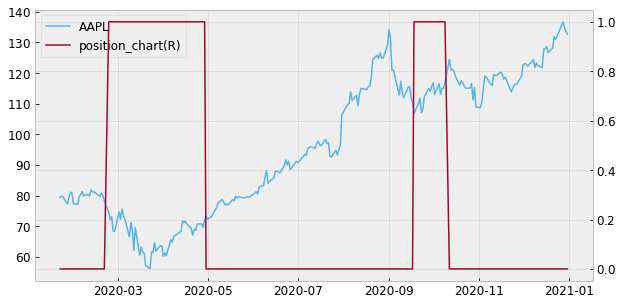

In [ ]:
# 이는 주가 움직임과 포지셔닝을 비교해도 알 수 있음 -> 2020년에 애플 주가가 엄청 올랐기 때문에 다른 고민할 필요 없이 매수한 후 묻어두었다면 수익률이 더 좋았을 것
fs.draw_chart(df, left='AAPL', right='position_chart')

## [(RSI 40 매수 / 60 매도) 전략 대신 [(RSI 60 매수 / 40 매도) 전략 사용하기]



In [ ]:
fs.indicator_to_signal(df, factor='rsi', buy=60, sell=40) # 60 이하일 때 매수, 40 이상일 때 매도
fs.position(df) # 포지션 산출
fs.evaluate(df, cost=0.001) # 수익률 계산
fs.performance(df, rf_rate=0.01) # 성과 측정

CAGR: 47.35%
Accumulated return: 44.63%
Average return: 45.31%
Benchmark return : 67.06%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.9yrs
Sharpe ratio: 1.25
MDD: -30.45%
Benchmark MDD: -31.43%


* 이전 모델보다 훨씬 수익률(Accumulated return)이 좋음
* 여러 면에서 (RSI 60 매수 / 40 매도) 전략이 더 좋은 결과를 보이고 있음

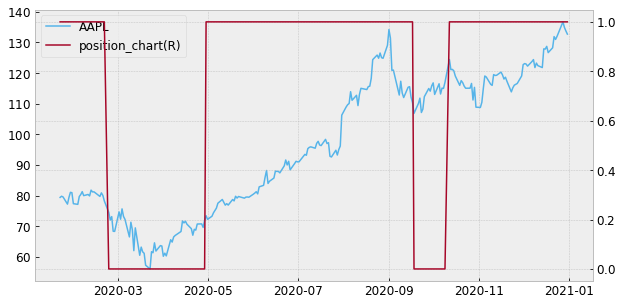

In [ ]:
# 실제로 주가가 오를 때 buy를 진행하는 전략을 보여주고 있음
fs.draw_chart(df, left='AAPL', right='position_chart')

# 6. 백테스팅 결과 읽기

### 1) CAGR(Compound Annual Growth Rate, 연평균 수익률)
: 연평균으로 따졌을 때 수익률이 얼마나 되는지 측정한 지표

### 2) 누적 수익률(Accumulated Rate)
: 전체 투자기간 동안의 누적 수익률

### 3) 평균 수익률(Averate Return)
: 건별 수익률의 평균

### 4) 벤치마크 수익률(Benchmark Return)
* 투자 전략의 성능을 비교하기 위해 *비교 대상으로 이용*하는 수익률
* 비교대상 : Buy & Hold (매수 후 매도) 전략 사용

### 5) 거래 횟수(Number of Trades)
### 6) 성공 횟수(Number of Win)
### 7) 성공 확률(Hit Ratio)
### 8) 투자 기간(Investment Period)
### 9) 샤프 비율(Sharpe Ratio)
* *위험 대비 수익*이 얼마인지 표시
* 높다 -> 덜 흔들리는 것 = 변동성 낮음

### 10) MDD(Maximum Draw Down, 최대 낙폭)
* 투자 기간 중 투자자가 입을 수 있는 *최대 손실률*
* 투자자가 최고점에서 사서 최저점에서 판다고 가정
* **직관적으로 알 수 있는 위험 지수**
* 상승과 하락을 반복하는 주식에서 수시로 나타나는 현상

### 11) 벤치마크 MDD
* 보통 Hold & Buy 했을 때의 MDD
* 전략을 사용했을 때의 MDD = 벤치마크 MDD -> 투자전략이 위험 방어를 전혀 못한 것

